Заметки
- Почему существуют группы с названиями фильмов и сериалов? Как для одного фильма может быть несколько строк?

гипотезы:
1. это плохо парсилось (бегали по ссылкам и несколько раз открыли одинаковые)
2. изначально это был датасет с какими-нибудь отзывами (где названия дублировались), а потом оттуда сделали sample и удалили комментарии

- Какую ифнормацию можно вытащить из рейтингов с различным описанием?

Построили облако слов, но не знаю что из него можно понять

Предложения по анализу:
- Можно спарсить для каждого фильма его жанры и длительность. Тогда можно оценить как они влияют на оценку зрителей
    - Нулевая гипотеза (H₀): жанр кино не влияет на рейтинг
    - Альтернативная гипотеза (H₁): жанр влияет на рейтинг
- Если узнаем длительность, то сможем определить категорию (короткометражка, фильм, сериал) и оценить что люди больше предпочитают
    - Нулевая гипотеза (H₀): категория кино не влияет на рейтинг
    - Альтернативная гипотеза (H₁): категория влияет на рейтинг
    - Также можно посмотреть как изменялись оценки каждой категории в зависимости от года
- Можно узнать какие актеры играют. Составить список известных актеров, а потом оценить как количество известных актеров влияет на рейтинг.
    - Нулевая гипотеза (H₀): количество известных актеров не влияет на рейтинг
    - Альтернативная гипотеза (H₁): количество известных актеров влияет на рейтинг
    - Скорее всего через boxplot это будет наглядно


---

# Product Approach in Data Analytics, MDS

## HSE, 2024-25

## Course Project. Exploratory Data Analysis

## General Information

__Date of issue:__ 28.04.2025

__Project defense:__ ~ 25.06.2025

## Task description

<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Over the past 5-10 years, Netflix has gained a large number of viewers. With the increase in viewers, the variety of shows has also increased. Accordingly, analysts in the film industry are faced with the task of researching data with ratings of various series.

In this task, you are to conduct a visual analysis of the dataset **1000 Netflix Shows** (as of 11.06.2017) and draw conclusions.

### Feature description

* `title` - the title of the show.
* `rating` - the show's rating, e.g., G, PG, TV-14, TV-MA.
* `ratingLevel` - description of the rating group and show features.
* `ratingDescription` - the show's rating encoded as a number.
* `release year` - the year the show was released.
* `user rating score` - user score.
* `user rating size` - overall user rating.

In [2]:
# основные библиотеки
import os
import random
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 100)

from tqdm import tqdm
from IPython.display import clear_output

# визуализация
sns.set(style='darkgrid', palette='deep')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['savefig.format'] = 'pdf'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [194]:
data = pd.read_csv("data.csv", sep=';')

In [ ]:
# Загрузка файла с goole drive
!gdown "1ifzMxVT3woprU1Ar2Gtghdgx3DKXVc6f"
data = pd.read_csv("/content/data.csv", sep=';')
data.head()

In [195]:
# "user rating score" не несет полезной информации, так как имеет много пропусков и относится только к одному зрителю
data = data.drop(columns=['ratingDescription', 'user rating size'])

# Data Preprocessing

#### Remove Duplicates from the Data
- Why did they occur?
- Are there many of them? In which groups are they most prevalent?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


* `title` - the title of the show.
* `rating` - the show's rating, e.g., G, PG, TV-14, TV-MA.
* `ratingLevel` - description of the rating group and show features.
* `ratingDescription` - the show's rating encoded as a number.
* `release year` - the year the show was released.
* `user rating score` - user score.
* `user rating size` - overall user rating.

In [171]:
# Проверим на дубликаты в названиях
duplicates = data['title'].duplicated()
if duplicates.any() == True:
    print(f'Number of duplicates {duplicates.sum()}')
    nunique = data['title'].nunique()
    print(f'Number of unique rows {nunique}')

duplicate_mask = data['title'].duplicated(keep=False)
data[duplicate_mask].sort_values('title').head(10)

Number of duplicates 504
Number of unique rows 496


title rating                                        ratingLevel  \
396  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
295  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
241  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
189  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
497  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
347  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
41   13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
141  13 Reasons Why  TV-MA  For mature audiences.  May not be suitable for...   
104         30 Rock  TV-14  Parents strongly cautioned. May be unsuitable ...   
201         30 Rock  TV-14  Parents strongly cautioned. May be unsuitable ...   

     release year  user rating score  
396          2017               99.0  
295          2017               99.0  
241          2017               99.0  
189          2017               99.0  
497          2017               99.0  
347          2017               99.0  
41           2017               99.0  
141          2017               99.0  
104          2012               66.0  
201          2012               66.0

In [4]:
# Для удобного анализа групп, создаим отдельную таблицу с мультииндексом
data_title_group = data.set_index('title', append=True).swaplevel(0, 1)
duplicate_titles = data[duplicate_mask]['title'].unique()

for i in range(3):
    name = duplicate_titles[i]
    print(f'title: {name}')
    display(data_title_group.loc[name])

title: Lucky Number Slevin


rating                                        ratingLevel  \
1        R  strong violence, sexual content and adult lang...   
50       R  strong violence, sexual content and adult lang...   
101      R  strong violence, sexual content and adult lang...   

     ratingDescription  release year  user rating score  user rating size  
1                  100          2006                NaN                82  
50                 100          2006                NaN                82  
101                100          2006                NaN                82

title: Grey's Anatomy


rating                                        ratingLevel  \
2    TV-14  Parents strongly cautioned. May be unsuitable ...   
52   TV-14  Parents strongly cautioned. May be unsuitable ...   
263  TV-14  Parents strongly cautioned. May be unsuitable ...   
353  TV-14  Parents strongly cautioned. May be unsuitable ...   
403  TV-14  Parents strongly cautioned. May be unsuitable ...   
451  TV-14  Parents strongly cautioned. May be unsuitable ...   

     ratingDescription  release year  user rating score  user rating size  
2                   90          2016               98.0                80  
52                  90          2016               98.0                80  
263                 90          2016               98.0                80  
353                 90          2016               98.0                80  
403                 90          2016               98.0                80  
451                 90          2016               98.0                80

title: Prison Break


rating                                        ratingLevel  \
3    TV-14  Parents strongly cautioned. May be unsuitable ...   
53   TV-14  Parents strongly cautioned. May be unsuitable ...   
264  TV-14  Parents strongly cautioned. May be unsuitable ...   
311  TV-14  Parents strongly cautioned. May be unsuitable ...   
355  TV-14  Parents strongly cautioned. May be unsuitable ...   
405  TV-14  Parents strongly cautioned. May be unsuitable ...   
454  TV-14  Parents strongly cautioned. May be unsuitable ...   

     ratingDescription  release year  user rating score  user rating size  
3                   90          2008               98.0                80  
53                  90          2008               98.0                80  
264                 90          2008               98.0                80  
311                 90          2008               98.0                80  
355                 90          2008               98.0                80  
405                 90          2008               98.0                80  
454                 90          2008               98.0                80

In [5]:
data['duplicated'] = data['title'].duplicated(keep=False)

In [6]:
# Оставляем уникальные строки
data_no_duplicates = data[~data['title'].duplicated(keep='first')]

In [7]:
data_no_duplicates.groupby("rating").agg({
    "duplicated": "sum"
}).reset_index().sort_values('duplicated', ascending=False)

rating  duplicated
5      TV-14          58
2         PG          45
0          G          34
7      TV-MA          33
9       TV-Y          16
6       TV-G          14
8      TV-PG          13
10     TV-Y7          12
11  TV-Y7-FV          11
4          R           4
3      PG-13           3
1         NR           2
12        UR           0

In [8]:
data[['title', 'rating']].drop_duplicates()['rating'].value_counts()

TV-14       106
TV-MA        81
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

Видим что дубликаты по группам в виде рейтинга встречаются примерно с такой же частотой, что и априорное распределение фильмов по рейтингу.

Можно предположить, что наличие дубликатов случайно и связано с принципом формирования выборки.

Посмотрим внимательнее на некоторые дубликаты (не полные):

In [10]:
temp_table = data.drop_duplicates()
duplicate_mask = temp_table['title'].duplicated(keep=False)
temp_table[duplicate_mask].sort_values('title').head(10)

title rating  \
167                 Bordertown  TV-14   
449                 Bordertown  TV-MA   
568                 Goosebumps  TV-Y7   
632                 Goosebumps     PG   
151                      Skins  TV-MA   
181                      Skins  TV-MA   
504  Star Wars: The Clone Wars     PG   
512  Star Wars: The Clone Wars  TV-PG   

                                           ratingLevel  ratingDescription  \
167  Parents strongly cautioned. May be unsuitable ...                 90   
449  For mature audiences.  May not be suitable for...                110   
568             Suitable for children ages 7 and older                 41   
632  scary and intense creature action and images, ...                 60   
151  For mature audiences.  May not be suitable for...                110   
181                                                NaN                110   
504  sci-fi action violence throughout, brief langu...                 60   
512  Parental guidance suggested. May not be suitab...                 70   

     release year  user rating score  user rating size  duplicated  
167          2016               86.0                80        True  
449          2016                NaN                82        True  
568          1998               88.0                80        True  
632          2015               90.0                80        True  
151          2013                NaN                82        True  
181          2017                NaN                82        True  
504          2008               57.0                80        True  
512          2014               93.0                80        True

Однако можно заметить что некоторые из дубликатов (меньшинство) не являются идентичными записями по всем полям: они отличаются годом выпуска, рейтингом, или описанием рейтинга. Здесь можно предположить что это были разные записи в источнике, откуда был собран набор данных.


Далее в исселедовательских целях предлагается удалить дубликаты, оставив уникальные фильмы.

In [196]:
data = data[~data['title'].duplicated(keep='first')].reset_index(drop=True)

assert data.shape[0] == data['title'].unique().shape[0]

### Rating
#### How many rating groups are represented in the data?

In [ ]:
# Проверим, что rating и ratingLevel всегда соответствуют друг другу
unique_combinations = data[['rating', 'ratingLevel']].drop_duplicates()
print(f'Number of unique combinations: {unique_combinations.shape[0]}')

Number of unique combinations: 104


In [ ]:
rating_to_levels = data.groupby('rating')[['ratingLevel']].nunique()
display(rating_to_levels.reset_index().sort_values('ratingLevel', ascending=False))
# Существуют рейтинги с разными описаниями ratingLevel

rating  ratingLevel
2         PG           62
4          R           14
3      PG-13           12
5      TV-14            2
0          G            1
1         NR            1
6       TV-G            1
7      TV-MA            1
8      TV-PG            1
9       TV-Y            1
10     TV-Y7            1
11  TV-Y7-FV            1
12        UR            1

 Можно считать ratingLevel за пояснительное описание, которое уточняет причину присвоения рейтинга

Можно изучить причины более подробно

In [ ]:
# Заполним пропуски в ratingLevel через новую категорию
data['ratingLevel'] = data['ratingLevel'].fillna('No info')

In [ ]:
from wordcloud import WordCloud

def draw_wordcloud(texts, max_words=1000, width=1000, height=500):
    wordcloud = WordCloud(background_color='white', max_words=max_words,
                          width=width, height=height)

    joint_texts = ' '.join(list(texts))
    wordcloud.generate(joint_texts)
    return wordcloud.to_image()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english') + ['ha', 'wa', 'say', 'said'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    text = list(word for word in text if word not in stop_words)
    return ' '.join(text)

In [ ]:
data['text'] = data.apply(lambda row: preprocess(row.ratingLevel), axis=1)

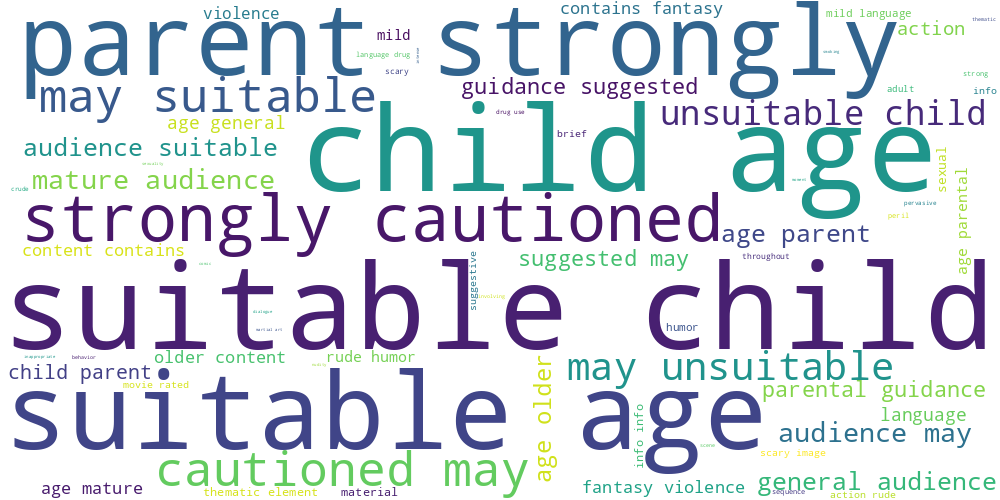

In [ ]:
draw_wordcloud(data['text'])

In [ ]:
def rating_pie_plot(data, text_size=10):
    counts = data.groupby('rating', as_index=False).agg({'ratingLevel':'count'})

    plt.figure(figsize=(8, 8))
    plt.pie(counts['ratingLevel'], labels=counts['rating'], autopct='%1.1f%%', startangle=140,
            colors=sns.color_palette("muted"), textprops={'fontsize': text_size})
    plt.title(f'Распределение rating')
    plt.axis('equal')
    plt.show()

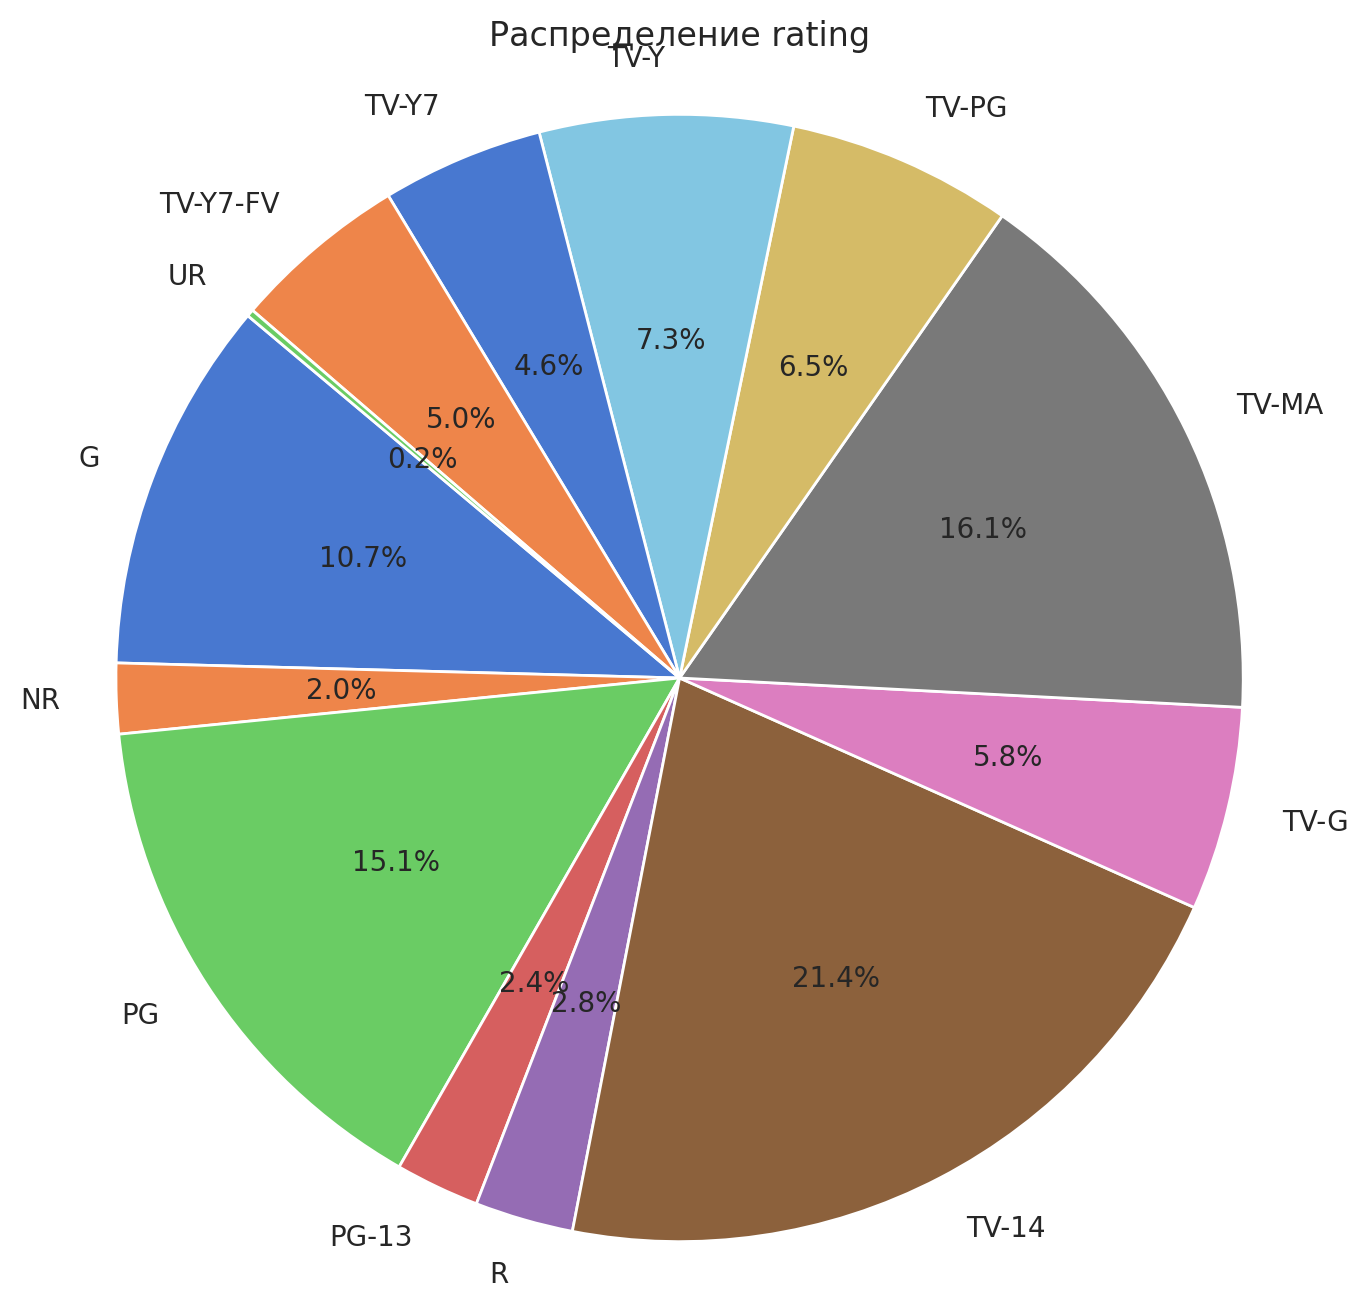

In [ ]:
rating_pie_plot(data)

In [ ]:
data.head(5)

title rating  \
0           White Chicks  PG-13   
1    Lucky Number Slevin      R   
2         Grey's Anatomy  TV-14   
3           Prison Break  TV-14   
4  How I Met Your Mother  TV-PG   

                                         ratingLevel  release year  \
0  crude and sexual humor, language and some drug...          2004   
1  strong violence, sexual content and adult lang...          2006   
2  Parents strongly cautioned. May be unsuitable ...          2016   
3  Parents strongly cautioned. May be unsuitable ...          2008   
4  Parental guidance suggested. May not be suitab...          2014   

   user rating score  duplicated  \
0               82.0       False   
1                NaN        True   
2               98.0        True   
3               98.0        True   
4               94.0        True   

                                                text  
0           crude sexual humor language drug content  
1      strong violence sexual content adult language  
2  parent strongly cautioned may unsuitable child...  
3  parent strongly cautioned may unsuitable child...  
4     parental guidance suggested may suitable child

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              496 non-null    object 
 1   rating             496 non-null    object 
 2   ratingLevel        496 non-null    object 
 3   release year       496 non-null    int64  
 4   user rating score  254 non-null    float64
 5   duplicated         496 non-null    bool   
 6   text               496 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 23.9+ KB


#### What ratings do users give more frequently?

- Create a histogram of the ratings.
- Why are these ratings given most often?

In [ ]:
# удаляем nulls чтобы проанализировать оценки пользователей
ratings = data['user rating score'].dropna()

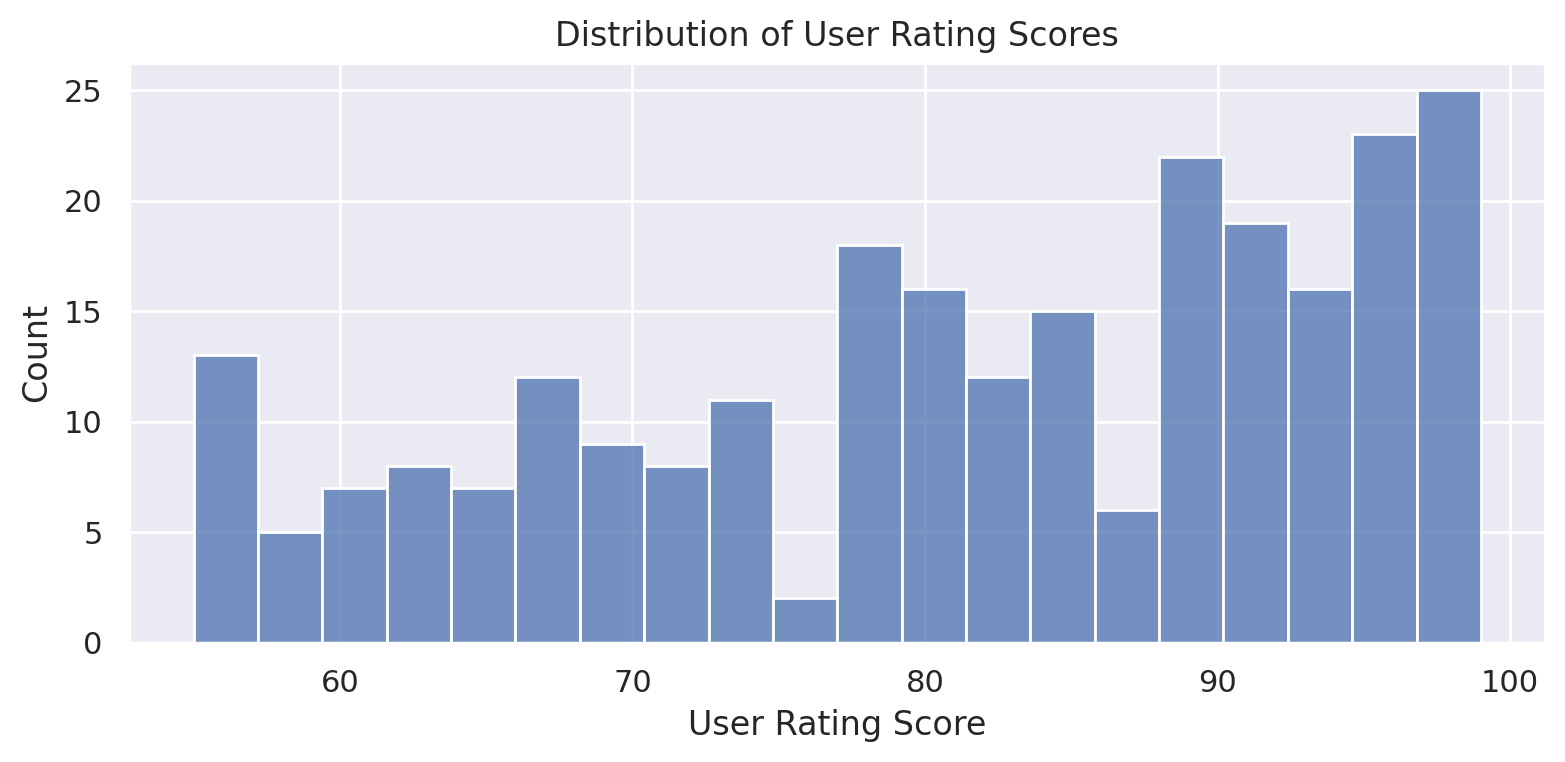

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(ratings, bins=20, kde=False)
plt.title('Distribution of User Rating Scores')
plt.xlabel('User Rating Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
df_clean = data.dropna(subset=['user rating score'])

In [ ]:
# build list of rating categories (plus an all option)
rating_cats = ['All'] + sorted(df_clean['rating'].unique())

# build one histogram per category, with border styling
traces = []
for cat in rating_cats:
    if cat == 'All':
        df = df_clean['user rating score']
    else:
        df = df_clean[df_clean['rating'] == cat]['user rating score']

    traces.append(
        go.Histogram(
            x=df,
            name=str(cat),
            visible=(cat == 'All'),
            nbinsx=20,
            marker=dict(
                line=dict(
                    color='white',   # border color
                    width=1.5        # border width
                )
            )
        )
    )

# dropdown buttons
buttons = []
for i, cat in enumerate(rating_cats):
    vis = [j == i for j in range(len(rating_cats))]
    buttons.append(
        dict(
            label=cat,
            method='update',
            args=[
                {'visible': vis},
                {'title': f'Distribution of User Rating Scores ({cat})'}
            ]
        )
    )

# assemble figure with bargap for spacing between bins
fig = go.Figure(data=traces)
fig.update_layout(
    title='Distribution of User Rating Scores (All)',
    xaxis_title='User Rating Score',
    yaxis_title='Count',
    bargap=0.1,  # 10% gap between bars
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.0,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )]
)

fig.show()


In [ ]:
# create one box trace per category
# build list of rating categories (plus an all option)
rating_cats = ['All'] + sorted(df_clean['rating'].unique())

traces = []
for cat in rating_cats:
    if cat == 'All':
        scores = df_clean['user rating score']
    else:
        scores = df_clean[df_clean['rating'] == cat]['user rating score']

    traces.append(
        go.Box(
            y=scores,
            name=str(cat),
            visible=(cat == 'All'),
            boxpoints='outliers',   # show outlier points
            marker=dict(line=dict(color='black', width=1))
        )
    )

# build dropdown buttons
buttons = []
for i, cat in enumerate(rating_cats):
    visible_mask = [j == i for j in range(len(rating_cats))]
    buttons.append(
        dict(
            label=cat,
            method='update',
            args=[
                {'visible': visible_mask},
                {'title': f'Boxplot of User Rating Scores ({cat})'}
            ]
        )
    )

# assemble figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Boxplot of User Rating Scores (All)',
    yaxis_title='User Rating Score',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.0, y=1.15,
        xanchor='left', yanchor='top'
    )]
)

fig.show()


#### Display the Main Information About User Ratings
- What are the mean, standard deviation, minimum, maximum, and median?
- Do the median and mean differ?
- Can these characteristics differ significantly? Why?

In [ ]:
desc = ratings.describe()[['mean','std','min','50%','max']].rename({'50%':'median'})
print("User Rating Score Summary:\n", desc)

mean = desc['mean']
median = desc['median']
print(f"\nMean = {mean:.2f}, Median = {median:.2f}")

User Rating Score Summary:
 mean      81.318898
std       12.748583
min       55.000000
median    83.000000
max       99.000000
Name: user rating score, dtype: float64

Mean = 81.32, Median = 83.00


#### In which years were the shows in the dataset launched?

#### Create a Chart Showing the Distribution of the Number of Shows Launched by Year

- Is there growth observed?
- Are there any outliers?
- What do the outliers represent?
- What might have caused them?

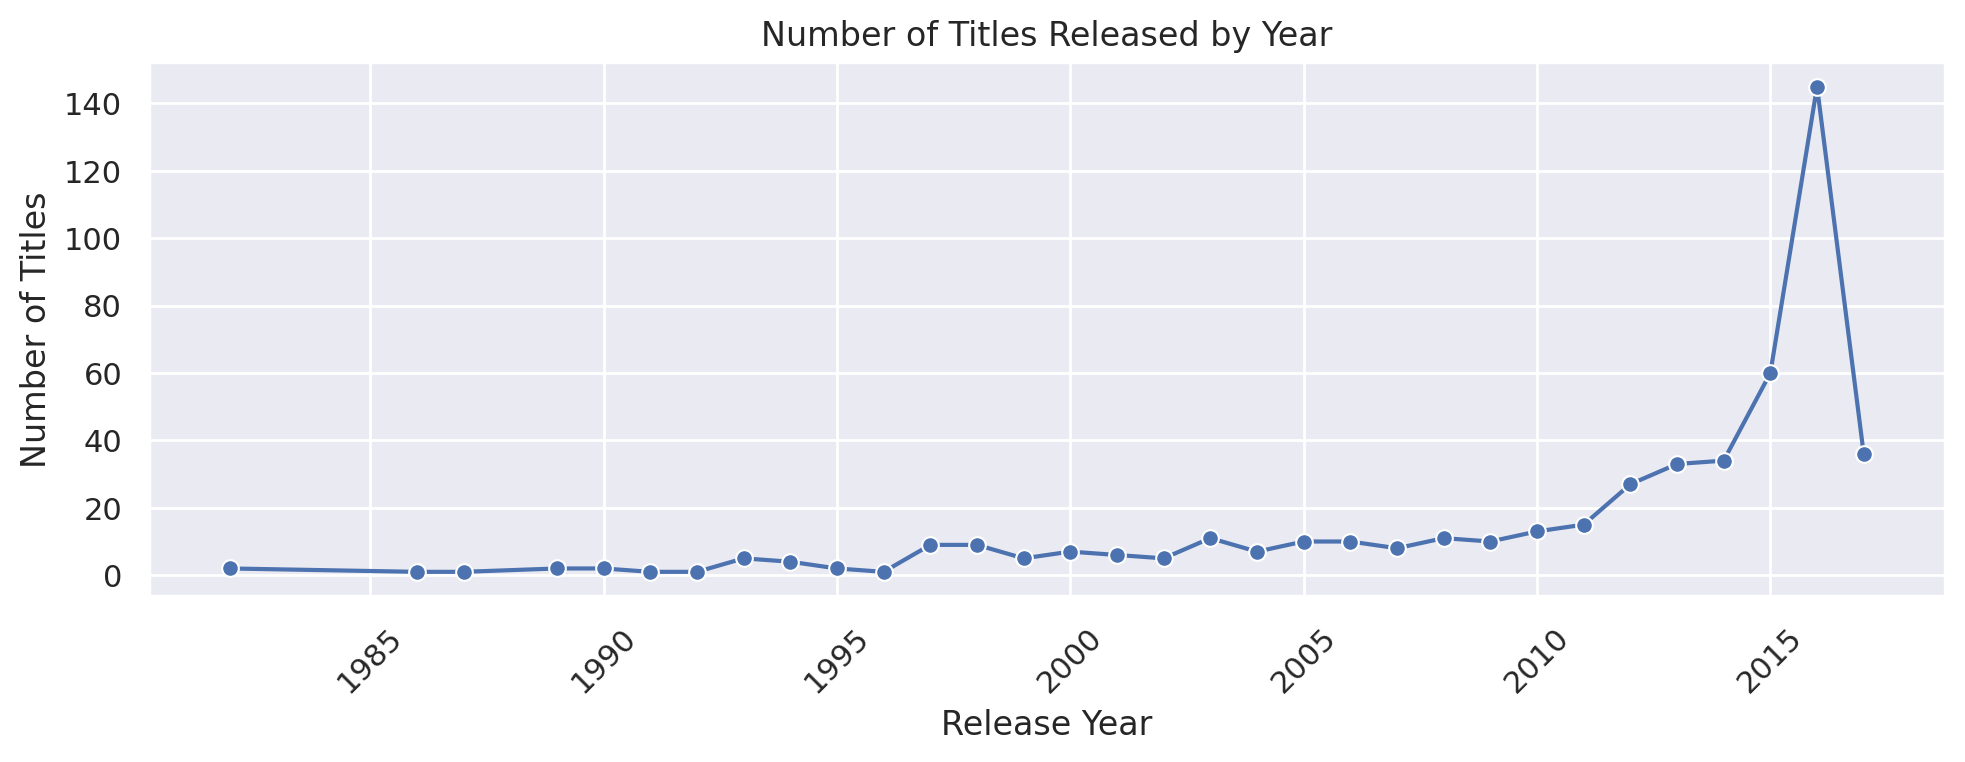

In [ ]:
df_sub = data[data['release year'] >= 1980]
year_counts = df_sub['release year'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('Number of Titles Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

In [ ]:
# prep
years = sorted(data['release year'].unique())

# build list of rating categories (plus an all option)
rating_cats = ['All'] + sorted(df_clean['rating'].unique())

# precompute counts per year for each category
counts = {}
for cat in rating_cats:
    if cat == 'All':
        sub = df_clean
    else:
        sub = df_clean[df_clean['rating'] == cat]
    vc = sub['release year'].value_counts()
    # ensure every year appears (zero if missing)
    counts[cat] = [vc.get(y, 0) for y in years]

# create one Bar trace per category (only "all" visible initially)
traces = [
    go.Bar(
        x=years,
        y=counts[cat],
        name=cat,
        visible=(cat == 'All')
    )
    for cat in rating_cats
]

# dropdown buttons to toggle visibility
buttons = []
for i, cat in enumerate(rating_cats):
    vis = [j == i for j in range(len(rating_cats))]
    buttons.append(
        dict(
            label=cat,
            method='update',
            args=[
                {'visible': vis},
                {'title': f'Number of Films Released per Year ({cat})'}
            ]
        )
    )

# assemble figure with range slider and dropdown
fig = go.Figure(data=traces)
fig.update_layout(
    title='Number of Films Released per Year (All Ratings)',
    xaxis=dict(
        title='Release Year',
        tickmode='linear',
        rangeslider=dict(visible=True),
    ),
    yaxis=dict(title='Number of Titles'),
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.0,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )]
)

fig.show()


Скорее всего т.к. датасет собирался в 2017 г., он еще не завершился => много фильмов за этот год не вышло

Скачок может быть связан со сменой стратегии нетфликса на выпуск оригинальных фильмов и сериалов

И вообще данных мало по некоторым рейтингам

#### Compare the Average User Rating in 2016 with the Average Rating in 2017
- Can it be concluded that 2017 was more successful for Netflix? ("More successful" means users gave higher ratings on average)
- How else can "success" be evaluated?


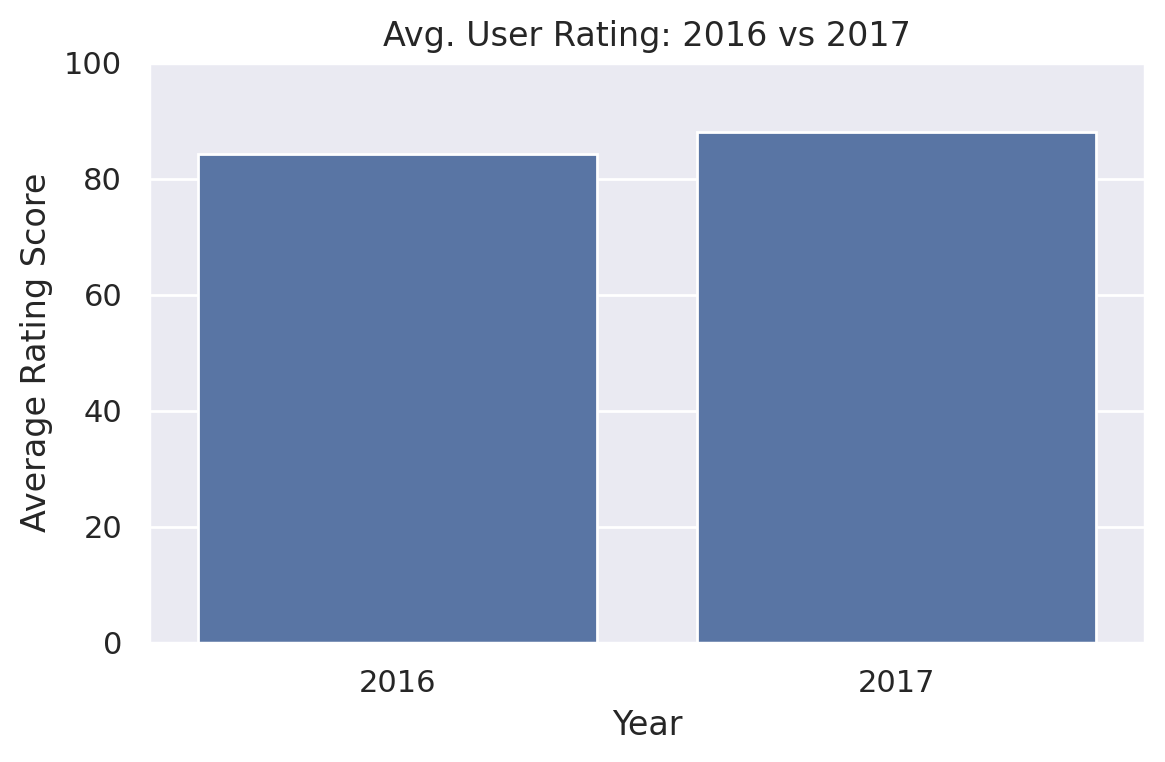


Average ratings:
    release year  avg_rating
0          2016   84.313953
1          2017   88.125000


In [ ]:
avg_by_year = (
    data[data['release year'].isin([2016,2017])]
    .groupby('release year')['user rating score']
    .mean()
    .reset_index()
    .rename(columns={'user rating score':'avg_rating'})
)

plt.figure(figsize=(6,4))
sns.barplot(x='release year', y='avg_rating', data=avg_by_year)
plt.title('Avg. User Rating: 2016 vs 2017')
plt.ylim(0, 100)
plt.xlabel('Year')
plt.ylabel('Average Rating Score')
plt.tight_layout()
plt.show()

print("\nAverage ratings:\n", avg_by_year)

опять же 2017 еще не завершился

и чтобы норм оценить успешность надо также сравнить другие бизнес метрики: число часов на платформе, число подписчиков, число просмотров

# Feature Engineering

In [ ]:
data.head()

title rating  \
0           White Chicks  PG-13   
1    Lucky Number Slevin      R   
2         Grey's Anatomy  TV-14   
3           Prison Break  TV-14   
4  How I Met Your Mother  TV-PG   

                                         ratingLevel  release year  \
0  crude and sexual humor, language and some drug...          2004   
1  strong violence, sexual content and adult lang...          2006   
2  Parents strongly cautioned. May be unsuitable ...          2016   
3  Parents strongly cautioned. May be unsuitable ...          2008   
4  Parental guidance suggested. May not be suitab...          2014   

   user rating score  duplicated  \
0               82.0       False   
1                NaN        True   
2               98.0        True   
3               98.0        True   
4               94.0        True   

                                                text        age_group  
0           crude sexual humor language drug content      Teens (13+)  
1      strong violence sexual content adult language     Adults (18+)  
2  parent strongly cautioned may unsuitable child...      Teens (13+)  
3  parent strongly cautioned may unsuitable child...      Teens (13+)  
4     parental guidance suggested may suitable child  Older kids (7+)

### Adding age groups

Rating column includes age ratings from different systems which are partially equivalent. 'TV-14', 'TV-PG', 'TV-MA', 'TV-Y', 'TV-Y7-FV', 'TV-G', 'TV-Y7' are from the TV Parental Guidelines, a television content rating system in the United States. 'PG-13', 'R', 'NR', 'UR', 'G', 'PG' are from the Motion Picture Association film rating system. For convenience, we can use age groups instead of ratings.


In [ ]:
data['rating'].unique()

array(['PG-13', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-Y', 'NR', 'TV-Y7-FV',
       'UR', 'PG', 'TV-G', 'G', 'TV-Y7'], dtype=object)

![image.png](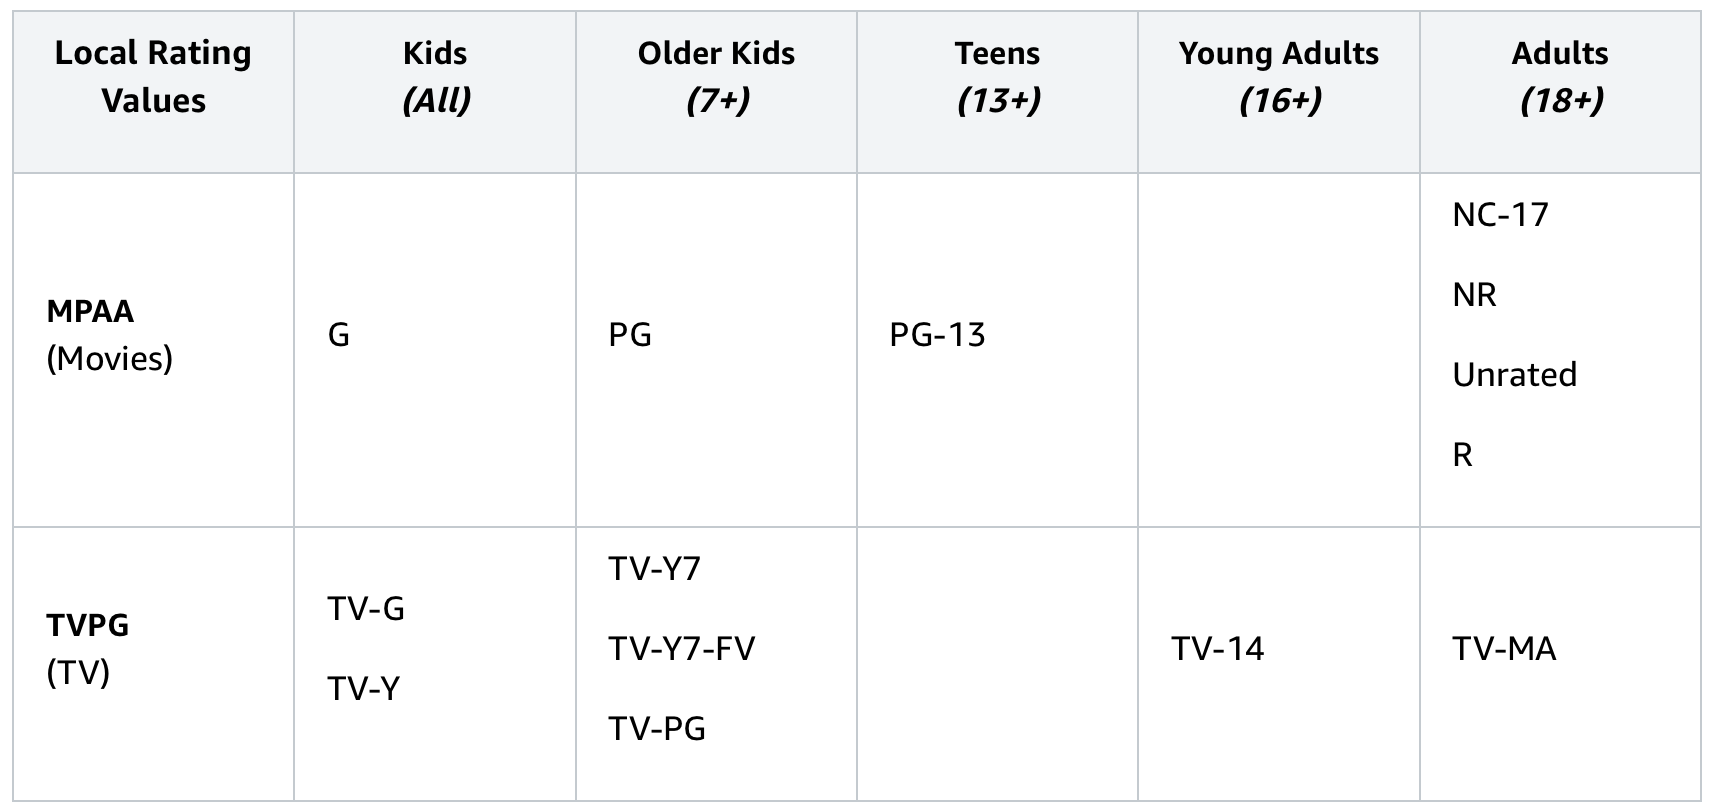ZtSnJk0WGD/q0yBUBH/VOSuSh8SN4muZ2WFKfwrED3k5fslf20pSIyKV8SHuU2TGc0b593yBf8BXH1l2zKgPSswXxiVCTIRYMyc3VumjCbFOvtAvYpS3yeCGRo36swXioNG46CSpPCryW1xxhDIXbcgHCnK+5ygXxgWPYHSaHC6A0bbiNFFgyKhmrlAWHDOKl0jFw2t5WJMrCwhSrhvIrxZI4mNHeLSSz/UPG9XZh+vjXrgn7or7wtoH+AMRyAFSIAYCkAGiABdIgBy+xfDhEh4TroBwkA05EWSzgeyHLwFQwO8wiDMgFoN8JBrEAh4Qwi8ZyALZh5gt1depTeRWOeQzh70gjzNhbA7ujXvgTrgb4IA0IEJ1YcSMsuw89wQh8IWKYsCHvcoEj5Qt0ryUPLuVXcU+zL7J7mNXY9uwJqwNO4o1Qm/BcHSl/7fYdDLdjs6h29CZdBJdn24OAqCWbDi3CKiZB3svB29BMmRyYFuYEXEi0RIWa8CCtT/RjWhPdP5hbLiwjTKHx8OZAblgjly5cP2ypXkyUbpQzuLAHUPACpHwxo9jObAd2AAo95+R5f06enhfQbTbvnNyOB+efwKAtX/nknMA2A11xzh+56x0ANDaCkCTDU8hyx3hcOWLAGdTDc60Lvz3mAIrYAccgDPwAD4w11AQCeJAEpgxPCJZsM+zwTywGBSAIrAWbADlYBuoAjVgD9gPGsERcBKcBRdBO7gO7oJO0AOeg344OoMIgpAQGsJAdBEjxByxRRwQV8QLCUAmIzFIEpKCpCMSRIHMQ5YiRUgxUo5sR2qR35DDyEnkPNKB3Ea6kF7kFfIRxVAqykQNUAt0AuqKctAwNA6djqajs9B8dBm6Gi1DK9HdaAN6Er2IXkc70efoAAYwVUwbM8bsMFfMD4vEkrE0TIYtwAqxUqwSq8easVbsKtaJ9WEfcCLOwFm4HVxRwXg8zsNn4QvwVXg5XoM34Kfxq3gX3o9/IdAI+gRbgjshhDCFkE6YTSgglBJ2EA4RzhCuE3oIb4lEojacexdiMDGJmEGcS1xF3ELcSzxB7CB2EwdIJJIuyZbkSYokcUlyUgFpE2k36TjpCqmH9J6sSjYiO5ADyclkCXkJuZS8i3yMfIX8hDyooq5iruKuEqnCV8lTWaNSrdKsclmlR2WQokGxpHhS4igZlMWUMko95QzlHuW1qqqqiaqbarSqSHWRapnqPtVzql2qH6iaVBuqH3UaVUFdTd1JPUG9TX1No9EsaD60ZJqctppWSztFe0B7T2fQx9ND6Hz6QnoFvYF+hf5CTUXNXI2jNkMtX61U7YDaZbU+dRV1C3U/da76AvUK9cPqN9UHNBga9hqRGlkaqzR2aZzXeKpJ0rTQDNDkay7TrNI8pdnNwBimDD8Gj7GUUc04w+hhEpmWzBBmBrOIuYd5idmvpak1UStBa45WhdZRrU5tTNtCO0RbrL1Ge7/2De2PYwzGcMYIxqwcUz/myph3OmN1fHQEOoU6e3Wu63zUZekG6GbqrtNt1L2vh+vZ6EXrzdbbqndGr28sc6zHWN7YwrH7x97RR/Vt9GP05+pX6bfpDxgYGgQZSA02GZwy6DPUNvQxzDAsMTxm2GvEMPIyEhmVGB03esbSYnFYYlYZ6zSr31jfONhYYbzd+JLxoImlSbzJEpO9JvdNKaaupmmmJaYtpv1mRmbhZvPM6szumKuYu5oLzTeat5q/s7C0SLRYYdFo8dRSxzLEMt+yzvKeFc3K22qWVaXVNWuitat1pvUW63Yb1MbJRmhTYXPZFrV1thXZbrHtGEcY5zZOMq5y3E07qh3HLteuzq5rvPb4yeOXjG8c/2KC2YTkCesmtE74wnZii9nV7Lv2mvah9kvsm+1fOdg48BwqHK450hwDHRc6Njm+nGg7UTBx68RbTgyncKcVTi1On51dnGXO9c69LmYuKS6bXW66Ml2jXFe5nnMjuPm6LXQ74vbB3dld7r7f/S8PO49Mj10eTydZThJMqp7U7WniyfXc7tnpxfJK8frFq9Pb2JvrXen90MfUh++zw+cJx5qTwdnNeeHL9pX5HvJ95+fuN9/vhD/mH+Rf6H8pQDMgPqA84EGgSWB6YF1gf5BT0NygE8GE4LDgdcE3QwxCeCG1If2hLqHzQ0+HUcNiw8rDHk62mSyb3ByOhoeGrw+/F2EeIYlojASRIZHrI+9HWUbNivo9mhgdFV0R/TjGPmZeTGssI3Zm7K7Yt3G+cWvi7sZbxSviWxLUEqYl1Ca8S/RPLE7snDJhyvwpF5P0kkRJTcmk5ITkHckDUwOmbpjaM81pWsG0G9Mtp8+Zfn6G3gzxjKMz1WZyZx5IIaQkpuxK+cSN5FZyB1JDUjen9vP8eBt5z/k+/BJ+r8BTUCx4kuaZVpz2NN0zfX16r9BbWCrsE/mJykUvM4IztmW8y4zM3Jk5JE4U780iZ6VkHZZoSjIlp7MNs+dkd0htpQXSzlnuszbM6peFyXbkIDnTc5rkTHjQa1NYKZYrunK9city389OmH1gjsYcyZy2PJu8lXlP8gPzf52Lz+XNbZlnPG/xvK75nPnbFyALUhe0LDRduGxhz6KgRTWLKYszF/+xhL2keMmbpYlLm5cZLFu0rHt50PK6AnqBrODmCo8V237CfxL9dGml48pNK78U8gsvFLGLSos+reKtuvCz/c9lPw+tTlt9aY3zmq1riWsla2+s815XU6xRnF/cvT58fUMJq6Sw5M2GmRvOl04s3baRslGxsbNsclnTJrNNazd9KheWX6/wrdi7WX/zys3vtvC3XNnqs7V+m8G2om0ffxH9cmt70PaGSovK0ipiVW7V4+qE6tZfXX+t3aG3o2jH552SnZ01MTWna11qa3fp71pTh9Yp6np3T9vdvsd/T1O9Xf32vdp7i/aBfYp9z35L+e3G/rD9LQdcD9QfND+4+RDjUGED0pDX0N8obOxsSmrqOBx6uKXZo/nQ7+N/33nE+EjFUa2ja45Rji07NnQ8//jACemJvpPpJ7tbZrbcPTXl1LXT0acvnQk7c+5s4NlTrZzW4+c8zx05737+8AXXC40XnS82tDm1HfrD6Y9Dl5wvNVx2udzU7tbe3DGp49gV7ysnr/pfPXst5NrF6xHXO27E37h1c9rNzlv8W09vi2+/vJN7Z/DuonuEe4X31e+XPtB/UPkP63/s7XTuPNrl39X2MPbh3W5e9/NHOY8+9Sx7THtc+sToSe1Th6dHegN7259NfdbzXPp8sK/gT40/N7+wenHwL5+/2vqn9Pe8lL0cerXqte7rnW8mvmkZiBp48Dbr7eC7wve672s+uH5o/Zj48cng7E+kT2WfrT83fwn7cm8oa2hIypVxh48CGCxoWhoAr3bCs34SAAx4b6BMHbkfDBsycqcZRuA/4ZE7xLA5A7Adnj8T4VkxbDkA5V0AWNZD3QYAomgAxLkB1NHxWxm1nDRHhxEtqi88mjwYGnptAQBpPQCf1w4NDVYODX2ugp29B8AJyci95Ie+/2sNlMrD2n+r/wnaRz6nLk3iFwAAADhlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAAqACAAQAAAABAAAGrqADAAQAAAABAAADKgAAAAC2vqU9AABAAElEQVR4AeydBbwU1RfHDwYICIiCijRIIyEtoXSrNLaUtCJtAFLSqSjdKiHd3ZJKSXeDIiqN+Z/f+J9l7szsvt1983b38X7HzzpzY+7c+Q5z3sw9954T719NhEICJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACYSZwX5jPz9OTAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgE6Ahiv+QyABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEogIAjRcRcRtYCdIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARouOK/ARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggYggQMNVRNwGdoIESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESICGK/4bIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiAgCNFxFxG1gJ0iABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABGi44r8BEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBiCBAw1VE3AZ2ggRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARI4IFAEWzavivQQ1ifBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABKR4oXw+KXDFlU88LCQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggVgYBXXBkdy5Mzm7HLLQmQAAm4RmDP/kN6W9QxriFlQyRAAhYC1DMWIEySAAm4SoA6xlWcbIwESMBCgDrGAoRJEiAB1wlQz7iOlA2SAAmYCBg6xpTluMsVV45YmEkCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBBqAjRchZo4z0cCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJOBIgIYrRyzMJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCDUBGq5CTZznIwESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEScCRAw5UjFmaSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEmgANV6EmzvORAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAk4EqDhyhELM0mABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEJNgIarUBPn+UiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABBwJ0HDliIWZJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACoSZAw1WoifN8JEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACjgRouHLEwkwSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIFQE6DhKtTEeT4SIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAFHAjRcOWJhJgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQKgJ0HAVauI8HwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgCMBGq4csTCTBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEgg1ARouAo1cZ6PBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEjAkQANV45YmEkCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBBqAjRchZo4z0cCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJOBIgIYrRyzMJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCDUBGq5CTZznIwESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEScCRAw5UjFmaSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEmgANV6EmzvORAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAk4EqDhyhELM0mABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEJNgIarUBPn+UiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABBwJ0HDliIWZJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACoSbwQKhPyPNFHoGLFy/K1au/Kx1LlSqVJEmSVMlj4j8Ce3bvFokXT/LkyUMkJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACLhLgiisXYcbWpnp0/0QKPptf+S1btiy2Xk6M9fvkiRPybL68UqJ4MSnxXFEpkD+fII9CAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiTgDoF7fsXV4cOHZPy4cQotrCZ6r837Sh4T7hFwYu7UOu7D009nkcxPZ5YsWbLK/fff71QtYvLGjRsrR48e8fTnyJHDMn78OOnRs5cnjzskQALuE/jtt99k0sQJsnDhAsmZM6e8+ebbUqBgwaBP1KljBzl79ozn+KeeSi0DBg7ypLlDAiQQfQL79u2TT3v3VBpq2LCxlC1XTskLJMFn106L+tHOhDkkQAIkQAIkQAKRT2Db1q0ybNgQpaOt331PihYtpuS5mejZo7scPHjA02SyZI/IF1+O9KS5QwJxnUCov7di4psxrt/De+3673nD1ZnTZ+SLEZ8r9y137tw0XClE3E04MY/qDBiM7tt/gLzwQumoqrpW/s8//8i1a9c87cXT3P8lTerdPeKunTs9dY0dpzyjjFsSiIsE8CHw99//eC49QYL4uoHak2HZuX37thw7dsySK5IpY0ZJmCiRnj90yGAZPGigvr91yxZZuGCBHDh0ROLHj287zp+MdWvXyP79+z1VYTinkAAJiPz555+yYvlyOXTooJw7e1bOXzgvDz+cRNKkSSOptV/FChUlTdq0fqG6fPlnWTB/vlK3dJmySjrQRGx/dqkfA73jrE8C0SMAnXb48OHoNfL/ozNnziwPPfSQK22xERKICwT++OMPOXLk7qRP45qzZMkS5Tv86VOn5Nr168Yh+jZ9+nT6O4mSyUSMEPj333+VbyXjJOnSpXU1nMSFixds74o1atYyThcj200bN8p3323ytJ0yZUrPPndIIJIJ/PTTT/Lzzz8rXUyY8CHJlCmzkhfdRKi/t2LimzG6DHh8ZBG45w1XkYWbvfFGAIPIL1arKq+9/oZ8OXKUt2qu5uOFpUqlip42H330UTl5+qwnbd159bXXZN26tUo28igkQAJ3CZQrU1qLmXfVk5ExYybZvfdHT9q8g4+iJo0ayrx5c83ZUqVqVfnq62mevJkzZ3j2sYMXtvXr1km58uWVfCZIgASCI4Bn6rPhw+SrqVNsH0TmFu+77z4pXaaMtGr1brRWTpnbjEv71I9x6W7zWiOBwKVLl6RYkUKudGXjd1sY39YVkmwkrhB48MEHtff8BvLjj+p3wPDPRsjbDRp4xXD9+jV5rlgR5XsC3+l7992ddOb1YBa4QmDz5u+kUgX7d1aHjp2kS9durpyDjZAACQRGoFGDt23jkQkTJpRjJ07SqB8YStaOZQQY4yqW3bB7vbsYNJswfnxILvPwocBmYNasVVsGDBqsL13H8nXsx/SMoJCA4ElIIEwEEF/ParR6tkABmTBhkuI6tESJkkoPMeM5Oq4ClcaYIIE4TuCH77+XUiWeE6xstM7is6LBSuVVK1dKjZdflG5du2irK/+2VmHaJQLUjy6BZDMkQAIkQAJhIQBvJl26fmI795dfqN5wrBUmT5qkGK1Q3q59B1dX+ljPybRKYOb06WrG/1PWyYSOle6xzJdfelEqlCur/16qXu0euzpeTmwhcPHiRdmwYb2tu7du3bKtWrRVuscyZs361vNM4tn81jLJ+R67XF6ORoArrvjPICQEqlWvLh993NVzrps3bmiuOw7JsKFDNB/DBz352Pmgcycpr62k8NcdkXJwAAmcPxBJkCCBNG3aTP8FchzrkgAJ2Al8/dVUGTRwgFKQPkMGmfntbI+LQKOwbbt2cuXKL7J61SrJkCGjtGjVSpInT24Uc0sCJBAkgZUrVsgr9evKnTt3Am5hyOBBukvBb6bNEAxOUdwjQP3oHku2RAIkQAIkED4ClatUkcJFighiGRly4MABWbN6lbaC2+4+GBNiRljCPMBdcZN3mhqHcxvDBOBidc6c2Y5nOXnihGzftk0KFS7sWH6vZV6+fFn7/lzpuaxEiRJ79rlDAqEkMOvbmYIJhE4yY8Z0eeXVuOMJ6jvN3eeWLZs9KDDWTLm3CdBwdW/f34i5uuTJH5VcuXIp/cELT63adaRIoYJy4sRxT9nNmzf02QQxrXwDNVx5OsgdEiCBaBGAm853W7dS2oAhavacueLkZzxbtuy6QevWzZs2o5bSCBMkQAJ+E/j111+lebN3bEarBx54QOrUrSdY/YiYoPCnvmf3bj22HGJfmWXxokUyetRIadqsuTmb+9EgQP0YDXg8lAQsBBJpsTJreomXcur0Kfl+xw7liDx58niNy5n8kUeUukyQAAn4R6Brt0+kWpXKSuXPP//M0XA1d+4cOXP6tFK38wcfMb6cQiRmE5goeOXKFa8nmT59WpwxXHG8yOs/AxaEmACMU95k7Zo1utcMp3EUb8fE5ny3YpfGZgZxre80XEXjju/Yvl239GLW0IED++XO7duSPUdOyZEjh+TNm0+PvxLILGQMDsFlD4J3YxUSgtQ99dRT+gqD6i++KFmyZHXs7dkzZ2ThwgVyVAt+igCXWEb6y+VfJOXjKSVtmrSSJWtWadS4iTz++OOOx4czEy6/GjVuLB9/9KHSDasvbHNhdK8Xs4hwz/ZZ/G3fufOHYJazWTI//bQUKVJUz0Kf9uzeZS6WvPny2wxysP4fP3bMUy/3M3k8PvFv3LguixYu1H1979v3o5w6eUpfWZY3b155r837Av/dUQn+fSxdskT/2MYgYiYtWHSePHnlpZdr6H3Bv6OVK5Z7mkmUOLG8rJVRSCASCMBI/Wr9eoKAzYZgNeO0GTO96jijXkJtAIpCAiTgDoFOHTsI4r+YJUWKFDJpylQpWbKUOVtq1KgpHbW4Bi1bNJdvtRl/Zuna5WOpULGiIJ4dJXoEqB+jx49Hk4CVAN6rJ06eYs3W09O++Vre2dFYKUOs3eYtWip5TJAACUSPQKlSz+tGKqyyMgQrvo8cOWx790e8TbNkzZpNi4H9ujmL+zFMwDpADoP+nj17PGedM3uW9Os/QHHr7im8x3YCDS1xj10+LydCCBw7dlR2/vCDpzdPPPGEIFY4xv0gWKk6W3OfF1cmEtKg7PmnEGd2aLgK4lZfu3ZVd2cH/8tW2bt3ryfrhRdKy4gvvpS06dJ58px2sOTzyy9GSI8e3QUrCpzkk25ddePD5KlfeYoRZ6Jnz+66scuTado5fvyYbJUtes5QzSVfhw4dpb32izTJmMk+2GWd1Y0+u3G9MJCNGvmlbYY52odRqVnTd7DrkTfefMtjuFqyeJH01O6RWTCDzLqSDP8upk6Z7KkGo+OUqV/rQe8Rs8I6UAjFiyXokyZO0FeV+Fp6j49srFS5rRlJDYGRE7Pe4XYN9/cRbUYoBiQNgXsFGq4MGtyGk8Dvv/8udWrVUmbxwbg/euw4KVbsOa9dg0uKkydPKOWIOXf//fcreUYCvp4XLVqoG3cxGQAGryxZskilSpWlbLlyRjW/tiuWL5fly5fJaW1m9oXz57XnK7k8mSqVNjlBMxa/9HKMuzT1q5OsRAIBEvjll19kpsPMvdlz5km+/PkdW8NzNH7iJLmirdQyu03B8zZl8mTB38PoipvPLvqCd6rFSxbLgf379QlG586dk4yau9Gs2bJJlSpVtckn+Ry7vGbNarn888+esmrVqntWe8LV8datW2Tnzp0C96a1NF3khlA/ukGRbZBA6AgEq1/MPQy2DQxWrVu7xtMU3Cgb3w/QJUs1vbdv3z7t96Mg/fTTWaRqtWpSvfqLnmOcdvjO40SFeW4Q6Ka9I5gNVxh0/XLECBk89K6hCiuO8d5uli7dunl938d4wUbNZZT+N177Ow/BBOLsOXNKiRIlJHv2HOamlH3d5d32bUpeSc3A9uSTTyp5WHm0auUKJS+P9g0AbxBmsb43VK1aTTB5FILvGLw34JlEnx977DFt/CC3tGzV2tHThLldTEjGBGWsDsWxmTJl1r9BatepK6m07xGsiEe+IcWeKy749g9W8I6DSbZmGTRkqJQvW8aThXioWOHh7zcVJv/i3uMaTp85rU90wvjJ2w0aetqMamfhggVy69bdcTIwLFPW/k2HGEAXL1zwNHe/5kXA26pbTyUvO+e1777169cppX///Zft/blw4SL6+6C5InWpmQb3o0tghiXmXMVKlfQmzePRMDj7a7hy43vLbR3qDyO4tt+1a6dcMD3jOG63pgfN37WJEz8sVapWVZqE20+Mtx46dEhbPHBS/vjzD12HptEWelSsWElKPf+8PPjgg8oxTEQOARquArwX+MNbt3ZNOXv2bJRHrtU+KIoULihjxo7XPxacDsAgyptvvKa/0DiVm/MwK8ksTi935nLzPj6MYDTBSrDyFSqYi8K+/+uVX219eOyxFLY8N673nHbfgonlYetMABnr1q7VA9+bZyo5HY4X41Ytm8vG77Y4Ks3+/fpKr549nA7V87CSrM+nvb2+3Hs9kAUkEAICf/31l7z5+mt6bDvz6Xr26q2v5jDnWffHjh0j33x912iPcvNAsrk+dPOrWsyeXbvU1ZEYaIfRukSJkoJB+6gEH4FNGjeSXdrgtJPAiPzhB52lT99+0qKl6vbQqT7zSCCSCCyYP1+fnWfuEwYAvBmtzPXatW+vGK5QhlVY0TVcufXsGn3F6udm77wjmMRjFmNQrF/fPvoHHgbTjMElo16/Pn0E7xyGwKD3/AsvSO9ePQWzwfH3FlK0aDFXDFfUjwZpbkkgdhCIjn4xrjA6bcDTR6OGDYymJP+zz8qq1Wtl3Lix0qd3L2WCECohvhC8StTWXLRjAoJV+M5jJcK02wTgfhiTOfH+YchX2rt910+665MukTd82FCjSN/iGEwSswq8NuC7ePCggYK/n2aB4QICt8dt3m8rnT/4UOLHj2+uou+vX79e/+42F+BvvdVwdeL4ceVZQ318u1gNV9b3BsTszZgpo3z04QeybOlS82n0feSN157XmbNmeybJWitBR7z+6iueVRUoh8efGZqrPlx//wEDBYPVmNxrCFbNR8dwtVibqIuwDYY888wzev8wYQ+Dw4bgvP4YrkZ++YX+vWS+T7iGmVpDmHRbtFgxo0mf2w7t2wrGzQwpWKiQo+Fq6JDBAqORIZh0FajhCu+NMNTBQGcVjCOZdS/KR44a7TFcUZdaiTHtBoGZM2YozVSqVEXuu+8+MRuu9Im+Wgy6DBkzKnWtCbe+t9zWodZ+WtMd2rfTdabxDWYuh9HKbLhKlz69YrjCGCkWcmBM3EmgpxC24sSpMzpXpzrMCy+B+8J7+th1dswMerd1S0ejFVYNOFlor1+/Lq1btdBnuzldbbu2bfwyWjkda83DS1nq1KkFLxh4WJ1WI3zQuZP1sLCn161ba+uDdRWTrYKWEVuu9+rVq8ryetwXp3uDa4QLw23bttouF+4R8YJqFfy7wyzKNGnTetrEUmEKCUQagfbt3hfMRjTLO02bybvvtTFnRWsfqxdfKFXCZrQyN7px4wbbqkdzOfYxI6dWzRpejVZGffxN8OUD3qjHLQlEGoEFC+bZutTCT/dYcCOI2Fdmwaw784pzc5k/+249u8a5vhjxuVSqUN5mtDLKsTVWu3fs2N6c7bi/WpspXL9eHX2QzOmDyfGgADKpHwOAxaokEGYCbugXN9owY9itTdYpWriQdGjX1ud7CSYZmAd30AbfecwkuR+TBD7u0k0ZFMQg4sQJ4/VTHj16RJYsXqycvptm1LIKvqvxro/vYrMxxFoPZQMH9JfnSxb3Og5jPcbNNMZc8Ew6Ga2M8/z222/SumULz2QYIx9buFKsWrmSYrQyl2MlZdN3mihGK3N5sPtWN4GVKlfRm6qsrVI3y4L587QVULfMWbb9jh3aC37e7tO1a9cUI5OtgTBl3Lx5y9FoFVV3qEujIsTyYAhgEi30oyEIsVC6TGkpXbq0JEyY0MjWtzNnqgYupVBLuP29ZW0/JtPnz59z1JVRnXOYZrCC4cqb0co4HrGfMbZDiUwCNFwFcF8wUw0zRMwCZTF6zFg5c+6CnLtwSeYvXKQvOTTXwR8xp5Uyy5ct0128metiv3SZsjJ9xrfy/c5dsv/AIZk3f4EMGDhID5Zurps6dRpp1KixPnPu4OGjcvnKb3Lg0BHZtHmr/LjvgOzctUc3YJmPgdK7ffu2OSts+1AME8aPl28tCjaxtrTz9TfetPXLjevFzKsZM2fJlK++trWfJEkSvQzlxs8tP/doG+feuv17ufTzL3LoyDHdNzQMT1Y5cvjuHyajbMCAfkpMIORjFtrho8flh1279X8np8+e09s0juGWBCKFAAZoxo8bp3QHLmswU9BNgUtVw9ez0S4mFGAmMgbbo3LbahyDWTenT50ykvoWMyvhcvPFl14S+NvHTE4KCcRWAieOq643cR05Ndc6/kqOnLlsVa3uPG0VfGS49eziFHh20R4MU4bg2uBKFz9M9DAL3BxiNYIvGaEFkTfP4PVVN9Ay6sdAibE+CYSPgBv6xY02rASg7zAgBcG3KSYXJEuWzFpNT8/S4mCYhe88Zhrcj0kCcONXt1595RSjR43UDRsjPvtMGTQsXbqMNjBbRqmLBFY+wwOOVRBnE270rAL3fE7jMNZ6bqcx5mIYbBCz3Ns7Flz+w9WhWfA8f/RhZ9sgLSYo4zsEY0WIceO2/OcW8e7qLbQPF1oQuFc2CyZnL126xJyl7MOFITxdWAUr2tB/rOC612IXU5da7zbTbhCYrq2wNEtxzXsMxkvx/MAbhFmsE1PMZdh383vL2nYkpmFch9cxsyRNmlT3wFP/lVflOc21KtyOUiKfAEfeArhH1n/0OPTzEV8oBiXEtYLxqnDBAsrL19gxo+X9tu0ELy6GdO7U0dj1bOFyqm+//p40djDIgj/wVmnYqJE1S0ljmWjDho10BWUU4EXo6NGjttnSRnlMbeE28bVX776oXr92Xf/AMi/5Ns7dpWtXQTBlq7hxvYhngZ+TxR0D3JUqV7ae1pX0sOGfCXxRG/L444/rwZ/h/szq0uzixbt+mVEfsbemTpliHKpvsTT4q6+nKS+tSZIkFaxgMce3Ug5iggTCQODChfO6iwjzqQsULCjjx09UZl2ay4PZx2wk+D83C1Yjzp03XzHgY/LBK5orQWusOfNx1kFs6AUYs82CVRdwJUEDlpkK92MLAevfGfxNQew2f8XJDQ3iMAQjbj67OP+H2mCPeYIODM7jJkz0rIr/uEtXadTgbTEGbzGJZvLkiVK4SBGv3TfPwHv44YcllzYojPcpxJeIjlA/RocejyWB0BNwQ7+40YbTlWNgvPOHH8mLL76kv1/BnRq+P63fm9YJcnzncaLJvJgi8NFHH8ssbeWfsXoZbqvGjx8nX1tcgjuttoJnkjGjRyldgzHn29lzPTGnUadWjZcUDznjNJfjDbQxEW/GI6VBlxL4PmjyTlNp/e57Htd9WJ1er25t3cOK+TSHtXAQiJtlyOzZs2x1rO8yMIrBtSIGot2SOXNme+4L2kyRIoXAJR8E4ycYx0LcJ0MwSF6jRk0jqWx79+6pjIWhEC6lzfHWETe+V8+eeqx35eAwJ7Jnz65PMkY3mjRqqMS5grFg1+67Me1RB/HFIdSlOgb+z0UC+NaYbZlsUtk0Xlm5clUtpuVdAzIM4fCAAQ9cVnH7e8vafkynPx/xpQwcNESwwrxunVrK6Tp26iyNGjfx5BnerRAPy/hbg0IsGpi/YJG+AMBTWdvBQhO4+cT3MCUyCfDO+HlfMIvfGgQOxoeXHf5YY2Y+DFhmgfu2fabZQVgabl7yibr4o/eh9jLnpqS1zCxG27/+esXNU/jV1pnTp3Wf1vBrjR9chjkZrTp07BSteDGRcr02KA4rq1CnbLnytqrmATIUnjhxUlG4yHv++Rd0t5DYp5BAJBPAADJeuswSE7PsRmkzNq0yZNgwxWiFcnyARTWz5obJtzuOcXqJgaEbuj5z5qdRhUICsYYAJm5gpqxZMAM2ECPsU9pAkVUuBWm4cvPZxYDK/Hl33SDimhBUHM+rIXieX3xZjZlx9MhRo9hxi5mNEydPkZ279+ir61esXK3Hk0EsiegI9WN06PFYEggtATf0ixtteLvqxtogOQa3jXcWuFTHYL3VldDvv/+mNMF3HgUHEzFMIH2GDPLWW28rZ+ncsYPidg5xreBZxCqjRn7hWcVklA0b/rnHaIU8rOoa/tkIo1jfwsgz8ks1T6kQAwnES+nXf4DHaIVTYFKx09gR3P6ZxbpqAu8yAwYNVt5lkJdPMyZZxcmbi7WOt/TM6dOVovIVKnr0Cdq1TvCF9yBr39EAxn2sbh+xssFstEI9TLp9rnhx7EaUgC0mJuEXP4EaHy2exPOUGXUMHUtdGlG38Z7oDGL2WcegK1W6O9G+cpUqujHGfLFW/WGUufm9ZbQZyi10Kp45GNStglVUxvOILcbpITdv3FSqYpzVMGqZC9Bm8eIlbCzNdbgfXgI0XPnJ/9gx+6AGVg2YB0PMTTkFmjQbqo4eOWKuru8/W6Cg4KGLjuBFAUviMYMFcr/2hzc2CFZGLF66TLp07RZQd2Pr9RoX6XS/rS+cp06eNKp7tk8/zcFyDwzuRDQB/BvHoK9Z4DYQAcTdlCPabEWzYFZgqVLPm7P83rfOyFy8aJFUKFdWX9HFGHJ+Y2TFCCXg9F6AmfmByF/aikOr4EM/GHHz2TW/Z6EvGMBKmTKlrVvWyUXW46wHJEqUUA/uDUO19W+0tW4gaerHQGixLgmEl4BVTwSjX9xoIxAKGFB9Jk8en4fwnccnHhbGAIGOnT9QDKqGSz2cCoOKXbo5jwccPqS+62Nwslx5+yTQMmXLCibkmMV6rLkslPtFfKzuNvqBlVlmKVSosOJlxVzm1j7iaW/e/J3SnNVQVaVKNaUc745z58xR8pCwvtchr179V7C5p4W69J6+vWG5OKsRCqsBYfw3BHoOIRHMgjAs1onwKLc+l9EZKzGfL5L3s2m8rN9tlStVkG5duwh0HiX2EKDhys975WRo8uVb+HEHv8PHNBd9hlgVB/LTp09nFPu9xSDq0CGD5aUXq0uGdGkkV87sUqxIIUmd6klJmzqVfPRBZ7/bismKiPGEAR/8nPxPJ9BmsxQr9lyUXYgt1xvlhQRQwSluSMr/zyIIoBlWJYGwEHjssRQyeuxY20tDx/btBLOI3BLrR1769Bls5/T3XC1atrbNxtmyZbO8+ko9ya3p2L59PtVWrv7qb3OsRwIRRQCz8K3ueOEiwexeL6oOw7WPVZ58Mji3eW4+u9aVU4cOHZKM6dPafvnzqi40MPgSDqF+DAd1npMEgiPghn5xo41Ae3//fff7PITvPD7xsDAGCGCwtWmz5o4tv/ra63osWadCq+EXYwrGCkNzfeRZxxusx5rrh3L/Ps0wF5WctMTZNYeaiOrYYMu/1dw3mge7MTm7XLlySnOlnn9eEiVKrORZB9ZReMJh0m3GTBmV4+7FBHXpvXhXw3dNd+7ckXlz5yodqFS5ipJGorIlD99o3323yVbPze8tW+MRmgHX9rVq1VZ6B68jQwYPkty5cuiuW+EJjBL5BGi48vMeIVilVayrCMzlDydW/6ij7JdffvFUcYoFkTSpcxBdz0GWHayqgn/Prl0+ljWrV4m1j1i67eSOz9JMSJJYFg8XO/jt2rNXqlRVA3xildiECeN99iU2Xa/PCwmwEDPPrBKuQTZrP5gmAX8IVK/+onTSZleaBf6G33jtVbG+RJnr+LsP12dw52oWY4m4Oc/ffcyi/vqb6Y5Bg6FTP+3dSzdgDRs6xN8mWY8EIoqAdSYyOnf+/Dm/+3jOwXDlazKPt4bdfnZPnDiunAp/K/HuZf1Z35ceffQx5bhQJqgfQ0mb5yKB4Am4oV/caCP4K3A+ku88zlyYG7MEEPvbOpaSIEEC+UCL0+YkN2/cEOv4yeNP/OcOyqm+9TsA3wmIGx3pcvXqVVss7iRJk8R4t60GKISwGDZ0qBaDqofnN3BAf23iU3KlLxs3brC5MnPyFvP4408ox92LCerSe/Guhu+aVixfbnPFiWfL/Exi/6hpcYTRW+vz7Pb3lnGe2LD9fMQXUr5CBVtXEcoCLk1fql5NKlUoL04e1mwHMSNsBILz6xK27obvxPBJbJWff/7ZmuVJO5VlzJTJU542XTrPvrFj9V9q5DttMRhTvmwZ2b9/v1KMmdSFCxfRfX+iD1itEynGK3NHe/bqLfCLbHYN0KtHd6ldu44nwKW5fmy/XvO1BLqfIYP9396lS5cCbYb1SSCsBPAhumfPboHbPUMweIwgxavWrJWHH3b3o8zqZ9w4p79b+Izes3efDB40UCZPmmT72L127Zp0+fgjPUgxfNhTSCA2EUB8Nuv7w/Zt22wzlJ2uCSufv//he1uR1UWKrYKfGdF5dhNbJg1h1nWChx6K8szZc2SPsk5MVqB+jEm6bJsE3CHghn5xow13rkZthe88Kg+mYp4A4pVgEo15sBCufTFD3knwtxyrgDDxzRBfK8Vv37ltVNO3cGecIEHU7wPKQWFIwIUwVjXdNMXbxar4mJSDBw/I3r17lVNgHKl/v75KnlMCg7+ztNVarVq/6yk2r9wyMmF4jAtCXRoX7nJortFqfMJZ58yZ7dfJ4cJzwEA1Lp71wOh8b1nbiuR0Iu3bcNbsubJo4ULp37+v7PzhB1t3sUKtXJnS+piUdbWurTIzwkKAK678xA4Xd1Y5r8289yZOxqLMmTN7qmfWlrZbxcklnLWOkcYLgnXQCYFMT585p8eKmjz1K1mybLn07hP1C4fRZii3WbJklYaNGiunxCA2VjI4SWy/Xqdr8jcvQ8YMtqrbt2215TGDBCKZAPwLjxk7zub+48CBA9KoYQPBh0+wkjBRItuszUsXLwbbnOc4rCCBUero8eOC4M+5c+f2lBk7o0Z+qc10sscsNMq5JYFIJFCjVi1bt4YPG2rLc8rARxPiS5olX/78is91c5mvfbefXfN7Fs6L+JmXfroc5W/a9Jm+uhnjZdSPMY6YJyCBaBNwQ7+40Ua0L8RLA3zn8QKG2RFBAB5IMma8OwkYnfrJx0RO6yRPTAQNNhZnqAFkyJBeOaUb3imUBi2JmTNmWHICS86YMV05wLraDYXW1XLKAfdYgrr0HruhYbic69evyZIli4M+M8ZVV61c6Tne7e8tT8OxaKdqtWqybv1GWb9hkzRo2FAeskxshHeOPp9+GouuKG51lYYrP+83PjQwsGAWxDxx+iOMAdj58+eZq+r7T2fJ4snL/LTdELZj+3b58ccfPXV87eDcVmn97nsCi7Ib8m80BpH9PT9mGGNWkVnGjhkthw4dNGfp+65fr+Ve4iS3b99RVoDZOhGmDLxoW10pHDx4UOiPNUw3hKcNmkCSJEllmvZxZH3usUy7+yfOgZj9PVkmi+90PCNW94H+tmWth+cPLzibNm+VUaPHKMXQ91ipQiGB2ESgYsVK2irHh5UuY7btvHmqL3Wlgpa4deuWDNFWIVqlhuYOOFhx89m1TjI6cuRwrIlHR/0Y7L8gHkcCoSHghn5xo42Yvlq+88Q0YbYfLIHMT6sTf/Gu7xRzFuESDli80liPderDr79eccoOeV4m02RnnBzjQwirEFNiNTzBwIf45N5+VgPgrp07lUl8VgMj+r1+/TpXu//rlfDEGv73X/8nWlKXunrL41Rj8+fNs8UexkpMb8+kNfYcYFmfaze/t7zdjHDp0EAmQGOyJSYk79rzoxQtWky5FKcxZ6UCE2EjECcNV3BPZ4134C0NlziQhAkTygsvlFZuFNrp0f0T20qB0aNG2mYjI6hmnjx5Pcdj4PbZAgU8aezggWvVsrmctgTkNCqZl11f/f2qke3ZWq3GKPhDC+oXlVgHr1Dfulw8qjaCKX/sscekfYeOyqFg2rmTmocKbl4v2sP9hO9ms2BJ/upVq8xZEbGP+9q8RQtbX16tX18mTZwoJ04cF/i7xYBjlUoVbfWYQQKRRAArIMaNn2gLpowgmTOmTwu6qxUrVVaOhSsRtOkkZl3qVO4tD5MX6r/yqkB3meXWLdUdibmM+yQQiQTwN7B5i5a2rjV8+y0ZPXqULR8ZWGVVoVwZ2/sBZpa+3aCh7Ri4LrbK2TNnrFni5rObJWsWZQYdnvVOHTvYzhmpGdSPkXpn2C8SEHFDv7jRRqjuBd95QkWa5/GXQMGChZSqcBWISa9WQZ7VjaD12Pvvtw+DrXIYB/jr77+szcd4+o033rKdo1GDt/RvfqMAq7CmTJ5sJIPebtu6VR9HMDfQrHkLOXfhktffe23eN1fX982rtkprLres74BfTZ0iZx3io/r7TXafJeY3XEw6jZn99dd/Y3e2DpoyrH2D8dNb/LPkyR81HfnfBK4fvre7y1YqWRLUpRYgTEZJYIZlFSRWnB48fMTrMwnvMIgRaJZFixaK2UWnm99bOI+bOtT6TKJ9p29G5Ce3xNlD3kYt1l6ggvH5WnXqKIfd1iZoUiKTwAOR2a2Y7RVm52RMn9avk3y/c5fArR2kr+YyqnixIsqqnKlTJusPFZYeJkyYSJ9N4jT42qv3p7qxxHzS/v0HSnltEMj8Bxt/CAsXKigVK1YUrNCCkjp86JC+Cgl/VA8ePqo3kTVbNnNT+v7w4cM0X6aDBD6jMdNojDb4NEALohmVpE+vLkdH/ZFffiEnNAWIFVwIaAef0jEhGDgbO3aM8uKBZa1LlyyRSpXvDkS7eb3GdWA2k/XF47VX68uzzxaQbNmzyW+//iaIS9a9R0/jkLBt332vjcAgioCthuAFq3Uru0HLKOeWBCKVQMVKleTjLl11w7+5j61athDMRi5QsKA526/9Wlp8PMSjMs+4GfH5Z3JZ8wv/8ss1BIPrWH2Bjzy4J/QlNV5+UbJnzyElSpSUZ555RlI+/riuv6FXp037Rp/4YD4+vzZzh0ICsY1A5w8+1GJNLpXdu3d7ug6Db/u278vkiRP0yTW5n8kjP2sBzXft2imbv/tO+RtkHDR02Gf6e4eRNrZp09jfs77+aqpe95FHkstbb7+tV3Xz2cWqpTbvt5W+fe66epj2zddyThssaaZNAMmivVc98cSTeuxPrO7W36+0d8KcuXJJx06dja6HdUv9GFb8PDkJeCXghn5xow2vHQyygO88QYLjYSEn0LJlKxmnjRucP3/ec+5ePXtoRocbUr36i3rewoUL9O8BTwVtB7G0WrVubc4Sp3jj87VJoBgXeUn7brh8+WdZu2aNPp6iHBiCBOIk4Vvo+x07PGdDiIi8z+TWY4Ah9rc3rxLmcSXPwT52rKsyUNU8BuN0aLVq1WXQQDW+74zp0wXedCBYaVS1ajUlHg9iA5d+vqR07PyB5NUmc2NMY9Omjfr9dDqHNS9d2nS2ieEtmjeTFtq/ifQZMmgr7PbJ+HHj/BrATpNWfT/FxOkWzZpJmbLlBN90efLenWyeyRSj3uhT03eaCMb+sLLsl18uS+EiRfRvRupSgxC30SGAZ3vd2jVKE1gZZJ10b66AWOGlnn9eVixf7sm+dfOmwHhVp249Pc/N7y006KYO9febEedNly69PkZuLDBBHhYfIPQEnkVtcF1fiYvvXMQJmzt3jv58Fiv2nN7nRx/9zxgNm8CUSRNxuEewGosSmQTipOEq2FuRI0cOafJOU/nyixFKE2s1xYKfN3nuueJSu05dWzEerLr16st0bSDULFj54xR4DwYpQ0qWKqX54OxtJPUtDGZztdgTqVOnEcTL8vfFpWAhdfYSGsMsJcNl0PDPPlfO42YCMwM+6d5DMMvbLB907iRly5XzGMzcvF7jPHCVZDVc3dFWqG3e/J3+Q71y5csb1cO6xR+qzzQDYjPtRQmumrwJAtGbB+691WM+CYSbAFZb7tEGzPEyYQj0ziv168pazf8wZsEEIrm0gecG2qqPcePGKodBv1p1rFLBIYF+wYAOw5chWJl6U3sBtD5fMLTl1oxbFBKIbQQwIWXchIlSvWoVuXDhgtL9PXv2CH5RSbv2HfSPd6d6qbRnGO8tZjc+cK/c5eP/3AQbhis3n1304/227WQqZvaaVndt2LBe8PMmiS1uE73VC1U+9WOoSPM8JBAYATf0ixttBNZr37X5zuObD0sjhwAm1Pbs1VsfoDR6hfEOTFzDz5vgGBhTzIIJapggbB78vH79uj6+Yh1jMR8Xqn1McK5Z4yV9MrL5nE6rlszlgezj2ufMnqUcAq9AGOD1JfAalCpVKuXdESugMK5ieBQC86VLlyjjFog71u79Nr6a9lqWS4szDEOXWeB+MBgXhE4xizH2hl/ffv0Vw9Vzz9lZYOITfoZgkjMmO1KXGkS4jQ4BPJNmvYS2ojImo07VqtUVwxXypmvjw4bhyu3vLTd1qL/fjLgmfL9i/Hrrli1I6gLjM4xU+EHgsQqGq981A/mC+fP1n16g/Q+uTuPHT6CN69wwsjxbTHamRCYB+xrpyOxnxPQKRhasEsKSX38EM2YmTZnqteqQoUOlceMmfrdnNIQ/jm+8qRp7UIYZOHAdZxitSpYsZXPJZbRhbIsUKRpWA02tWrV15WP0B1u8/GDVlyFuXq/RJmZlY4ZObBHEEFm+YpVYZwkZ/ccMgZWr7AZU69J6oz63JBBuAiNHjRa8RJkFA9swXvky0Jrrm/d7aQE1rS5dzeXYh7Ec7rgCFXzMWo1WMGZ9o80wjKkVqYH2kfVJIFACWbNmkw2bNusf3IEcC1eDY8aOk26fdPd6GAaEYNjyR9x8dtG3yZOn6qs3/Tl3pNahfozUO8N+xWUCbugXN9qI6XvAd56YJsz2gyWAQdiPPu7i17s33s+xCggTha3yuOZNoZE2BhOV1NY8OsD7QqilUOHCsm7DRs0DRHbHU2MFRu9P+9jKMInVX8GKsp9//lmpXq5c+SjZYhysSpWqynFImFdvpdNWro0dP8Hmvsx6kJMRyVoH6Taae8KEiRI5FXnyYEyDm8OoBBOncP/9kdJlymourSv5U9WxDnWpIxZm+iBgfo6Mav4YrqpUrWobU8ZKJITEMcTN7y03dWgg34y4lr59+9uu1bjGqLYwcjkZrd586y157fU3ojqc5WEi4P9ftjB1MNJOi4+NfprLwMVLlwkGfLxJypQpZdToMTJ9xre6iypv9bCsc/DQYbJk2XLdeOMUpwrHYvZK9x69lGYGDhqsu8RxGjTF+TGotGjJUvFnyeOkyVN0tz3mYJsI/ofVYoG8ACkd9DOBl59P+/S11YarH/PLlJvXi5PhXq7TVnbAcGj1q4rZRnghLKstGY8kyZsvn/ywc7duoOo/YKC807SZ/u9x4eIlsnbdBsmZM6etu+m15bQUEohEApg5+c20GTY3Yzt/+EFatmgecJcxm/Lb2XP0GTbGMnCjEegxuIDYsm279hH7oZHtuB04eIhU0Ny1mvWhuSJ0Vs2atf7/QZnDXMR9Eoh1BPDhMX/hIv2dAZNdfE3MSZEihf7esXXbDqlX/5Uor7Vlq9b6qmrzYAMMvhiQMYtbz67RJmbibd66TTp07KTEvDLKjS3ec3Adb731tpEVMVvqx4i5FewICSgE3NAvbrShdCoaCb7zRAMeDw0LgU6auzl4Z8j/7LNez4/xjzXatzEMV97eaz7p3l1eefU1xzbwnoIJoeMnTpIqmtu7cEimTJll/cbv9HEiGKkaNGyorzibt2ChLFux0nGCjpPLLW99D3aAHO1V1dwFWmX2rG+VSX5w37h4yTLHSYX4ThugjWVt/G6L43VY28bE3a+++kZ3+2gtwzskVlfs3LVHD/GASYq+BPUxdmJ+F8W/EfB2cn+GyVD4N5coUWKlWVwDJlfnypVbz6cuVfAwEQQBxK7bvm2bcmSGjBklWzZnA7a5IlyiWsMtwEhj9uTl9veWmzrU329GXDOuc8XK1bbrxdgNWFV/8SUdTeXKVaRtu/a6i1UzK/M+vPwMG/65wPU9JXIJxNNW5vwbSPc2bd+lV8+T07vRJpD2YntduMA5cGC/HjPljubmCrNicuTMpS+fDubaMKP/zOnT2vLjQ3L7zm15KtVT+gobKCJvgvo7vt8hRw4flhQpUkpB7UFGvAZvg67e2kE+4lscP35MN+RkyJDR64uerzZiuszN6zX6Cu6IgXHu/DlNsaX1qdyMYyJxe/DgASlcsIDStUaNGsuQYcOVvEhO7Nl/SO8edUwk36XI7xvcDiJ+zRnNXRhm4MHVq3nw3J8ruHz5suzXfKZf0Hzpw58+jN3wZ462MJOQEnsJUM94v3cIdo04cOfOndPcwJwXGHdSp0mj/13Mn/9Z20QP7y3dLcHfWLT7r/ZfVO8Wbjy7d88s+iAKzn1Ye0fCau4ECR7SdQLeq/CuFNUAh7mte2XfDcbUj77/NVDH+OZzr5Qaui06+sWNNtzgyWfaDYqha4M65j/WiJV0UHtnQQwoSI6cObT39JyCSaj+Co79ce8e+U2LZYtJoLlzP+Mznoy/7cZ0vVFa/OsO7doqpzl34aL23ub/tSsHx2ACLg7xDnbn9h2dsTcPMlF14dq1q/rA/pEjR/QYxFixBbftWLERjKC9U6dOa++m6QUTyn0Jhk3hWvu89n6M/nsbn7uXdCn1jK9/EbG7zI1vAYOAmzrUeCfy55sR50csrxMnT+ruFbNmzer4XYdnd6/mAh/jQue1b9vff/tN0mrPMMZ1ENPO2+IR4/q4jTkCho4pXiifz5PQcOUTDwtJIHYRQFDSNu+1VjqNFYJwbxlbxFBeNFzFljvGfpJA7CNAPRP77hl7TAKxiQB1TGy6W+wrCcQ+AtQxse+eud1juFZftHChp1lM1Dt05JgnzR0SiC4B6pnoEuTxJEACvggYOiYqwxVdBfqiyDISiBACd+7ckc2bv9NjmHnrEgLR9+v7qVIM92glNNdPFBIgARIgARIgARIgARIgARIgARIggcgmMHfuHH1lEVx9OcmUyZMUoxXqVA2TS0On/jGPBEiABEiABNwi8IBbDbEdEiCBmCNw48YNqVi+nO7qrGiRopJbCxKL5elPPPGEXLlyRXeJ9tXXX+lLZc29aPJO07AElDX3gfskQAIkQAIkQAIkQAIkQAIkQAIkQAJRExgzapRs2LBeEmvxmJ7RvvuxmiqlFpMUYSr2/bjX4xrRaAljAt269zCS3JIACZAACZDAPUOAhqt75lbyQuICAfhwXbNmtf6L6noRaLDbJ59EVY3lJEACJEACJEACJEACJEACJEACJEACEUTgxo3rsmXLZp89goeV/gMHSbJkyXzWYyEJkAAJkAAJxEYCdBUYG+8a+xznCMSLFy+gay5atJjMW7AwyiCjATXKyiRAAiRAAiRAAiRAAiRAAiRAAiRAAjFGIF/+/BI/fvwo28+VK5esWLlaatSoGWVdViABEiABEiCB2EiAK65i411jn+McgeTJk8uOH3bK9GnTZPr0aXL61CkbAxi30qRNK+3adZAGDRtKoMYuW4PMIAESIAESIAESIAESIAESIAESIAESCBmB3p/2kfYdOsrs2bNk7erVcvbcWUE867///luyZs0m2bJnk/z5C8hrr78uDz74YMj6xRORAAmQAAmQQKgJ0HAVauI8HwkESQAvqV26dpOPu3SVCxcuyLmz2gus9hL75x9/6C+wWbJm0f1gB9k8DyMBEiABEiABEiABEiABEiABEiABEggzAUxcbdSosf4Lc1d4ehIgARIgARIIGwEarsKGnicmgeAIYCUV4lfhV0gKB9cIjyIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBCCTAGFcReFPYJRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARKIiwRouIqLd53XTAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIRSICGqwi8KewSCZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACcRFAjRcxcW7zmsmARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggQgkQMNVBN4UdokESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAE4iIBGq7i4l3nNZMACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBABBKg4SoCbwq7RAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJxkQANV3HxrvOaSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCACCdBwFYE3hV0iARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggbhIgIaruHjXec0kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEIEEaLiKwJvCLpEACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAXCRAw1VcvOu8ZhIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARKIQAI0XEXgTWGXSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCAuEnggLl40r9kdAhcvXpSrV39XGkuVKpUkSZJUyWOCBEiABEDgwoUL0v2TbvLPP/94gBQr9pw0aNjQk46pnatXr8rFixeU5pMle0SeeOIJJQ8Jf+reuXNH3m3dSv7991/P8Xny5JFWrd/1pLlDAiQQPgLh1DfRuWrqlujQ47EkEH0CsVV3RP/K1Raoi1QeTJGAmwSoZ0SoY9z8F8W2SEAlQB3zHw/qGfXfRWxNxdMG3e6OuvlxFZu279Jr5cmZzY/arHIvE2jRvJlMnTJZucTxEydJ7dp1lDwmSCAQAnv2H9KrU8cEQi3y6966eVMqViwvu3bu9HQ2SZIksmXrdkmbLp0nL6Z2evXsIf379VWa7/1pH2n97ntKHhL+1i1V4jnZteu/v4k4LnHih+X4iZOSMFEiJCkRTIB6JoJvjgtdC7e+ie4lULdEl2D4j6eOCf89CKYHsV13BHPNvo6hLvJFJ7xl1DHh5R+ds0einvnzzz/lp59+khQpUkiCBAmic3kBHUsdExCukFemngk5cldOGGk65tdff5X77rtPkiVL5sr1BdoI9UygxEJX39AxxQvl83lSrrjyiSc8hZMnTZL9+/cpJ0+kDYR27faJkuctcfz4MRk9apStuHnzFpI+QwZbPjNIgARIICYJYH5E48YNFaMVzjdg4CC/jFaffzZczp49a+vip3366i9BtgKHjI0bNthyS5YsZctDhr91y1eoqBiubty4LkuWLpGaNWs5tstMEiCBmCfgj77p17eP4CMqWIkfP7706Nkr2MOjPI66JUpErEACrhPwa1G/owAAQABJREFUR3f4OilmN3/z9Vf64K+5XvcePX0OBA8bOkRfkW4+xp/9F14oLZUqV/anatB1qIuCRscDScCRQLj0jLUzMFTNmztHpk6dKocPH5Lz587pHjHixYsnKVOmlCxZskqduvWkdp06kjRpzHnToY6x3hmmSSB6BCJBx2Dc5rPhw2Tr1i1y/Ngx+e233/SLeuyxxyTz00/LK6++Jg0aNPR7HCd6RESoZ6JLMPzH03AV/ntg68GdP+7IFyM+t+XXq19fsmXLbsu3Znw7c6bt+EceeSRGB1msfWCaBEiABAwCcA+4YP58I6lvX3zpJXn1tdeVPKfEmjWr5cMPOjsVyftt2zm6+rNWvnXrluzYsV3JxkfYM5prP6sEUrd8hQoyoH8/pYlZ386k4UohwgQJhJZAVPoGBqtPe/dS3HwG2sOiRYsFekhA9albAsLFyiTgCoGodIfTSTBAtHrVKhk/fqwsWbxY/vrrL6Va5sxPS99+/ZU8cwLvHD17dJc//vjDnO3XfuEiRfyqF51K1EXRocdjScBOIBx6xtqL0aNHyaAB/R0N5tBpWHmF36ZNG2XG9GmydPkKaxOupaljXEPJhkhAJxBOHfPLL79Ij+7d5CvNIO70XoNy/LZt3SqTJ02UKVO+knTp08f4naOeiXHEMX4CGq5iHHHgJ6hRo6Z06tDe9vGzdMkSvwxXy5YttZ305Ro1BDOEKSRAAiQQSgL46BkyeJByyscff1yGDbcb55VKWgIvPB3atbNme9IXtdnNTjGqPBX+v7Nt21bby1Ox556T+++/31pVAqmL2YhW+X7HDmsW0yRAAiEi4I++2bRxY7SMVriUkqWcV2u6dZnULW6RZDsk4B8Bf3SHuaXLly/LlMmTZMKE8XLyxAlzkbJfomQJJW1NOL1zWOt4S5coUdJbkWv51EWuoWRDJKAbggL5JnJLzxjob964IS1bNJdZs741sqLcFi0WsxN1qGOivAWsQAJ+EwjXuww6CINUtSqVZN8+1XOYt87v/OEH6dSpg3wzbYa3Kq7lU8+4hjJsDdFwFTb03k8M38Jly5WTZUtVAxQMV++1ed/7gVoJXnCcBk7r1qvv8zgWkgAJkIDbBG7fvi2tW7a0DRJ/PuJLwVLxqGTE55/p7iu81Tt//rzkzefbHy6O9df1X6B1cQ3wA4+gn4bAVRA+DBMlTmxkcUsCJBACAv7qmw0b1ke7NyVKxuyAMXVLtG8RGyABvwn4qzuMBj/+6EMZ+eUXtgkxRrl5680lsVHH6f3EKPO1hQcOTAKKaaEuimnCbD+uEAinngFjuOqqVKGcFo5ivw05JvJhdegjyR+RixcvyiXtZ3zbRKXDbI0FmEEdEyAwVicBLwTCqWPgzcLJaJUxYyapUrWq7n50zerVsm7dWqX3ixYulB++/16eLVBAyXc7QT3jNtHQt0fDVeiZ+3XGuppPYavhasuWzfpLB9z+eZMVy5fp/onN5WnSpJHixX3P+DPX5z4JkAAJuEGgb59P5ejRI0pTbzdo4FdMhrOab+R+ffsqx1oTMBL5IxvW2weqvX2IBVIX50711FPKbGu42Dh2/Lg888wz/nSNdUiABFwi4K++qaDFpvP3+Tx16pSmh/ooPcyePbtf71Rr166R5k3f8Rz76KOPyqbNWz3pqHaoW6IixHIScIeAv7oDZ0NcmLFjxvhltEL9El5iaaIMUqlSZcmb1/sEnHPnz0nXjz8SuBQ0JHHihwVxs/wV6iJ/SbEeCcQcgXDqmX/++UcavP2mzWiVI0cO6a/FG4b7Y0zEMwT1d2zfLitWLJeixYoa2V631DFe0bCABEJGIJw6BrE6rSutvhw5Sl57/Q3P9SPEQ906tWxj3Fip5Y9Qz/hD6d6tQ8NVhN7bqlWrSaJEieXmzRueHv7999+yUnuBqF2nrifPumM1dqG8Vu06gkCbFBIgARIIFQHM6Bs+bKhyulSpUkmfvmpMKKWCKfFh506K/oNLnI0bN5hqiDYrMGrDlVPMqiRJkkievHmVtpAIpK5xMGY8W90EnTx5wu+BcaMdbkmABIInEIi+wYp2fwQDN1UqVVSqPvDAAzJq9Fi/XC9jZuE5Ldi5IYHOJqRuMchxSwIxRyAQ3YFewLWN+dsM31f58ucXuKFBLBizZMqUWZ7SJrf4kgIFC3ot3rVzp7Rr20YxWmXImFGmTZ8pOXPm9HqctYC6yEqEaRIILYFw65ke3T+RVStXKhfdtFlz+bRPX3nwwQeVfCTuu+8+QQw9f+PoUcfYEDKDBEJKIJw65tbNmzJh/DjlekuXLqMYrVCI96UyZcraDFcJHrprNFcasSSoZyxA4liShqsIveFwM1WtenXbR9ASzV2gN8MVZgGuXGkPnunkJvDsmTOycOECOXrkiFzQBn+xLPyXy79IysdTSto0aSVL1qzSqHET19xQrFyxQgvyeUmhXalyFcEMZKvMnDFdn9Fozn/l1dd8Gt/g+gcuEqG0D+zfJ/G0Fy58RGbVrgOWfqw6i0pw7NQpk+XEieNy6uRJPcZYqlRP6SsqSpcurS9zTZIkaVTNsJwESEAj0F9bpWANUt68RUvBTOGoZM3qVTJ37hxPNcwC7DdgoBQvpgYiv3DhvKeOt53t27fZZkZ7i28VSF3jfH+Y3AQaeVh1RSEBEggdgejoG2+9HDpksHz33SaluG279pL/2WeVPG8Jq0tCb6s8vR1P3eKNDPNJwD0CgeoOPNeY/FK2bDmpULGilNdWcCLW5qhRI23fbCVLBe9SdOGCBdKoUQPBgJAhL7xQWiZNmSrJkyc3svzaUhf5hYmVSCDGCIRTz8AAPnjQQOXannuuuPTt198x1q9S0c8EdYyfoFiNBGKIQDh1zLffzhS4CjRLuw4dzEnP/k8//eTZxw7clDrFn1Iq/T9BPeNEJe7k0XAVwfe6nhaXyjp7DyuusPIKD7lV4Erw6tWrSjZm5Jld4mC2Tc+e3XVfokrF/yeOHz8mW2WLnhqqLfns0KGjtNd+0ZVBAwfoAUnN7axdt8HRcNXmvXfl2rVr5qpSR3Od6DQj6MqVK9Lu/TaOQUbxogYZOmSIdOnaVZo1b6HPIFIa1hJg1qJ5U1kwf74tFs/Bgwf16l9/NVVfQj9vwULByx6FBEjAOwG4BzQbnlDz4YcfloaNGns/6P8lf/zxhzbDuK1Sr8k7TSVXrly68dpsFEKMq6jEKX6EtwHkQOoa571x4+6gkpH34AP22YtGGbckQALuEoiOvvHWkz27d0vvXqorLrxLder8gbdDlPwbN66L8Q5iFBTXVo0GItQtgdBiXRIInEAwuqOO5vXi3ffa2L5JNjq4JMZK8WAELne6de2iuH5v0bKV9P60j+P3n69zUBf5osMyEoh5AuHWMz16fKJcZNKkSWXs+AkB6xKlEVOCOsYEg7skEAYC4dYxVheBQOA0Vo0x7JkzZyiEKlaqJPDIE5VQz0RF6N4vv+/ev8TYe4Wly5SRFClSKBcAa/bWrf8ZlpQCLbFUW41lFRh8zILZwwiA549glh+Wlq9Yvtyf6iGvg+soXPBZR6OVuTNQdJ07ddQMWIPN2fo+VoS88dqrMn/ePJvRyloZQUqvXVUNatY6TJMACYg2s2+QMuACJm83aCj4WIpKPhs+TImLlSxZMunQsZNudIb7VLNc9CPGVSAxqwKpa/TD7DLIyHMyshtl3JIACbhLIDr6xqknCG7cWFvpgFXshuCZHqm5CPT32d783WZlxSlWSOTOndtozq8tdYtfmFiJBIImEIzuSJc+vU0PYELNpk0bbf2IKr6V9QDonNatWkgXLaYVXJVCsOJ85KjRQa+OoC6yUmaaBEJLIJx6ZvPm77QwE6o3nldfe90vTzT+UqKO8ZcU65FAzBAIp47BFf2pTTq2yhcjPve8xxhl8Kp1WosdbAgmNfsbQoJ6xqAWd7c0XEXwvUcshZo1a9l66GSgQiVrfCv4EcXMQF8SP358SZ06tb4qCx9jTtbxD7RYM5Em+KDDx511uSliSLz19ttSo0ZN2yB5v359BS4SzTLtm69lzZrV5ix9HwZDuAN67LHHbGXMIAES8E7ggmZMmj7tG6UCdFELzU1gVILns39/NQZWu/YdPG5xkiZNojSBc/kSDEDv2LFdqQIXP3nz2QOhB1LX3ODvv/9uTur7DyV8yJbHDBIgAfcJREffeOtN1y4fi7Ha2qiDlVbm1etGvretNR5f8RIlfLo7dmqHusWJCvNIwB0CbuoO6IvLly8rHcuYMZP+faVk+kjgea/58ksyaeJETy3MQl66bIVgoDlYoS4KlhyPI4HoEwi3nrG6CMQVNWjYSL8wTOzds2ePLFgwXzAeglXiZtek/l49dYy/pFiPBNwnEG4dgysqWKiQ7cLgyap+vTp6+BUUYvFEm/fe89R75JFHZOKkKYJ3JX+EesYfSvd2HboKjPD7i/hUo0ePUnq5dMli6dGzl5KHuEyHDx9S8ooUKSowRpkldeo0ms/0xlK8ZEnd5Z01aPDJEyekWrUqijUcy08xqPvQQ5EzGDtxwgTZu3ev59IQRHT8xEmKoQ9B0Z8vWdxj3MLLGHzQ9+zV23Mc3CuaBe2sWLlaChUu7MnGx+ihQwf1gazMT2f25HOHBEjATmD+vLnKSgXUQPDxNGnT2itbcjp37qh8NOEYuPg0BDHm8IJmyC+//KLHr4IB3km2bdsqWClpFm/xrQKpa7R39uxZuX79upH0bP311ew5gDskQAJBEYiOvnE64epVK2XUyC+VIkxiQWwrJxnx+Weybt1aW5F1Zfv+ffulbh37RCQERn/66Sy246lbbEiYQQKuEnBTd1jjLqCjgcS3QlzdWjVr2L7jMmd+WtD2jZs3BG4H8Y3iTaiLvJFhPgmEj0A49QyM4atXrVIuPl/+/PqYRvdPuuoedcwry1EROqZps+b6WIn124o6RkHJBAlEBIFw6hgDAMarv/xihOzatcvI0rdYbAEdVLNWbT0ki+FJAiEbRo0Z67jyk3pGQciEiQANVyYYkbhbuEgRyZAxo8CgZAhm9uEjJ32GDEaWbbUVCurWr+8pN3YaNvpvlo2Rtm5xrobaTJxPunX1FGF109GjRwN2c+NpIAZ2evfqobTauHETxWiFQqwka9zkHfm0910j38GDB5Tjzpw5q6SxwsoaeB2rr1KkKCHFi5dQ6jJBAiRgJzBv7lxbZvXqL9ryrBmIvweXnWbp0qWrYjBPYllxBfc8ly5elLTp0pkP8+xv2rjRs2/seItvFUhdo60fTcZzIw86BIHaKSRAAjFPIFh949QzuGJu3qyp4jYYbrpGjR4jWAHvJBPGj7cNNjvVQ/xQ/MyCttOkcTboU7eYSXGfBNwn4KbucIpv5e1dw+lK4CLZOvkQ9TDD2JhljPbGjBsv1gmHRnvURQYJbkkgcgiEU88sXrTQNpEQq6refP01r4Aw5oMB6O3bt+kTec2eeKhjvGJjAQmEjUA4dYxx0dAT8xYskjq1a8q2rVuNbH2L2OVY0WnIO02bSf8BA71OxKGeMUhxayXgfeqWtSbTYSNQ1xKnCh1ZunSJ0p+lS5cqacRhcHIzqFTykkjrsDLi11+veKkd+uyL2kD1zz//rJz45Zo1lbSRyJY9u7Grb48eOaqk06dXB7zR7ltvvq6trlINXMpBTJAACTgSwPODpeBWqf6ib8MVVkW1b9dWOQxuuerVf0XJS/Kw6ioQheYVWEplLeEUs8pbsPRA6hrn2bt3j7Hr2ebKFVgcG8+B3CEBEgiIQLD6xttJ2rzb2qZPPtaM59mz53A85NKlS46DzY6VHTILFSqsGObNVahbzDS4TwLuEnBbdxjGJXMvi2srpPwVpxVb1mNRp/TzJXUPGNYy6iIrEaZJIPwEwq1n5mkeMIKVHdu3y5LFiz2HU8d4UHCHBCKGQLh1jBnEooUL5MD+/eYsx/2pU6bI+PHjHMuoZxyxMPP/BJynkBJPRBGoU7eu9NfiM5llibb0Eku5IfBRvFH7oDFL2XLl5NFHHzVned0/c/q0XL12TdKlSytwxXW/l5nFXhsIccGxY6rxCaefM2uW46ozrEwzy08/XTInpY5mFITbQbPAJ+vCBQukVKnnpVGTJlK1ajVbIGZzfe6TAAn8RwAfOZitZ5asWbM5usIy1xk+bKhYn+sePXvbZuNYV1yhjQsXL5ib8uzDvSlmDJoFQUDhJsMqgdQ1H7tn925zUt/PrRncKCRAAjFPIFh949QzzAacM2e2UlSkaFFp/e5df+xKoZZwGqy21vGVLlmqlNdi6havaFhAAtEm4KbuOHDggC2+FbxXpEmTxq9+wuXx+fPnBW4BkyZLKn/9+aeeRr5VMFEHwc3fePMtpYi6SMHBBAlEBIFw6xmnCXlJkyaV8uUr6LF+EUMPA98Y83CadDhlyiSpVr26zpI6JiL+SbETJKAQCLeOQWd++uknad2qhWLofr9tO8mRI4cMGjhQd01q7jTcBbZt854eGsL6jUU9YybFfSsBGq6sRCIwnS1bdsmbN6/sNg2SbtLcR8BglTjxw7Jm9Ro9zou56/A16k3+/vtvgVuKNWvWyO5dO+XKlburqZIlSyYY3I1kOXZUdbeDvo4ZM9qvLidJoq7YgOsNuBkcO3aMcjxckCFuBX74+GzfoZP2ofgmDVgKJSZIQCXwww871Awt9WyBArY8cwYM5wMHDjBn6W45ixUrJjdv3FDyEyZMpKSRuGiKeWUuhNHK3/hWgdQ1zgG/8GvWrDaSnm3FSpU8+9whARKIOQLB6Bun3pw+dUratX1fKUqYKJGMHDXaZjw3V6pYsaIcPGyfSFOnVg0lBidWbb3+xpvmQ/X95MmT2/KQQd3iiIWZJOAaAbd0BzrkNNASiJtAuBc+c84+AQftNm7YQDdimS982bKlNsMVdZGZEPdJIDIIhFPPID73NW1SslkKFioky5avtI1ltGjZSoux97LAZbtZbt++GyOYOsZMhvskEBkEwqljQGD7tm16/F5jog1cBg4cPEQaNWqsA8ICga+/mirdunaxTfDp8vFHeuwrhHYxhHrGIMGtEwEarpyoRGAeDFFmwxUGZGGwwkyYpUvvLuVG12HMqlqlquNVXLt2Vd5+6009IKdTBQTyxC+S5coV+yxEf/ub2mEG5OChwySbNiugX59PbUoV7SJIepv3WsuM6dPkm+kzxNtgk799YD0SuFcJ7Nu3z3ZpcPnnSzp16qDPujHX2bRpozz5REpzltd9zFR2ko0bNtiyvQ0mBVLXaHT9unVy9epVI6lvscrV2zmUikyQAAlEm0Aw+sZ6UqwQbfpOE9sAzyefdNdXQFjrm9MPa65L8TMLjO1YgWGWSpWreI1LY65n7FO3GCS4JYGYIeCG7jB65hzfyn83gUY71i3cGr/7Xhvp3KmjUgTPGFahLrISYZoEwk8gnHrm+DH7JN/cuXPbjFagdN9990n16i/ZDFePmTz3UMeE/98Te0ACVgLh1DG//fabHl7FMFqhb6+/8YbHaIU0DFlYIV66dBkpX66MnDt3Dtm64Ptrw/p1Uv+VV40s/ZuK31UeHNyxEKDhygIkUpO1atcRWKbNbrhgsKparZosX7ZM6TaMWZgtbBUExytftozst/gfjR8/vhQuXERSpEihLxk/efKEolis7YQ7nT5DBlsXmjR5R5I98ogt35qRM1cua5aebqoFCnzj9TdkypTJmuvA8eL0hwDL6N9r3UomT/3KsQ1mkkBcJ7DfwXDly3XeiuXLdRcV0eHmLcZVIMaoQOoafV2wYJ6x69lW0dyKPhDhrlY9neUOCcRyAoHqG6fLHTZ0iMBQbhYYn5s1b2HO8nt/y5bN8tdff3nqP6K9l2CwKBChbgmEFuuSQOAE3NAdxlmdVlyV0HSIG+Lkut1fN/DURW7cAbZBAsETCKeeOXHiuK3jWbJkteUZGVev2ictp02Xzih23FLHOGJhJgmEjEA4dUzP7p/ok/uNi33wwQelY8fORlLZpkmbVjdg9dUWCZgFhq2ohHomKkJxp5yGq1hyr5966il9Jj9c1xmybOlS2bVzp1y8eNHI0rf1vLgJnPXtTJvR6qWXXpZRo8dIosSJPW3Mnj1L3n7zDU860nbgB94qFStVlgqa257oCBggbhh+27ZulQED+tniZiHQKQbK4ReaQgIkcJcAViZa3VKgNHdu5xVXWDXaoX27uw0EuefkKhBtO8W3ypsvn+0sgdQ1DsYEgkULFxpJz/bll2t49rlDAiQQcwQC1TdOPUEcqd69eipFWLH+xZcjJV68eEq+v4kNlpWexUuU8Olu0NoudYuVCNMk4C4BN3SH0aODBw/oE/6MNLaBxLcyH+e0v3LFcls2Zi77I9RF/lBiHRKIGQLh1jPHj9sNV9aVDOYrN48vGfk1a9Yydh231DGOWJhJAiEhEE4dA+8S32ixgc2CCTu+jN1OY0SZMmU2N+G4Tz3jiCVOZtJwFYtue9169fSYS0aXL126JH369DaS+jZlypTyQunSSp6RgMXaKgiKZzZaWcsDTf+rDej6K4cPH4oy/o1TW5kyZbRlL9d8vkfXcGVutHCRIjLz29nSQ5tNMHBAf08RYl8dPXqEhisPEe6QwH8EvLkYRfwGJ8FKh+PHVVcWRYsWk0yZvb/EHDiwX3b+8IPSnNOKKxitbt++rdQrpK0qdVoNFUhdo8H58+cJ9K9ZMJOxXPny5izukwAJxBCBQPWNtRvQD40bNbDFB+316afitKrbery39IYN65WiQF2HUrco+JggAdcJRFd3mDtkHVBBGVz8uSE7tm+3edTAJMbSZfw1XFEXuXEf2AYJBEMg3HoG7v+scvGiPZYe6mA8Zs3q1Ur1PHnyiNNkP3Mlvu+YaXCfBEJLIJw6Zsf3O+T69evKBXsb70ElTBKeOWO6Uv8ZLZREgYIFlTynBPWME5W4mUfDVSy67y9qq6Pavt9Gf/iNbi9dssTY1bc1a9V2HJxF4dXf1XgsyHvooYewUeQPTbn4Iw8//LCt2t69ewWB+KySwOE8cHFo9muKY06eOKG42bG2gzRmDD1boID88P33nuKxY8dog8YVpFLlyp48p52///5b97dqlGHGgC/DXdq09mXyyZImMw7nlgRI4P8E/vrzTxuLhAkTOq42OH3qlAwaOECpD5daM76dJdh6k3HjxtoMV+fPn7NVx0pUqzyaPLk1S08HUtdoYPiwocauZ9uufXvHa/VU4A4JkIBrBALRN04nRaDggwcPKkVlypZTfLMrhX4k8D5hNawHOohN3eIHaFYhgWgQiK7uMJ96k2WFJcpKlvRtuOr+STfJpbktxzeLt/edlStWSIO33xRMljNL9x49lW8Yc5l5n7rITIP7JBB6AuHWMwUK2AeE52gedd7T4uaZxz0wCe+1V15RQlHA6DVoiP07x0yROsZMg/skEHoC4dQxt2+pk4Nx9YhXhUmB1rHlP7XxoYYN3pKffvpJgdSyVWsl7ZSgnnGiEnfzaLiKRfc+WbJkUrFSJZk/zx5bxbgMb24CUZ41Wzajmmc7fPgwGTBwkCTXBnVhuR8zepTmIu/uCiNPRYed9OnT23JHfvmFnNCWp+Ol6PMRX3iCgGbOlElWr1KrwyXhb7//JrU0YxvOvXXLFsFsYxiXopL+/QfqQf6Mjzq416lbp5Y2E7GsVKmiBUJPnVrACwEDoSj37tmtu//DINLgocM8zT9fqqTWxwekuJZfqFAheVJzAfj444/rH4aY7ThokDq4joF4b3GyPI1yhwTiIAG8mFglkUOsPdTp1KmD3Lp1S6nevkNHr4M4RsVkSe1BybH0HC825g+x06dPG4d4tosXL5KGb7+l64Zeve/6WA6kLhpDrDvoBrNgaXxdLy5azfW4TwIk4A6BQPSN9YxrtJcRvKuYJammW/DOEh35599/5Otv1BmFvmL8Wc9F3WIlwjQJuE8gOrrD2hvrTGCU+1pliW+dIYMH6YPEWAGOSXhwlZM2bVrB+9I5zeXy5s3fOcbZxbdSvfqvWLvgmKYucsTCTBIIGYFw6hlcZP5nn7VdKybrVKxQTipXqSpYHXHwwAHN3dc3cvPmDaVuu/YdpEiRokqeNUEdYyXCNAmElkA4dYw5lq9x1TCCl3iumDRr0UIyZcwoN27e1HXMhAnj5eyZM0Y1fYvJO7Xr1FXynBLUM05U4m4eDVex7N5jcNSb4QofPwU144s3KVmqlPT5VHUtOGP6NJk7Z7akTp1GTp48YZvd560t5DudC5Z2xIGCDP/sc32L/+HjTMZ4kvoOjE2YVYhfoAJXfviAm2bxr4oBKfy8SfHiJZQi9OHHH3/Uf6NGfqmUOSVef/0NryvanOozjwTiCoG//7EbnBM6GK6w0tIaHwqGH8SWi0qSJXNejXVBc39hjn13+7ZqFEO7MJR9q8X5q127jnKaQOriwKFDBivHI/F+23bUCzYqzCCBmCPgr76x9uDXX3+V5s2a2t51+vbrL2nSpLFWDyiN1eCYXBSsULcES47HkYD/BILVHdYzHDp00BbfCm5GEYTcm3y3aZNnZQMGfhBPF7+oBEarkVo8Yn+FushfUqxHAjFDIJx6BlcEw1Tu3Ln18Q3zFe7WYnvi5ySYnDtYW2n1mjbWEZVQx0RFiOUkELMEwqljypQtq8fzhKcss8DtaNs275mzbPtwQzpvwSKJHz++rcyaQT1jJRK303YHuHGbR8RffcWKlQQzg52kTl3flmusNnrjzbdsh/7xxx9y4sRxz0AOZgs6+Ua2HojZOP7GdIFLQFjXo5LyFSpIkybvRFVNL8dKMaurQb8ODLIS4u/00Qa3KCRAAnYCqZ5MZcu8qs0uNgsM2x3atzNn6ftdu3aTBAkS2PKtGUmTOes+a5yr519wjvOH9hA81CyB1F2wYL5Y3bNiVmODBg3NTXKfBEgghgn4o2+cutDm3dZy/vx5pQguhl9/400lL9QJ6pZQE+f54iqBYHWHlZdTfCtfq61wvNMKLWu75nSSJEkE7gHHT5zk1zuS+dhg96mLgiXH40jgLoFw6hmjFzNnzdFXdBppX1tM/lu1Zp1fRitf7fhTRh3jDyXWIQHfBMKpY+AOcPDgoQFP2oVnrIWLl+qGdd9XF/1S6pnoM4y0Fmi4irQ7EkV/MLj7co0ajrXq1rPHlrJWHDhosLR5v63HhZ+5PGXKlDJm7DhZtGSp5Muf31zkdX/S5Cny1ttvK4oLH1rPPVdcMX7df//98vW06QLjj5PAqDV7zjyZNXuuvOXnIDBcAY4eM1bmzV8gTz+dxalZTx7c/8Eg1qBRY08edoYMG6YbvxIntsfrMirCjWKPnr308/gzO8A4jlsSiEsEMMvY6tf46tWrcuPG3eCdWFEAI7lZ8ubN67ebPTzzTnLBMhBdo0ZNaduuvaKXEJOvSNGiUlabJWQWf+vC5ei7rVqaD9X16IgvRvoVc0I5kAkSIIFoEfBH31hPgBXac7QV5mbB3/fhn40wZ4V8n7ol5Mh5wjhMIBjd4YRr4/r1tuwSJVSvDtYKb771lrzX5n3Ny0Vqa5GSxjcN3mH2/LhfX9EdL148pTymEtRFMUWW7cY1AuHUMwZr6JnFS5dJocKFvX6nPPXUU9Kq9buyfuNGfYWWcWxMbaljYoos241rBMKtY7B4YccPO3VPNr7eUeAWuU7derJ+wyZ9LNVbbE837x/1jJs0I6eteFqMIDXyaxR927R9l14jT057vKQoDmVxBBE4o8WA2fH9Djly+LCkSJFSChYsqMdugnIJRuBn9fjxY/qyzwwZMoo3BQbXfNu2bZX9+/ZrAfxu6ed85pk8rlje4QIIS1RxTRcvXpSUKR+XJ598UlJpL2VYLu9rFZke/G/XTsEAOGZjX79+Xfc5n1GLzZUvXz7BUlVKaAjs2X9IPxF1TGh4u3mWIoUKyAHNZ7pZvt+5S7JkyWrOCtk+9NLRo0clkeb+Ip0Wk8+bXkKHoqqLGHrW1VYdO3WWj7t0Ddn18ETuEaCecY9luFqKNH0TLAfqlmDJRfZx1DGRe3/CrTvw6b1v3z497sPZc2fl1ytX5FHNtRcm2WEiH1y/h0Ooi8JBPfhzUscEzy4UR4Zbz5ivEe7S9+7ZIzu1sY4/7tyRVFpM74wZM+mhHHx9G5nbcGOfOsYNiqFtg3omtLwDOVuk6BgYijAxGePLZ7R4Vog7ni5tOkEoiPTp00mSJM4ecwK51kDqUs8EQiv8dQ0dU7xQPp+dCc5K4bNJFsYGAlAk+LklDz74oGTLlj3K5mA8wqorbyuvomzARwXMnIb7wqgCijo1AQVrjX/lVI95JEAC3gnkypXbZrg6dfJU2AxX0Es5cuTw3mFTia+6EydMsBmt4KO5Q8dOpha4SwIkEEoCkaZvgrl26pZgqPEYEogegXDrDgwUY0IdfpEi1EWRcifYj3uFQLj1jJkj4lchPjh+4RLqmHCR53nvVQKRomMw6Qa/YMZg3b431DNuE42c9ugqMHLuBXtCAiRAArGawEsObkzXrl0Tq68JgUc/6KwaqLCSc9qMb0MWcyJWA2TnSSCGCMR2fUPdEkP/MNgsCURBILbrjiguL+Bi6qKAkfEAEoiSAPXMXUTUMXdZcI8E3CJAHaOSpJ5RedxrKRqu7rU7yushARIggTARqFixkrYcXHWruXzZ0jD1JvqnhWvTd5o0VuJ0JUyUSKZrRqs0adJE/wRsgQRIIGgCsVnfULcEfdt5IAlEm0Bs1h3RvnhLA9RFFiBMkoBLBKhn/gNJHePSPyg2QwIWAtQxd4FQz9xlca/u0VXgvXpneV0kQAIkEGICDz30kLzyyquyYMF8z5l///13uXTpkjzxxBOevNiyM3XKFDl16qTuC97o84BBgyX/s88aSW5JgATCRCA26xvqljD9o+FpSUAjEJt1h9s3kLrIbaJsjwT+I0A98x8H6hg+ESQQMwSoY+5ypZ65y+Je3YunBYj9N5CL27R9l149T85sgRzGuiRAAiTgFwEjQB91jF+4WIkESCAIAtQzQUDjISRAAn4ToI7xGxUrkgAJBEGAOiYIaDyEBEggIALUMwHhYmUSIIEACRg6pnihfD6PpKtAn3hYSAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkECoCNFyFijTPQwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIk4JMADVc+8bCQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggVARouAoVaZ6HBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEjAJwEarnziYSEJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkECoCNBwFSrSPA8JkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkIBPAjRc+cTDQhIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggVARoOEqVKR5HhIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgAZ8EaLjyiYeFJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACoSJAw1WoSPM8JEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACPgnQcOUTDwtJgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARCRYCGq1CR5nlIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgAR8EqDhyiceFpIACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACYSKAA1XoSLN85AACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACfgkQMOVTzwsJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCBUBGq5CRZrnIQESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAES8EmAhiufeFhIAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQQKgI0XIWKNM9DAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiTgkwANVz7xsJAESOB/7N0JvF3TvTjwlUhEZBAxx5CKIGJMKobwgpiiqrSUGlozMVSToi01FSmKiqTGUhRVNau/eR6qSmsWEkNiCNIg5kSIf3+77+x3zrn33Cn3ntx7812fz3HWtNfe+7t1P+/87lqLAAECBAgQIECAAAECBAgQIECAAAECBAgQqJaAwFW1pJ2HAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgTgGBqzp5NBIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRLQOCqWtLOQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKeAwFWdPBoJECBAgAABAgQIECBAgAABAgQIECBAgAABAgSqJSBwVS1p5yFAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKhTQOCqTh6NBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1RIQuKqWtPMQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjUKSBwVSePRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWoJCFxVS9p5CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6hQQuKqTRyMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEC1BASuqiXtPAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnUKCFzVyaORAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgWgICV9WSdh4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIE6BQSu6uTRSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUC0BgatqSTsPAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAnQICV3XyaCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiWgMBVtaSdhwABAgQIECBAgAABAgQIECBAgAABAgQIECBAoE4Bgas6eTQSIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUS0DgqlrSzkOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCngMBVnTwaCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqiUgcFUtaechQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoU0Dgqk4ejQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAtUSELiqlrTzECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1CkgcFUnj0YCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFqCQhcVUvaeQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOoUELiqk0cjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAtQQErqol7TwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ1Cghc1cmjkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAoFoCAlfVknYeAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBOgUErurk0UiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAtAYGrakk7DwECBAgQIECAAAECBAgQIECAAAECBAgQIECAQJ0CAld18mgkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBColoDAVbWknYcAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBOAYGrOnk0EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVEtA4Kpa0s5DgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQp0CHr/+T6uxR1vjI40+V1SgSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqF9goyHr1NnJjKs6eTQSIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUS6BTU09UX0SsqeM6jgCB+VugMKvTO2b+/vfA3RNoSQHvmZbUNTYBAt4x/h0gQKAlBbxjWlLX2AQIhID3jH8PCBBoSYHCO6a+c5hxVZ+QdgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoICFxVhdlJCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6hMQuKpPSDsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBVBASuqsLsJAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAvUJCFzVJ6SdAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgKgICV1VhdhICBAgQIECAAAECBAgQIECAAAECBAgQIECAAIH6BASu6hPSToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUBUBgauqMDsJAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAfQICV/UJaSdAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiKgMBVVZidhAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoD4Bgav6hLQTIECAAAECBAgQIECAAAECBAgQIECAAAECBAhURUDgqirMTkKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCfgMBVfULaCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqiIgcFUVZichQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoT0Dgqj4h7QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlURELiqCrOTECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1CcgcFWfkHYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGqCAhcVYXZSQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOoTELiqT0g7AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAVQQErqrC7CQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL1CQhc1SeknQABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCoCAldVYXYSAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB+gQEruoT0k6AAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAVAYGrqjA7CQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH0CAlf1CWknQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoioDAVVWYnYQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKA+AYGr+oS0EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVEWgU1XO4iQECBAgQIAAAQIECBAgQIAAAQIECBAgQKCBAtOnT09jxozJey+33HLp8MMPz8v1Zc4+++w0efLkrNuOO+6YNt544/oOydo/++yz9NRTT6UXXnghTZgwIftMnDgxdenSJS2xxBJp2WWXTcOGDUubb7556t+/f4PGbGqnuI4//elPafbs2dkQ2223XRo+fHjF4V577bU0bty4iu31NcT9HHLIIfV1006gxQUErlqc2AkIECBAgAABAgQIECBAgAABAgQIECBAoDECM2bMSGPHji05ZPXVV08jRowoqatUuPrqq9Ojjz6aNUdApiGBq9tvvz0dcMAB6Y033qg0bFYfwaRIb775ZhbIygrN+I8HH3wwnXLKKSmupzgts8wydQaupk6dWsOs+Pj68ptuuqnAVX1I2qsiYKnAqjA7CQECBAgQIECAAAECBAgQIECAAAECBAjMjUDMBpo5c+bcDFHrsR988EHae++90zbbbFNv0KrWAZqh8uuvv04333xzGjp0aNpkk01qBK2a4RSGINBmBMy4ajOPyoUSIECAAAECBAgQIECAAAECBAgQIEBg/hV49dVXs+UDTzrppGZDiKDVWmutlc2eKgy6wAILpFhecM0118yWA4wZW927d0+xfGHMsnr66afTk08+mTp37lw4ZK6+H3rooXTQQQel559/vmScrl27plmzZqU5c+aU1FcqxH387W9/q9Rcoz6CZTvvvHN66623srY11lijRh8VBOaFgMDVvFB3TgIECBAgQIAAAQIECBAgQIAAAQIECBBotMBvfvObtMcee6RVV1210cfWdsAJJ5xQErRab7310vnnn58GDRpUW/es7gc/+EHFtqY03HvvvSVBq29+85tp3333Tbvttlv6xje+kWLZxIakHj16pA033LAhXbM+d999dx606tixYzrssMMafKyOBFpSQOCqJXWNTYAAAQIECBAgQIAAAQIECBAgQIAAAQJzLTBw4MD0wgsvpC+++CKbnRTBnrlNMd65556bD/Pd7343XXvttSmCONVOiy66aNp9992zgNU666xTldOfccYZ+Xm23XbbtPLKK+dlGQLzUqD6/wucl3fr3AQIECBAgAABAgQIECBAgAABAgQIECDQ5gTOOeecFEv4RbrvvvvSFVdcMdf3MGrUqPTll19m48Syf6effvo8CVrtueeeaerUqWn8+PGpWkGrZ599Nt1xxx254ejRo/O8DIF5LSBwNa+fgPMTIECAAAECBAgQIECAAAECBAgQIECAQJ0CsXzeIYcckvc5/PDDG7yEXn5QUSb2y7rrrrvympEjR6aVVlopL1czE8sBLrTQQtU8ZTrzzDPz80WwbLPNNsvLMgTmtYDA1bx+As5PgAABAgQIECBAgAABAgQIECBAgAABAvUKnHTSSalPnz5Zv2nTpqWjjjqq3mMqdZg0aVJJ03e+852ScnsuxOyuq666Kr/FmHkmEWhNAgJXrelpuBYCBAgQIECAAAECBAgQIECAAAECBAgQqFWgZ8+eaezYsXnbhRdemB577LG83JhMeeAqZj3NL2ncuHHZXmFxv0svvXTadddd55dbd59tREDgqo08KJdJgAABAgQIECBAgAABAgQIECBAgACB+V3g+9//fhoxYkTGMGfOnBRL/H311VeNZnn55ZfzYzp27JhWWGGFvNyeM5988km64IIL8ls8+OCD04ILLpiXZQi0BgGBq9bwFFwDAQIECBAgQIAAAQIECBAgQIAAAQIECDRI4Jxzzsn3hHrqqafS+PHjG3RccafiGVcx62h+Cd5cdNFF+d5gsa9WBP4kAq1NQOCqtT0R10OAAAECBAgQIECAAAECBAgQIECAAAECFQX69euXjjnmmLz9uOOOS2+99VZebkjmvffey7t169Ytz7fnzJdfflmy1OLuu++ellhiifZ8y+6tjQp0aqPX7bIJECBAgAABAgQIECBAgAABAgQIECBAYD4VOPLII9MVV1yRXnzxxfTxxx+nUaNGpWuuuabBGrGnVWF/rHfeeafBx1XqOHXq1PTaa69Vas7re/funVZbbbW8XM3Mtddem6ZMmZKfcvTo0XlehkBrEhC4ak1Pw7UQIECAAAECBAgQIECAAAECBAgQIECAQL0CsbTfeeedlzbbbLOsbwRlbrvttrTNNtvUe2x0WGmllfJ+Efh6//33UwSVmpoiaBbBs/rSdtttl26++eb6urVI+5lnnpmPu+WWW6bVV189L8sQaE0ClgpsTU/DtRAgQIAAAQIECBAgQIAAAQIECBAgQIBAgwQ23XTT9MMf/jDve+ihh6bPP/88L9eVKQ5cRb/JkyfX1b3Nt91///3piSeeyO/DbKucQqYVCphx1QofiksiQIAAAQIECBAgQIAAAQIECBAgQIAAgfoFzjjjjHTLLbekDz74IL366qtpzJgx6eSTT673wPLA1YQJE9LgwYPrPa5Sh4EDB6a99tqrUnNeP2jQoDxfzUw4FVIsVThixIhC0TeBVicgcNXqHokLIkCAAAECBAgQIECAAAECBAgQIECAAIGGCCy55JLp1FNPTQceeGDW/fTTT0977LFHvYdG8KZz585p9uzZ+XG77rpr6tixaYuUxdJ78WmNKYJyt956a35pP/nJT1KHDh3ysgyB1ibQtP8Vtra7cD0ECBAgQIAAAQIECBAgQIAAAQIECBAgMF8K7L///mnDDTfM7v2LL75IBx98cPr666/rtIiAVywtWEhPP/10uuqqqwrFdvUde1sVPBZbbLH0ox/9qF3dn5tpfwICV+3vmbojAgQIECBAgAABAgQIECBAgAABAgQIzDcCMXvo/PPPT506/XeBsfvuuy/961//qvf+jz322BSBnEI68sgj0z333FMotovvd999N11xxRX5vcTMtK5du+ZlGQKtUUDgqjU+FddEgAABAgQIECBAgAABAgQIECBAgAABAg0WWGuttVIsgVdIMfOqvrToooumE044Ie/29ttvpy222CLbq2ry5Mn5LKW8w/9m3n///XTnnXemp556qryp1ZXHjx+fZs2alV1XLI14yCGHtLprdEEEygUErspFlAkQIECAAAECBAgQIECAAAECBAgQIECgzQlEEGr55Zdv1HWPHDkyC1QVH3TZZZelFVdcMXXv3j2tvfbaaaeddso+w4YNS/369ctmaW299dbp3nvvLT6s1eU//fTTdN555+XXtcsuu6Q+ffrkZRkCrVXgv3MnW+vVuS4CBAgQIECAAAECBAgQIECAAAECBAgQINAAgQg0jRs3Ln33u99tQO//donlBS+55JK06667pgMOOCBNmTIlP/azzz5LzzzzTPbJK9tQJu4rZocV0ujRowtZ3wRatYAZV6368bg4AgQIECBAgAABAgQIECBAgAABAgQIEGiowA477JC22267hnbP+2211VbpueeeSz/72c/SBhtskHr16pW3lWeWW265tM8++6TNN9+8vKnVlL/66qt01lln5dcTs8UGDx6cl2UItGYBM65a89NxbQQIECBAgAABAgQIECBAgAABAgQIEJgPBfr3719xj6n6OG6++eb6utTaHjO2TjvttLztnXfeSS+++GKK/a569uyZllxyyWypvVgusFrpgw8+aNKpFlhggfTKK6806VgHEZjXAgJX8/oJOD8BAgQIECBAgAABAgQIECBAgAABAgQItDqBpZdeOsVHIkCgugKWCqyut7MRIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUEBC4qgCjmgABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLoCAlfV9XY2AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBCgICVxVgVBMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRXQOCqut7ORoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUEFA4KoCjGoCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHqCghcVdfb2QgQIECAAAECBAgQIECAAAECBAgQIECAAAECBCoICFxVgFFNgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXQGBq+p6OxsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAFAYGrCjCqCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqisgcFVdb2cjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoICBwVQFGNQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHUFBK6q6+1sBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECFQQErirAqCZAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKiugMBVdb2djQABAgQIECBAgAABAgQIECBAgAABAgQIECBAoIKAwFUFGNUECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLVFRC4qq63sxEgQCXjGucAAEAASURBVIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFQQELiqAKOaAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgugICV9X1djYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEKAgJXFWBUEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVFdA4Kq63s5GgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQQUDgqgKMagIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeoKCFxV19vZCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKggIXFWAUU2AAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBdAYGr6no7GwECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAUBgasKMKoJECBAgAABAgQIECBAgAABAgQIECBAgAABAgSqKyBwVV1vZyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKggIHBVAUY1AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAdQUErqrr7WwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIVBASuKsCoJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQqK6AwFV1vZ2NAAECBAgQIECAAAECBAgQIECAAAECBAgQIECggoDAVQUY1QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAtUVELiqrrezESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVBAQuKoAo5oAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC6AgJX1fV2NgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQoCAlcVYFQTIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUV0DgqrrezkaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBBQOCqAoxqAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB6goIXFXX29kIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQqCAhcVYBRTYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUF0BgavqejsbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBABQGBqwowqgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBKorIHBVXW9nI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQqCAgcFUBRjUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB1BQSuquvtbAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhUEBK4qwKgmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoroDAVXW9nY0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCCgMBVBRjVBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1RUQuKqut7MRIECAAAECBAgQIECAAAECBAgQIECAAAECBAhUEBC4qgCjmgABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLoCAlfV9XY2AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBCgICVxVgVBMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRXQOCqut7ORoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUEFA4KoCjGoCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHqCnSq7umcjQABAgQIECBAgAABAgQIECBAgAABAgQI1C0wffr0NGbMmLzTcsstlw4//PC8XF/m7LPPTpMnT8667bjjjmnjjTcuOaR8/JLG/y107tw5rbTSSmnAgAFp9dVXT4svvnht3dQRINDMAgJXzQxqOAIECBAgQIAAAQIECBAgQIAAAQIECBCYO4EZM2aksWPHlgwSwaMRI0aU1FUqXH311enRRx/Nmvv3718jcFXb+JXGivouXbpkgbOjjz46devWra6u2ggQmEsBSwXOJaDDCRAgQIAAAQIECBAgQIAAAQIECBAgQKDlBQ455JA0c+bMlj9RLWeYNWtW+vWvf51WW2219MYbb9TSQxUBAs0lIHDVXJLGIUCAAAECBAgQIECAAAECBAgQIECAAIEWE3j11VdLlg9szhNddtll6V//+lfJ54EHHkgXX3xx2nzzzfNTRdBq7733Tl9//XVeJ0OAQPMKCFw1r6fRCBAgQIAAAQIECBAgQIAAAQIECBAgQKCFBH7zm9+kl156qdlHX2WVVdKgQYNKPsOGDUv77LNPuvvuu9Oxxx6bn/Oee+5Jl156aV6WIUCgeQUErprX02gECBAgQIAAAQIECBAgQIAAAQIECBAg0MwCAwcOzEb84osv0kEHHdTMo9c/XASu+vbtm3e8//7787wMAQLNKyBw1byeRiNAgAABAgQIECBAgAABAgQIECBAgACBZhY455xz0gILLJCNet9996Urrriimc9Q93CdO3dOQ4YMyTs988wzeV6GAIHmFRC4al5PoxEgQIAAAQIECBAgQIAAAQIECBAgQIBAMwt885vfTIccckg+6uGHH55mzJiRl6uR6dOnT36aKVOm5HkZAgSaV0Dgqnk9jUaAAAECBAgQIECAAAECBAgQIECAAAECLSBw0kknpULwaNq0aemoo45qgbNUHrI4WLXCCitU7qiFAIG5EhC4mis+BxMgQIAAAQIECBAgQIAAAQIECBAgQIBANQR69uyZxo4dm5/qwgsvTI899lhebsnMJ598UnKuNddcsyVPZ2wC87WAwNV8/fjdPAECBAgQIECAAAECBAgQIECAAAECBNqOwPe///00YsSI7ILnzJmTRo4cmb766qsWvYEY/6c//Wl655138vOMHj06z8sQINC8Ap2adzijESBAgAABAgQIECBAgAABAgQIECBAgACBlhM455xz0uqrr55mzpyZnnrqqTR+/Pg0atSouTphjDN79uySMT744IM0adKkdOmll6bnnnsub9tvv/3S4MGD87IMAQLNKyBw1byeRiNAgAABAgQIECBAgAABAgQIECBAgACBFhTo169fOuaYY7JPnOa4445LMRNr2WWXbfJZDzrooAYdu/fee6cLLrigQX11IkCgaQKWCmyam6MIECBAgAABAgQIECBAgAABAgQIECBAYB4JHHnkkWnAgAHZ2T/++OO5nnFV321suOGG6bbbbkt/+MMfUseOflavz0s7gbkRMONqbvQcS4AAAQIECBAgQIAAAQIECBAgQIAAAQJVF1hwwQXTeeedlzbbbLPs3Ndee20WWNpmm22adC177bVXWm655fJjZ82alc4888wU+2hF2nnnnfO9tfJOMgQItIiAwFWLsBqUAAECBAgQIECAAAECBAgQIECAAAECBFpSYNNNN00//OEP0+WXX56d5tBDD832ouratWujT3vggQemDTbYoOS4Tz75JAuOReWxxx6bdtxxx7T88suX9FEgQKD5BcxpbH5TIxIgQIAAAQIECBAgQIAAAQIECBAgQIBAFQTOOOOMtOiii2ZnevXVV9OYMWOa7ay//vWv05JLLpmNF0GsH//4x802toEIEKgs0OZnXL333ntp6tSpJXfYpUuXtMoqq5TU1VX48ssv04QJE2p0GThwYFpggQVK6l944YX01VdfldQVFzp37pz69u2bmhLVf/fdd9O0adOKh8vG6d+/f0ldYwpff/119lcG5cfENfbs2bO8WpkAAQIECBAgQIAAAQIECBAgQIAAAQJtRiACS6eeemqKGVORTj/99LTHHns0y/X36tUrG2/PPffMxrvppptSfLbffvtmGd8gBAjULtDmA1cxDXT06NEldxfBpghErbzyyiX1lQqXXXZZ2m+//Wo0RyCpEFEvNA4dOjR9+OGHhWKt3x06dEgrrLBCWmuttdIJJ5yQBg8eXGu/8srddtst3XvvvSXVEQCL6+jRo0dJfUMLDz/8cBo2bFiN7r/85S/TySefXKNeBQECBAgQIECAAAECBAgQIECAAAECBNqSwP77758uvfTS9Oijj6YvvvgiHXzwwSn+oL850o9+9KN08cUXpwcffDAbLmZdbb755ql79+7NMbwxCBCoRaBdLhUYM6JOO+20Wm63ZlX0jYh8c6Z4KU6ZMiX99a9/TUOGDEkHHXRQis386kpvv/12uv/++2t0+fzzz9MNN9xQo76hFX/6059q7XrVVVfVWq+SAAECBAgQIECAAAECBAgQIECAAAECbUkgJhKcf/75qVOn/87TuO+++9K//vWvZruFc889Nx/7jTfeyPa7arbBDUSAQA2Bdhm4irv84x//mOIlUl+6+uqr08svv1xftya3z5kzJ3tpHnPMMXWO8ec//zlF39pSpeBTbX2L62bPnp2uueaa4qo8H+u9/v3vf8/LMgQIECBAgAABAgQIECBAgAABAgQIEGirArH61U9+8pP88mPmVXOl1VdfvWTVr/HjxzdrYKy5rtM4BNqLQLsNXEXQJtYzrSvFzKjYYG9u0oABA9J5552Xf0466aS01VZb1Rjyt7/9bXrkkUdq1Bcq6gpO3X333TX2viocV9f3nXfemWIPsErpyiuvrNSkngABAgQIECBAgAABAgQIECBAgAABAm1KILZtWX755Vvkmo8//vh87FjFK/bUqjQRoUUuwKAE5iOBdhu4imd40UUX1RnwufHGG9Pzzz8/V497ueWWSyNHjsw/MbPqjjvuSKecckrJuPESi7VQa0uTJk1KTzzxRN609NJLp6WWWiovx4swZoY1NpUHw9ZZZ52SIf7yl7+kGFsiQIAAAQIECBAgQIAAAQIECBAgQIBAWxeIfafGjRvXIrfRrVu3NHbs2Hzs+D33d7/7XV6WIUCg+QTadeAq9oc666yzKmqNGTOmYtvcNhxxxBFpiSWWKBnmueeeKykXCuUBpm233TZ9+9vfLjRn3+V9ShprKXz66afppptuKmk555xzSsrTpk1LMZtLIkCAAAECBAgQIECAAAECBAgQIECAQHsQ2GGHHdJ2223XIrfyve99L22zzTb52DGJ4a233srLMgQINI9AuwtcLbTQQiUysXHejBkzSuqicPvtt6d//vOfeX35cXlDEzOxEeCqq65acnTM7orlCctTeVAqglbf+c53SrrFflSxL1VD080335wieFVIa6+9dho6dGgaNGhQoSr7Lj93SaMCAQIECBAgQIAAAQIECBAgQIAAAQIE5oFA//79s99S4/fU+PTo0aPBVxG/jRaOi+9DDjmkxrHl42+wwQY1+tRWceutt+Zjf/TRR2nZZZetrZs6AgTmQqDdBa5iE74hQ4bkJPHyiM3yytPJJ59cUrXffvuVlJujEDO+itPCCy+cOnToUFyVBc8mTpyY13Xp0iVtscUW2adr1655fWSuuuqqknJdhfKAVGEGV/lfG9xwww2p/DrrGlcbAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKClBNpd4CoCQ8cee2yJ19lnn10y++iBBx5IjzzySN4n9pOKzfSaM7333ntpwoQJJUOuueaaJeUoXHnllSV1m2yySYq1WCPItfnmm5e0lQejShqLCnHu2GerOMXyg5HKZ3J9/PHH6ZZbbinuKk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQmCcC7S5wFYoxq6h4SbwI5FxwwQU5cPneVrEfVQSKmit9+OGHKWZwffbZZyVDxnJ9xWnOnDnp6quvLq4q2duqfHbUCy+8kJ5++umS/rUVrrnmmjR79uy8KfbaWn/99bPy4MGDa0xfbWhALB9QhgABAgQIECBAgAABAgQIECBAgAABAgQIECDQAgLtMnAVTuWzrs4888w0a9as9I9//CPdddddOeXiiy+eDjrooLzc2MwzzzyTYlO+wmfYsGGpb9++6cYbbywZatFFF01HHnlkSd3999+fpk6dWlJXWNIvKiNwVb60YEOCTOV9YsPAjh3/+6hjvOJzxHliXdba9gGLNokAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUC2Bdhu42mGHHVLsd1VIESC65JJLUvlsq5/+9KepW7duhW6N/p42bVqKfaIKn4ceeijFjKvyNG7cuNSnT5+S6vIA08CBA9OKK66Y91lmmWXSuuuum5cjE/tcxYaCldLrr7+eHn744ZLm8kBV+XKBX3zxRbr22mtLjlEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRboN0GrmJm0THHHFPiefzxx6e//vWveV3v3r3ToYcempdbIhOzr6677rq0xx57lAwfs7+ivjiVB5iirXy5wDfeeCNFcKxS+vOf/1wS2OrcuXPaeuutS7oPHz68RrCuPIhWcoACAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAKAp2qcI55doqddtopxSym2BsqUsyOKk6jRo1KPXr0KK5qdH7BBRdMEQArpE6dOqV+/fqlVVddNZvxte+++6auXbsWmvPv2267rcbyfK+99lqNJQ4nT56cH1PIRJApliSsLZUHoGKJwtNPP71G17jmTz/9NK9/4IEHsmULy2eF5R1kCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQItLNCuA1eFWVe77bZbDcZevXqlww47rEZ9YysigFS8Z1ZDjy8PMMVx11xzTYMOj2X9xo8fn2I2VXGKAN3TTz9dXJUF604++eSSutoKc+bMSTFbK5ZOlAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC80Kg3S4VWMDcZZddstlPhXLhO4JWiyyySKFY1e+PP/64ZMnCxp78vffeS3fccUeNw2oLhtXoVEfF3B5fx9CaCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL1CrTrGVdx9x07dkzjxo1LN9xwQwlGLBM4r9L111+fZs6cWXL6bt26pQUWWKCkrlD46quvSpb1i/oIMpXviVUeeIplCxdeeOHCMDW+P/vss/Tll1/m9f/85z/TxIkT0yqrrJLXyRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqiXQ7gNXAbnVVltln2qh1nee8gBTBKzeeOONFPtR1ZZihtYSSyyRZs2alTffdNNNWTArAl6RHn300RR7ZBWnmFV25plnFleV5I8++uh0yimnlNTFtZ1wwgkldQoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWoItPulAquB2JhzvPvuu+mee+4pOWSjjTaqGLSKjj169EjDhw8vOSZmS0XwqpDKg2FRXz4jq9C38L3DDjsUsvl3bePkjTIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgRYUELhqQdzahv7LX/6SYum/4lRfgCn6br/99sWHZPkrr7wy+47xYtziFPt3bbzxxsVVNfJDhgxJffr0KamfNGlSevzxx0vqFAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC1RAQuKqGctE5apvR1JDA1Xe+853UoUOHopFSuvPOO9P06dPT3XffnaZNm1bStvXWW6fOnTuX1JUXYrwYtzzVdo3lfZQJECBAgAABAgQIECBAgAABAgQIECBAgAABAs0tIHDV3KJ1jPfqq6+mv//97yU9+vXrl1ZbbbWSutoKyyyzTFpvvfVKmr788st0zTXXpNoCTQ0JhsVgtc3kuvrqq9OcOXNKzqVAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGhpgU4tfYKWHn/UqFEpPnObIoD09ddf1zvMjBkz6u1TqUNDz1Hp+PKgV6HfQQcdlC677LJCsVHfI0aMaNB9N2pQnQnMBwKffvppeuqpp9KECROyz4svvpgmTpyYunbtmi3BGctwDho0KO244441luScD3jcIgECDRSImdNjxoyps3eXLl3SKquskgYMGJDWWGON1LNnzzr7V2r03qoko55A+xXwjknZf6/FH/rNnj07e9Dbbbddjf2Dy/8NuPXWW9Ndd91VXl1vee+9905rrbVWvf10IECAAAECBAgQIECgboE2H7iq+/a0EiBAoPkFbrnlljRy5Mj01ltv1Tr4s88+m9Vfcskl6Sc/+UnaaKON0h/+8Ie08sor19pfJQEC869A/EHM2LFjGwzQvXv3dOKJJ6bDDjssLbDAAg0+znurwVQ6EmhXAvPzO+bBBx9Mp5xySrr99ttLnmmsZDF8+PCSuvLC3/72t0a9mwvHDxs2TOCqgOGbAAECBAgQIECAwFwIWCpwLvAcSoDA/CUQf7W8++67p/hL3UpBq3KRmMn58MMPp9dff728SZkAAQKNFvjkk0/ST3/60zRkyJD08ccf13u891a9RDoQIFAk0NbfMfHfXTfffHMaOnRo2mSTTWoErYpuVZYAAQIECBAgQIAAgVYsYMZVK344Lo0AgdYjED/+xhJd7777bn5RCy+8cNp///2z+phNFZ+omzp1ahbYiqUE77zzzixwlR8kQ4AAgToEYunfNddcs6THhx9+mC1FetFFF6XHH388a3vyySfTEUcckS644IKSvsUF761iDXkCBEKgPb9jHnrooRRLqD///PMlDzuWcZ41a1aj9vA98MAD07bbblsyTnkh9huOfrFsdKSVVlopbbjhhuXdlAkQIECAAAECBAgQaIKAwFUT0BxCgMD8J3DccceVBK222WabdO6556ZvfOMbNTB69eqVBg4cmLbccst05JFHps8//7xRP5bUGFAFAQLzjUDsZRX745WnTTfdNO23337pgAMOSBdffHHWfOGFF2azQGNpqtqS91ZtKuoIzN8C7fkdc++995YErb75zW+mfffdN+22227Zf681Zq/i5ZdfPsWnrrTPPvvkQatll1023X333WnppZeu6xBtBAgQIECAAAECBAg0UMBSgQ2E0o0AgflXIPasih+ICyn+ujY27a4taFXoU/wdf+nbrVu34ip5AgQINFqgY8eO6fTTT089e/bMj413UW3Je6s2FXUECNQl0B7eMYsuumg69NBDU8xKfeKJJ7IZWIssskhdt92ktp/97Gcp9jKNtMQSS2RBq4b+d2GTTuggAgQIECBAgAABAvOZgMDVfPbA3S4BAo0XGDVqVPrqq6+yA3v06JFOPPHExg/iCAIECDSDQPwou/baa+cjlS+JVWjw3ipI+CZAoDECbfkds+eee2bLNY8fPz6ts846jbntRvU944wzsj8iiIMiKHbHHXekAQMGNGoMnQkQIECAAAECBAgQqFtA4KpuH60ECMznAq+88kqKpWcKKZb+W3LJJQtF3wQIEKi6QN++ffNzvvTSS3m+kPHeKkj4JkCgKQJt9R0TM54WWmihptxyg4+59NJLs2Wg44CYTR+zXmtb3rXBA+pIgAABAgQIECBAgECtAgJXtbKoJECAwH8FJk2aVEKxww47lJQVCBAgUG2B9957Lz/lUkstlecLGe+tgoRvAgSaIuAdU7vazTffnO01GK1dunRJN954Yxo6dGjtndUSIECAAAECBAgQIDBXAgJXc8XnYAIE2rtAzFwoTvYvKNaQJ0Cg2gJz5sxJxcsDrrHGGjUuwXurBokKAgQaKOAdUzvUQw89lHbZZZds6ehOnTqlq6++Om2xxRa1d1ZLgAABAgQIECBAgMBcCwhczTWhAQgQaM8CL7/8cn57vXv3TrHHlUSAAIF5JXDxxRen119/PT/9uuuum+cLGe+tgoRvAgQaK+AdU1Ps6aefTtttt12aOXNm1jh48OD0xhtvpLvuuqvkfVzzSDUECBAgQIAAAQIECDRVoFNTD3QcAQIE5geB4h+AV1xxxYq3/Nhjj6V77rmnYns0jB49OnXt2rXOPhoJECBQm8D06dPTeeedl8aMGZM3x4+ne+65Z14uZLy3ChK+CRBoqIB3TGWp888/P3344Yd5h3/84x8pPoU0bNiwNH78+LTWWmsVqnwTIECAAAECBAgQIDCXAgJXcwnocAIE2rfAtGnT8hvs3r17ni/PxBIyv/zlL8urS8oHHHCAwFWJiAIBAuUCO+64Y1pooYVKqmfMmJHef//9kroFF1wwXXrppSmWrCpP3lvlIsoECBQEvGMKEg3//vrrr+vs/OCDD6b4Q4Kzzz47HXLIIXX21UiAAAECBAgQIECAQMMEav7a0bDj9CJAgMB8IdC3b9/8r2qnTp06X9yzmyRAYN4JNOQ9s/HGG2ezr2rb3yqu3Htr3j0/ZybQ2gVa8zsmru21116rlzCWbl5ttdXq7ddcHY444ogUf3wUy0V369Ytxey0WLL1uuuuS1deeWWaPXt2tvfV4Ycfnv7nf/7HzKvmgjcOAQIECBAgQIDAfC0gcDVfP343T4BAfQIrrbRS3mXKlCkpNi3v2LHm9oB77LFH2mSTTfK+kZk0aVLafffdS+oUCBAgUJfAkksumWI2VXGKGVgrr7xy9kPtBhtskHbaaafUoUOH4i4lee+tEg4FAgSKBFrzO+aaa65Jo0aNKrra2rOx39TNN99ce2ML1Pbv379k1D59+mTBqW9/+9vp4IMPzoJVs2bNSvGJ8sMPP1zSX4EAAQIECBAgQIAAgcYLCFw13swRBAjMRwLFP1Z88cUX6a233krLL798DYGll146xac4lf/4XNwmT4AAgdoEbrrpphTBqblJ3ltzo+dYAu1bwDumeZ/vkCFD0pFHHplOPvnkbODY+ypmYHXu3Ll5T2Q0AgQIECBAgAABAvOZgMDVfPbA3S4BAo0TKJ65EEe+8MILtQauGjeq3gQIEGg5Ae+tlrM1MgECKbXUO2bgwIFpr732qpd40KBB9fapZoehQ4fmp4ug1YQJEywXmIvIECBAgAABAgQIEGiagMBV09wcRYDAfCIQeyh06tQpffnll9kdx1/Ubr311vPJ3btNAgTaooD3Vlt8aq6ZQNsRaKl3zJZbbpni09ZSr169Si75o48+KikrECBAgAABAgQIECDQeIGaG7U0fgxHECBAoN0KLLXUUtl+BYUbjH0Lrr322kLRNwECBFqdgPdWq3skLohAuxLwjil9nM8++2xeEfsPrr322nlZhgABAgQIECBAgACBpgkIXDXNzVEECMxHAieccELq3bt3fsejR4+28XauIUOAQGsU8N5qjU/FNRFoPwLeMf99lrE04EUXXZQ/2FVWWSX16NEjL8sQIECAAAECBAgQINA0AYGrprk5igCB+Uhg0UUXTSeeeGJ+x2+++WYaNmxY2nvvvdO0adPyehkCBAi0FgHvrdbyJFwHgfYp0N7fMRGMevzxx9OcOXMqPsD3338/7bvvvlm/QqcoSwQIECBAgAABAgQIzL2APa7m3tAIBAjMBwIHHnhg9sPEZZddlt3t119/nS699NLss8wyy6T+/ftnn/gh5+23305Tp05NU6ZMmQ9k3CIBAq1VwHurtT4Z10WgfQi053fMaaedll5++eVsxn38sVK/fv3Ssssum5Xjv/OiLZaOLt7P6jvf+U464ogj2sfDdRcECBAgQIAAAQIE5rFAuwtc3Xzzzfn+M6uuumr65S9/OY+Jnb6hAu+880762c9+lnXv2LFjGjt2bCrf7LihY+lHoLkFOnXqlAWpdttttxQ/1EyePDk/RfyAEZ+HHnooryvPxFKDnTt3Lq9WJkCAQIsJeG+1GK2BCRD4j8D88I6JWVU33nhjvc978803T/HHTbHHlUSAAAECBAgQIECAwNwLtKulAj/55JPsB+XLL788xWf11Vefe6F2NkIsa3bHHXekWbNmtbo7W3rppVP8P4fx7OL/8fvVr37V6q7RBRHYaqut0nPPPZeOOuqotMEGG9QZXO3SpUvacccd0w033JAFthZZZBGABAgQqLqA91bVyZ2QwHwl0B7fMbFU4MiRI1P8/yd1pXXXXTfddddd6e67767zvwnrGkMbAQIECBAgQIAAAQI1BTr8Z7mrr2tWV6555PGnssaNhqxTudM8ajn66KPTKaeckp196NCh6ZFHHsmvZPr06WnMmDF5OZbzOu644/JyYzKx/FfMBiqkgQMHpv33379QbLXft956a9p+++3Tl19+mRZffPH0yiuvpJ49e7aq642AwNprr52tJx+zU6IcmxxL849Aa37HVHoK7777bnrxxRezWVjxbunTp0/2WWqppdICCyxQ6TD1BAjMI4G2+J5pbirvreYWNR6B/xPwjkmpvbxjYo+rZ599Nr3xxhsp9jiNP7Jbbrnl0korrZR96gts/d+/FXIEmk/AO6b5LI1EgEDtAt4ztbuoJUCgeQQa+o5pN0sFRjDprLPOyvViXfLiNGPGjJJgU7TFX8h961vfKu7WoPzxxx+fzQgqdN52223bRODqiiuuyIJWcd0RyLvllltSLHvWmtIaa6yRfvjDH2a+s2fPTocffnj661//2pou0bUQqCEQAar4bLLJJjXaVBAgQKA1Cnhvtcan4poItB+B9vKOieXL44/q4iMRIECAAAECBAgQIFA9gXazVOA555yTZs6cmcmts846aeONN65XMfa/auSEszRhwoRsKbt6B2+FHdZbb72SqxoyZEhJubUUDj300PxSIrg2ceLEvCxDgAABAgQIECBAgAABAgQIECBAgAABAgQItF+BdhG4iqXv/vjHP+ZPaY899sjzdWWeeuqpdPXVV9fVpUbbMcccky1jV6OhDVQceOCB6fe//302O+z2229PK6+8cqu86pgJN2DAgPzaLrnkkjwvQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECLRfgXYRuIq9m2Id9Uixn0xjlr+Lfa4i8NWQ9MQTT6Trr7++IV1bZZ+uXbum/fbbL1144YVp6623bpXXWLioWC6wkC677LL01VdfFYq+CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXYq0C4CVxHYKKRhw4alZZZZplCs+L3EEktkbZMmTUp/+MMfKvYrboilBQtpscUWK2R9t4DAD37wg3zUt99+O9155515WYYAAQIECBAgQIAAAQIECBAgQIAAAQIECBBonwKd2vptxR5V999/f34bQ4cOzfN1ZSIINWrUqKzLiSeemH70ox+lhRZaqOIhcY5C8GTJJZdMe+65Zzr99NMr9q+t4bXXXksxa+vZZ59Nzz33XOrevXtaY4010pprrpk22GCDtOiii9Y4LPbUeu+997L6zp07p/XXX79Gn/KKqVOnpldffTWv3mijjVKHDh3Sv//97/TSSy/VqM8rasnE/lJxzXG9zz//fOrVq1dabbXV0uDBg9NWW21VyxGlVTET7qqrrkoRIJw8eXLq1q1b6tOnT7YU4A477JCWXnrp0gP+t9SvX78UmzoXZtLdd999aZtttqm1r0oCBAgQIECAAAECBAgQIECAAAECBAgQIECgfQi0+cBVBGLef//9/GnE/kgNSRF4uuCCC1IEht566630u9/9Lh1xxBEVDz366KPztgh6ffjhh3m5vkwsRRjBsV//+tcVl7xbfPHFsyX8vvvd75YMF8GyQoAtGiIgteKKK5b0KS8cfvjh6c9//nNWHQGxRx99NMvffffdJcsozp49O3XqVPu/AjNnzkxHHXVUOvvss1MEB2tLI0aMSOeff37q27dvjeY45thjj01nnXVW+uyzz2q0R8UhhxySBQArzXiLZ/n//t//y44t3EOtA6kkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE2oVAm18qsDygMWTIkAY9mNgLa8yYMXnfU089NX300Ud5uThzyy235MGfCNKMHDmyuLnOfATFNtxww3TSSSeVBK1iBlRxmj59evre976X9t133zRnzpy8aY899khdunTJy4WAVF5Rlokg0V//+te8Nva0amyKmWERNBo7dmwetIprWHXVVVOPHj3y4W6//fa03nrrpRkzZuR1hUzsHRa+haBVx44dsxlUscRi4d7jPl944YXCITW+i4OQMesrAm0SAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0H4F2nzg6h//+Ef+dCIosuyyy+bl+jIxuykCL5FiOb4zzzyzxiExc6h4b6tf/epXacEFF6zRr1LF6NGjs6X2Cu0HHHBAevjhh7MgWezddNttt2XLBBbaY/bRpZdeWiimuKfiWVhXX3113lZbJoJsn376adYUSxHusssutXWrs+6www7LlgWMTjG766677srGfPHFF7Prvvfee9M3vvGNbIxp06al448/PssX/hGzwk4++eRCMUVQMGaovfPOOykCdLNmzUoxVsx4+/a3v533K8+ss846eVXMAHvmmWfysgwBAgQIECBAgAABAgQIECBAgAABAgQIECDQ/gTafOAq9nMqpFhur7HplFNOyQ/57W9/m+0DlVf8JxMznAoBk9VXXz398Ic/LG6uM//II4+ka665Ju8zfvz4LFgTe05FUCn2d4rl9h544IFstlWh4zHHHJM++eSTQjHtv//+ef7pp5/Ogj55RVmmeEbWD37wg+w8ZV3qLEZQKoJfkXr37p0iMLjFFlukmKFWSJtttlm2b1WhfO6555bMViueBbfJJpukn//85yXXEXt1xeytCOLFvVZK5c+z+FlXOkY9AQIECBAgQIAAAQIECBAgQIAAAQIECBAg0HYF2nzgKmZKFdKiiy5ayDb4e/jw4WnLLbfM+kewKPahKqTYmyqWvCukmEUUS941NBXP1BowYEC2p1Ntx8YMrt/85jf52DETK4JchRSBopVWWqlQzPevyiv+NxNLHd566615dVOWCYx9qQop8uXBo0Jb7J01aNCgrBhOEydOLDRlM6sKhcJSgYVyY7579epV0r34WZc0KBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLtQqDhUZhWervFwYzyQEdDLzlmXRX2XTrvvPPS66+/nh0ay/a9/PLLWT4CNTvssENDh8z6xb5MhXTwwQfn5yjUFX9HYCpmXxXS448/Xshmx8XeV4VUabnAG2+8MVuGL/qtscYaaf311y8c0qDvWBbxySefzPsWX09eWZQpDqZNmjQpb1lttdXyfNxH8ayzvKEBmfJAZPGzbsDhuhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJtTKDNB65mzJiRk/fs2TPPNybzzW9+M+20007ZIbH/UuxjFXsqnXjiifkwxUsK5pV1ZGJZu8JeU9GtOJhT6bCBAwfmTYWAWaFir732Sp06dcqKsT9ULBlYnooDWk2ZbRXX/Pnnn2fDdunSJTvfa6+9lip9is9fHFTaeuuts6UAC+0777xzGjZsWBbA+uKLLwrV9X6XP8/iZ13vwToQIECAAAECBAgQIECAAAECBAgQIECAAAECbU7gv5GQNnfZ/3fB3bp1ywtzsyxdLAN4ww03pFj27rLLLsuCNm+99VY29lZbbZU23XTT/DwNyZQHnpZbbrl6D1t22WXzPq+88kqKGVCFmWDLLLNM2nbbbdNNN92U9Ym9rNZee+28fwSO7rrrrqwcQac99tgjb2topviaI4C38sorN/TQtNRSS+V9Yz+sa6+9NptBVjB86KGHUnxi6cG4th//+MepX79++TG1ZcqfZ/Gzrq2/OgIECBAgQIAAAQIECBAgQIAAAQIECBBovQIxSSJ+e47Uu3fvtOSSS7bei3Vl80ygzc+4WmyxxXK8uZmRs8oqq6S99947G+urr75KF154YZaPwFFjZ1vFgdOmTcuOL/yjIcsYFi+NF0Gb4hlbMU7xLKri2VXRdv3116fZs2dHNn33u99NxS5ZZQP+8e9//7sBvWrvsvTSS5c0xFKF//znP9OoUaNS165d87bp06ensWPHZjOyDjjggFQenMo7/ifzwQcfFBebdE8lAygQIECAAAECBAgQIECAAAECBAgQIECAwDwT2H777bPVyWKFstNPP32eXYcTt26BNj/jqjhAUx7oaCz98ccfny6//PJsmcDCsd///vfT4MGDC8UGf/ft27ek77vvvpvKgzslHf5TeOedd/KqiDZ37949L0dmm222STErK2YxRWT6sccey/exihlYhVQc4CrUNeR7hRVWyLsttNBCaeLEifmMr7yhQqZ4xlWhS9SdddZZ6YQTTkhxfZdcckl2zdEeM9t+//vfp2eeeSY9/PDD+TKIhWPjuzwQWfysi/vJEyBAgAABAgQIECBAgAABAgQIECDQvgRiu5QLLrggv6kjjjgi+200r6gjE1uiFAdFDjzwwDRgwIA6jtBEgEBrEmjzM66WWGKJ3HNuA1cRFDrssMOyIErsJxXBm5NOOikfvzGZ8mX23nzzzXoPLyyrFx379+9fo38swVeYFRaNhVlXEfC6//77s/4rrrhiGj58eJZv7D+Kl+6LPb5itlkscdiQT+fOnSuebpFFFknxfxz+/ve/Z4GqCAYWUgTfYmnG2lL58yx+1rX1V0eAAAECBAgQIECAAAECBAgQIECAQPsQmDJlSrZyU6zeFJ/GrBYVfQvHxffkyZPbB0o9d/Hxxx9nkwHKJwTUc5hmAq1OoM0HrgYNGpSjvv322+nDDz/My03JnHbaadmSe7Hs3ueff55iCcGmpFgasHiG0KOPPlrvMMV9ygNfhYP32WeffBbUX/7yl2wfrNhPas6cOVmX4vbCMQ39jv2nevbsmXd/+umn83xzZdZcc80U110cXHvwwQdrHX7ChAl5fceOHUv29MobZAgQIECAAAECBAgQIECAAAECBAgQIEAgrbfeeim2o6lv5S9UBFq7QJsPXG244Ya58ddff53tq5RXzOPMVlttlV9BTGuNQFil9NBDD6Unnngiby4+Nq/8TyZmVG2xxRZZVczQiuMKywSWz8gqPq6h+aFDh+ZdY7ZZmLZEGjFiRD5spX2uij1WX331kqBafrAMAQIECBAgQIAAAQIECBAgQIAAAQIECGRbzGAg0B4E2nzgKmZcxZJ+hVQc7CjUzavvU045Jb+26dOnpwMOOKBk/6zCdcVU1YMPPrhQTHFPe+yxR14uzxTvYRVrtf7tb3/LukQwKJY7nJsU1xyzmyLFMn5HHXVU+uKLL+oc8r333sv2rCp0iimp9aXC0obRr9IeYo8//ng+THGAMq+UIUCAAAECBAgQIECAAAECBAgQIECAAIEUv8k25HdZVATagkCntnCRdV3jggsumE2BLCw3949//KOu7lVt69u3bxo1alQ69dRTs/NeccUV6fnnn08777xzWmeddbIXyZNPPpkuvPDCFMGfQjrrrLPy4FGhrvh7hx12SLGsXwTDbrnllrypOKCVVzYyE9e15557pksuuSQ7MpZOvP7661MsQRj7bsU9ffTRRyn21Zo0aVK68847swBXlAt7UO26665Z22abbZZiBlefPn2y6alffvlleuCBB9Jtt92W7rjjjmz82BvrW9/6Vo2rjP2tXnnllbx+4403zvMyBAgQIECAAAECBAgQIECAAAECBAgQIPB/AlOnTv2/ghyBNi7Q5gNX4b/bbrulQuAqAiKx9NzCCy/cKh7N8ccfnz755JP0u9/9LrueCFTFp7bUo0ePdPbZZ6dNNtmktua8LoJ1P/rRj9Jvf/vbvC7WLf32t7+dl+cmc8YZZ2TBqeuuuy4bJgJUMfOqoSmWF5w4cWL2iSUS60rjx4+vde+qG264IV+mMJ7l9ttvX9cw2ggQIECAAAECBAgQIECAAAECBAgQINBggTfeeCNNmTIl67/qqqvmf5Q/e/bsFJMjnnvuufTss8+m1157LS2//PJpzTXXzP64v2vXrrWeo9J40Tl+K33ppZeyrWQ22mijGqtmxUSBW2+9NftD/ghAvf322ymuI84bEwm+973vpZVXXrnW80ZlrJhV/JvznDlzsi1myg+IVa06dao9JBDXGKuZxX3H5ItevXql1VZbLVstq9K2NuXjR/n2229P99xzT3Yv8Tt2uMVkiW222abOyRq1jaVu/hWo/d/SNubxgx/8II0ePTr7H34EiW688cYsmNUabiOWMYzgTASVDjzwwPxlWHxtHTp0yIJVf/jDH7I9rIrbKuVjdlVx4CpmSVV66VQao1J9796907XXXpsicHXYYYelStH6uO540UYQLTb9K6Sf//znaZFFFkk33XRTFkQs1Bd/x3KIv/rVr9J2221XXJ3nL7/88jy/00472d8q15AhQIAAAQIECBAgQIAAAQIECBAgQGBuBf74xz+mY445Jhsmtk/5xS9+kf0mevTRR2erSdU2fvweG7+ZRiCmPBWPd+aZZ6af/vSn2epTMe7f//73vHusdLXXXntl5aeeeirFxIeYjDFr1qy8T3kmrjN+/z333HNTBIMKKcq//vWvs0BXBKsKKYJew4YNKxTz7/fff7/kd9xomDlzZjZpISZUxISE2lJsUXP++ednQbTa2qPuxRdfzH6TLw6gRf3VV18dX5nZuHHjsrx/EKhPoF0EriJIsuOOO6ZYii9SBD1iFlZximXuKv0Pr7hfQ/PHHntsik9D09Zbb51iL6tYUi8i9RG57t69e1pjjTWyT8y2akyKaHdj7yeW8ItPQ1OYxici/BMmTMhePrFO6jLLLJMt/xd/iRBR//IUL8X4RBAxXlQR+IpPLBW44oorppVWWil7UUXgq7YUf50QSwoWUixTKBEgQIAAAQIECBAgQIAAAQIECBAgQKAlBG6++ebsj/CLA0xxnvj9svg32FdffTWbdfX444+nBRZYoOKlxApWF110URo5cmT66quvKvb729/+luLc5SlmdX3++ed5dfyuevHFF2fbsZx88sl5/ZtvvpneeuutvNzYTMwmi4kFMcOqkLp06ZK+8Y1vZL/nFvbMillU6623XjZrLGZilaf4vXuLLbZI06ZNK2kq9osgXfxm3FyTL0pOpNDuBNpF4CqeykEHHZQHru66665sZlNMo2xtKZb0i8+WW27Z2i6t4vVEoCo+w4cPr9intoYIzP3P//xPbU111sXMs8L/QVh99dVr/euAOgfQSIAAAQIECBAgQIAAAQIECBAgQIAAgQYKPProo1nP+D35Jz/5SVp33XWzZfLi983HHnssW0krlvqLFH+of//996fNN988K9f2j6uuuiqboRRtEQiKCQDxx/yffvppWnLJJfNDoi22jYnfXeM7AkZLLbVUilW8YjucCJAdfvjh6Z///Gd2zKmnnppGjRqVFl988awc26sUJhY8/PDD6U9/+lNWH8Gh2mY3lW+vE6ttFYJWMeHgwgsvTJtttlkelLvvvvuyQF1MyIigVMwOi5lZxSlmesWKXMVBqyOOOCLtsssu2TKBH3zwQbZUYsxUi1lbsayhRKA+gXYTuBo6dGiKJeViibuIYh933HHpsssuq+/+tbcygenTp5csgRjTaivNzGpll+5yCBAgQIAAAQIECBAgQIAAAQIECBBogwIxwykCMrGEX+fOnUvuIAJKsQzg+uuvn9dHEKuuwNWHH36YlltuuRSBptjmptLsrH333TfFp7YUQaY49zXXXJNWWWWVbDWr+N37hRdeyP/QP66pcF0RrCoEruJ8MdGjrnTvvfemW265JesSW8fEvl6FgFjhuAhiRRAu9saKFEsTnnTSSSXbulx66aUpZlMVUvFSiFFXmMgRs60i6LbxxhtX3JqmMIZvAh3bE8FvfvObLIId9xTLBj7zzDPt6fbmi3uJqa6xGWGkb33rWymWWJQIECBAgAABAgQIECBAgAABAgQIECDQUgJLLLFE2n///WsErQrni2XyipfIe/311wtNtX7HrKoIbu2+++4Vg1a1HlhLZcyEKl5ZrDDzq5aujaoq3gYn8uVBq8JgG2ywQRo0aFBWjCULJ06cWGjKvq+88sq8vNZaa2XBv7yiLBP3sthii5XVKhKoKdCuAlfxL35sdtenT58skls+bbHm7atpTQKx/1es6RrPL/4iITY7lAgQIECAAAECBAgQIECAAAECBAgQIDCvBeI3y0Kqa9+q6BNL/ZUvy1c4tinfsY1LIcUSgnObYpuWWPKwkEaMGFHI1vodyxwWUuzfVUixB9ZDDz1UKGZLKuYFGQJzIdBulgosGJxwwgkpPlLbE4hpo7HBoUSAAAECBAgQIECAAAECBAgQIECAAIHWJFBpub/mvsaY1RRbpxSfr7m3Upk6dWr6/PPPs0uPfbZimcHXXnutQbfy3nvv5f1i9tXs2bPz8oABA/K8DIG5EWh3gau5wXAsAQIECBAgQIAAAQIECBAgQIAAAQIECBCopsDtt9+exo0bly3DN2XKlCxwFcsDxkynfv36pahrzvTyyy/nw82aNSutvPLKebm+zFJLLZV3mTZtWp6PzLLLLltSViDQVAGBq6bKOY4AAQIECBAgQIAAAQIECBAgQIAAAQIEWkQgZgIVp1jerqGpvG/5WA0dp6X7xbJ/22+/fbr77rtrnCqCS8UBphod5qLi3//+d5OPjlWzCunDDz8sZLPvRRZZpKSsQKCpAgJXTZVzHAECBAgQIECAAAECBAgQIECAAAECBAi0iED//v1Lxn3jjTfSoEGDSuoqFaJvcSofq7htXuZHjhyZB61iub5ddtklbbnllimCQ7EkX8y0mjx5crruuuuycnNd6worrJAPFftxxZJ/DV2OsHjGVe/evfNxIvPOO+9k115SqUCgCQICV01AcwgBAgQIECBAgAABAgQIECBAgAABAgQItJxALDvXrVu39Omnn2YnieBKQ1Nx3xhjueWWa+ihVev35JNPpssvvzw/36WXXpp23333vFycmTBhQnrooYeKq+YqH8sPFtLMmTOzoFVTjIqDWDHem2++mdZZZ53C0L4JNFmgY5OPdCABAgQIECBAgAABAgQIECBAgAABAgQIEGgBgZgBtMoqq+Qj33HHHXm+vkxx39i/qaGzieobtznbH3/88Xy4xRZbrGLQKu/UjJnFF1889ezZMx/x6aefzvONycTzWXjhhfNDHnjggTwvQ2BuBASu5kbPsQQIECBAgAABAgQIECBAgAABAgQIECDQIgLDhw/Px419oK6//vq8XClzww03pLvuuitv3mKLLfJ8a8rEEoCFtOCCC6Y5c+YUik36Lt7Ha/bs2en999+vc5yhQ4fm7SeddFIq3xcsb6wj07Vr17T11lvnPS688MJUvu9V3ihDoBECAleNwNKVAAECBAgQIECAAAECBAgQIECAAAECBKojcNxxx6U+ffrkJ9tvv/1SLKlXKV122WVp3333zZtjucEYozWm4tlkb7/9drr//vtrXGYEoM4+++z01FNP1Wgrr1hxxRXzqgiC3XLLLXm5tswpp5ySOnb8b3jgscceS0cddVT64osvauua18W+W19++WVejswBBxyQlz/66KO00047penTp+d1hcwHH3yQfvazn6WXXnqpUOWbQEUBe1xVpNFAgAABAgQIECBAgAABAgQIECBAgAABAvNKIJazi8DN97///ewSIvix9957p3POOSetv/76acCAAVn9iy++mCL48sQTT5Rc6rhx41KPHj1K6lpLYaONNkqdOnXKA0EHHnhgisDct771rfTWW2+l2APr4osvTq+88kqDLnngwIEpZl3NmjUr6x/j/fGPf0xDhgxJ//73v9OUKVMyy+gXKfai2nPPPdMll1ySlU877bRsRts+++yT+vfvn/r27ZsiEPXOO++kSZMmpTvvvDMzjvISSyyRHRP/GDFiRPre976Xz4aLmXFrr7122nbbbbPvzz77LMVShLfeemuK5ycRaIiAwFVDlPQhQIAAAQIECBAgQIAAAQIECBAgQIAAgaoLxAyes846K5s59fHHH2fnjwBVeZCq+MIi4HXyySdnAZXi+taUj723jj766HTiiSdml/Xyyy+nX/ziF9mn+DqHDRuWunfvngV+iuvL87FPVsxoimX/Is2cOTPdc8892afQN4JIxemMM87IglNtEp9nAABAAElEQVTXXXddVh0Bqph51dgUAbaYZfXggw9mh06dOjX9/ve/rzHM5ptvnjp37pxuv/32Gm0qCBQLWCqwWEOeAAECBAgQIECAAAECBAgQIECAAAECBFqVwKhRo9KECRPSzjvvXO917bLLLilmYP34xz+ut++87hDLGJ555plZYKr8WmLGU8yYeuCBB7JZTeXttZVjvN/+9repV69eJc3LL7982mabbdLiiy9eUt+7d+907bXXZp/iJRlLOv2n0KFDh7Txxhun2MNq0UUXLW/Ozhczsk444YSS2ViFjhGku+KKK1LMxtp1110L1b4JVBTo8J9N176u2FpLwyOP/3c9zY2GrFNLqyoCBAjMnYB3zNz5OZoAgfoFvGfqN9KDAIGmC3jHNN3OkQQI1C/gHVO/kR4ECMydQFt4z8TydRMnTsw/ccexX1ThE7Ot2lqaMWNGtpxezHiKANLgwYPT0ksvPVe3EbOeYlm/WPavoSax11YECCPwF7Pblllmmex6Vl111RTBr4akWKrwhRdeSK+99lqKwNigQYPSIoss0pBD9ZkPBBr6jrFU4HzwL4NbJECAAAECBAgQIECAAAECBAgQIECAQHsQiCDMuuuum33aw/3EPcQMqU022ST7NNc9RQCsrllUtZ0nAlXxGT58eG3NDaqLfbYiWBUfiUBTBSwV2FQ5xxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDSrgMBVs3IajAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKkCAldNlXMcAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswoIXDUrp8EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaKiBw1VQ5xxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDSrgMBVs3IajAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKkCAldNlXMcAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswoIXDUrp8EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaKiBw1VQ5xxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDSrgMBVs3IajAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKkCAldNlXMcAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswoIXDUrp8EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaKiBw1VQ5xxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDSrgMBVs3IajAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKkCAldNlXMcAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswoIXDUrp8EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaKiBw1VQ5xxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDSrgMBVs3IajAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKkCAldNlXMcAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswoIXDUrp8EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaKiBw1VQ5xxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL/n717gbeqqhMHvngJiICohEApBWiCjIjZ+EhMxxcphsr4AgVtGjWdgknrn/k2KRwVoiE/NWn5GCvEUVEh8YUTafgIH42PwBRJFDPyASLvP2tPZ805l3u5517OvZxzz3d9Ptez1tprr732d9W53PM7a20CBEoqIHBVUk6dESBAgAABAgQIECBAgAABAgQIECBAgAABAgQINFZA4Kqxcs4jQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoqYDAVUk5dUaAAAECBAgQIECAAAECBAgQIECAAAECBAgQINBYAYGrxso5jwABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKQCAlcl5dQZAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAYwUErhor5zwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGSCghclZRTZwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAo0VELhqrJzzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESiogcFVSTp0RIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0VkDgqrFyziNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECipgMBVSTl1RoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0FgBgavGyjmPAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgpAICVyXl1BkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBjBQSuGivnPAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgZIKCFyVlFNnBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECjRUQuGqsnPMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKKiBwVVJOnREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDRWQOCqsXLOI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQKKmAwFVJOXVGgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQWAGBq8bKOY8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCkAgJXJeXUGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQGMFBK4aK+c8AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBkgoIXJWUU2cECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKNFRC4aqyc8wgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoqIHBVUk6dESBAgAABAgQIECBAgAABAgQIECBAgAABAgQINFZA4Kqxcs4jQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoqYDAVUk5dUaAAAECBAgQIECAAAECBAgQIECAAAECBAgQINBYAYGrxso5jwABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKQCAlcl5dQZAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAYwUErhor5zwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGSCghclZRTZwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAo0VELhqrJzzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESiogcFVSTp0RIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0VqBtY090HgECBAgQIECAAAECBAgQIECAAAECBAgQaAqBd955J1x11VWb7bpdu3ahb9++4dOf/nQYOHBg2GmnnTbb3kECBCpDQOCqMubJKAkQIECAAAECBAgQIECAAAECBAgQIFA1Au+++26YPHly0ffbvn378PWvfz1ceOGFoVOnTkWfpyEBAuUnYKvA8psTIyJAgAABAgQIECBAgAABAgQIECBAgACBBgisWrUqTJgwIeyxxx5h8eLFDThTUwIEyk3AiqtymxHjIUCAAAECBAgQIECAAAECBAgQIECAAIECgZtuuikMGjSooO6DDz4ICxcuDLfddlt46KGHsmMxaHXGGWeEBx54ILRq1aqgvQIBApUhYMVVZcyTURIgQIAAAQIECBAgQIAAAQIECBAgQKBqBXbbbbew9957F/wMHTo0nHnmmeHBBx8MF198cbKJQayf/exnqSxDgEBlCQhcVdZ8GS0BAgQIECBAgAABAgQIECBAgAABAgQI1BCIgatdd9011c6ZMyflZQgQqCwBgavKmi+jJUCAAAECBAgQIECAAAECBAgQIECAAIEaAu3atQv77rtvqn3uuedSXoYAgcoSELiqrPkyWgIECBAgQIAAAQIECBAgQIAAAQIECBCoRaBXr16pdtGiRSkvQ4BAZQkIXFXWfBktAQIECBAgQIAAAQIECBAgQIAAAQIECNQikB+s2mWXXWppoYoAgUoQELiqhFkyRgIECBAgQIAAAQIECBAgQIAAAQIECBCoU2D58uVh3rx56figQYNSXoYAgcoSELiqrPkyWgIECBAgQIAAAQIECBAgQIAAAQIECBDIE1i3bl3413/91/DWW2+l2vHjx6e8DAEClSXQtrKGa7QECBAgQIAAAQIECBAgQIAAAQIECBAgUG0CzzzzTFizZk3Bbf/1r38NCxYsCD/72c/C73//+3Tsn/7pn8KQIUNSWYYAgcoSELiqrPkyWgIECBAgQIAAAQIECBAgQIAAAQIECFSdwDnnnFPUPZ9xxhnhRz/6UVFtNSJAoDwFbBVYnvNiVAQIECBAgAABAgQIECBAgAABAgQIECBQpMD+++8fZs2aFW688cbQurWPvYtk04xAWQpYcVWW02JQBAgQIECAAAECBAgQIECAAAECBAgQIJATGDt2bPj4xz+eK4ZVq1aFa6+9Nqxfvz6rO/HEE8NRRx2VjssQIFC5AgJXlTt3Rk6AAAECBAgQIECAAAECBAgQIECAAIGqEDjrrLPCfvvtV3Cvy5cvD9dff31Wd/HFF4cTTjghfOITnyhoo0CAQOUJWDNZeXNmxAQIECBAgAABAgQIECBAgAABAgQIEKh6gQkTJoSPfexjmUMMYv3Lv/xL1ZsAINASBASuWsIsugcCBAgQIECAAAECBAgQIECAAAECBAhUmcD2228f/u3f/i3d9d133x3ij0SAQGULCFxV9vwZPQECBAgQIECAAAECBAgQIECAAAECBKpW4PTTTw9Dhw5N9x9XXcXVVxIBApUrIHBVuXNn5AQIECBAgAABAgQIECBAgAABAgQIEKh6gR/+8Iehbdu2mcPixYtDfN6VRIBA5QoIXFXu3Bk5AQIECBAgQIAAAQIECBAgQIAAAQIEql5g4MCBYfz48cnhBz/4Qfjd736XyjIECFSWgMBVZc2X0RIgQIAAAQIECBAgQIAAAQIECBAgQIBADYFLL700fOITn8hq161bF84666ywfv36Gq0UCRCoBAGBq0qYJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAgToFOnXqFCZPnpyOP/XUU+Hf//3fU1mGAIHKERC4qpy5MlICBAgQIECAAAECBAgQIECAAAECBAgQqEPg+OOPD8OGDUtHL7roovDGG2+ksgwBApUh8L9PrKuMsRolAQIECBAgQIAAAQIECBAgQIAAAQIECFSBQL9+/cKGDRsafKczZ85s8DlOIECgvASsuCqv+TAaAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDVCghcVe3Uu3ECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHkJCFyV13wYDQECBAgQIECAAAECBAgQIECAAAECBAgQIECgagUErqp26t04AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC8BASuyms+jIYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgULUCAldVO/VunAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXgICV+U1H0ZDgAABAgQIECBAgAABAgQIECBAgAABAgQIEKhaAYGrqp16N06AAAECBAgQIECAAAECBAgQIECAAAECBAgQKC8Bgavymg+jIUCAAAECBAgQIECAAAECBAgQIECAAAECBAhUrYDAVdVOvRsnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJSXgMBVec2H0RAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqlZA4Kpqp96NEyBAgAABAgQIECBAgAABAgQIECBAgAABAgTKS0Dgqrzmw2gIECBAgAABAgQIECBAgAABAgQIECBAgAABAlUrIHBVtVPvxgkQIECAAAECBAgQIECAAAECBAgQIECAAAEC5SUgcFVe82E0BAgQIECAAAECBAgQIECAAAECBAgQIECAAIGqFRC4qtqpd+MECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfISELgqr/kwGgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA1QoIXFXt1LtxAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB5CQhcldd8GA0BAgQIECBAgAABAgQIECBAgAABAgQIECBAoGoFBK6qdurdOAECBAgQIECAAAECBAgQIECAAAECBAgQIECgvAQErsprPoyGAAECBAgQIECAAAECBAgQIECAAAECBAgQIFC1AgJXVTv1bpwAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUF4CAlflNR9GQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoWgGBq6qdejdOgAABAgQIECBAgAABAgQIECBAgAABAgQIECgvAYGr8poPoyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIVK2AwFXVTr0bJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAiUl4DAVXnNh9EQIECAAAECBAgQIECAAAECBAgQIECAAAECBKpWQOCqaqfejRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEyktA4Kq85sNoCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJVKyBwVbVT78YJECBAgAABAgQIECBAgAABAgQIECBAgAABAuUlIHBVXvNhNAQIECBAgAABAgQIECBAgAABAgQIECBAgACBqhUQuKraqXfjBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHyEhC4Kq/5MBoCBAgQIECAAAECBAgQIECAAAECBAgQIECAQNUKCFxV7dS7cQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAeQkIXJXXfBgNAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBqBQSuqnbq3TgBAgQIECBAgAABAgQIECBAgAABAgQIECBAoLwEBK7Kaz6MhgABAgQIECBAgAABAgQIECBAgAABAgQIECBQtQICV1U79W6cAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBeAgJX5TUfRkOAAAECBAgQIECAAAECBAgQIECAAAECBAgQqFoBgauqnXo3ToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLwGBq/KaD6MhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFStgMBV1U69GydAgAABAgQIECBAgAABAgQIECBAgAABAgQIlJeAwFV5zYfRECBAgAABAgQIECBAgAABAgQIECBAgAABAgSqVkDgqmqn3o0TIECAAAECBAgQIECAAAECBAgQIECAAAECBMpLQOCqvObDaAgQIECAAAECBAgQIECAAAECBAgQIECAAAECVSsgcFW1U+/GCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLlJSBwVV7zYTQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaoVELiq2ql34wQIECBAgAABAgQIECBAgAABAgQIECBAgACB8hIQuCqv+TAaAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDVCghcVe3Uu3ECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHkJCFyV13wYDQECBAgQIECAAAECBAgQIECAAAECBAgQIECgagUErqp26t04AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC8BASuyms+jIYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgULUCAldVO/VunAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXgICV+U1H0ZDgAABAgQIECBAgAABAgQIECBAgAABAgQIEKhaAYGrqp16N06AAAECBAgQIECAAAECBAgQIECAAAECBAgQKC8Bgavymg+jIUCAAAECBAgQIECAAAECBAgQIECAAAECBAhUrYDAVdVOvRsnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJSXgMBVec2H0RAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqlag1YaNqSF3/5snn2lIc20JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAIH7jt4sxJWXG2Wx0ECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHmEmjb2AvVFxFrbL/OI0CgugVyqzq9x1T3/w7cPYGmFPA+05S6+iZAwHuM/w0QINCUAt5jmlJX3wQIRAHvM/53QIBAUwrk3mPqu4YVV/UJOU6AAAECBAgQIECAAAECBAgQIECAAAECBAgQINAsAgJXzcLsIgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAvUJCFzVJ+Q4AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswgIXDULs4sQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjUJyBwVZ+Q4wQIECBAgAABAgQIECBAgAABAgQIECBAgAABAs0iIHDVLMwuQoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUJ+AwFV9Qo4TIECAAAECBAgQIECAAAECBAgQIECAAAECBAg0i4DAVbMwuwgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB9AgJX9Qk5ToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0CwCAlfNwuwiBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC9QkIXNUn5DgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgECzCAhcNQuzixAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECNQnIHBVn5DjBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECzSIgcNUszC5CgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQn4DAVX1CjhMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDSLgMBVszC7CAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQH0CAlf1CTlOgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQLAICV83C7CIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL1CQhc1SfkOAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLMICFw1C7OLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1CcgcFWfkOMECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLNIiBw1SzMLkKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCfgMBVfUKOEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQINIuAwFWzMLsIAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAfQICV/UJOU6AAAECBAgQIECAAAECBAgQIECAAAECBAgQINAsAgJXzcLsIgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAvUJCFzVJ+Q4AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswi0bZaruAgBAgQIECBAgEASmD17dpg1a1Yqb0lm0qRJ2el33313mDNnTurqvPPOC3379k3lYjLz588PN998c2p65plnhkGDBqVyfZknn3wy3HbbbanZscceGw455JBUri9z9dVXhzfffDNr1qVLl3D55ZeHV199NUyZMqW+U+s83q9fv3DuuefWedwBAgQIECBAgAABAgQIECBAoLwEBK7Kaz6MhgABAgQIEKgCgXnz5oXJkyeX5E6vu+660KpVq9CpU6eCPnOBn4ZcZOrUqeGGG27ITunQoUO47LLLGnJ6GDBgQPjFL34R3nrrrey8GKB7/vnnQ+vW9S/yjybf/OY30/WuuuqqLL9kyZKC+0oNisx8/vOfF7gq0kozAgQIECBAgAABAgQIECBQDgL1f4pQDqM0BgIECBAgQIAAgc0KHHrooaF3796pzS9/+cuULyazZs2acOedd6amcbVU165dU7mYTAyeXXLJJanpCy+8EO64445U3lwmrq7KpV69eoVx48blil4JECBAgAABAgQIECBAgACBKhKw4qqKJtutEiBAgAABAuUhcMopp4QhQ4bUOZgRI0aEtWvXZsdHjRoVYvu6UlxtFVNc1TR69OgwceLErPzyyy+HZ599Nuy1115Zub7/PPjgg2HZsmWp2ZgxY1K+IZkvf/nLIW5fuGDBguy0K6+8MowcOTJbFVZXP3G1Vf7WiVdccUXYdttts+Z/93d/Fx577LG6Tt2kfsOGDeHEE08Mb7zxRnZszz333KSNCgIECBAgQIAAAQIECBAgQKB8BQSuyndujIwAAQIECBBooQLxuUvxp66Uv7Xe7rvvHo4++ui6mhbUn3766SlwFQ9Mmzat6MBV/gqtHj16hCOOOKKg72ILbdu2DXGbvxg8iiluFRhXch1//PF1dpG/JeHAgQPD2LFjU9vOnTuH/fffP5Xry8QAXC5oFR2/+tWv1neK4wQIECBAgAABAgQIECBAgEAZCdgqsIwmw1AIECBAgAABAlsiEJ8xtc8++6QuYuCqmLR69epw1113paannnpqiAGoxqa4wmrfffdNp8dVV3Wl3/72t+FXv/pVOvy9730vtGnTJpUbmrnmmmvSKTHg179//1SWIUCAAAECBAgQIECAAAECBMpfQOCq/OfICAkQIECAAAECRQvkb/G3cOHC8PTTT9d77v333x/ee++91C6u3NqSFLcvjAGoXHrmmWfCjBkzcsWC1/zVVgcffHA45phjCo43pBBXd8V7yaXx48fnsl4JECBAgAABAgQIECBAgACBChEQuKqQiTJMAgQIECBAgEAxAieffHJo165dalrMqqv8bQIHDRoUBg8enM5vbObQQw8NRx55ZDq9tlVXcbVVfqDp6quvTu0bk7n22mvTafEeDjnkkFSWIUCAAAECBAgQIECAAAECBCpDQOCqMubJKAkQIECAAAECRQl07949DBs2LLWtL3D10UcfFayG2tLVVunCGzNx1VVcfRXTU089FWbOnJnlc//JX20Vn4n12c9+Nneowa9LliwJP//5z9N548aNS3kZAgQIECBAgAABAgQIECBAoHIEBK4qZ66MlAABAgQIECBQlEB+8Om1114LTzzxRJ3nzZo1K3zwwQfZ8fhsqVGjRtXZtqEH4qqn+LysXLriiity2fD444+n1VZxhdiECRPSscZkpkyZEuKzumLaeeedwymnnNKYbpxDgAABAgQIECBAgAABAgQIbGUBgautPAEuT4AAAQIECBAotUB8TlS3bt1St/lbAabKv2Xyjx1++OGhZ8+eNZtsUTluEbjNNttkfcybNy8Fq/JXW5199tmhb9++jb7O8uXLw49+9KN0/le+8pV0zVQpQ4AAAQIECBAgQIAAAQIECFSEgMBVRUyTQRIgQIAAAQIEihdo3759iM+6yqXbb789bNiwIVdMrx9++GG49957Uzl/pVaq3MLMJz/5yXDOOeekXuKqq8ceeyzMnj07q+vSpUu4+OKL0/HGZH7yk5+Ed999Nzu1Q4cOIQbCJAIECBAgQIAAAQIECBAgQKAyBQSuKnPejJoAAQIECBAgsFmB/CDU4sWLs635ap5w3333hRUrVmTVMYA0YsSImk1KUr7oootC7D+mGLQaPXp06vcb3/hGiM/lamxau3ZtmDx5cjo9bnW4Jf2ljmQIECBAgAABAgQIECBAgACBrSLQdqtc1UUJECBAgAABAgSaVGC//fYL/fv3DwsWLMiuE7cEPOCAAwqumb9N4MiRI0PHjh0LjsfCkiVLwquvvrpJfc2KHXbYIeyxxx41q7PyTjvtFC644IK0sirXX69evcL48eNrPafYyunTp4dFixal5lvaX+pIhgABAgQIECBAgAABAgQIENgqAgJXW4XdRQkQIECAAAECTS8QV13ltuGLAZ5JkyaF1q3/d8F9fC7UzJkz0yDGjBmT8vmZuM3guHHj8qtqzQ8fPjzMmDGj1mOxMgaUpk6dGt56663UJm4buO2226ZyYzLXXnttOi0+o2vgwIGpLEOAAAECBAgQIECAAAECBAhUnoCtAitvzoyYAAECBAgQIFCUwGmnnRZatWqVtY0rp+bOnZvOu+eee8LKlSuzcp8+fcJBBx2UjjVFplOnTmHs2LGp627duhWU04EGZObMmROeeuqpdIbVVolChgABAgQIECBAgAABAgQIVKyAFVcVO3UGToAAAQIECBDYvMCuu+4ahg4dGh599NGsYdwaMJZjmjZtWvYa/5Mf4EqVf8sMGDCgqADT3nvvXfPUTcodOnRIdTHfpk2bVG5M5pprrkmnxW0KjzrqqFSWIUCAAAECBAgQIECAAAECBCpTQOCqMufNqAkQIECAAAECRQnELQBzgas77rgjTJkyJaxYsSLMmjUrnR8DV3WluP1e/Cm39OKLLxZsdfi1r30trS4rt7EaDwECBAgQIECAAAECBAgQIFC8gK0Ci7fSkgABAgQIECBQcQIjR44MHTt2zMa9dOnSLIh19913h1WrVmV1+++/f+jfv3/F3Vd8ttWGDRuyce+4444hPs9LIkCAAAECBAgQIECAAAECBCpfQOCq8ufQHRAgQIAAAQIE6hTo3LlzOO6449LxuF1g/jaBcUVWpaUYgLv11lvTsM8666wUnEuVMgQIECBAgAABAgQIECBAgEBFCghcVeS0GTQBAgQIECBAoHiB/NVI06dPD7Nnz85Obt++fTjxxBOL76hMWv7gBz9IK8batWsXzj333DIZmWEQIECAAAECBAgQIECAAAECWyogcLWlgs4nQIAAAQIECJS5wGGHHRZ69uyZjXLZsmVh9erVWX748OGhW7duZT76wuHF53Ndf/31qfKkk04KvXr1SmUZAgQIECBAgAABAgQIECBAoLIFBK4qe/6MngABAgQIECBQr0CbNm3C6NGjN2mXvxJrk4NlWvHTn/40xOBbLo0fPz6X9UqAAAECBAgQIECAAAECBAi0AAGBqxYwiW6BAAECBAgQIFCfQM0gVffu3cOwYcPqO62sjq9bty5MmjQpjWno0KFhyJAhqSxDgAABAgQIECBAgAABAgQIVL5A28q/BXdAgAABAgQIEGhZAqtWrSr5De25555hw4YNJe+3IR1eeumlIf40NsWVY6+88kpjT3ceAQIECBAgQIAAAQIECBAgUAECVlxVwCQZIgECBAgQIECAAAECBAgQIECAAAECBAgQIECgGgQErqphlt0jAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKACBASuKmCSDJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUA0CAlfVMMvukQABAgQIECBAgAABAgQIECBAgAABAgQIECBQAQICVxUwSYZIgAABAgQIECBAgAABAgQIECBAgAABAgQIEKgGAYGraphl90iAAAECBAgQIECAAAECBAgQIECAAAECBAgQqAABgasKmCRDJECAAAECBAgQIECAAAECBAgQIECAAAECBAhUg4DAVTXMsnskQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFSAgMBVBUySIRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEqkFA4KoaZtk9EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQqQEDgqgImyRAJECBAgAABAgQIECBAgAABAgQIECBAgAABAtUgIHBVDbPsHgkQIECAAAECBAgQIECAAAECBAgQIECAAAECFSAgcFUBk2SIBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFqEBC4qoZZdo8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQoQELiqgEkyRAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBANQi0rYabdI8ECBBoqMDs2bPDrFmzGnpare0nTZoU7r777jBnzpx0/Lzzzgt9+/ZN5WIy8+fPDzfffHNqeuaZZ4ZBgwalcqkyK1asCM8880x48cUXs5+XXnop/OEPfwgdO3YMvXr1yn723nvvcMIJJ2T5Ul1XPwQIECBAgAABAgQIECBAgAABAgQIEBC48r8BAgQI1CIwb968MHny5FqONLzquuuuC506dSror0uXLuHyyy9vUGdTp04NN9xwQ3ZOhw4dwmWXXdag84tpfO+994azzz47vPHGG7U2f/7557P6n/70p+FrX/taOPDAA8ONN94Y+vfvX2t7lQQIECBAgAABAgQIECBAgAABAgQIEGiIgK0CG6KlLQECBBopcOihh4bevXuns3/5y1+mfDGZNWvWhDvvvDM1PfbYY0PXrl1TeUsz77zzThg1alQYPnx4nUGrmtfYsGFDmDt3bnj99ddrHlImQIAAAQIECBAgQIAAAQIECBAgQIBAowSsuGoUm5MIEGjpAqecckoYMmRInbc5YsSIsHbt2ux4DPjE9nWlVq1ahfgzevToMHHixKzZyy+/HJ599tmw11571XVaQf2DDz4Yli1blurGjBmT8luaiUGrPffcMyxdujR1te2224Yvf/nLWX1cTRV/Yt2SJUuywFbcSjBupxgDVxIBAgQIECBAgAABAgQIECBAgAABAgRKJSBwVSpJ/RAg0KIE+vXrF+JPXal16/9bsLr77ruHo48+uq6mqf70009PgatYOW3atKIDV/krtHr06BGOOOKI1O+WZi655JKCoNWwYcPCD3/4w9CnT59Nut5+++3DgAEDwuGHHx4uuOCCsHLlyrB+/fpN2qkgQIAAAQIECBAgQIAAAQIECBAgQIBAYwT+75PXxpztHAIECBAoWiAGfPbZZ5/UPgauikmrV68Od911V2p66qmnhrZtS/O9g/jMqh//+Mep77POOivMnDmz1qBVapSX6dixY/b8rrwqWQIECBAgQIAAAQIECBAgQIAAAQIECDRaQOCq0XROJECAQMMF8rf4W7hwYXj66afr7eT+++8P7733XmoXV26VKo0bNy6sW7cu665z587hiiuuKFXX+iFAgAABAgQIECBAgAABAgQIECBAgECDBQSuGkzmBAIECDRe4OSTTw7t2rVLHRSz6ip/m8BBgwaFwYMHp/O3JPPKK6+Ehx9+OHURt/772Mc+lsoyBAgQIECAAAECBAgQIECAAAECBAgQaG4BgavmFnc9AgSqWqB79+4hPkMql+oLXH300UdhxowZueahlKutFixYkPqNmREjRhSUFQgQIECAAAECBAgQIECAAAECBAgQINDcAgJXzS3uegQIVL1AfvDptddeC0888USdJrNmzQoffPBBdrxNmzZh1KhRdbZt6IG44io/9enTJ78oT4AAAQIECBAgQIAAAQIECBAgQIAAgWYXELhqdnIXJECg2gWOOeaY0K1bt8SQvxVgqvxbJv/Y4YcfHnr27FmzSaPL8RlbubTDDjuE+IwriQABAgQIECBAgAABAgQIECBAgAABAltToO3WvLhrEyBAoBoF2rdvH+Kzrq6//vrs9m+//fZwzTXXhFatWhVwfPjhh+Hee+9NdfkrtVLlFmTyA1ef/OQn6+xp3rx54aGHHqrzeDwwfvz40LFjx822cZAAAQIECBAgQIAAAQIECBAgQIAAAQL1CQhc1SfkOAECBJpAIAahcoGrxYsXh8cffzwccMABBVe67777wooVK7K6Ll26lPwZVG+//Xa63nbbbZfyNTO//vWvw7e//e2a1QXlf/7nfxa4KhBRIECAAAECBAgQIECAAAECBAgQIECgMQICV41Rcw4BAgS2UGC//fYL/fv3DwsWLMh6ilsC1gxc5W8TOHLkyFoDQ0uWLAmvvvpqvaOJWwHuscceBe123XXX9Hyt2I9EgAABAgQIECBAgAABAgQIECBAgACBrS0gcLW1Z8D1CRCoWoG46uriiy/O7n/69Olh0qRJoXXr/3304PLly8PMmTOTzZgxY1I+PxO3GRw3blx+Va354cOHhxkzZhQc69u3byovWrQorF+/Pl0/HdiYGT16dDj44IPzq7KA26hRowrqFAgQIECAAAECBAgQIECAAAECBAgQILClAgJXWyrofAIECDRS4LTTTguXXHJJ2LBhQ4grnubOnRuGDh2a9XbPPfeElStXZvk+ffqEgw46qJFXqfu0fv36pYOrV68Ob7zxRvjEJz6R6nKZnXfeOcSf/LTNNtvkF+UJECBAgAABAgQIECBAgAABAgQIECBQEgGBq5Iw6oQAAQINF4hb9cVA1aOPPpqdHLcGzAWupk2bljqMAa5WrVqlcn5mwIABYezYsflVteb33nvvTerzV1zFgy+88EKtgatNTlRBgAABAgQIECBAgAABAgQIECBAgACBJhKo2MBVXBmwbNmyLWbp0qVLiB8ev/LKK+HDDz8s6O9jH/tY6NGjR0FdbYWPPvooPacmdzx+yLznnntmxb/85S/Zaorcsdpe4/NnevfuXduhBtdFm5deeim8/PLL4Z133gnxPuJqiV69eoUhQ4aEtm0rdtobbOEEAuUuELcAzAWu7rjjjjBlypSwYsWKMGvWrDT0GLiqKx1++OEh/jQmxWdexfeDtWvXZqd/5zvfCUceeWRjunIOAQIECBAgQIAAAQIECBAgQIAAAQIESiJQsRGMuL3WjTfeuMUIX/ziF8Ndd92VfVgcPzDOT0cffXS4995786tqzcdn09T8YPnv//7vw29/+9us/S233BLGjx9f67n5ldttt13YbbfdwvHHHx/OP//80L59+/zDm83/+te/Dt/61rfCs88+G+KzcepKMUA2YsSIcMYZZ4TPfe5zdTVTT4BAMwmMHDkynHvuudm2gEuXLs2CWDH4vGrVqmwE+++/f+jfv3+TjCYG5r/yla9k73/xAnGrwvh+FsckESBAgAABAgQIECBAgAABAgQIECBAYGsItN4aFy3Ha44aNWqTYT388MPpGTObHMyruO+++/JK/5utrb9NGtWoiAGn3/3ud+Giiy4KAwcODHPmzKnRYtPiu+++G84666xw8MEHh9/85jebDVrFs+MqtRjwmzBhwqadqSFAoNkFOnfuHI477rh03bhdYP42gXFFVlOmyy67LMSAdi7FIHsMYEkECBAgQIAAAQIECBAgQIAAAQIECBDYGgICV39T/+xnPxv69etXMAcrV64MDz30UEFdzULcYutXv/pVQXXceuukk04qqGtoIW5dGD/Mjisv6krz588PcauvH//4x2HDhg11NVNPgECZC5x++ulphHHF0+zZs7NyXHV54oknpmNNkenWrVu44oorUtd/+tOfsudsxVWZb7/9dqqXIUCAAAECBAgQIECAAAECBAgQIECAQHMIVOxWgfvuu2+dq4viCqj4jJhcateuXcGKhlx9fI395FJcJXX55Zfnitlr3CrwmGOOKajLLzz22GMhrnrKT4cddlj2XKn8upr5uBVg3759s+o1a9Zkz9i69dZbQ3weVi7Ffr/0pS9tEhiLx2OgKq60euutt3LN02vPnj3DZz7zmWx7sU996lPZlmOxXfxAOo530aJFqa0MAQJbXyC+Z8T/37755psFz+4bPnx4iIGlpk7xveTJJ58MN910U3ap+P7ys5/9LPuJ44pB/fgTxxLHuGTJEu8jTT0p+idAgAABAgQIECBAgAABAgQIECBQpQIVG7g6++yzQ/ypLcWA0B//+Md0qFOnTiFuv1VfOvXUUzcJXNW2DWB+P7U9A6uYbQLjc6YOPPDA/K7Ct7/97TBkyJAswJQ7cP/994fXX3897LLLLrmq7DVu9xc/aM5PcaXXv/7rv4ZLL700bLvttvmHCvKvvfZa1mdBpQIBAltNoE2bNmH06NHh3/7t3wrGkL8Sq+BAiQvxvSMGquJ7YAxixfeIXIqBqvgTn6NXV4pbDcYvCEgECBAgQIAAAQIECBAgQIAAAQIECBDYUgFbBeYJ7rbbbtlKpbyqLIj0zDPP5FcV5GsGtmLAKAalGpO6d+8eLrjggk1O/f3vf19QF1difetb3yqoi4XbbrstTJw4cbNBq9iuT58+2VZgMS8RIFAeAjWDVPH9YNiwYc06uCOOOCLE95v4/rLffvuF7bffvs7rx20MTzjhhHDnnXdmga2uXbvW2dYBAgQIECBAgAABAgQIECBAgAABAgQIFCtQsSuuir3BhraLq6WeeuqpgtPiqqrBgwcX1MXCq6++Gl544YWC+mOPPTZst912BXUNKQwcOHCT5vGD5C984QupPq4e+/Of/5zKMXPAAQeEf/zHfyyoUyBAoOkEVq1aVdLO99xzz7J4Vl1coTphwoR0b0uXLg0vvfRStgorbhXYq1ev7KdHjx4hrhSTCBAgQIAAAQIECBAgQIAAAQIECBAgUEoBK65qaJ588smbfBhb23aA8bSaq61iXTHbBMZ2daWVK1ducih+kJyf/vCHP+QXs/yFF164SZ0KAgQIbKlADFAdfPDBYcyYMSEG5uPz82LwStBqS2WdT4AAAQIECBAgQIAAAQIECBAgQIBAbQICVzVUdt5553DooYcW1MZnSb399tsFdbFQM3C10047hSOPPHKTdg2pmDt37ibNBw0aVFC3YMGCgnIsDBgwYJM6FQQIECBAgAABAgQIECBAgAABAgQIECBAgACBShKwVWAtsxVXTT3wwAPpyPr168OsWbOyFQe5yhUrVoRHHnkkV8xe41Z97dq1K6hrSOH+++8P3//+9wtOad26dYhbiOWnmoGruPLhE5/4RH6TELcxmzp1akFdzUJ8hk3cYlAiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJSDgMBVLbNw/PHHh3POOSfkb9sXtwuMW2Xl0kMPPZQFh3Ll+NqQbQLj1n477rhjdvqaNWvCK6+8El588cX87rL8+eefH3bYYYdUv27duvDHP/4xlWOmd+/eoW3bwqmMY//6179e0K5m4aKLLhK4qomiTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGw1gcJox1YbRnlduHPnzmH48OFh2rRpaWCzZ88OMcCUW1FV87lXffr0aVAQ6L//+79T33VlBg4cGK644oqCw3EM8Sc/tWrVKr8oT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoSAHPuKpj2mqunnr//fdDfrBp5syZBWeecsopoVQBpNjPGWecER5++OHQvn37gut06NBhk20B33jjjRBXYkkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoWsOKqjtk76qijsi36li1bllrEVVb/8A//EObPnx9isCg/1Qx05R+rLR+3/9tmm23SoVjefffds58RI0aEv//7v0/Hamb69+8fXn/99VS9du3a8Kc//SnsuuuuqW777bffJJgVtxR86623UhsZAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA5CQhc1TEbMag0cuTI8OMf/zi1iIGrSZMmhfvuuy/Vxcxee+0V4rZ+DUkzZswIBx54YENOSW132223EJ+xlZ9eeOGFgsBVPNa6tQV1+UbyBAgQIECAAAECBAgQIECAAAECBAgQIECAQHkLiGxsZn5qrqJauHBhePnllzcJXNVst5kuS3IoBq5qpgkTJtSsUiZAgAABAgQIECBAgAABAgQIECBAgAABAgQIVJSAwNVmpuuggw4Ku+yyS0GLG2+8MTzxxBOpLj6PKj7fqjlTvF7Xrl0LLjl37twwffr0gjoFAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAlCQhcbWa2agtKTZ48Oaxfvz6dNXTo0PDxj388lZsj06NHj3D55ZdvcqkY0Pr6178eli9fvskxFQQIECBAgAABAgQIECBAgAABAgQIECBAgACBchfwjKt6ZihuAzhx4sTUavXq1SkfM829TWDu4ueee2644YYbwvPPP5+rCmvXrg3XXXdduOmmm8LgwYNDv379wqc+9amwbt26sGzZsvD++++ntjIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXITELiqZ0YGDRoU4k9+gCh3yjbbbBNGjhyZKzbra9u2bUPctvC4444Lf/rTnwqu/Ze//CU89NBD2U/BAQUCBAgQIECAAAECBAgQIECAAAECBAgQIECAQBkL2CqwiMmpa1XVF77whdCtW7ciemiaJp/5zGfCCy+8EL7yla+EuK1hQ9K2226brcZqyDnaEiBAgAABAgQIECBAgAABAgQIECBAgAABAgSaUkDgqgjd+Oyo2gJDp556ahFnN22Tzp07h6lTp4b//u//zlZfffrTnw5xNVZtKbY9+uijw6233hqWLl0azjjjjNqaqSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIbBWB2iMcW2UopbvoK6+8UrrONva0yy67hPXr1ze6z3HjxoX405Tpc5/7XIg/Ma1ZsyYsXLgwLFiwIMSVVb17985+unTp0pRD0DcBAgQIECBQpMDs2bPDrFmzimy9+WaTJk3KGtx9991hzpw5qfF5550X+vbtm8rFZObPnx9uvvnm1PTMM8/MtkxOFfVknnzyyXDbbbelVscee2w45JBDUrm+zNVXXx3efPPNrFn8d8vll18eXn311TBlypT6Tq3zeHzmZ3w26Jamd955J1x11VUN7mbnnXcO3/zmN7PzymGOGnwDTiBAgAABArUIlPrfMpX2O/KZZ57J/s0TP3+Jafjw4eHQQw+tRar4qvhM9UsuuSSsWrUqO+mYY44J//AP/1B8B1oSaEECpX6PiTTl9j5T8++LuKtXfA9oTFq0aFGYPHlyOnXAgAHhy1/+cipvLrNy5cpw4YUXpibbb799uPTSS1NZhsBWE9jQwDT3ifkb4o9EgACBphDwHtMUqvokQCBfoBzeZ6644ooNG//xV5KfjV+uyW7vgQceKOhv4x89+bddVP5LX/pS6qNDhw4b3n333aLOyzVavnz5ho2BmtTHxj+YNqxbty53eLOvv/3tb9N50WZjkChrP3fu3IL6hrp9/vOf3+x1iz248QtBjRrHwIED0yXKYY7SYGSaTKAc3mOa7OZ0TIDAVhcol/eYUv9bplJ+Rz766KMbjjrqqE3+TTBx4sQt/t/G+eefX9Dvd7/73S3uUwcEGiNQDu8zpX6PiQ7l9j5T298X9913X2OmbMOYMWMK3j827rhVdD8bv3hYcG78e+u5554r+nwNCTRUoNj3GFsFbvx/o0SAAAECBAgQqHSB+C3fuMo6l375y1/mskW9xm8M33nnnaltXC3VtWvXVC4m06lTp4JvCcZncd5xxx3FnJqtrso17NWrV5OvVs9dqzlfy2GOmvN+XYsAAQIECBQrUM6/Izd+IBdmzJgRDjjggHDwwQeHX/3qV8XeVtHtHnnkkXDttdcW3V5DAgQaLlDO7zO5u/n2t78d4ntOQ9KLL74YbrnlloacUtA2f8eN3IHa6nLHvBJoLoEWuVVgc+G5DgECBAgQIECgMQLx+ZlDhgyp89QRI0aEtWvXZsdHjRoVYvu6Uu45nK1btw6jR48OG7/xmzV9+eWXw7PPPhv22muvuk4tqH/wwQfDsmXLUt3Gb+2lfEMycUuKuH1h3LI4piuvvDKMHDmy1ueF5vqdN29ewdaJG79hmW13HI//3d/9XXjsscdyTet9jX/onXjiieGNN97I2u655571ntOYBhMmTAgbV3PVe2rctjmXymWOcuPxSoAAAQIEGitQ6n/LxH/PlMO/Y2p6/PrXvw7nnHNO+J//+Z+CQx07dsy29NuSx0rkOty4wj3Ef3c19MPq3PleCbREgVK/x0SjSvi3eNyGNH4B8eSTTy56Wi+66KJGP+ImbtO+cSVadq24RWB8P4rpP//zP8P3vve90KZNm6zsPwS2H4KPyAAAOC5JREFUhoDA1dZQd00CBAgQIECgqgXic5fiT10p/lGVS7vvvnvYuNVDrrjZ19NPPz0FrmLDadOmFR24yl+h1aNHj3DEEUds9lp1HWzbtm32LKgYPIrp+eefz1ZyHX/88XWdEi677LJ0bOPWemHs2LGp3Llz57D//vuncn2ZGIDLBa2i41e/+tX6TmnU8TgvDRlX7iLlMEe5sXglQIAAAQKNFWiKf8uU4+/Ihx9+uCBotc8++4SNWyuHU089NfTp0yd9yNtYx3je2WefHRYvXpx1EQN4AlhbouncliLQFO8x0aYc32dqzll8zlX84l/8u6q+9NRTT4X/+q//qq9ZncdjgGrj1u7Z8Rikj88Bi7tm5AJaG7dGrfNcBwg0tcD/fSrS1FfSPwECBAgQIECAQJMKxIfwxg9UcikGropJ8WHgd911V2oaP4wp5g+ldEKNTPxDa9999021cdVVXWnjs60KttzZ0m/2XXPNNelSMeDXv3//VC6HTLnMUTlYGAMBAgQIEMgXKNffkd26dQvnnXdemD9/fogfEscPdxu6nXL+febnb7311mx1RayLX4o57LDD8g/LEyBQYoFyfZ+Jt9m9e/fsbuPOFTfeeGNRdx63FsylHXfcMZct+vWmm25KbU866aSCnT7yj6VGMgSaUUDgqhmxXYoAAQIECBAg0NQC+Vv8LVy4MDz99NP1XvL+++8P7733XmoXv4m4JSl+WzgGoHIpbnkRnw1RW8pfbRWfG3HMMcfU1qyouri6K95LLo0fPz6XLavXcpijsgIxGAIECBAg8DeBcvsdGcezZMmS8IMf/CAMHjy4pPO0aNGicO6552Z9tmvXLsQgVtyCUCJAoGkFyu19Jne3+UGouHX6Rx99lDtU6+ucOXPC7Nmzs2Mf+9jHwplnnllru7oqf/e734Xf//732eFPf/rT2U4dMXiVS3H1Vf7fiLl6rwSaS0DgqrmkXYcAAQIECBAg0AwCcT/0+OFHLhWz6ip/m8BBgwaV5IOZ+PDjI488MjeM7FlXqfC3TFxtlR9ouvrqq2s2aVA5/6Hm8cOlQw45pEHnN1fjcpmj5rpf1yFAgAABAsUKlNvvyLgdYIcOHYodftHt4rOxTjvttPD+++9n58StwT7zmc8Ufb6GBAg0XqDc3mdydxIDanvssUdWjFuf//u//3vuUK2vF154YaqPQa+4xXpD0s0335ya5wJWcbeK3A4eK1euDLfffntqI0OguQUErppb3PUIECBAgAABAk0oELeYGDZsWLpCfYGr+E2+/NVQW7raKl14Yyauuoqrr2KKW+vMnDkzy+f+k7/aKj4T67Of/WzuUINf47ehf/7zn6fzxo0bl/LllimnOSo3G+MhQIAAgeoWqJbfkRMnTgy//vWvs8k+4IADwre+9a3qnnh3T6AZBcr1faZNmzbZs4JzFPFvqVxwO1eXe7333nvD448/nhV33XXX7Fl5uWPFvK5duzbcdtttqWkucBUrYmAvl2wXmJPwujUEBK62hrprEiBAgAABAgSaUCA/+PTaa6+FJ554os6rzZo1K3zwwQfZ8fjH0qhRo+ps29ADcdVTfF5WLsUtL3Ip/qGVW20VV4hNmDAhd6hRr1OmTAnxWV0x7bzzzgX7szeqwyY+qVzmqIlvU/cECBAgQKDBAi39d2TcxvnSSy/NXLbbbrsQVz3Ef4NJBAg0n0C5vs8cd9xx6ct8f/nLX0L+jhI5nQ0bNoT8bQUvv/zysM022+QOF/Ua/wb885//nLWNO27kVnrFiviFwtyXD+fOnRv++Mc/FtWnRgRKLSBwVWpR/REgQIAAAQIEtrJAfE5UfJB4LuVvBZiry73mHzv88MNDz549c4dK8nrllVemP6TmzZuXglX5q63OPvvs0Ldv30Zfb/ny5eFHP/pROv8rX/lKumaqLHEm/gEXH9Je1098rtfmUjnN0ebG6RgBAgQIEGhugZb8O/LDDz8Mo0ePDmvWrMlYJ0+evEX/BmruuXE9Ai1FoJzfZ7773e8m5uuuuy4FmHKVv/jFL8Jzzz2XFQcOHJhtO5o7Vuxr/kqq/BVW8fxddtklxJWguZS/pWCuziuB5hAQuGoOZdcgQIAAAQIECDSjQPv27Qu2eIh7k8dv5tVM8cOTuM1ELuV/8zBXt6Wvn/zkJ8M555yTuomrrh577LH0IOEuXbqEiy++OB1vTOYnP/lJePfdd7NT43MoYiCsqdMFF1wQhgwZstmfzY2hnOZoc+N0jAABAgQINLdAS/4def7554eXXnopI/3iF78YvvSlLzU3r+sRILBRoJzfZ+KzguMXCmOKX9DL35kibvEXn4mXS9/5zndC69YN+3j/r3/9a7jnnntyXWQrrFLhb5n8YNYtt9xS69+SNc9RJlBqgYb9L7vUV9cfAQIECBAgQIBAkwjkB6EWL16c9kDPv9h9990XVqxYkVXFANKIESPyD5csf9FFF4XYf0wxaBW/aZxL3/jGN0LcZ76xKf7xFr+tnEtxq8Mt6S/XT3O8ltMcNcf9ugYBAgQIEChWoCX+joz/7rr++uszgh49eoT/+I//KJZDOwIEmkCgnN9n4qqr3HZ98X3j9ddfzwRuvPHGsHDhwiy/3377Nervt7hiK7fF+j777BP69eu3ie4//uM/pi1M404TcctAiUBzC7Rt7gu6HgECBAgQIECAQNMLxD9k+vfvHxYsWJBdLG4JmL/lQ6zM3yZw5MiRoWPHjpsMbMmSJeHVV1/dpL5mxQ477FCwN3r+8Z122inEFUq5lVW5/nr16hXGjx+f37TB+enTp4dFixal8+rrrxT3Ey8WvwX5qU99Kl23Zib3h2bN+vxyqeYov095AgQIECDQEgRK9TuyVL/3t9T07bffLlhddcMNN1TMF2229N6dT6BcBcr5fSYGlOLfZ3HnjFWrVoX4HKupU6eG/GcG528p2BDj/G0CTzrppFpPjcH1z3/+8+Ghhx7KjsftAg866KBa26ok0FQCAldNJatfAgQIECBAgMBWFojfIswFi2KAZ9KkSWkribjtxMyZM9MIx4wZk/L5mfjH0rhx4/Kras0PHz48zJgxo9ZjsTIGlOIfW2+99VZqE//w2nbbbVO5MZn8BxbHYFLc531zqVT3E7cjPP744zd3qaKOlWKOirqQRgQIECBAoMIESvE7slS/97eU7p/+6Z/C0qVLs27OOuuscPTRR29pl84nQKAEAuX8PhO3AbzzzjtD3GEiBpvatm0b3njjjeyujzjiiCyw1FCCP/zhDyE+dzim+EW7ugJX8XjcLjAXuJo2bVqYMmVKrV90jG0lAk0hYKvAplDVJwECBAgQIECgDAROO+20tMVE/MZx/hYPcV/zlStXZqPs06dPk3+DrlOnTmHs2LFJpVu3bgXldKABmTlz5oSnnnoqnVHfaqvUsIwy5TRHZcRiKAQIECBAILSU35E/+tGP0vNk4mr4/C/dmGYCBLauQDm/z+y2227hjDPOyIDWrVsXfvzjH2f5GHAqxWqr2M/BBx8c4jOJa/vJf5bW+++/H+66666tO1muXnUCVlxV3ZS7YQIECBAgQKBaBHbdddcwdOjQ8Oijj2a3HLcGjOWY4rfmcin/D7ZcXe51wIABRQWY9t5779wpdb526NAhHYv5Nm3apHJjMtdcc006bY899ghHHXVUKteVKeX91HWNhtSXYo4acj1tCRAgQIBApQiU4ndkOfzej8/zzKX44W/NrZtzx+Lra6+9lorf//73w89//vOsPHjw4GzFRTooQ4BASQTK/X3m0ksvDbfcckv46KOP0v3G508NGTIklYvNbNiwIdx6662p+fr16wvec9KBOjJxu8BTTjmljqOqCZReQOCq9KZ6JECAAAECBAiUjUDcAjAXuLrjjjuyLR5WrFgRZs2alcYYA1d1pbj9Xvwpt/Tiiy8WbHX4ta99La0u29xYy/F+tnSONne/jhEgQIAAgUoW2NLfkeXwez+3wj3OQ9wuMLdlYH3zErdXzm2x3Llz5/qaO06AQCMFyvl9pnfv3uGrX/1quO6667K7i9sFXnnllY2600ceeSS8/vrr2blxtVV8hlV96d133w3z58/Pmj3wwAPhzTffDD179qzvNMcJlERA4KokjDohQIAAAQIECJSnQHyo77nnnpttCxg/KIlBrLg3enzIb0z7779/iNvWVFqK2+zEbw3GtOOOO4a4P32lppY6R5U6H8ZNgAABAuUj0BJ+R26//fZhzZo1RaHGLxfl2nbs2DG0b98+O0/gqig+jQg0SqDc32cmTpwY4s+WprhiKpcOPPDA8PDDD+eKdb6+9957oUePHtnfjnG7wv/8z/8M559/fp3tHSBQSgHPuCqlpr4IECBAgAABAmUmED/oOO6449Ko4naB+dsExm8YVlqKAbj8bS7iQ87jhzuVmlriHFXqXBg3AQIECJSXQEv4Hfn222+Hv/71r0X9DBs2LE1AfL5M7rz8lfKpgQwBAiURaAnvM/VBxKB43H0jl0488cRcdrOvXbt2DV/4whdSm5tuuinlZQg0tYDAVVML658AAQIECBAgsJUF8lcjTZ8+PcyePTsbUfwWb7F/tGzlWyi4/A9+8IO0Yqxdu3bZirKCBhVYaGlzVIFTYMgECBAgUKYCfkeW6cQYFoEWJNDS32f+67/+KyxfvjybsdatW4e4yqzYlP9cq9///vdp68Biz9eOQGMFBK4aK+c8AgQIECBAgECFCBx22GFpL/Jly5aF1atXZyMfPnx46NatW4Xcxf8OM35b8Prrr09jPumkk0KvXr1SuVIzLWmOKnUOjJsAAQIEylPA78jynBejItCSBFr6+0z+SqmDDjoo/W1YzBwec8wxYbvttktN8/tKlTIEmkCgxQWuZsyYkT3jIEbKr7rqqiYga9ou44M349jjz9ixY0N8CJ5EgAABAgQIENgSgTZt2oTRo0dv0kX+Nws3OVimFT/96U9DDL7l0vjx43PZin5tSXNU0RNh8AQIECBQdgJ+R5bdlBgQgRYn0JLfZxYvXhweeeSRNGcN3XEjbsk+YsSIdP5tt90W1q5dm8oyBJpKoEUFruKSx/iMg1tuuSX7GThwYFO5NVm/O++8c/ZhTLyHGMG+/PLLm+xaOiZAgAABAgSqR6BmkKp79+4h/zkKlSARHwg8adKkNNShQ4eGIUOGpHKlZ1rCHFX6HBg/AQIECJSngN+R5TkvRkWgJQm01PeZ+Gzg9evXZ1MVA3QnnHBCg6ctf7vAP//5z8Fz9xpM6IRGCLTasDE15LzfPPlM1vzAfQc35LRmaXvhhReG7373u9m1DjjggPCb3/wmy8fnOJTq/1C5D0vuvvvuMGfOnHRf5513Xujbt28qF5OZP39+uPnmm1PTM888MwwaNCjE/UL32muv7E0lPrchlnfbbbfUToZASxYo5/eYluzu3ghUk4D3mWqabfdKoPkFvMc0v7krEqgmAe8x1TTb7pXA1hHwPrN13F2VQLUIFPse07algCxatKjgG7gTJ05MtzZv3rwwefLkVN6SzHXXXRdatWoVOnXqVNBnly5dGrw6aurUqeGGG27IhtOhQ4dw2WWXZfk999wznHbaadmKqzVr1oSvf/3r4Z577tmSYTuXAAECBAgQIECAAAECBAgQIECAAAECBAgQIFD2Ai1mq8AYBProo48y8MGDB4fPfe5zTYp/6KGHht69e6dr/PKXv0z5YjIxIHXnnXempscee2zo2rVrKscVXLl07733hj/84Q+5olcCBAgQIECAAAECBAgQIECAAAECBAgQIECAQIsUaBErruID4fK33Kv58PG4D+fmnn8QHzCXe6jcqFGjQv6+nTVnPa62iql169bZQ85zK7tefvnl8Oyzz2Zb/NU8p7bygw8+WPBg8TFjxhQ0+8xnPhM+/elPh5deeimrjw8iz22DWNBQgQABAgQIECBAgAABAgQIECBAgAABAgQIECDQQgRaROBq5syZYenSpdmUxIfMnXrqqQXT069fvxB/6koxCJVLu+++ezj66KNzxc2+xof25QJXseG0adOKDlzlr9Dq0aNHOOKIIza5Vtwu8Nvf/nZWf9NNN4XvfOc7Id6fRIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoiQL/F7Gp4LuLQZ1cGjp0aOjZs2eu2KSvAwYMCPvss0+6RgxcFZNWr14d7rrrrtQ0Btratt00hnjyySenNm+++WaYPXt2KssQIECAAAECBAgQIECAAAECBAgQIECAAAECBFqaQMUHrjZs2BDmzJmT5uWAAw5I+ebI5G/xt3DhwvD000/Xe9n7778/vPfee6ldXLlVW/rUpz4V4mqsXHrkkUdyWa8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgRYnUPGBq/hsqWXLlqWJic+Gas4UV0W1a9cuXbKYVVf52wQOGjQoDB48OJ1fM5N/P48//njNw8oECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgRYjUPGBq5rBnH333bdZJ6d79+5h2LBh6Zr1Ba4++uijMGPGjNS+rtVWuQb5gaunnnoqrFmzJnfIKwECBAgQIECAAAECBAgQIECAAAECBAgQIECgRQlUfODqiSeeSBOy4447ht69e6dyc2Xyg0+vvfZayB9TzTHMmjUrfPDBB1l1mzZtwqhRo2o2KSjnr8aKQa/nnnuu4LgCAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKClCFR84GrJkiVpLnbaaaeUb87MMcccE7p165Yumb8VYKr8Wyb/2OGHHx569uxZs0lBueY95d9vQUMFAgQIECBAgAABAgQIECBAgAABAgQIECBAgECFC1R84Oovf/lLmoL84FGqbIZM+/btQ3zWVS7dfvvtYcOGDbliev3www/Dvffem8r5K7VSZY3M9ttvX1CTf78FBxQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhUu0KICVzWDPM05N/lBqMWLF4eaz96KY7nvvvvCihUrsmF16dIljBgxot4h1gzGCVzVS6YBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKECFR+4evfddxN9DAZtrbTffvuF/v37p8vnbwmYq8yvGzlyZOjYsWPuUJ2vNe8p/37rPMkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAFClR84KpTp06JPW7FtzVT/qqr6dOnh/Xr16fhLF++PMycOTOVx4wZk/Kby9S8p/z73dx5jhEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKk2g4gNXO+64YzLf2quRTjvttNCqVatsPEuWLAlz585NY7vnnnvCypUrs3KfPn3CQQcdlI5tLvPXv/614HD+/RYcUCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIVLhA2woff8gP5NQM8jT3ve26665h6NCh4dFHH80uHbcGjOWYpk2blr3G/+QHuFJlHZmawbj8+63jFNUECJRAYPbs2WHWrFkl6CmESZMmhbvvvjvMmTMn9XfeeeeFvn37pnIxmfnz54ebb745NT3zzDPDoEGDUrm+zJNPPhluu+221OzYY48NhxxySCrXl7n66qvDm2++mTWL25hefvnl9Z3iOAECBAgQIECAAAECBAgQIECAAAECBBokUPGBq+7du6cb3tqBqziQuAVgLnB1xx13hClTpoQVK1YUfAAeA1fFppr3lH+/xfahHQECDReYN29emDx5csNPrOWM6667LsRtPvP7a0zgZ+rUqeGGG27IrtChQ4dw2WWX1XK1uqsGDBgQfvGLX4S33noraxSDc88//3xo3br+xbfR45vf/Gbq/Kqrrkp5GQIECBAgQIAAAQIECBAgQIAAAQIECJRKoP5PK0t1pSbqZ++99049x5UA7733XipvjczIkSNDx44ds0svXbo0C2LFlRarVq3K6vbff//Qv3//oof24osvprbxw+W99torlWUIEKgcgUMPPTT07t07DTiuyGxIWrNmTbjzzjvTKXG1VNeuXVO5mEwMnl1yySWp6QsvvBBigL2YlL+6qlevXmHcuHHFnKYNAQIECBAgQIAAAQIECBAgQIAAAQIEGiRQ8SuuYiAolzZs2BCefvrpED8g3lqpc+fO4bjjjkvbccUPp+PzrnIprshqSHrqqadS84EDB4a4SkMiQKDpBU455ZQwZMiQOi80YsSIsHbt2uz4qFGjQmxfV4rPvos/o0ePDhMnTsyavfzyy+HZZ58tOhj94IMPhmXLlqVLNPS9JHfil7/85WzrwgULFmRVV155ZYgB99zz+XLt8l/jaqv8bROvuOKKsO222+Y3kSdAgAABAgQIECBAgAABAgQIECBAgEBJBCo+cBVXXMUtsz766KMMJAZ6tmbgKg7i9NNPT4Gr6dOnh+XLl2dja9++fTjxxBOzfLH/ic+kyaX8IF2uzisBAk0j0K9fvxB/6kr52+vtvvvu4eijj66raaqP7w25wFWsjM++K3YVZf4KrR49eoQjjjgi9duQTNu2bUPc5i/3XhS3CowruY4//vg6u8nfkjAG0MeOHVtnWwcIECBAgAABAgQIECBAgAABAgQIECCwJQIVv1XgNttsEz772c8mgyeeeCLlt1bmsMMOCz179swuH1dIrF69OssPHz48dOvWrehhxedbvfLKK6n95z73uZSXIUCg8gTiM6b22WefNPAYuComxfeQu+66KzU99dRTQwxANTbFFVb77rtvOj2uuqor/fa3vw2/+tWv0uHvfe97oU2bNqksQ4AAAQIECBAgQIAAAQIECBAgQIAAgVIKVHzgKmLED3Fz6f777w8ffvhhrrhVXuOHunFLsJoprrZoSIqrIOL2hzHFbbm++MUvNuR0bQkQKEOB/C3+Fi5cmG1vWt8w4/ta/vP7GvpeUrP/uC1gDEDl0jPPPBNmzJiRKxa85q+2Ovjgg8MxxxxTcFyBAAECBAgQIECAAAECBAgQIECAAAECpRRoEYGrk08+OXTs2DFzidvy5a9MKCVWQ/qq+cFy9+7dw7BhwxrSRbjllltS+7hCwvOtEocMgYoViO9X7dq1S+MvZtVV/jaBgwYNCoMHD07nNzYTt1Q98sgj0+m1rbqKq61i0CyXrr766lzWKwECBAgQIECAAAECBAgQIECAAAECBJpEoEUErrp27RpOOOGEBJQf8EmVm8msWrUqW9kUVzddfPHFm2lZ/KE999wz9Rn7ffvttxu0tdfixYvDo48+mi545plnprwMAQKVK1AziF1f4Co+vy9/NVTNoPiWSMRVV3H1VUzx+YAzZ84s6C5/tVV8Jlb+tqwFDRUIECBAgAABAgQIECBAgAABAgQIECBQIoEWEbiKFuecc04ieeCBB8KiRYtSuRIzN954Y9omcODAgWHo0KGVeBvGTIBALQL5wafXXnstbO7ZfLNmzQoffPBB1kvchnTUqFG19Ni4qrhyK3+r1SuuuCJ19Pjjj6fVVnGF2IQJE9IxGQIECBAgQIAAAQIECBAgQIAAAQIECDSVQIsJXB1wwAEhbqcX07p168Ill1zSVGZN3u8777wTrrvuunSda6+9Nq2KSJUyBAhUrEB8TlS3bt3S+PO3AkyVf8vkHzv88MNDz549azbZonLcInCbbbbJ+pg3b14KVuWvtjr77LND3759t+g6TiZAgAABAgQIECBAgAABAgQIECBAgEAxAi0mcBVvNj5/pX379tl933rrreG5554rxqDs2nznO98J77//fjauL3zhCwXPoSm7wRoQAQINFojvU/FZV7l0++23pxWWubr4+uGHH4Z77703VeWv1EqVW5j55Cc/WbBiNa66euyxx8Ls2bOznuOz9Uq1heoWDtXpBAgQIECAAAECBAgQIECAAAECBAhUgUCLClzFD2D/3//7f6FXr15h5513Dt///vcrbgrfeuut7Hk28R4+/vGPF6y8qribMWACBOoUyA9CxWfaxa35aqb77rsvrFixIquOAaQRI0bUbFKS8kUXXRRi/zHFoNXo0aNTv9/4xjdCfC6XRIAAAQIECBAgQIAAAQIECBAgQIAAgeYQaNscF2nOa8TtrfK3uGrOa5fiWjHg9sc//rEUXemDAIEyFthvv/1C//79w4IFC7JRxi0B45an+Sl/m8C4FWrHjh3zD2f5JUuWhFdffXWT+poVO+ywQ9hjjz1qVmflnXbaKVxwwQVpZVWuvxhAHz9+fK3nqCRAgAABAgQIECBAgAABAgQIECBAgEBTCLS4wFVTIOmTAAECTSEQV13ltuGbPn16mDRpUmjd+n8Xwi5fvjzMnDkzXXbMmDEpn5+J2wyOGzcuv6rW/PDhw7PVnLUe3FgZA1RTp04NcdVnLsVtA7fddttc0SsBAgQIECBAgAABAgQIECBAgAABAgSaXKBFbRXY5FouQIAAgRIKnHbaaaFVq1ZZj3Hl1Ny5c1Pv99xzT1i5cmVW7tOnTzjooIPSsabIdOrUKYwdOzZ13a1bt4JyOiBDgAABAgQIECBAgAABAgQIECBAgACBJhSw4qoJcXVNgACBzQnsuuuuYejQoeHRRx/NmsWtAWM5pmnTpmWv8T/5Aa5U+bfMgAEDigow7b333jVP3aTcoUOHVBfzbdq0SWUZAgQIECBAgAABAgQIECBAgAABAgQINIeAwFVzKLsGAQIE6hCIWwDmAld33HFHmDJlSlixYkWYNWtWOiMGrupKhx9+eIg/EgECBAgQIECAAAECBAgQIECAAAECBFqCgK0CW8IsugcCBCpWYOTIkaFjx47Z+JcuXZoFse6+++6watWqrG7//fcP/fv3r9j7M3ACBAgQIECAAAECBAgQIECAAAECBAg0REDgqiFa2hIgQKDEAp07dw7HHXdc6jVuF5i/TWBckSURIECAAAECBAgQIECAAAECBAgQIECgWgQErqplpt0nAQJlK3D66aensU2fPj3Mnj07K7dv3z6ceOKJ6ZgMAQIECBAgQIAAAQIECBAgQIAAAQIEWrqAwFVLn2H3R4BA2QscdthhoWfPntk4ly1bFlavXp3lhw8fHrp161b24zdAAgQIECBAgAABAgQIECBAgAABAgQIlEpA4KpUkvohQIBAIwXatGkTRo8evcnZ+SuxNjmoggABAgQIECBAgAABAgQIECBAgAABAi1QQOCqBU6qWyJAoPIEagapunfvHoYNG1Z5N2LEBAgQIECAAAECBAgQIECAAAECBP5/e3cbokX19wH8mGu6+SyoaYSG2oOslFZgTxqRhpRhGFFqWlEaEaVRLyIykwzCyAgqiiztXVaYZkpSUehNmERFT5ZFamkoJoaaaebe/zN/rrmva9dd19vV6+h8BqadOTPXnHM+vzfRtzlDgMBRCNQcxW/9lAABAoUV2LdvX6vOva6uLtTX17fqM4/0YY899liIu40AAQIECBAgQIAAAQIECBAgQIAAAQLVEvDGVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhILiq4HBCgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQLQHBVbXk9UuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAhUFNx5oQAAQIECBAgQOCYC6xcuTKsWLGiVfqZN29e9pwlS5aEjz/+OH/mvffeGwYMGJCft+Tgiy++CK+//np+6x133BGGDBmSnx/Jwfbt28OcOXOa/Un79u3D2WefHc4999xQV1cXunTp0uz9h7q4Z8+e8OWXX4bvv/8+29etWxd+/PHHUFtbG/r27ZvtQ4cODePHj8+OD/UMbQQIECBAgAABAgQIECBAgEA6AoKrdGphJAQIECBAgEBBBNasWROeffbZVpntM888E9q0aRM6duxY8cwYAj3++ONH1Mfzzz8f5s+fn/2mQ4cOYdasWUf0+/Kbd+7cWTGe8muHOu7UqVOYPXt2uO+++0Lbtm0PdUujtmXLloW77747bN68udG12PD1119n7a+99lq4//77w2WXXRZeffXVMGjQoEPer5EAAQIECBAgQIAAAQIECBCovoClAqtfAyMgQIAAAQIECBy1wFVXXRXOOOOM/DlvvPFGftySg3/++ScsXrw4v/X6668PXbt2zc+P9cHu3bvDAw88EC6++OKwa9euZruLb3NNnDgxjB07tsnQquED6uvrw+rVq8OmTZsaXnJOgAABAgQIECBAgAABAgQIJCTgjauEimEoBAgQIECAQDEEbrnlljBs2LAmJztu3Lhw4MCB7HoMaOL9TW3xbau4nXLKKWHSpEnhqaeeys5/+OGH8NVXX4Xzzz8/Oz/cPz744IOwY8eO/LYpU6bkx61xsHDhwkbLDv7555/Zsn6vvPJKWLt2bdZNXK7wwQcfDC+99NIhu42hVVxWcOvWrfn10047Ldx1111Ze3ybKu6xbcuWLVmwFZcSjMszxuDKRoAAAQIECBAgQIAAAQIECKQtILhKuz5GR4AAAQIECJyEAgMHDgxxb2qLIVRpO+ecc8K1115bOm327+TJk/PgKt64aNGiFgdX5W9o9e7dO4wePbrZvo70YvyWVfzWVMPtyiuvDHfeeWeYOnVqvkzhyy+/nL1RNWLEiIa3h5kzZ1aEVmPGjAkvvPBC6N+/f6N7u3XrFgYPHhxGjRoVHnroobB3795w8ODBRvdpIECAAAECBAgQIECAAAECBNIR+L//KpLOmIyEAAECBAgQIEDg/yEQQ5oLL7ww/2UMrlqy7d+/P7zzzjv5rRMmTAg1Ncfv/2+KQd3cuXND/C5XaVu+fHnpMP8bv1kVQ63SNm3atBDvO1RoVbqn/G9tbW32LbDyNscECBAgQIAAAQIECBAgQIBAWgKCq7TqYTQECBAgQIAAgaMSKF/i76effgqff/75YZ/3/vvvh7hsX2mLb24d76179+4Vb4d9++23jYYwffr08O+//2btnTt3DrNnz250jwYCBAgQIECAAAECBAgQIEDgxBYQXJ3Y9TN6AgQIECBAgECFwM033xzatWuXt7XkravyZQKHDBkSLrjggvz3x/OgX79+eXfxG13l288//xw++uijvCku/derV6/83AEBAgQIECBAgAABAgQIECBwcggIrk6OOpoFAQIECBAgQCAT6NmzZ4jffSpthwuu/v7777B06dLS7aEab1uVOv/jjz9KhyF+Z6t8W79+fflpGDduXMW5EwIECBAgQIAAAQIECBAgQODkEBBcnRx1NAsCBAgQIECAQC5QHj5t2LAhfPbZZ/m1hgcrVqwIu3btyprbtm0bJk6c2PCW43J+8ODBUL48YF1dXUW/8Y2r8q2l37Uq/41jAgQIECBAgAABAgQIECBAIH0BwVX6NTJCAgQIECBAgMARCVx33XUhfjOqtJUvBVhqK/0tvzZq1KjQp0+f0qXj+nf+/Plh06ZNeZ8XXXRRfhwP4ve6SluPHj1C/MaVjQABAgQIECBAgAABAgQIEDj5BGpOvimZEQECBAgQIECg2ALt27cP8VtXL774Ygbx5ptvhqeffjq0adOmAuavv/4Ky5Yty9vK39TKG4/xwfbt27NxzpkzJ+9p2LBhYcqUKfl5PCgPrs4666yKa+Una9asCR9++GF5U6PjGTNmhNra2kbtGggQIECAAAECBAgQIECAAIHqCwiuql8DIyBAgAABAgQItLpADKFKwdWvv/4aPv3003DppZdW9PPee++FPXv2ZG1dunQ5pt+NGj9+fOjQoUNF/zt37gw7duyoaDv11FPDggULQk1N5b+mbtu2Lb+vU6dO+XHDg1WrVoVHHnmkYXPF+dSpUwVXFSJOCBAgQIAAAQIECBAgQIBAOgKV/0UgnXEZCQECBAgQIECAwFEIDB8+PAwaNCisX78+e0pcErBhcFW+TOCNN954yDBny5Yt4ZdffjnsSOLyfeedd16T98XnHG67/PLLs7Ct4fet4u/69euXf6urJc86XF+uEyBAgAABAgQIECBAgAABAmkKCK7SrItRESBAgAABAgSOWiC+dfXoo49mz3nrrbfCvHnzwimn/PcTp7t37w7Lly/P+2i4NF/pQlxmcPr06aXTJv+OHTs2LF26tMnrvXr1CvFtqvItvoEVw7UYeMWgLYZnDZczLN0/YMCA0mHYuHFjOHjwYD6X/MJ/DiZNmhRGjhxZ3pSFdxMnTqxoc0KAAAECBAgQIECAAAECBAikKSC4SrMuRkWAAAECBAgQOGqBW2+9NcycOTPU19eH+JbS6tWrw4gRI7Lnvvvuu2Hv3r3Zcf/+/cMVV1xx1P0194AlS5Zk4VRz9zR3beDAgfnl/fv3h82bN4czzzwzbysdnH766SHu5VvDwKz8mmMCBAgQIECAAAECBAgQIEAgLQHBVVr1MBoCBAgQIECAQKsJxOX1YlD1ySefZM+MSwOWgqtFixbl/cSAq6k3nQYPHhxuu+22/N6mDoYOHdrUpVZpL3/jKj7wu+++O2Rw1SqdeQgBAgQIECBAgAABAgQIECBQNQHBVdXodUyAAAECBAgQOPYCcQnAUnD19ttvh+eeey7s2bMnrFixIu88BldNbaNGjQpxr/YWlxOsqakJBw4cyIbyxBNPhGuuuabaw9I/AQIECBAgQIAAAQIECBAg0MoC//3IQSs/1OMIECBAgAABAgTSEIjfjaqtrc0Gs3Xr1izEisv27du3L2u75JJLsu9MpTHapkfRu3fvcM899+Q3xGUP43e7bAQIECBAgAABAgQIECBAgMDJJSC4OrnqaTYECBAgQIAAgQqBzp07hxtuuCFvi8sFli8TGN/IOlG2WbNmhR49euTDnTFjRvbdrrzBAQECBAgQIECAAAECBAgQIHDCCwiuTvgSmgABAgQIECBAoHmByZMn5zfEt5RWrlyZnbdv3z7cdNNN+bXUD7p37x5mz56dD/O3337Lvtl1++23h23btuXtDggQIECAAAECBAgQIECAAIETV8A3rk7c2hk5AQIECBAgQKBFAldffXXo06dP+P3338OOHTvy34wdOzbEMOhE2qZNmxbWrl0bFi5cmA27vr4+LFiwINvjHAcOHJjtcV5xvlu2bAkbN248kaZorAQIECBAgAABAgQIECBAoNACgqtCl9/kCRAgQIAAgSIItG3bNkyaNCnMnTu3Yrrlb2JVXEj4pKamJgupJkyYEGKItWHDhny0MaiK+6pVq/K2hgdxqcF27do1bHZOgAABAgQIECBAgAABAgQIJCJgqcBECmEYBAgQIECAAIFjKdAwpOrZs2cYM2bMsezymD579OjR4ZtvvgkPP/xwGD58eOjWrVuT/cUlEcePHx8WL16cBVtdu3Zt8l4XCBAgQIAAAQIECBAgQIAAgeoKeOOquv56J0CAAAECBAg0Eti3b1+jtqNtqKurC3FZveO1xSX7jnV/HTt2DE8++WQ+pa1bt4Z169Zlb2HFpQL79u2b7b179w7xrTMbAQIECBAgQIAAAQIECBAgkL6A4Cr9GhkhAQIECBAgQIBACwRiQBX3kSNHtuButxAgQIAAAQIECBAgQIAAAQIpClgqMMWqGBMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoIACgqsCFt2UCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpCgiuUqyKMREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECigguCpg0U2ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCigOAqxaoYEwECBAgQIECAAAECBAgQIECAAAECBAgQIECggAKCqwIW3ZQJECBAgAABAgQIECBAgAABAgQIECBAgAABAikKCK5SrIoxESBAgAABAgQIECBAgAABAgQIECBAgAABAgQKKCC4KmDRTZkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkKKA4CrFqhgTAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCAAoKrAhbdlAkQIECAAAECBAgQIECAAAECBAgQIECAAAECKQoIrlKsijERIECAAAECBAgQIECAAAECBAgQIECAAAECBAooILgqYNFNmQABAgQIECBAgAABAgQIECBAgAABAgQIECCQooDgKsWqGBMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoIACgqsCFt2UCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpCgiuUqyKMREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECigguCpg0U2ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCigOAqxaoYEwECBAgQIECAAAECBAgQIECAAAECBAgQIECggAKCqwIW3ZQJECBAgAABAgQIECBAgAABAgQIECBAgAABAikKCK5SrIoxESBAgAABAgQIECBAgAABAgQIECBAgAABAgQKKCC4KmDRTZkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkKKA4CrFqhgTAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCAAoKrAhbdlAkQIECAAAECBAgQIECAAAECBAgQIECAAAECKQoIrlKsijERIECAAAECBAgQIECAAAECBAgQIECAAAECBAooILgqYNFNmQABAgQIECBAgAABAgQIECBAgAABAgQIECCQooDgKsWqGBMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoIACgqsCFt2UCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpCgiuUqyKMREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECigguCpg0U2ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCigOAqxaoYEwECBAgQIECAAAECBAgQIECAAAECBAgQIECggAKCqwIW3ZQJECBAgAABAgQIECBAgAABAgQIECBAgAABAikKCK5SrIoxESBAgAABAgQIECBAgAABAgQIECBAgAABAgQKKCC4KmDRTZkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkKKA4CrFqhgTAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCAAoKrAhbdlAkQIECAAAECBAgQIECAAAECBAgQIECAAAECKQoIrlKsijERIECAAAECBAgQIECAAAECBAgQIECAAAECBAooILgqYNFNmQABAgQIECBAgAABAgQIECBAgAABAgQIECCQooDgKsWqGBMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoIACgqsCFt2UCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpCgiuUqyKMREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECigguCpg0U2ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCigOAqxaoYEwECBAgQIECAAAECBAgQIECAAAECBAgQIECggAKCqwIW3ZQJECBAgAABAgQIECBAgAABAgQIECBAgAABAikKCK5SrIoxESBAgAABAgQIECBAgAABAgQIECBAgAABAgQKKCC4KmDRTZkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkKKA4CrFqhgTAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCAAoKrAhbdlAkQIECAAAECBAgQIECAAAECBAgQIECAAAECKQoIrlKsijERIECAAAECBAgQIECAAAECBAgQIECAAAECBAooILgqYNFNmQABAgQIECBAgAABAgQIECBAgAABAgQIECCQooDgKsWqGBMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoIACgqsCFt2UCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpCgiuUqyKMREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECigguCpg0U2ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCigOAqxaoYEwECBAgQIECAAAECBAgQIECAAAECBAgQIECggAKCqwIW3ZQJECBAgAABAgQIECBAgAABAgQIECBAgAABAikKCK5SrIoxESBAgAABAgQIECBAgAABAgQIECBAgAABAgQKKCC4KmDRTZkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkKKA4CrFqhgTAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCAAoKrAhbdlAkQIECAAAECBAgQIECAAAECBAgQIECAAAECKQq0qf/PdiQD+5+1Xx7J7e4lQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkAlcdvEFzUp446pZHhcJECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOl8ARv3F1vAamHwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWIJeOOqWPU2WwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAsgKCq2RLY2AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWIJCK6KVW+zJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgkKyC4SrY0BkaAAAECBAgQIECAAAECBAgQIECAAAECBAgQKJaA4KpY9TZbAgQIECBAgAABAgQIECBAgAABAgQIECBAgECyAoKrZEtjYAQIECBAgAABAgQIECBAgAABAgQIECBAgACBYgkIropVb7MlQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCQr8L+PC8AvFPfEyAAAAABJRU5ErkJggg==)

In [ ]:
def get_age_group(x):
    if x in ['G', 'TV-G', 'TV-Y']:
        return 'Kids (All)'
    elif x in ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']:
        return 'Older kids (7+)'
    elif x in ['PG-13', 'TV-14']:
        return 'Teens (13+)'
    else:
        return 'Adults (18+)'

data['age_group'] = data['rating'].apply(get_age_group)
data['age_group'].value_counts()

age_group
Older kids (7+)    155
Teens (13+)        118
Kids (All)         118
Adults (18+)       105
Name: count, dtype: int64

# Analysis of external data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              496 non-null    object 
 1   rating             496 non-null    object 
 2   ratingLevel        496 non-null    object 
 3   release year       496 non-null    int64  
 4   user rating score  254 non-null    float64
 5   duplicated         496 non-null    bool   
 6   text               496 non-null    object 
 7   age_group          496 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 27.7+ KB


Due to the small size of the dataset, it was decided to use additional data.

In [128]:
data_out = pd.read_csv("data_out_source.csv")

In [ ]:
# https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset/data
!gdown "18RjXzkNuSe_6nvC35AXmAgqrS3684Hjn" # загрузка с google drive
data_out = pd.read_csv("/content/data_out_source.csv")
display(data_out.head())
display(data_out.info())

Downloading...
From: https://drive.google.com/uc?id=18RjXzkNuSe_6nvC35AXmAgqrS3684Hjn
To: /content/data_out_source.csv
100% 3.13M/3.13M [00:00<00:00, 193MB/s]


title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                                               stars    votes  
0  ['Ralph Macchio, ', 'William Zabka, ', 'Courtn...  177,031  
1  ['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...  199,885  
2  ['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...  501,384  
3  ['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...    9,773  
4  ['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...   15,413

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


None

In [129]:
# чистим rating и genre
data_out.dropna(subset=['rating'], inplace=True)
data_out.dropna(subset=['genre'], inplace=True)

In [130]:
# в колонке year сделаем одно число
def clean_year(x):
    if x is not np.nan and len(x) > 4:
        year = [l for l in x if l.isdigit()]
        if len(year) >= 4:
            year = ''.join(year)[:4]
            return int(year)
    return np.nan

data_out['year'] =  data_out['year'].apply(lambda x: clean_year(x))

# изменяем колонку duration
def clean_duration(x):
    if x is not np.nan:
        return int(str(x).split(' ')[0])
    return np.nan

data_out['duration'] = data_out['duration'].apply(lambda x: clean_duration(x))

In [131]:
# посмотрим количество жанров
genre = set()
for row in data_out['genre']:
    if row is not np.nan:
        for i in row.split(', '):
            genre.add(i)
print(genre)

# создадим отдельные колонки с жанрами
for i in genre:
    data_out[i] = data_out['genre'].apply(lambda x: 1 if x is not np.nan and i in x else 0)

{'News', 'War', 'History', 'Talk-Show', 'Game-Show', 'Music', 'Family', 'Horror', 'Sci-Fi', 'Film-Noir', 'Romance', 'Reality-TV', 'Fantasy', 'Mystery', 'Biography', 'Comedy', 'Animation', 'Crime', 'Sport', 'Action', 'Musical', 'Documentary', 'Drama', 'Western', 'Adventure', 'Short', 'Thriller'}


In [132]:
# Колонку votes в int
data_out['votes'] = data_out['votes'].apply(lambda x: x.replace(',', '')).astype(int)

In [133]:
# чистим колонку stars
def clean_stars(x):
    stars = []
    for i in x.split(', '):
        star = [l for l in i if l.isalpha()]
        if len(star) > 0:
            star = ''.join(star)
            stars.append(star)
    return stars

data_out['stars'] = data_out['stars'].apply(lambda x: clean_stars(x))

In [134]:
# Отфильтруем данные по рейтингу и голосам
# Создадим список топовых актеров
porog_1 = data_out['rating'].quantile(0.95)
porog_2 = data_out['votes'].quantile(0.8)
filter_data = data_out[(data_out['rating'] >= porog_1) & (data_out['votes'] >= porog_2)]
top_ = set()
for row in filter_data['stars']:
    for i in row:
        top_.add(i)


print(len(top_))
print(top_)
# теперь создадим колонку с количеством вхождений этих актеров
data_out['top_stars'] = data_out['stars'].apply(lambda x: len(set(x).intersection(top_)))

506
{'DoloresAvery', 'TyBurrell', 'CemYilmaz', 'BenDiskin', 'FinnWolfhard', 'DavidAldridge', 'JohnCleese', 'ZachTylerEisen', 'ScottFrank', 'MartaMarco', 'SatoshiHino', 'HenryThomas', 'MayurMore', 'TomPetty', 'RyôNaitô', 'VisheshBansal', 'JasonAlexander', 'WillArnett', 'RichardHammond', 'MichielHuisman', 'MasamiSuzuki', 'ClaireFoy', 'CourteneyCox', 'KateAtkinson', 'LauraLinney', 'LindaCardellini', 'PortiadeRossi', 'BillCamp', 'MassimoBottura', 'AnnieMurphy', 'JeanReno', 'MarkBooneJunior', 'KaitoIshikawa', 'AsamiImai', 'SeoJihye', 'BradSwaile', 'FrancescOrella', 'AnuragArora', 'JeremyShada', 'ClaudeHeinrich', 'MairzeeAlmas', 'MichelleRuff', 'DalilaBela', 'SteveBlum', 'WataruTakagi', 'EthanCutkosky', 'JoeLocke', 'MattBerry', 'MakotoFurukawa', 'AntjeTraue', 'MosesIngram', 'JerrySeinfeld', 'YuiIshikawa', 'AmySedaris', 'GeorgiaHirst', 'WilliamChristopherStephens', 'ShohrehAghdashloo', 'SørenMalling', 'StevieNicks', 'AlexOrgan', 'SiobhanFinneran', 'HelenMcCrory', 'ParkGyuyoung', 'JeonBaesoo',

In [135]:
def remove_outliers_by_genre(data, rating_column, genre_columns):
    for genre in genre_columns:
        # Фильтрация фильмов, относящихся к данному жанру
        genre_data = data[data[genre] == 1]

        # Вычисление квартилей
        Q1 = genre_data[rating_column].quantile(0.25)
        Q3 = genre_data[rating_column].quantile(0.75)
        IQR = Q3 - Q1

        # Определение границ выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Удаление выбросов для текущего жанра
        data = data[~((data[genre] == 1) & ((data[rating_column] < lower_bound) | (data[rating_column] > upper_bound)))]

    return data


lst_genre = list(genre)
clean_data_out = remove_outliers_by_genre(data_out, rating_column='rating', genre_columns=lst_genre)

['News', 'War', 'History', 'Talk-Show', 'Game-Show', 'Music', 'Family', 'Horror', 'Sci-Fi', 'Film-Noir', 'Romance', 'Reality-TV', 'Fantasy', 'Mystery', 'Biography', 'Comedy', 'Animation', 'Crime', 'Sport', 'Action', 'Musical', 'Documentary', 'Drama', 'Western', 'Adventure', 'Short', 'Thriller']


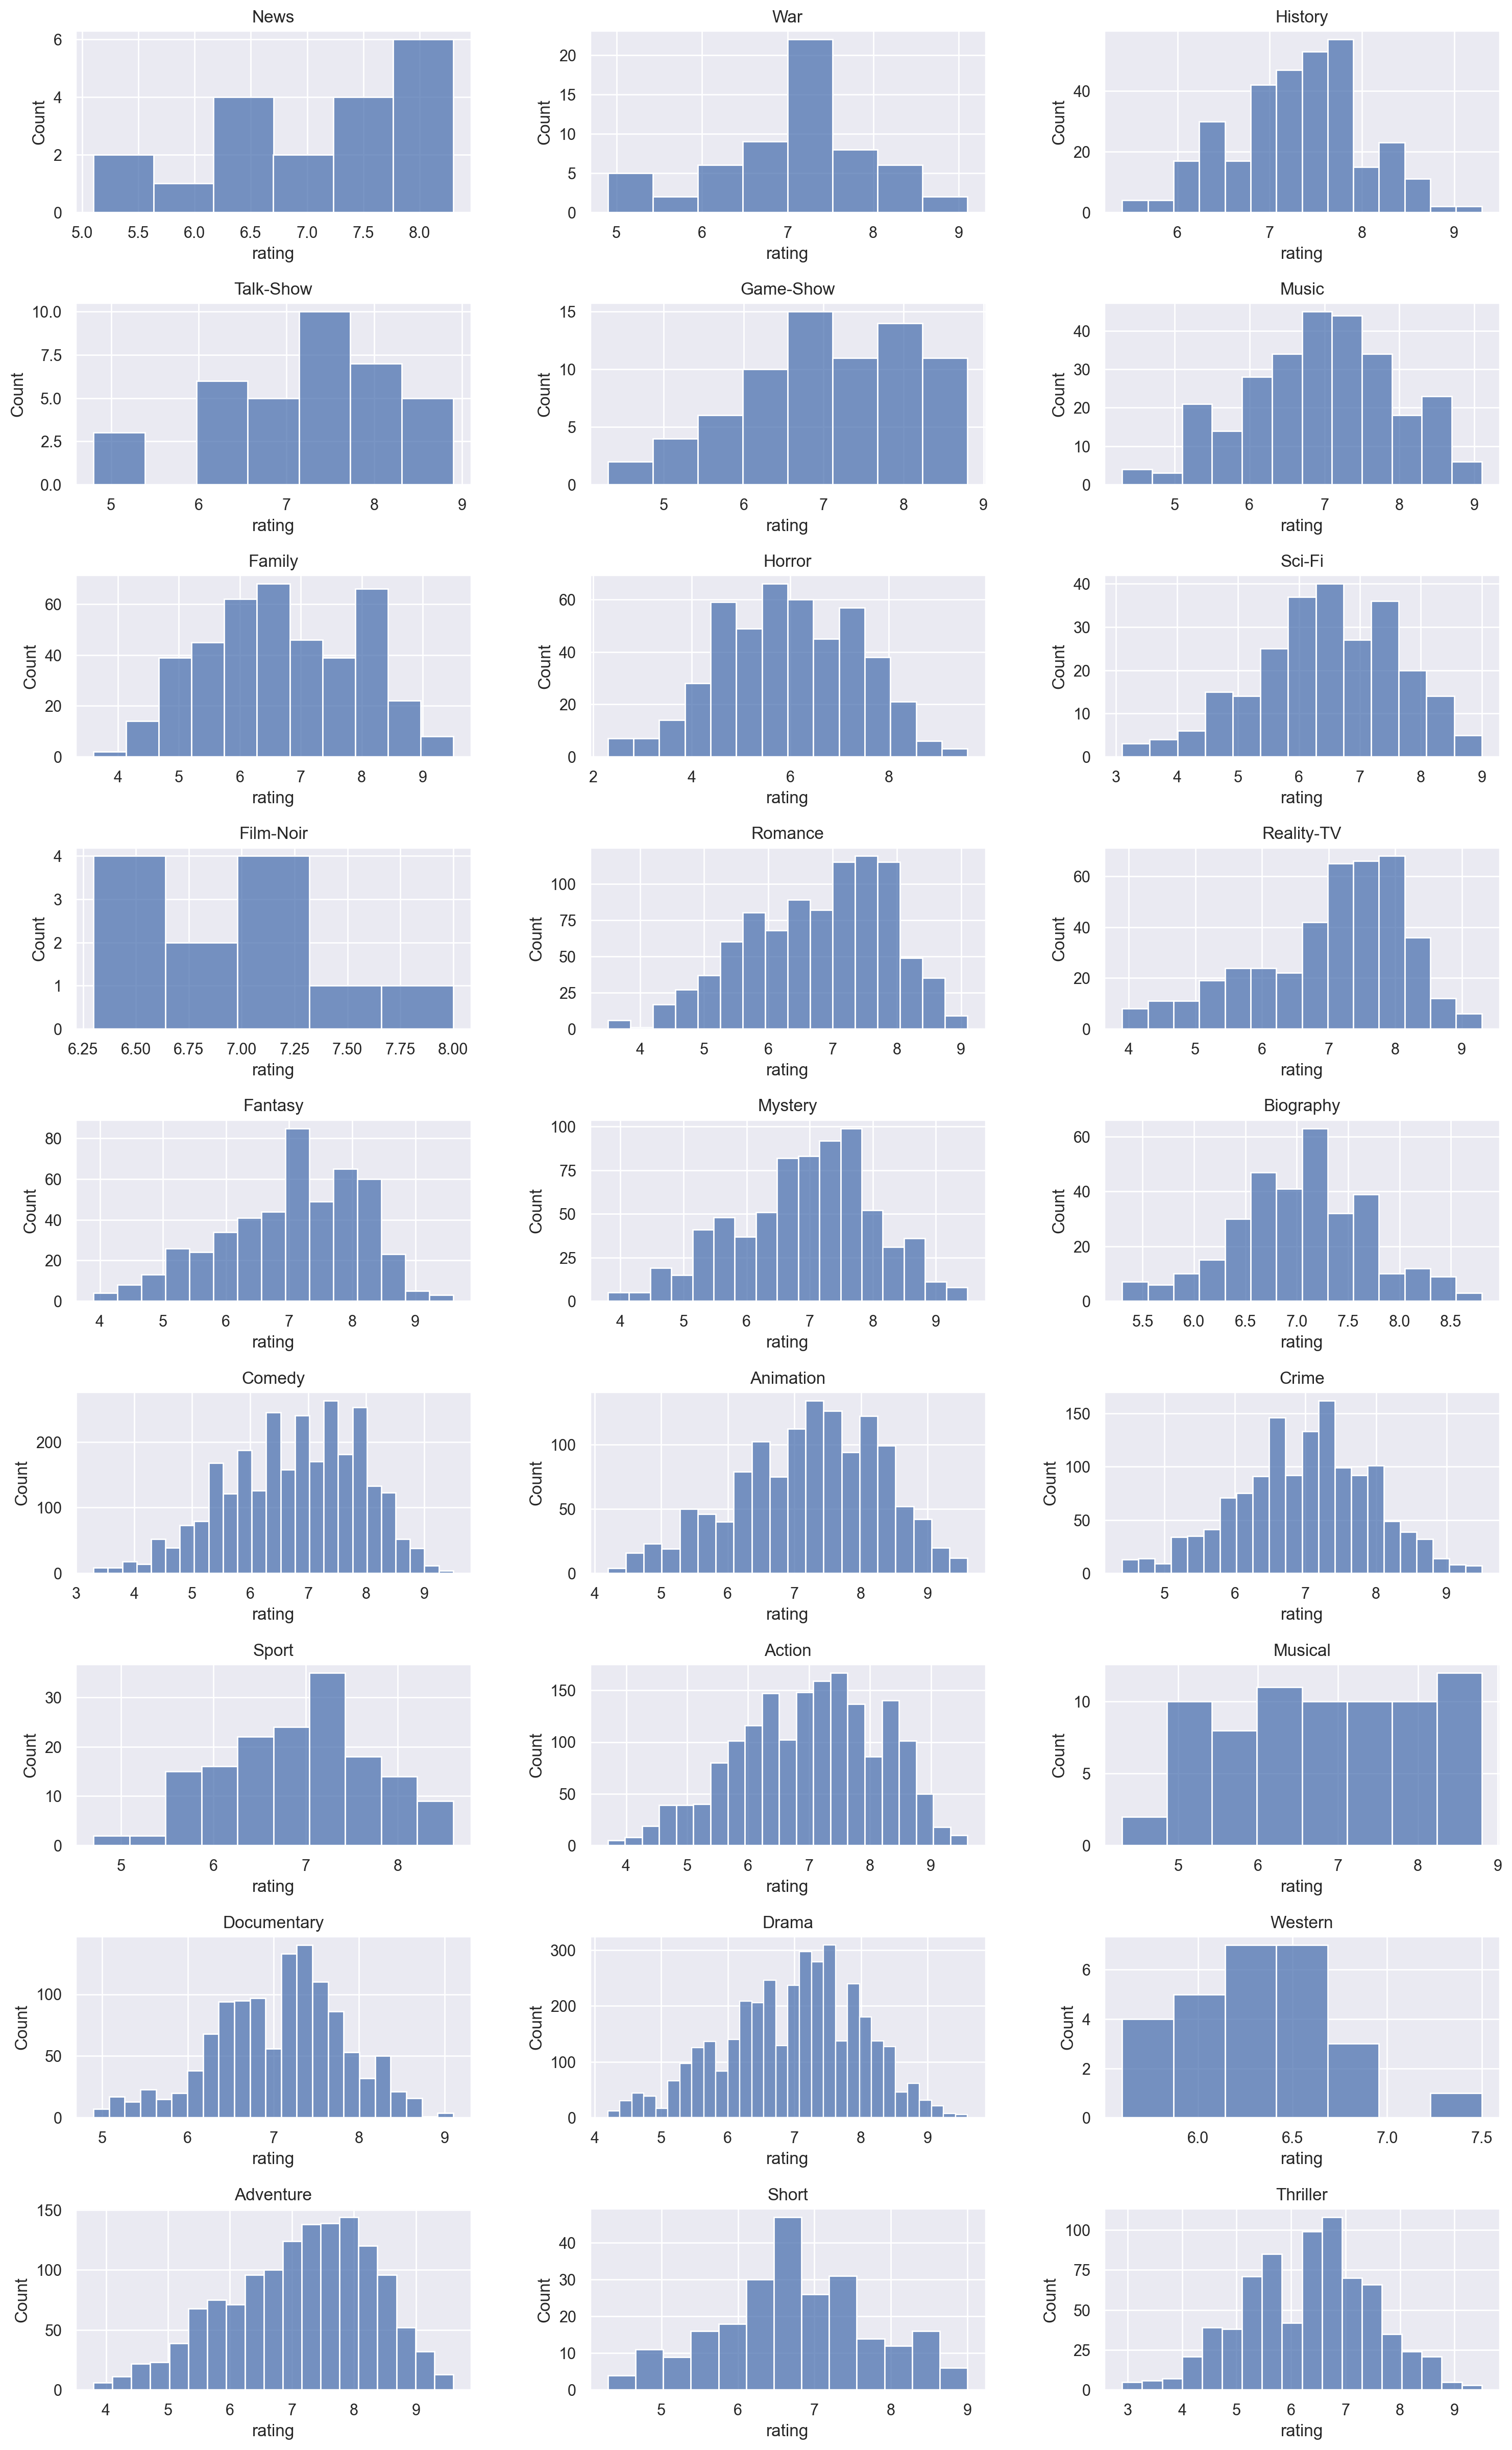

In [136]:
# Распределение рейтига у разных жанров

fig, axes = plt.subplots(9, 3, figsize=(18, 30))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
lst_genre = list(genre)
print(lst_genre)

for i in range(9):
    for j in range(3):
        sns.histplot(clean_data_out[clean_data_out[lst_genre[i*3 + j]] == 1]['rating'], ax=axes[i, j])
        axes[i, j].set_title(lst_genre[i*3 + j])

In [21]:
data_out.head(3)

title  year certificate  duration                      genre  \
0         Cobra Kai  2018       TV-14      30.0      Action, Comedy, Drama   
1         The Crown  2016       TV-MA      58.0  Biography, Drama, History   
2  Better Call Saul  2015       TV-MA      46.0               Crime, Drama   

   rating                                        description  \
0     8.5  Decades after their 1984 All Valley Karate Tou...   
1     8.7  Follows the political rivalries and romance of...   
2     8.9  The trials and tribulations of criminal lawyer...   

                                               stars   votes  Mystery  \
0  [RalphMacchio, WilliamZabka, CourtneyHenggeler...  177031        0   
1  [ClaireFoy, OliviaColman, ImeldaStaunton, Matt...  199885        0   
2  [BobOdenkirk, RheaSeehorn, JonathanBanks, Patr...  501384        0   

   Musical  Biography  Comedy  Western  Talk-Show  Music  Animation  War  \
0        0          0       1        0          0      0          0    0   
1        0          1       0        0          0      0          0    0   
2        0          0       0        0          0      0          0    0   

   Reality-TV  Documentary  Action  Thriller  Romance  Adventure  History  \
0           0            0       1         0        0          0        0   
1           0            0       0         0        0          0        1   
2           0            0       0         0        0          0        0   

   Film-Noir  Fantasy  Crime  Sci-Fi  Horror  Drama  Sport  Family  News  \
0          0        0      0       0       0      1      0       0     0   
1          0        0      0       0       0      1      0       0     0   
2          0        0      1       0       0      1      0       0     0   

   Short  Game-Show  top_stars  
0      0          0          4  
1      0          0          4  
2      0          0          4

### Genre - rating visualistion + test

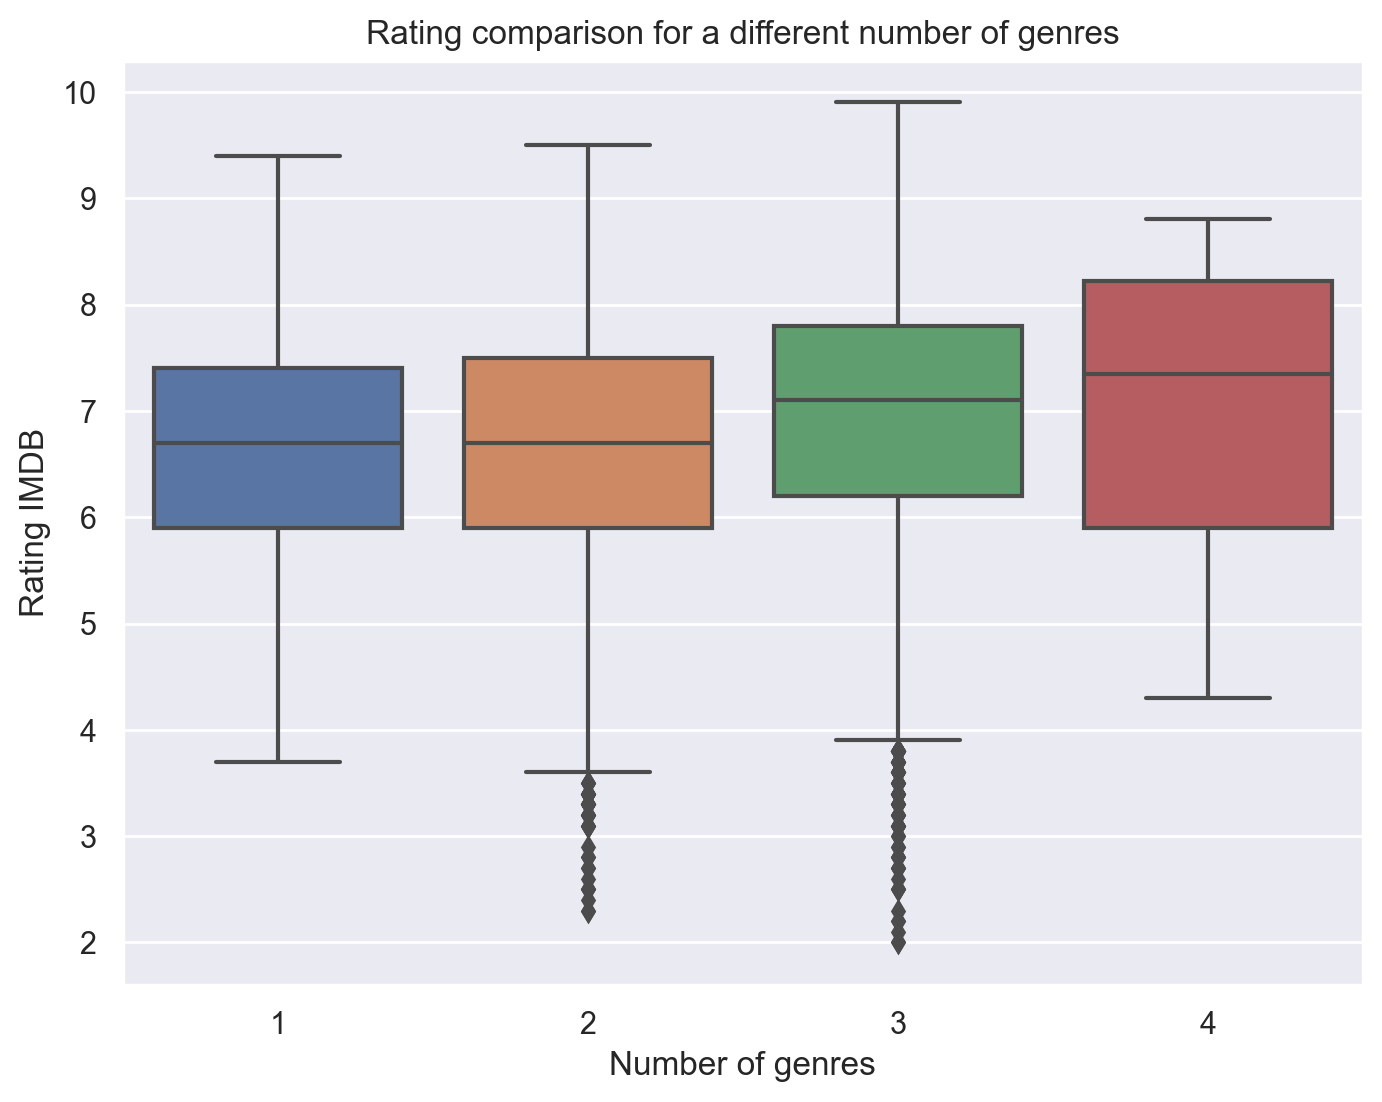

In [22]:
# Изучим как количество жанорв влияет на рейтинг
data_out['genre_count'] = data_out[lst_genre].sum(axis=1)
data_out_ = remove_outliers_by_genre(data_out, 'rating', ['genre_count'])

plt.figure(figsize=(8,6))
sns.boxplot(x='genre_count', y='rating', data=data_out_)
plt.title('Rating comparison for a different number of genres')
plt.xlabel('Number of genres')
plt.ylabel('Rating IMDB')
plt.show()

# Не особо значимые данные, нужен стат тест
# Интересно, что у 4 ящика межквартильный разброс больше

In [47]:
from scipy import stats
import scikit_posthocs as sp

Проверка нормальности (тест Шапиро-Уилка):


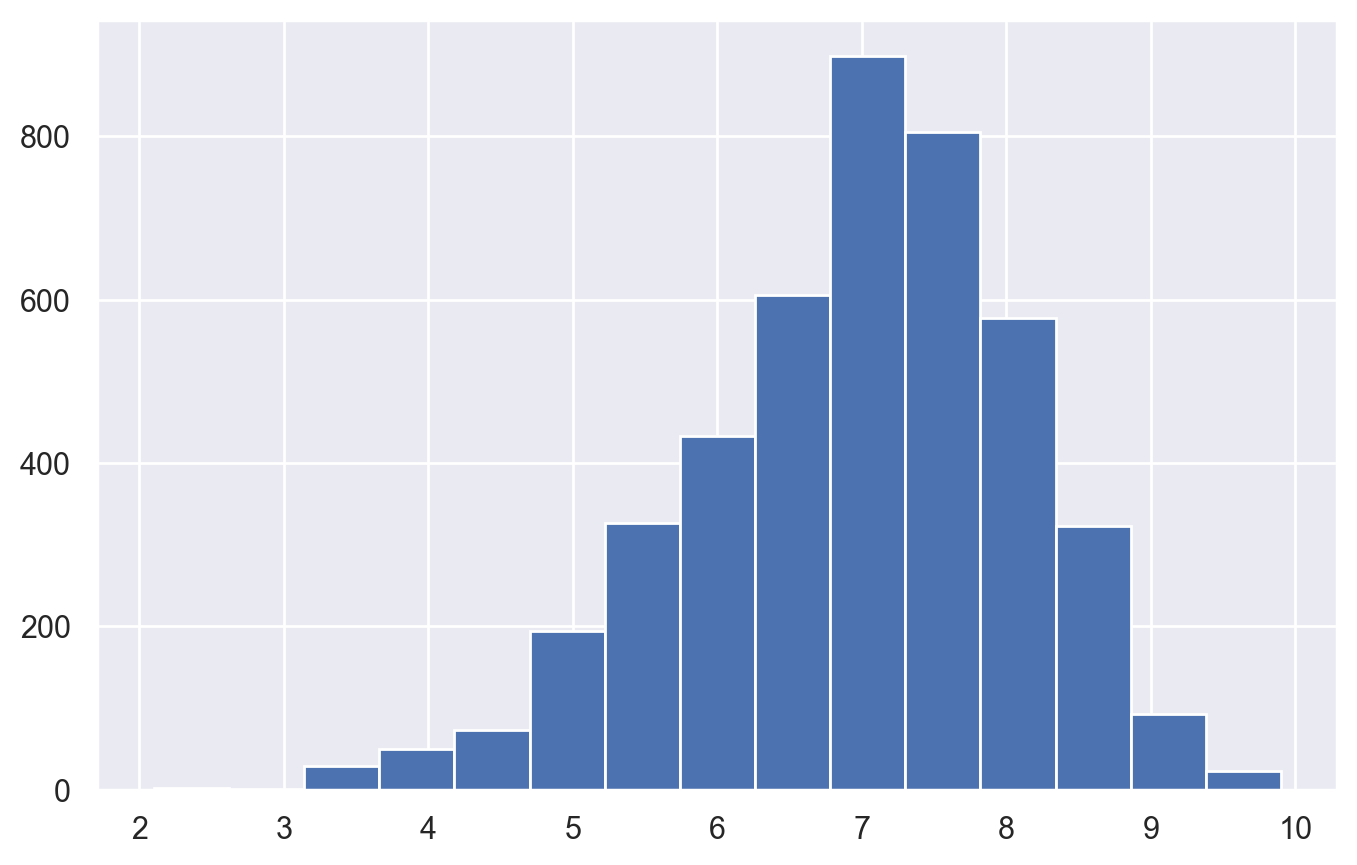

Группа 3: Статистика=0.980, P-значение=0.000


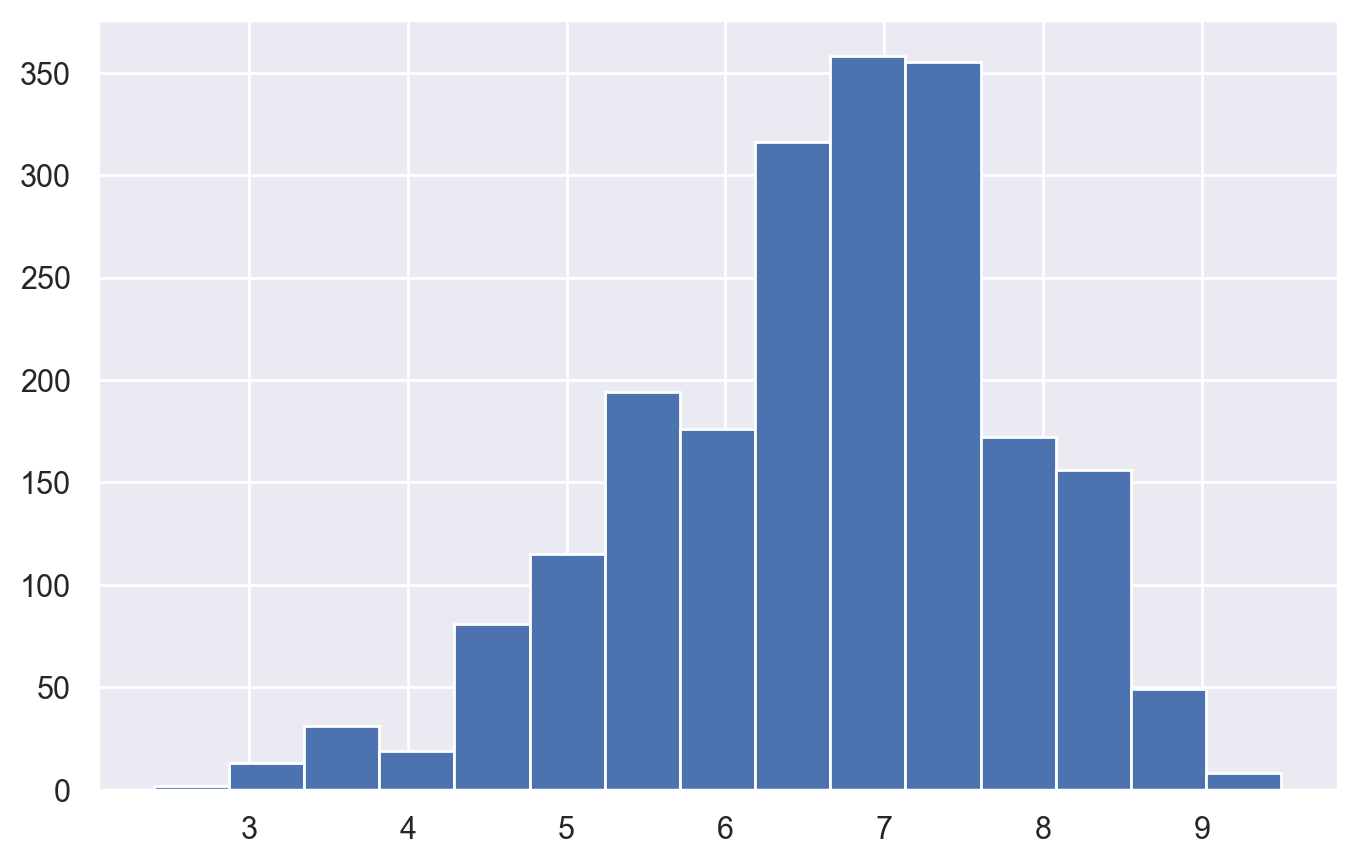

Группа 2: Статистика=0.982, P-значение=0.000


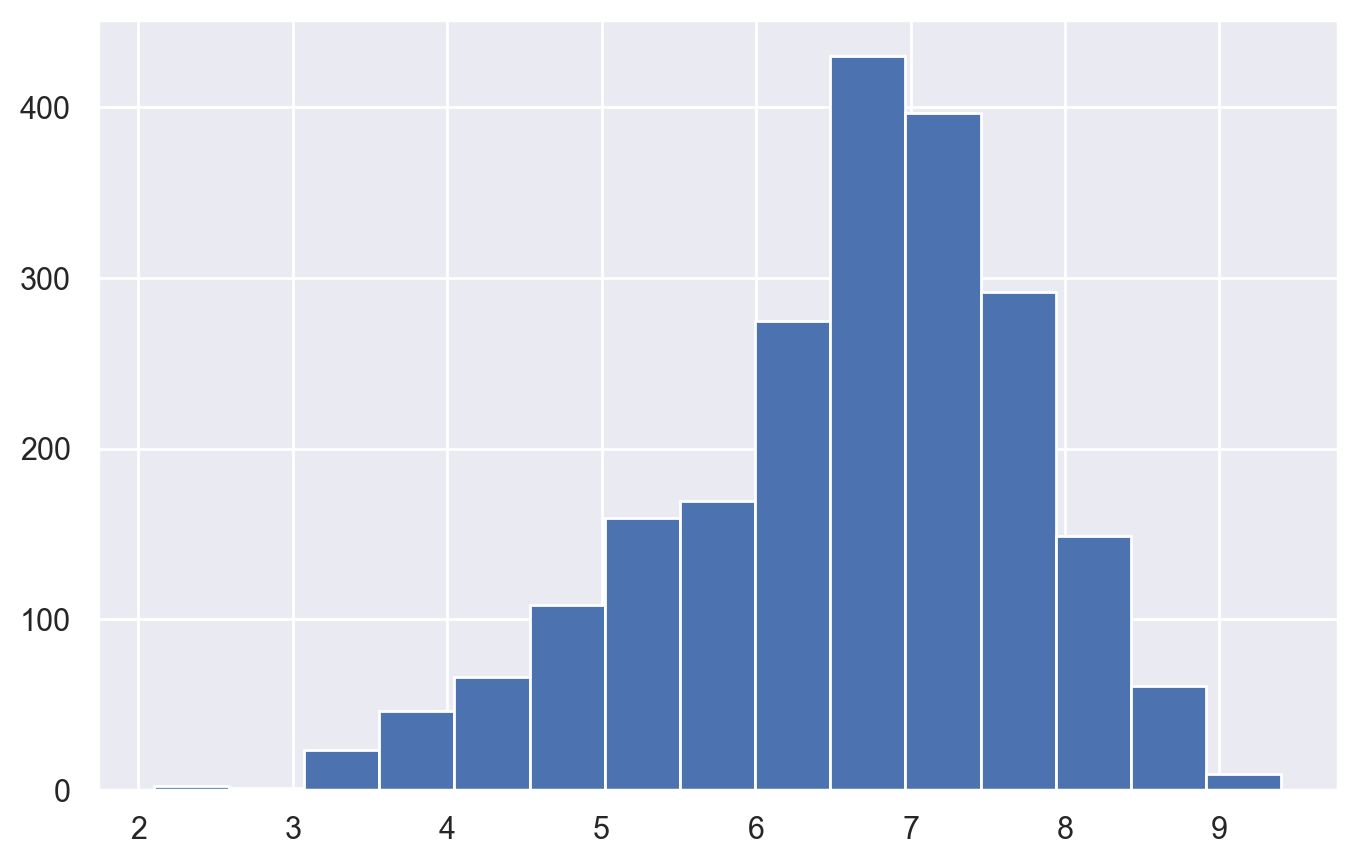

Группа 1: Статистика=0.976, P-значение=0.000


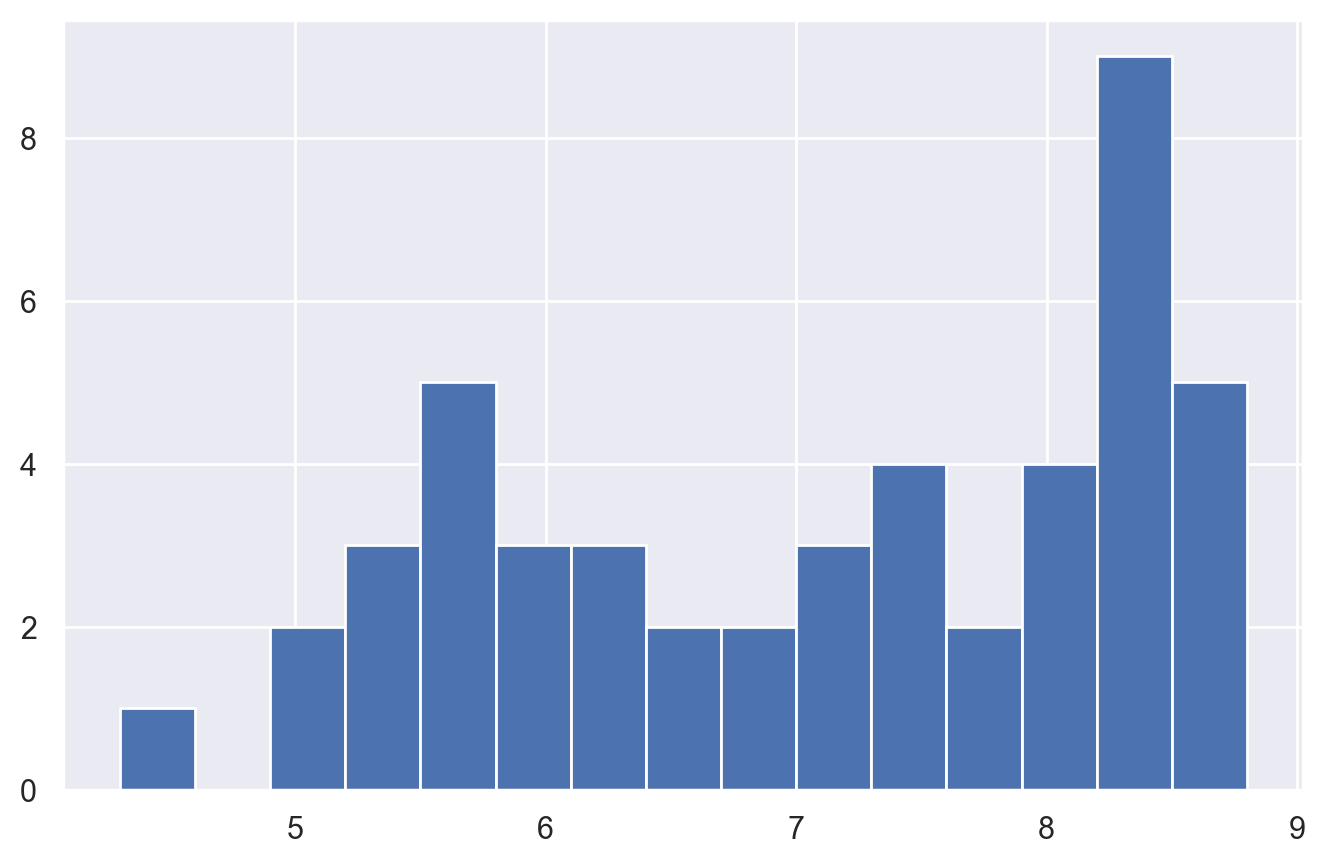

Группа 4: Статистика=0.915, P-значение=0.002


In [72]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in data_out_['genre_count'].unique():
    data_temp = data_out_[data_out_['genre_count']==group]['rating']
    data_temp.hist(bins=15)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Вывод: не применяем ANOVA, применяем Краскела-Уоллиса

In [75]:
# 1. Проведение критерия Краскела-Уоллиса
data_temp1 = data_out_[data_out_['genre_count']==1]['rating']
data_temp2 = data_out_[data_out_['genre_count']==2]['rating']
data_texp3 = data_out_[data_out_['genre_count']==3]['rating']
data_temp4 = data_out_[data_out_['genre_count']==4]['rating']

h_statistic, p_value_kw = stats.kruskal(data_temp1, data_temp2, data_temp3, data_temp4)

print(f"Критерий Краскела-Уоллиса:")
print(f"H-статистика: {h_statistic:.2f}")
print(f"P-значение: {p_value_kw:.3f}")

Критерий Краскела-Уоллиса:
H-статистика: 192.10
P-значение: 0.000


Различия есть, вот какие

In [52]:
sp.posthoc_dunn(data_out_, val_col='rating', group_col='genre_count', p_adjust='bonferroni')

1             2             3         4
1  1.000000e+00  1.000000e+00  7.837014e-27  0.063105
2  1.000000e+00  1.000000e+00  6.510944e-27  0.057579
3  7.837014e-27  6.510944e-27  1.000000e+00  1.000000
4  6.310476e-02  5.757910e-02  1.000000e+00  1.000000

На уровне значимости 0.05:
* фильмы с тремя жанрами имеют большую оценку по сравнению с фильмами с 1 и 2 указанными жанрами 

### Famous_actors - rating visualistion + test

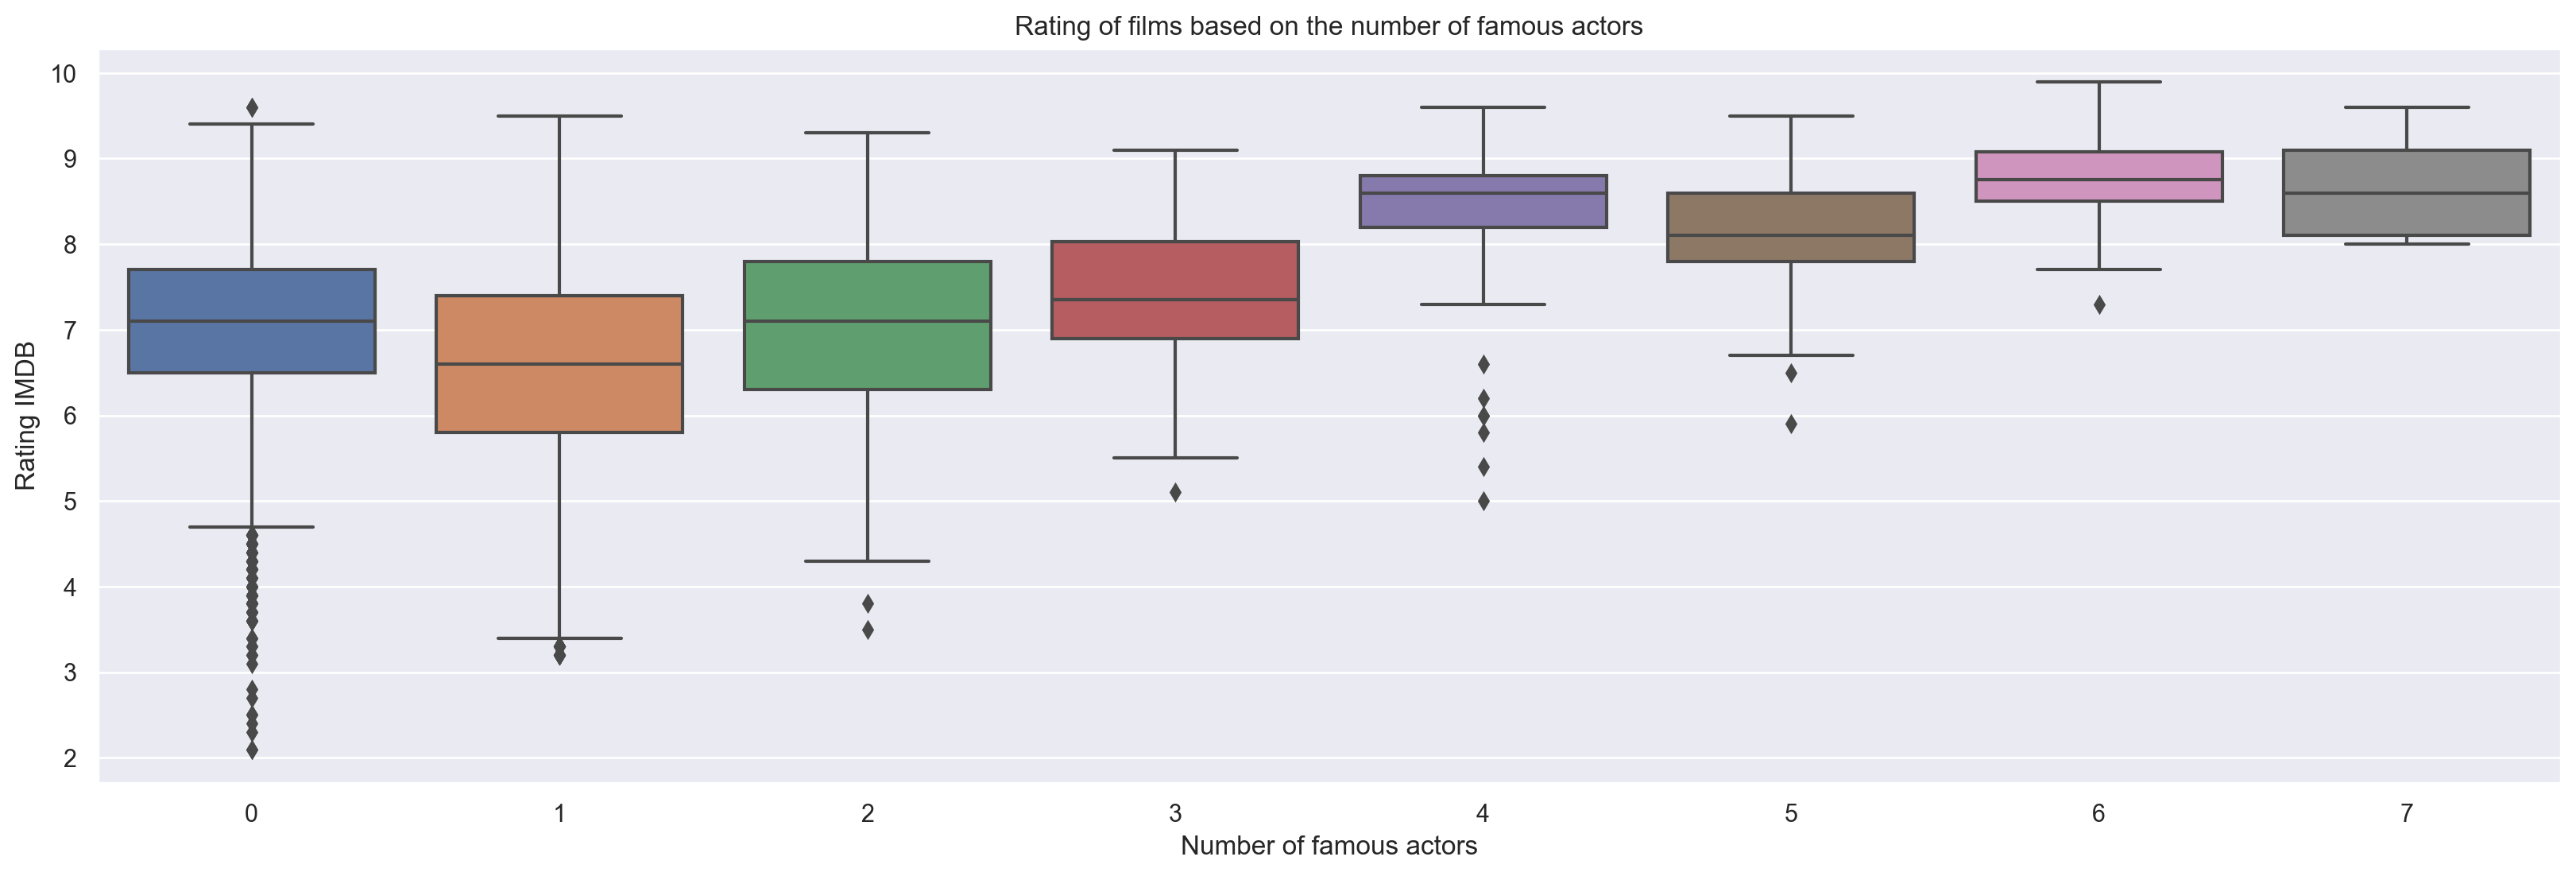

In [137]:
data_out_ = remove_outliers_by_genre(data_out, 'rating', ['top_stars'])

plt.figure(figsize=(20,6))
sns.boxplot(x='top_stars', y='rating', data=data_out_)
plt.title('Rating of films based on the number of famous actors')
plt.xlabel('Number of famous actors')
plt.ylabel('Rating IMDB')
plt.show()

# Ценная зависимость, желательно сделать статистический тест
# Почему первый boxplot выше второго? Возможно неправильно отобраны топовые актеры или есть другие зависимости

<Axes: xlabel='top_stars', ylabel='rating'>

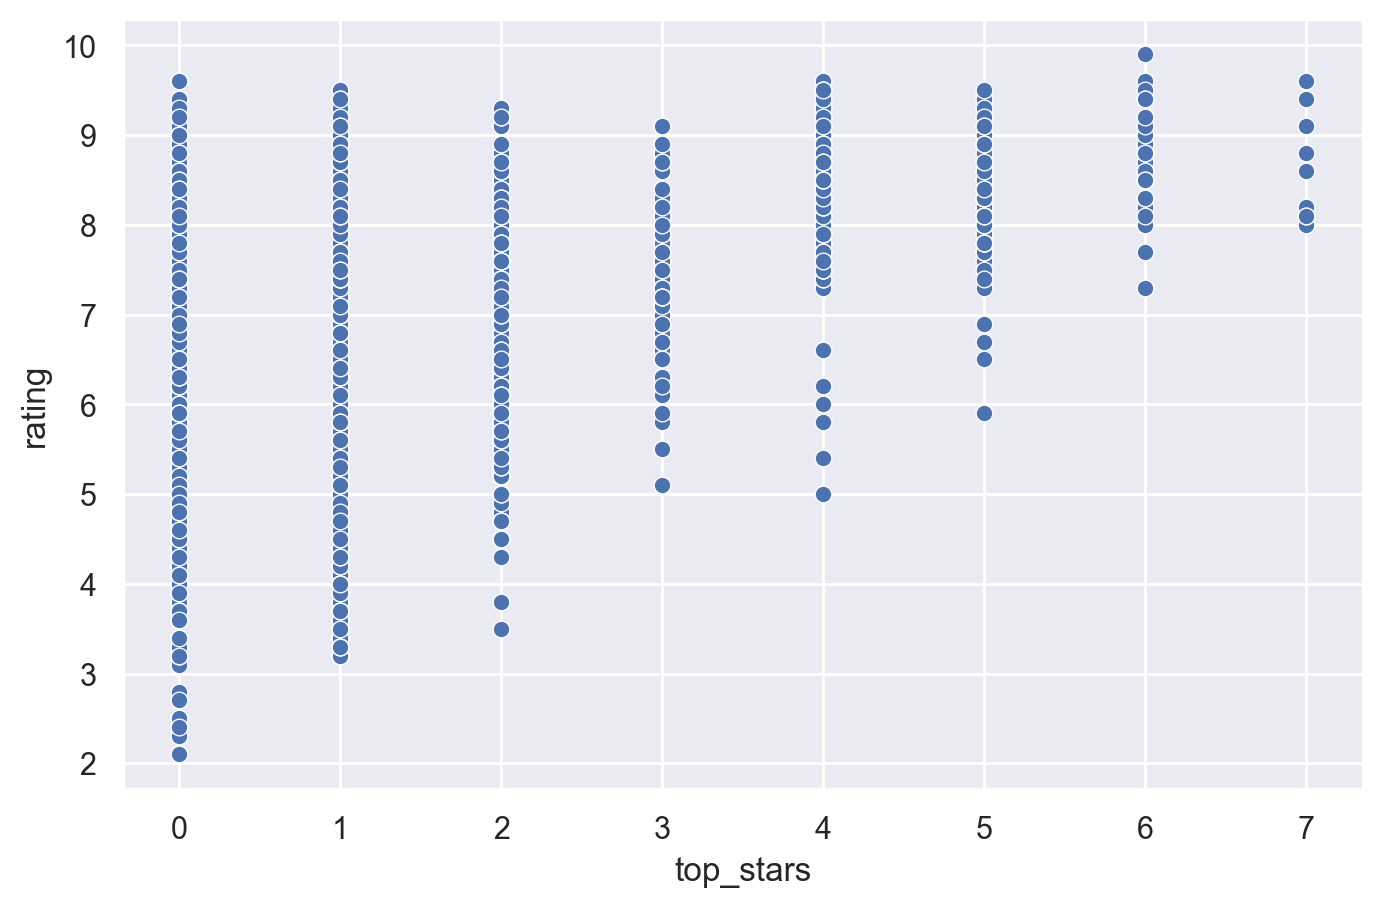

In [138]:
sns.scatterplot(data=data_out_, x="top_stars", y="rating")

In [139]:
tau, p_value = stats.kendalltau(data_out_['top_stars'],data_out_['rating'] )

print(f"Коэффициент корреляции Кендалла (тау): {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Кендалла (тау): 0.002
p-значение: 0.789


In [140]:
tau, p_value = stats.spearmanr(data_out_['top_stars'],data_out_['rating'] )

print(f"Коэффициент корреляции Спирмена (r): {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Спирмена (r): 0.008
p-значение: 0.465


Монотонной связи не обнаружено

Проверка нормальности (тест Шапиро-Уилка):


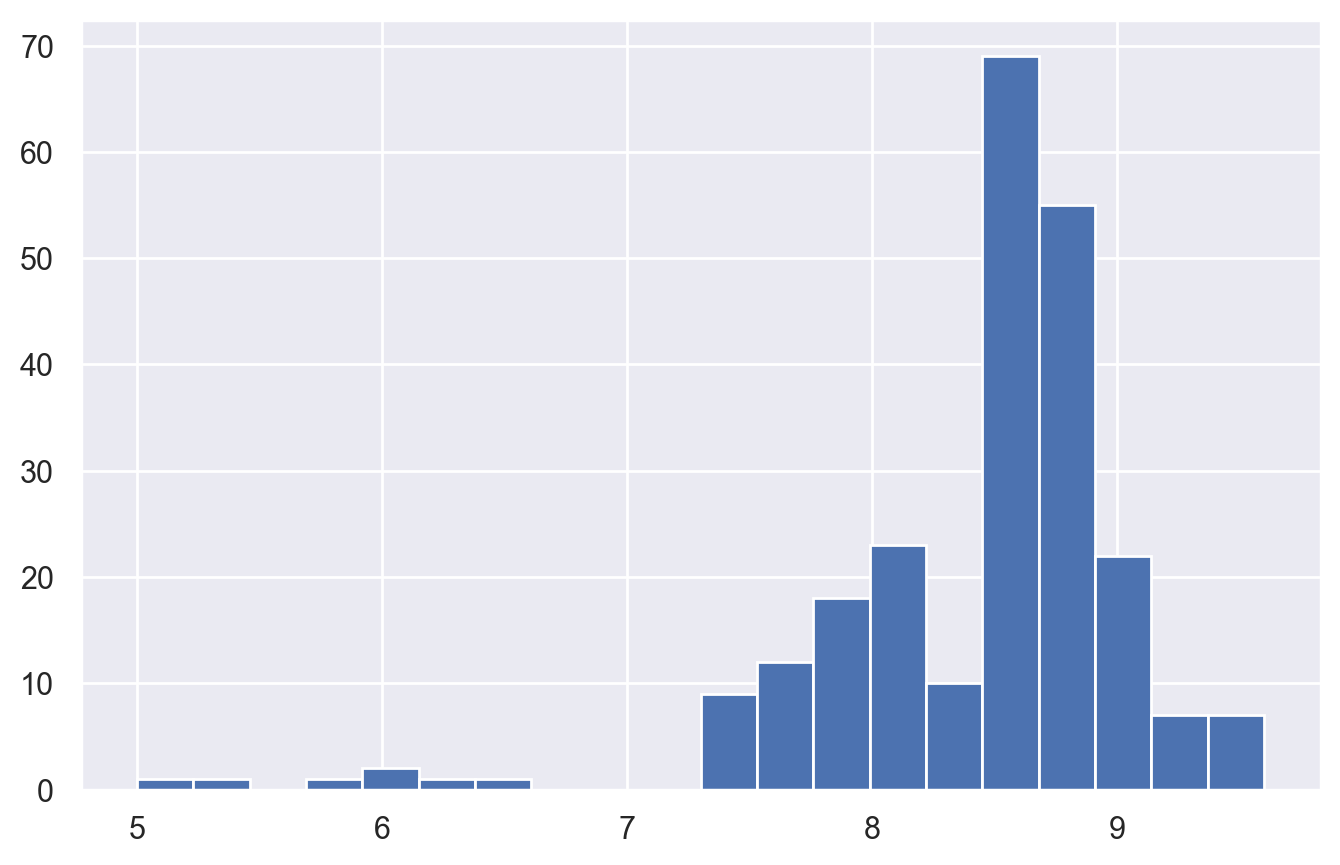

Группа 4: Статистика=0.847, P-значение=0.000


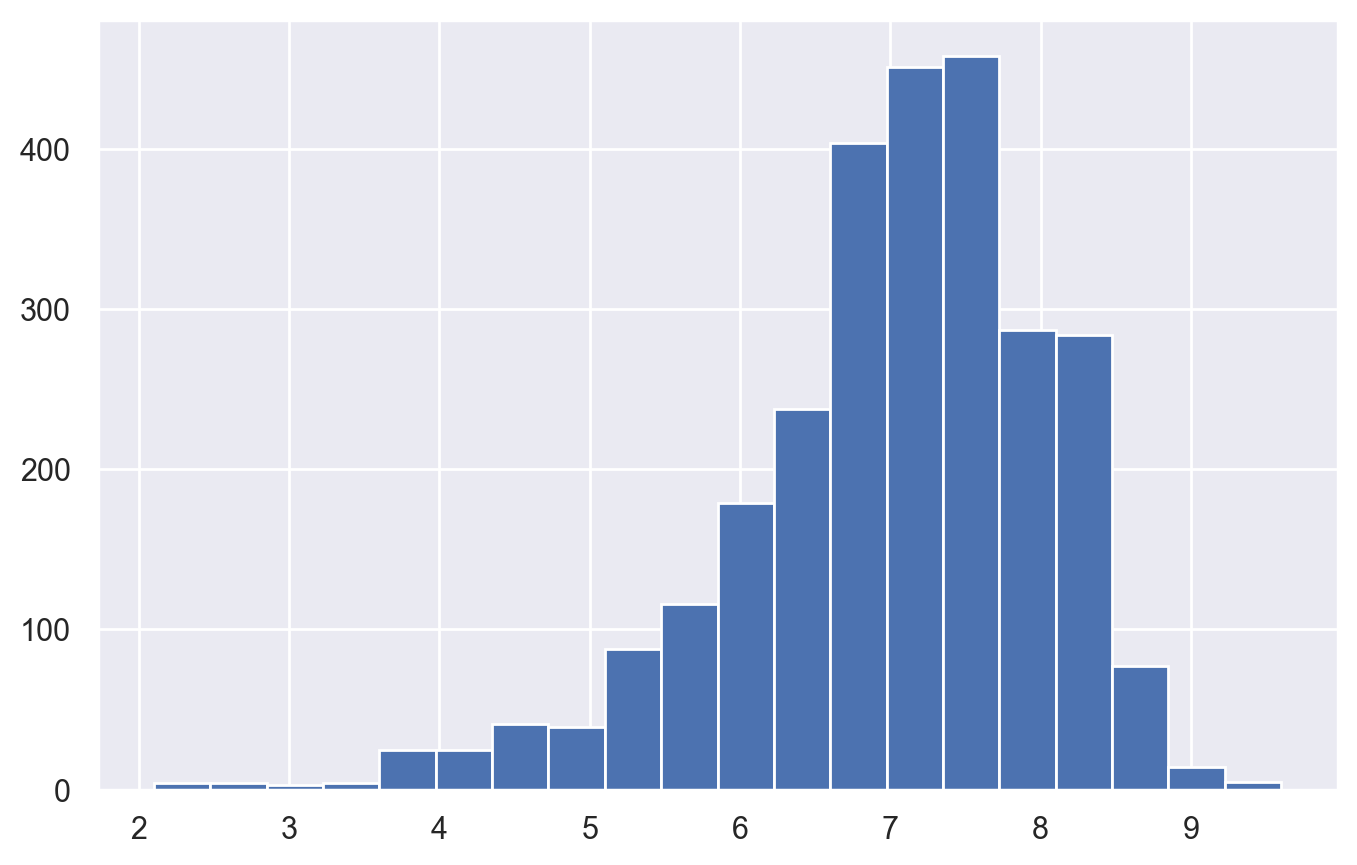

Группа 0: Статистика=0.952, P-значение=0.000


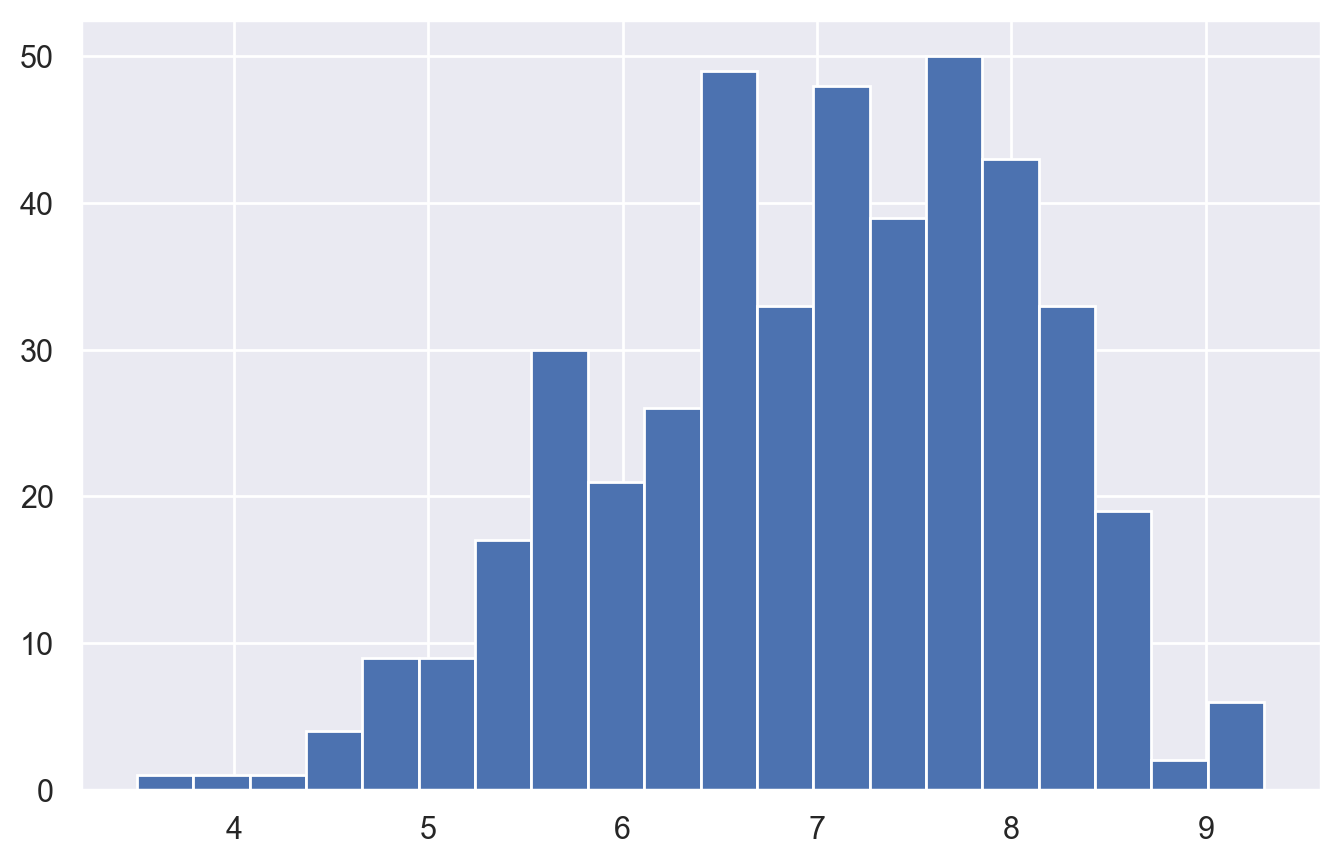

Группа 2: Статистика=0.985, P-значение=0.000


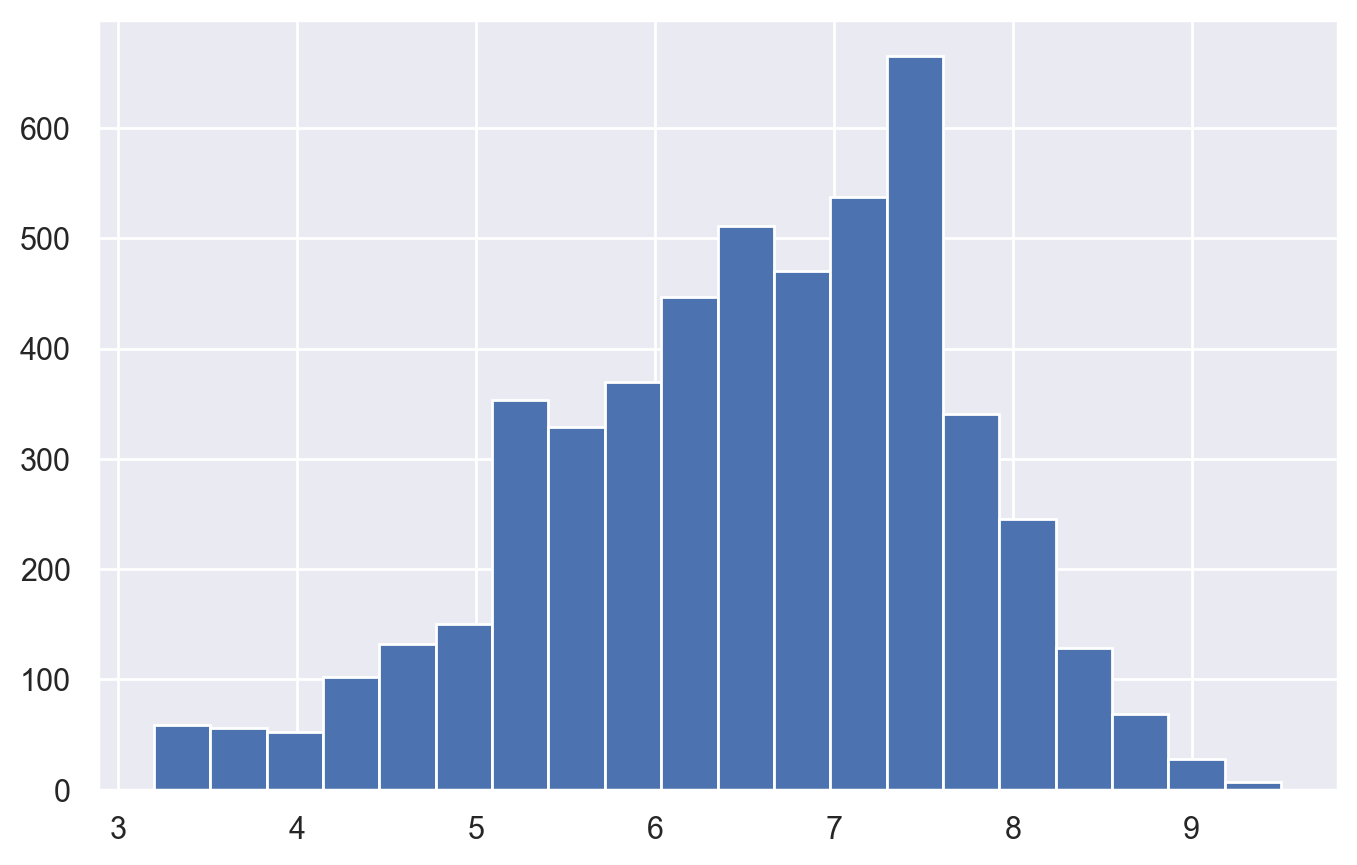

Группа 1: Статистика=0.984, P-значение=0.000


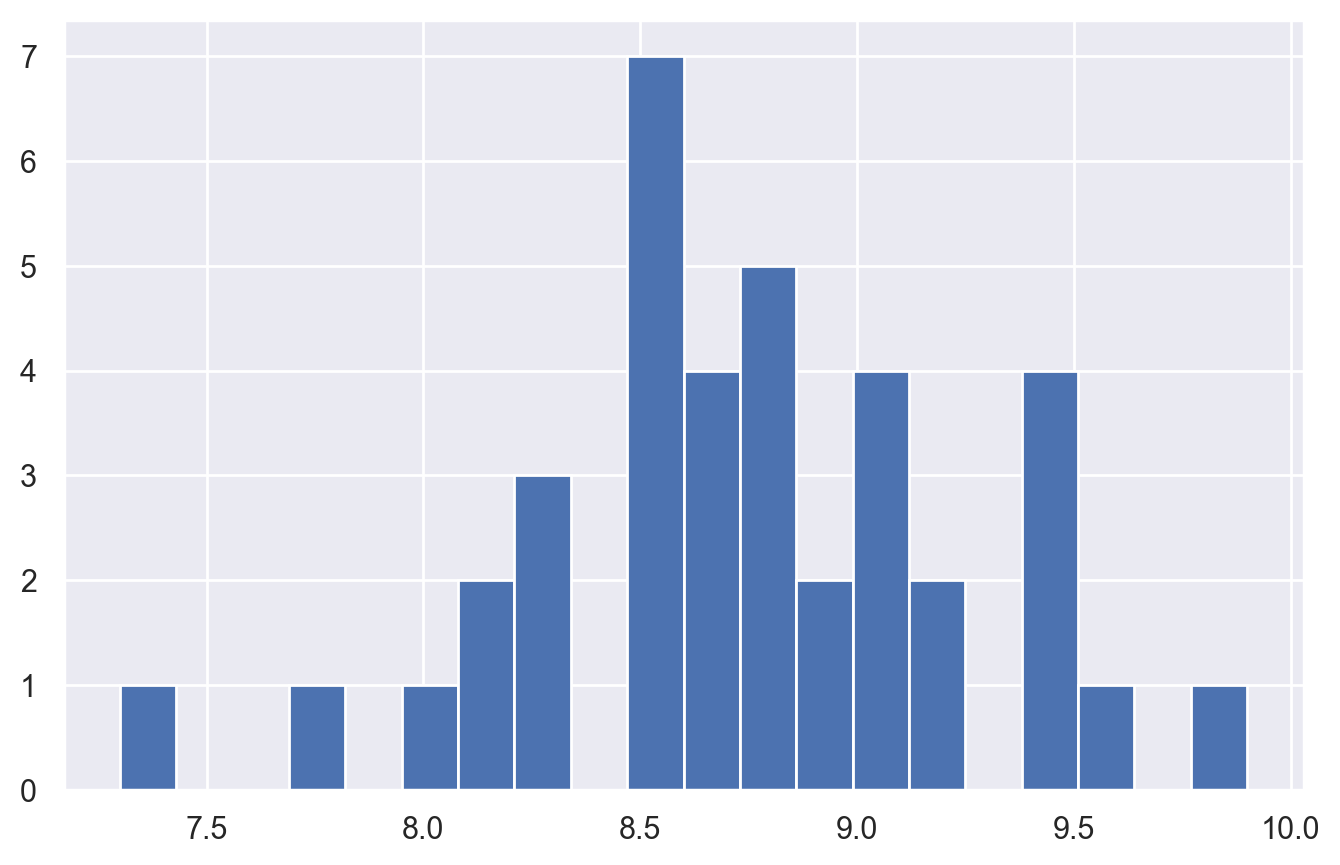

Группа 6: Статистика=0.982, P-значение=0.787


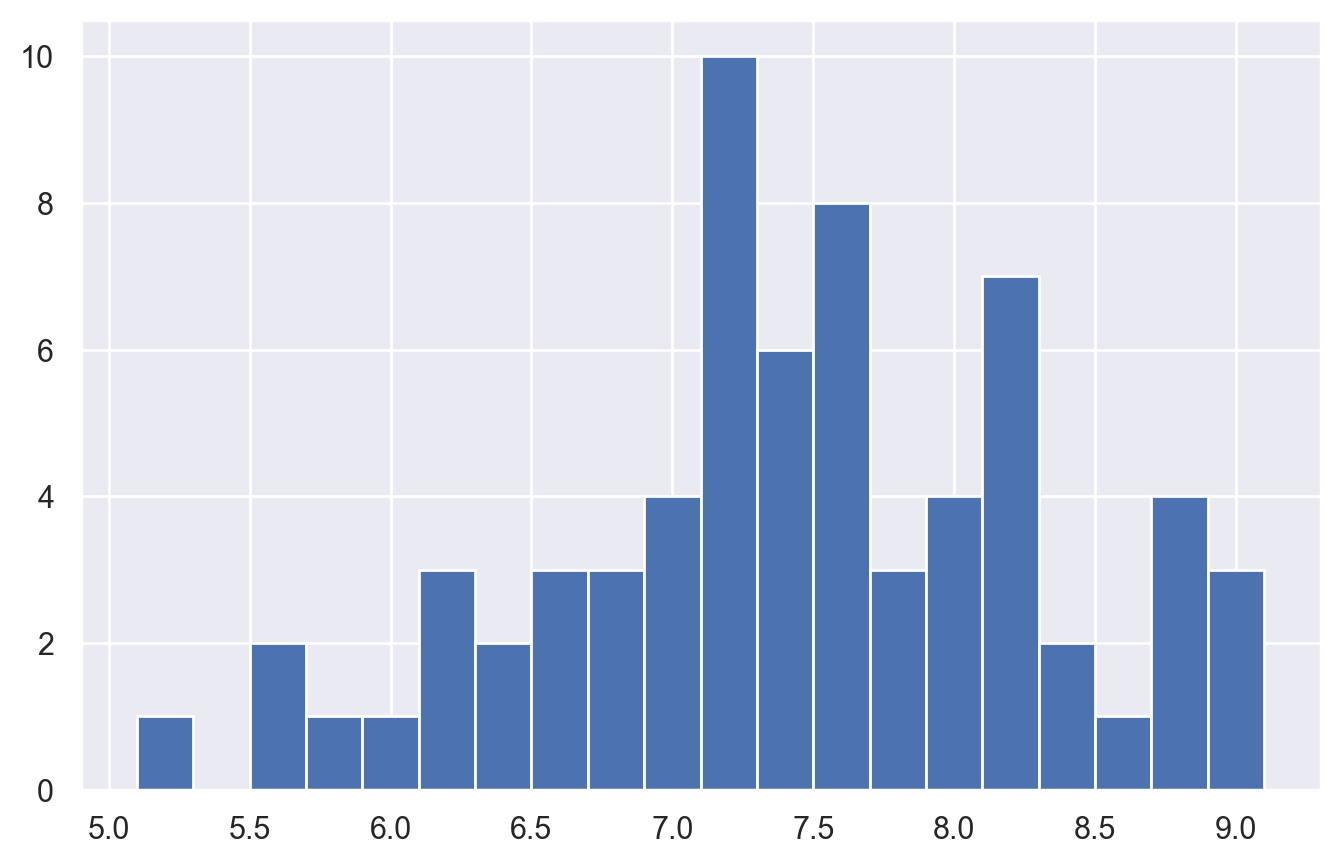

Группа 3: Статистика=0.985, P-значение=0.583


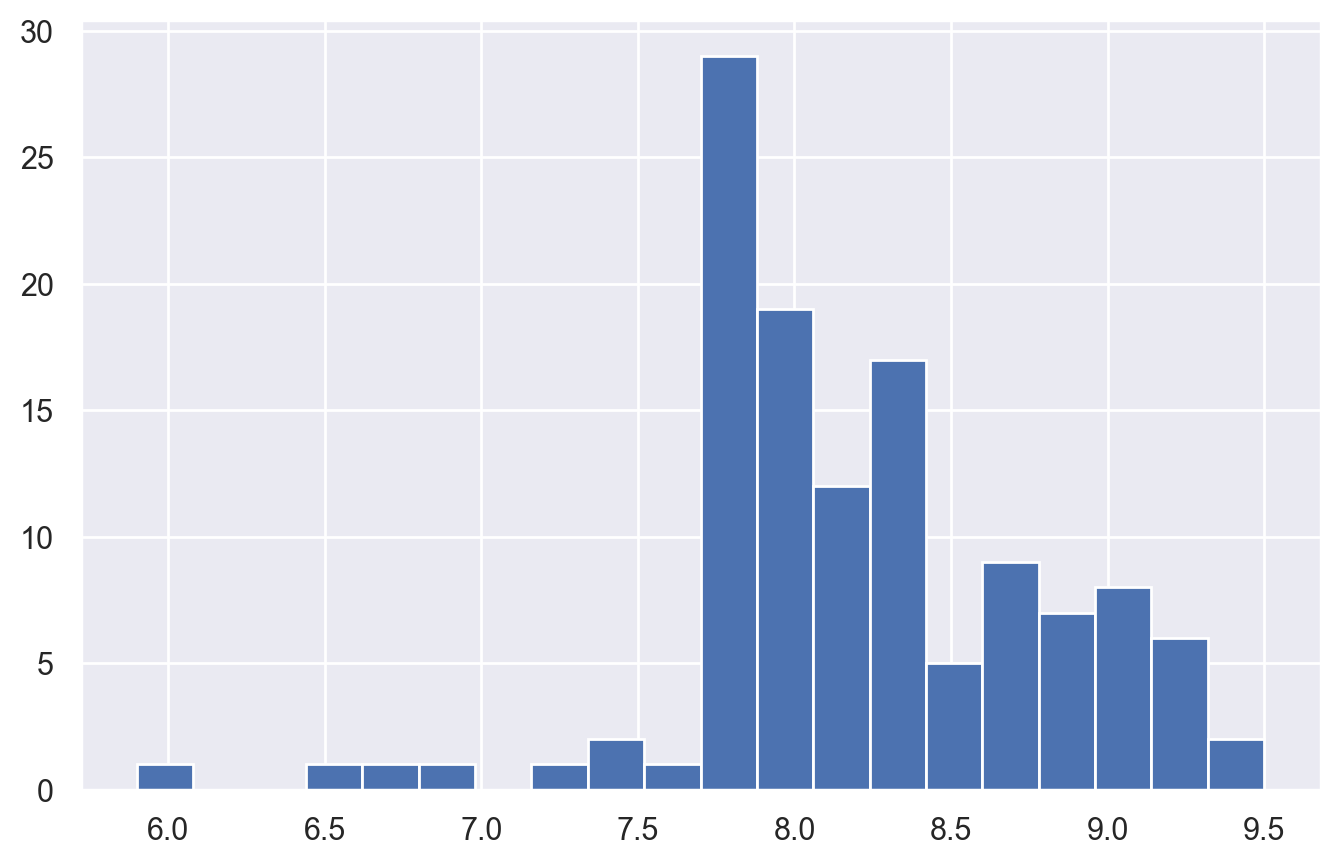

Группа 5: Статистика=0.946, P-значение=0.000


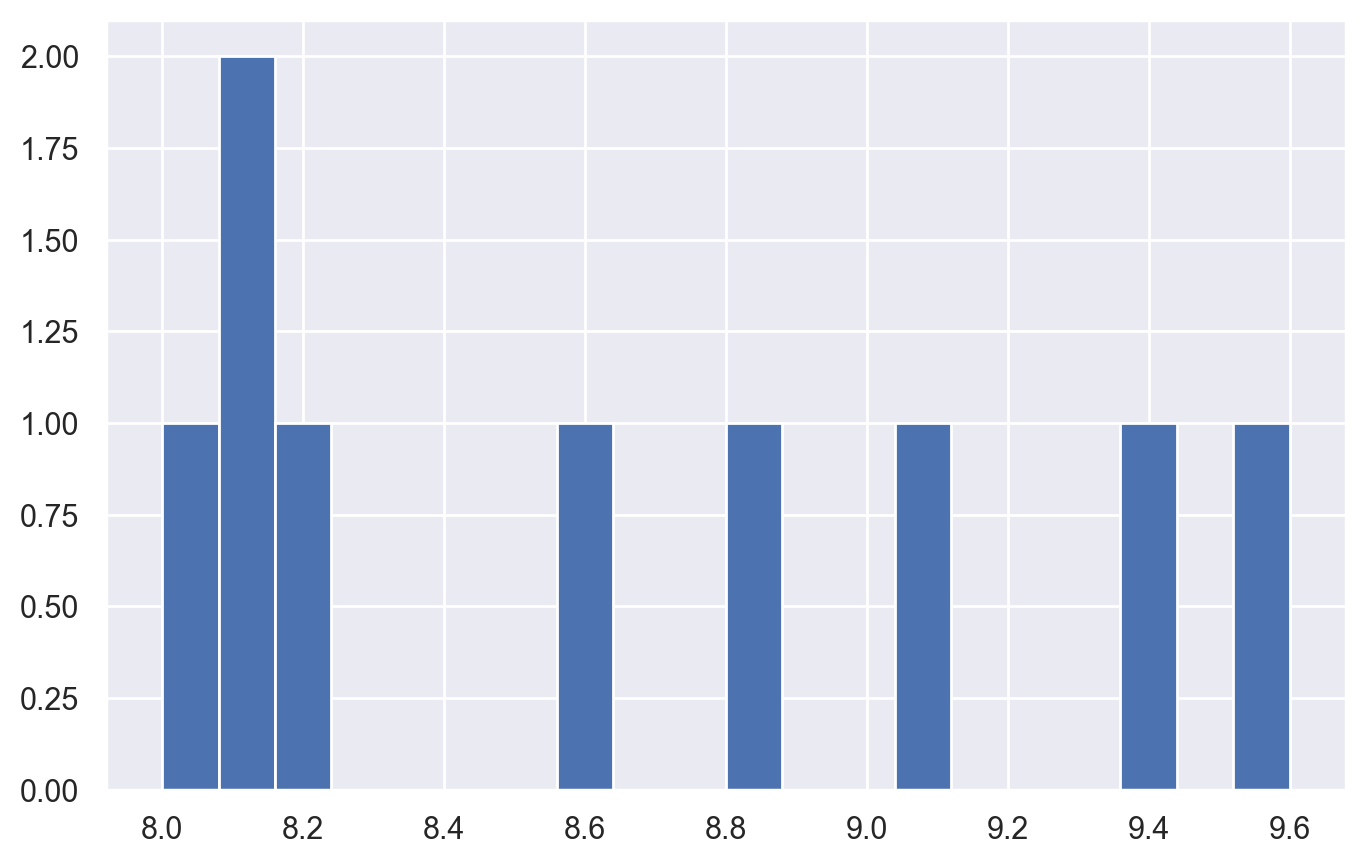

Группа 7: Статистика=0.897, P-значение=0.233


In [71]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in data_out_['top_stars'].unique():
    data_temp = data_out_[data_out_['top_stars']==group]['rating']
    data_temp.hist(bins=20)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Нормальностью тут и не пахнет

In [141]:
# 1. Проведение критерия Краскела-Уоллиса

h_statistic, p_value_kw = stats.kruskal(*[ data_out_[data_out_['top_stars']==i]['rating'] for i in data_out_['top_stars'].unique()])

print(f"Критерий Краскела-Уоллиса:")
print(f"H-статистика: {h_statistic:.2f}")
print(f"P-значение: {p_value_kw:.3f}")

Критерий Краскела-Уоллиса:
H-статистика: 1170.26
P-значение: 0.000


Какое то различие есть, но какое....

In [145]:
posthoc_temp = sp.posthoc_dunn(data_out_, val_col='rating', group_col='top_stars', p_adjust='bonferroni')

In [149]:
posthoc_temp.round(2)

0    1     2     3    4    5    6     7
0  1.00  0.0  1.00  0.29  0.0  0.0  0.0  0.00
1  0.00  1.0  0.00  0.00  0.0  0.0  0.0  0.00
2  1.00  0.0  1.00  0.21  0.0  0.0  0.0  0.00
3  0.29  0.0  0.21  1.00  0.0  0.0  0.0  0.11
4  0.00  0.0  0.00  0.00  1.0  1.0  1.0  1.00
5  0.00  0.0  0.00  0.00  1.0  1.0  1.0  1.00
6  0.00  0.0  0.00  0.00  1.0  1.0  1.0  1.00
7  0.00  0.0  0.00  0.11  1.0  1.0  1.0  1.00

Cкладывается такое ощущение что у нас тут "граница" между 3 и 4.
Оформим ее в данных.

In [109]:
data_out_['top_stars>3'] =False
data_out_.loc[data_out_['top_stars'] > 3 , 'top_stars>3'] = True

/var/folders/jp/f7t7txj57bjbw25n_6syymsr0000gn/T/ipykernel_9475/792454901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out_['top_stars>3'] =False


Проверим получившиеся группы


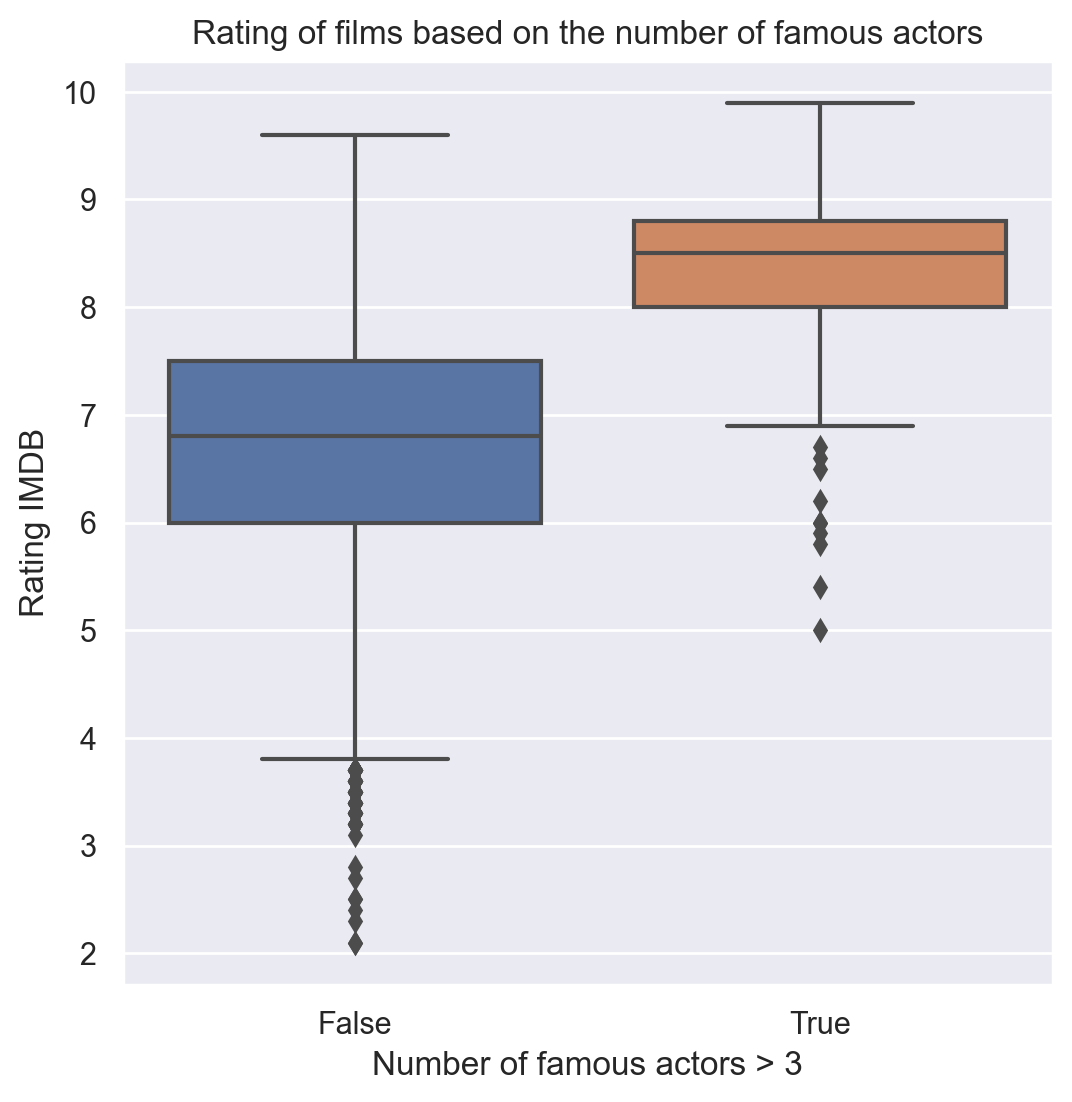

In [127]:
plt.figure(figsize=(6,6))
sns.boxplot(x='top_stars>3', y='rating', data=data_out_)
plt.title('Rating of films based on the number of famous actors')
plt.xlabel('Number of famous actors > 3')
plt.ylabel('Rating IMDB')
plt.show()


Проверка нормальности (тест Шапиро-Уилка):


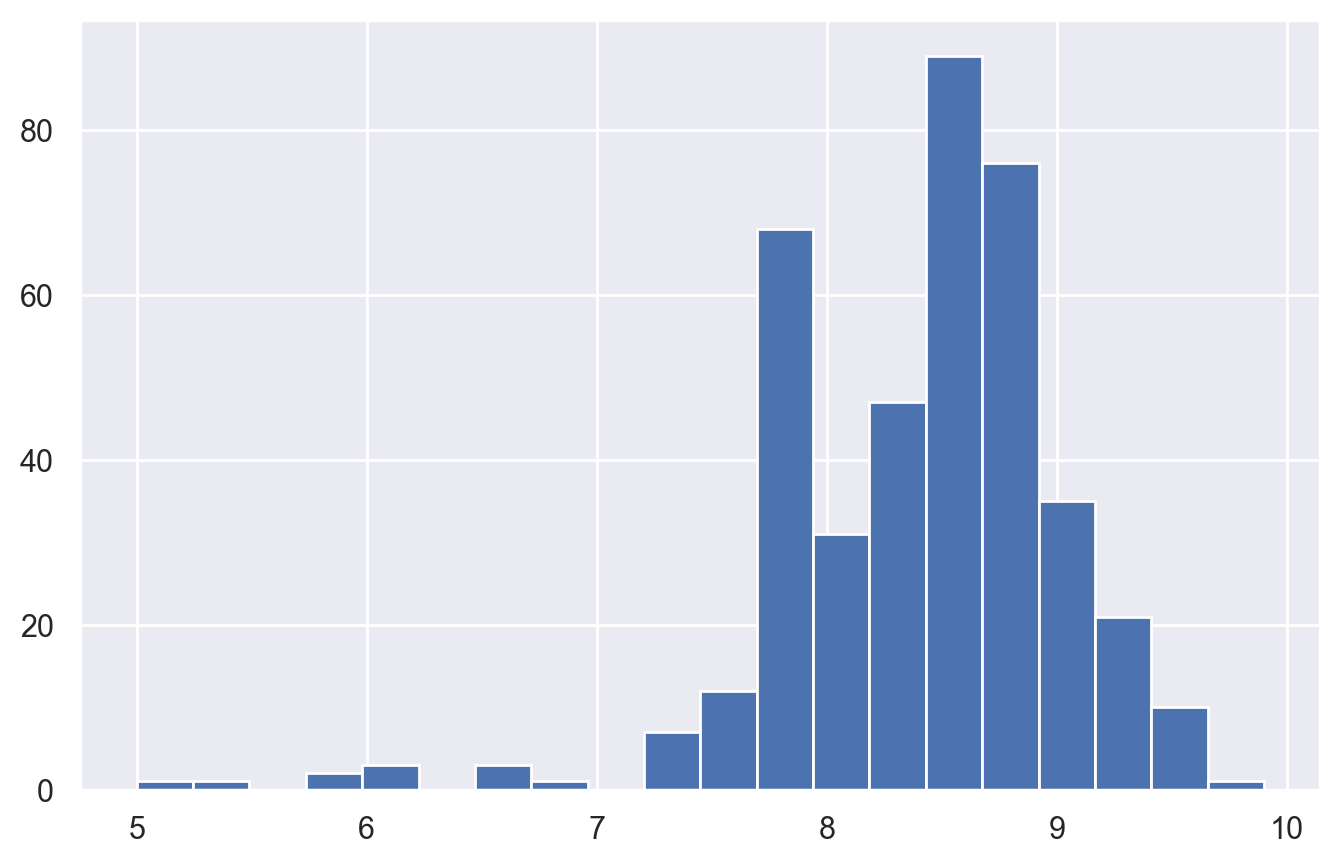

Группа True: Статистика=0.920, P-значение=0.000


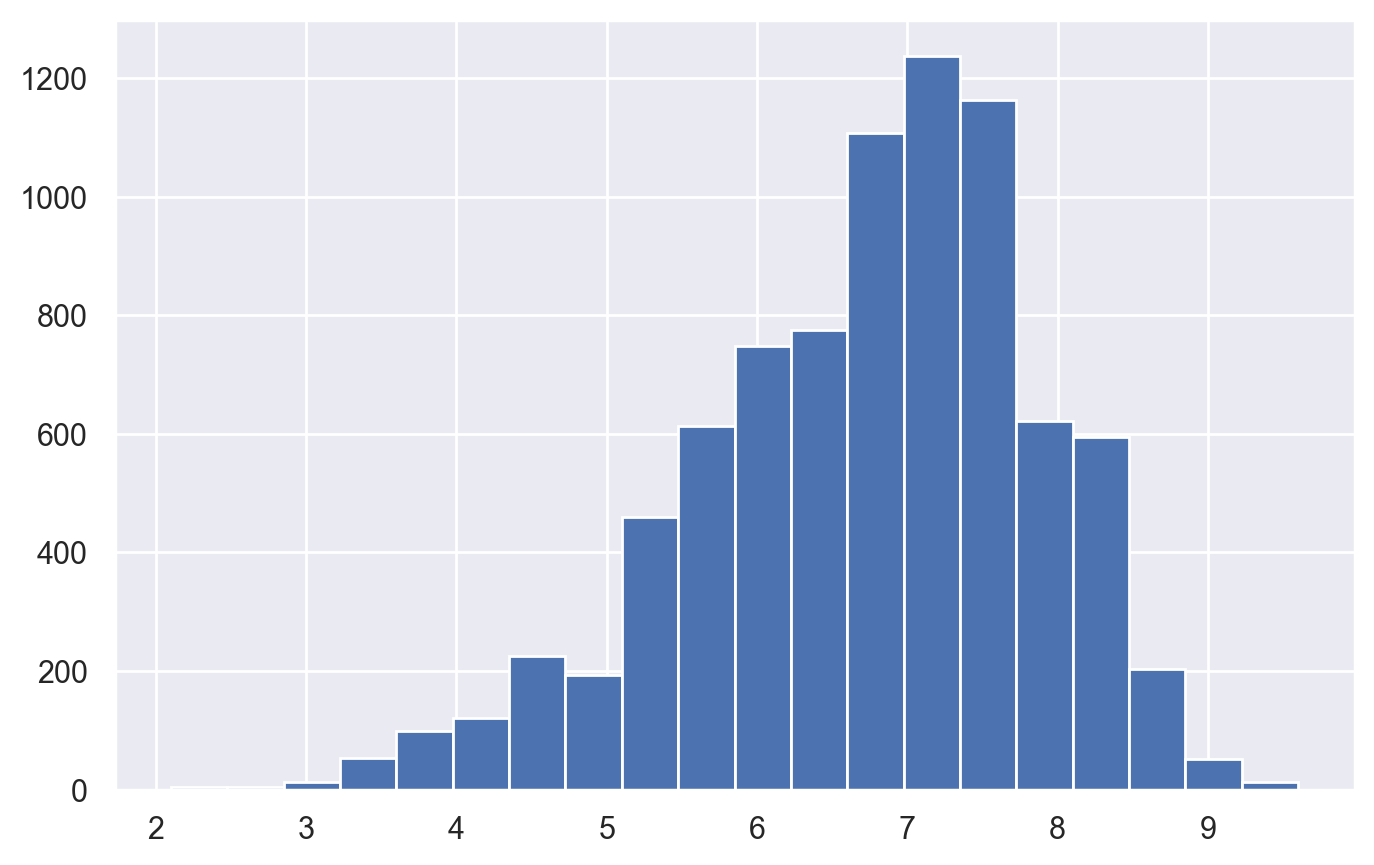

Группа False: Статистика=0.976, P-значение=0.000


/Users/ajratik/Library/Python/3.10/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8306.
  res = hypotest_fun_out(*samples, **kwds)


In [112]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in data_out_['top_stars>3'].unique():
    data_temp = data_out_[data_out_['top_stars>3']==group]['rating']
    data_temp.hist(bins=20)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Ненормальные распредления

In [126]:
stat_U, p_U = stats.mannwhitneyu(data_out_[data_out_['top_stars>3']]['rating'], data_out_[~data_out_['top_stars>3']]['rating'] )
print(f"Критерий Манна-Уитни:")
print(f"U-статистика: {stat_U:.2f}")
print(f"P-значение: {p_U:.3f}")

Критерий Манна-Уитни:
U-статистика: 3113375.00
P-значение: 0.000


Получившиеся группы статистически различаются: 
* фильмы с 4 и более топ актерами получают большие оценки

## Merge tables

### Прямые совпадения

In [273]:
data_out['title'].value_counts()

Top Gear                                            92
Bleach                                              67
Avatar: The Last Airbender                          53
Johnny Test                                         34
She-Ra and the Princesses of Power                  26
                                                    ..
Swearnet: The Movie                                  1
Our Man Flint                                        1
The Watcher                                          1
The Increasingly Poor Decisions of Todd Margaret     1
Winning Time: The Rise of the Lakers Dynasty         1
Name: title, Length: 6866, dtype: int64

In [274]:
data_out

title  year certificate  duration  \
0                  Cobra Kai  2018       TV-14      30.0   
1                  The Crown  2016       TV-MA      58.0   
2           Better Call Saul  2015       TV-MA      46.0   
3              Devil in Ohio  2022       TV-MA     356.0   
4     Cyberpunk: Edgerunners  2022       TV-MA      24.0   
...                      ...   ...         ...       ...   
9952          The Imperfects  2022       TV-MA      45.0   
9953        The Walking Dead  2010       TV-MA      44.0   
9954               The Crown  2016       TV-MA      58.0   
9955            Supernatural  2005       TV-14      44.0   
9956           Devil in Ohio  2022       TV-MA     356.0   

                             genre  rating  \
0            Action, Comedy, Drama     8.5   
1        Biography, Drama, History     8.7   
2                     Crime, Drama     8.9   
3           Drama, Horror, Mystery     5.9   
4     Animation, Action, Adventure     8.6   
...                            ...     ...   
9952      Action, Adventure, Drama     6.3   
9953       Drama, Horror, Thriller     8.1   
9954     Biography, Drama, History     8.7   
9955        Drama, Fantasy, Horror     8.4   
9956        Drama, Horror, Mystery     5.9   

                                            description  \
0     Decades after their 1984 All Valley Karate Tou...   
1     Follows the political rivalries and romance of...   
2     The trials and tribulations of criminal lawyer...   
3     When a psychiatrist shelters a mysterious cult...   
4     A Street Kid trying to survive in a technology...   
...                                                 ...   
9952  After an experimental gene therapy turns them ...   
9953  Sheriff Deputy Rick Grimes wakes up from a com...   
9954  Follows the political rivalries and romance of...   
9955  Two brothers follow their father's footsteps a...   
9956  When a psychiatrist shelters a mysterious cult...   

                                                  stars   votes  
0     [RalphMacchio, WilliamZabka, CourtneyHenggeler...  177031  
1     [ClaireFoy, OliviaColman, ImeldaStaunton, Matt...  199885  
2     [BobOdenkirk, RheaSeehorn, JonathanBanks, Patr...  501384  
3     [EmilyDeschanel, SamJaeger, GerardoCelasco, Ma...    9773  
4        [ZachAguilar, KenichiroOhashi, EmiLo, AoiYûki]   15413  
...                                                 ...     ...  
9952  [MorganTaylorCampbell, ItaliaRicci, RhiannaJag...    3130  
9953  [AndrewLincoln, NormanReedus, MelissaMcBride, ...  970067  
9954  [ClaireFoy, OliviaColman, ImeldaStaunton, Matt...  199898  
9955  [JaredPadalecki, JensenAckles, JimBeaver, Mish...  439601  
9956  [EmilyDeschanel, SamJaeger, GerardoCelasco, Ma...    9786  

[8772 rows x 9 columns]

In [276]:
data_out = data_out[~data_out['title'].duplicated(keep='first')]

In [277]:
data_merged =pd.merge(data, data_out, how ='inner', on ='title' )

In [278]:
data_merged.shape

(162, 13)

### Непрямые совпадения

In [279]:
nf_data = data.loc[~data['title'].isin(data_out['title']),:]
nf_data =nf_data.astype({'title':'str'})

nf_data_out = data_out.loc[~data_out['title'].isin(data['title']),:]
nf_data_out =nf_data_out.astype({'title':'str'})

In [15]:
def fuzzy_match_series(series1, series2, threshold=90):
    matches = []
    list2 = series2.tolist()
    for item in tqdm(series1):
        match = False
        score = None
        best_match = None
        other_list=[]
        match = process.extractOne(
            item, 
            list2, 
            scorer=fuzz.token_sort_ratio,
            score_cutoff=threshold
        )
        other_list = \
        [i[0] for i in process.extract(
            item, 
            list2, 
            scorer=fuzz.token_sort_ratio,
            limit=3
        )]
        if match:
            score = match[1]
            best_match =match[0]
            
        matches.append({
            "source": item,
            "best_match": best_match,
            "score": score,
            'other': other_list
        })
    
    return pd.DataFrame(matches)

In [282]:
fuzzy_search = fuzzy_match_series(nf_data.title, nf_data_out.title, 75)

100%|█████████████████████████████████████████| 334/334 [00:23<00:00, 13.96it/s]


In [283]:
merged = pd.merge(
    pd.merge(fuzzy_search.sort_values('score' ,ascending=False),nf_data, left_on= 'source',right_on ='title', how ='inner'),
    nf_data_out,
    left_on= 'best_match',right_on ='title', how ='inner').drop(columns = ['source', 'best_match'])
merged['diff']= abs(merged['release year']-merged['year'])

In [284]:
merged.loc[merged['diff'] < 6,
    ['title_x', 'title_y', 'release year', 'year', 'diff','score','other']]\
.sort_values('diff')\
.sort_values('score' ,ascending=False)\
.reset_index(drop =True)

title_x  \
0         LEGO: Marvel Super Heroes: Maximum Overload   
1                       Barbie Life in the Dreamhouse   
2                                 Tayo the Little Bus   
3                                     Haters Back Off   
4                                                 I.T   
5                   LEGO Bionicle: The Journey to One   
6                                              MerlÌ?   
7                                     Jane The Virgin   
8   Gabriel lglesias: I‰Ûªm Sorry For What I Said ...   
9           Iron Man & Captain America: Heroes United   
10                   The Mr. Peabody and Sherman Show   
11                                         Paddington   
12                                         100 Metros   
13                      Power Rangers Super Megaforce   
14                      The Great British Baking Show   
15                              OperaÌ¤Ìµes Especiais   
16                          Transformers: Rescue Bots   
17                Marvel's Hulk: Where Monsters Dwell   
18                                          Honeytrap   
19                                     American Crime   
20                                        The Fosters   
21                                          Octonauts   
22                    Marvel's Agents of S.H.I.E.L.D.   
23                                   Shameless (U.S.)   
24                                            Scandal   
25                                    The Client List   
26                                               Home   
27                                              Fried   
28                                  Death in Paradise   
29                                        Angry Birds   
30                                     Criminal Minds   
31                                   Documentary Now!   
32                                      Ripper Street   
33                                      The Following   
34                                             Scream   
35                                     Queen of Katwe   
36                             Blinky Bill: The Movie   
37                                      The Magicians   
38                                   The Matchbreaker   
39                                    Meet the Blacks   
40                    Inside Russia's Toughest Prison   
41                 LEGO Ninjago: Masters of Spinjitzu   
42                                   The Pirate Fairy   
43                                              Bones   
44                                   American Odyssey   
45                                           Pup Star   
46                                The Carmichael Show   
47                                                Gon   

                                              title_y  release year  year  \
0          Lego Marvel Super Heroes: Maximum Overload          2013  2013   
1                      Barbie: Life in the Dreamhouse          2012  2012   
2                                Tayo, the Little Bus          2014  2010   
3                                    Haters Back Off!          2016  2016   
4                                                I.T.          2016  2016   
5                   Lego Bionicle: The Journey to One          2016  2016   
6                                               Merlí          2015  2015   
7                                     Jane the Virgin          2016  2014   
8   Gabriel Iglesias: I'm Sorry for What I Said Wh...          2016  2016   
9         Iron Man and Captain America: Heroes United          2014  2014   
10                     The Mr. Peabody & Sherman Show          2017  2015   
11                                       Paddington 2          2014  2017   
12                                         100 Meters          2016  2016   
13                            Power Rangers Megaforce          2014  2013   
14            The Great British Baking Show: Holidays          2016  2018   
15                  

In [285]:
dict_for_join = merged.loc[merged['diff'] < 6,
    ['title_x', 'title_y', 'release year', 'year', 'diff','score','other']]\
.sort_values('diff')\
.sort_values('score' ,ascending=False)\
.reset_index(drop =True)\
.loc[[i for i in range(11)]+[i for i in range(12,18)]+[19,29]+[i for i in range(21,25)],['title_x', 'title_y']]

In [286]:
dict_for_join

title_x  \
0         LEGO: Marvel Super Heroes: Maximum Overload   
1                       Barbie Life in the Dreamhouse   
2                                 Tayo the Little Bus   
3                                     Haters Back Off   
4                                                 I.T   
5                   LEGO Bionicle: The Journey to One   
6                                              MerlÌ?   
7                                     Jane The Virgin   
8   Gabriel lglesias: I‰Ûªm Sorry For What I Said ...   
9           Iron Man & Captain America: Heroes United   
10                   The Mr. Peabody and Sherman Show   
12                                         100 Metros   
13                      Power Rangers Super Megaforce   
14                      The Great British Baking Show   
15                              OperaÌ¤Ìµes Especiais   
16                          Transformers: Rescue Bots   
17                Marvel's Hulk: Where Monsters Dwell   
19                                     American Crime   
29                                        Angry Birds   
21                                          Octonauts   
22                    Marvel's Agents of S.H.I.E.L.D.   
23                                   Shameless (U.S.)   
24                                            Scandal   

                                              title_y  
0          Lego Marvel Super Heroes: Maximum Overload  
1                      Barbie: Life in the Dreamhouse  
2                                Tayo, the Little Bus  
3                                    Haters Back Off!  
4                                                I.T.  
5                   Lego Bionicle: The Journey to One  
6                                               Merlí  
7                                     Jane the Virgin  
8   Gabriel Iglesias: I'm Sorry for What I Said Wh...  
9         Iron Man and Captain America: Heroes United  
10                     The Mr. Peabody & Sherman Show  
12                                         100 Meters  
13                            Power Rangers Megaforce  
14            The Great British Baking Show: Holidays  
15                                Operações Especiais  
16                  Transformers: Rescue Bots Academy  
17                         Hulk: Where Monsters Dwell  
19                               American Crime Story  
29                                  Angry Birds Toons  
21                                      The Octonauts  
22                             Agents of S.H.I.E.L.D.  
23                                          Shameless  
24                                         A Scandall

In [287]:
manually_found =pd.merge(
    pd.merge(nf_data, dict_for_join, how ='inner', left_on ='title', right_on ='title_x'),
    nf_data_out.rename(columns={'title':'title_y'}),
    how ='inner', on ='title_y'
).drop(columns=['title_x','title_y'])

In [288]:
data_merged_fully = pd.concat([data_merged, manually_found])

In [289]:
data_merged_fully.shape

(185, 13)

In [290]:
alldata = pd.concat([data_merged_fully, data[~data['title'].isin(data_merged_fully['title'])]])

not merged

In [291]:
alldata[alldata['year'].isna()][['title', 'release year', 'duration', 'genre', 'description', 'stars']]

title  release year  duration genre description stars
0                 White Chicks          2004       NaN   NaN         NaN   NaN
1          Lucky Number Slevin          2006       NaN   NaN         NaN   NaN
14                  The Hunter          2011       NaN   NaN         NaN   NaN
15       Lottie Dottie Chicken          2009       NaN   NaN         NaN   NaN
18               The Originals          2016       NaN   NaN         NaN   NaN
..                         ...           ...       ...   ...         ...   ...
490                 Mia and Me          2015       NaN   NaN         NaN   NaN
492  Wiener Dog Internationals          2015       NaN   NaN         NaN   NaN
493                   Pup Star          2016       NaN   NaN         NaN   NaN
494           Precious Puppies          2003       NaN   NaN         NaN   NaN
495                Beary Tales          2013       NaN   NaN         NaN   NaN

[311 rows x 6 columns]

In [223]:
alldata[alldata['year'].isna()][['title', 'release year']].to_csv('datatoenrich.csv', sep ='\t', index =False)

### Обогащение с поисковой LLM

In [295]:
enriched_311 = pd.read_excel('enriched_311.xlsx')

In [292]:
data_merged_fully.head(3)

title rating_x  \
0         Grey's Anatomy    TV-14   
1           Prison Break    TV-14   
2  How I Met Your Mother    TV-PG   

                                         ratingLevel  release year  \
0  Parents strongly cautioned. May be unsuitable ...          2016   
1  Parents strongly cautioned. May be unsuitable ...          2008   
2  Parental guidance suggested. May not be suitab...          2014   

   user rating score  year certificate  duration                 genre  \
0               98.0  2005       TV-14      41.0        Drama, Romance   
1               98.0  2005       TV-14      44.0  Action, Crime, Drama   
2               94.0  2005       TV-14      22.0       Comedy, Romance   

   rating_y                                        description  \
0       7.6  A drama centered on the personal and professio...   
1       8.3  Due to a political conspiracy, an innocent man...   
2       8.3  A father recounts to his children - through a ...   

                                               stars   votes  
0  [EllenPompeo, ChandraWilson, JamesPickensJr, J...  303617  
1  [DominicPurcell, WentworthMiller, AmauryNolasc...  529304  
2  [JoshRadnor, JasonSegel, CobieSmulders, NeilPa...  676121

In [349]:
data_enriched = data[~data['title'].isin(data_merged_fully['title'])]\
        .replace({'ÌÒ Pai, ÌÒ - Look at This':'Ô Pai, Ó - Look at This',
                 'PokÌ©mon: Indigo League':'Pokémon: Indigo League',
                 'PokÌ©mon: XY' : 'Pokémon: XY',
                 '90210' : 90210,
                 'O Amor no DivÌ£': 'O Amor no Divã'})\
        .merge(enriched_311, on ='title')\
        .drop(columns =['release year_y'])\
        .rename(columns = {'rating':'rating_x', 
                           'release year_x':'release year'})

In [351]:
data_enriched.head(3)

title rating_x  \
0         White Chicks    PG-13   
1  Lucky Number Slevin        R   
2           The Hunter        R   

                                         ratingLevel  release year  \
0  crude and sexual humor, language and some drug...          2004   
1  strong violence, sexual content and adult lang...          2006   
2                        language and brief violence          2011   

   user rating score  duration                       genre  rating_y  \
0               82.0       109               Comedy, Crime       5.7   
1                NaN       110        Action, Crime, Drama       7.7   
2                NaN       102  Adventure, Drama, Thriller       6.7   

                                         description  \
0  Two FBI agents go undercover as socialite sist...   
1  A case of mistaken identity lands Slevin in th...   
2  A mercenary is sent to Tasmania to hunt down t...   

                                         stars  
0   Shawn Wayans, Marlon Wayans, Busy Philipps  
1  Josh Hartnett, Ben Kingsley, Morgan Freeman  
2    Willem Dafoe, Frances O'Connor, Sam Neill

In [352]:
data_enriched['stars']= data_enriched['stars'].str.replace(' ', '')

In [353]:
data_enriched['stars'] = data_enriched['stars'].str.split(',')

In [354]:
data_enriched.head(3)

title rating_x  \
0         White Chicks    PG-13   
1  Lucky Number Slevin        R   
2           The Hunter        R   

                                         ratingLevel  release year  \
0  crude and sexual humor, language and some drug...          2004   
1  strong violence, sexual content and adult lang...          2006   
2                        language and brief violence          2011   

   user rating score  duration                       genre  rating_y  \
0               82.0       109               Comedy, Crime       5.7   
1                NaN       110        Action, Crime, Drama       7.7   
2                NaN       102  Adventure, Drama, Thriller       6.7   

                                         description  \
0  Two FBI agents go undercover as socialite sist...   
1  A case of mistaken identity lands Slevin in th...   
2  A mercenary is sent to Tasmania to hunt down t...   

                                        stars  
0   [ShawnWayans, MarlonWayans, BusyPhilipps]  
1  [JoshHartnett, BenKingsley, MorganFreeman]  
2    [WillemDafoe, FrancesO'Connor, SamNeill]

### ФИНАЛ 1

In [355]:
ENRICHED_FULLY1 = pd.concat([data_merged_fully, data_enriched]).reset_index(drop=1)

In [356]:
ENRICHED_FULLY1

title rating_x  \
0               Grey's Anatomy    TV-14   
1                 Prison Break    TV-14   
2        How I Met Your Mother    TV-PG   
3                 Supernatural    TV-14   
4                 Breaking Bad    TV-MA   
..                         ...      ...   
491                 Mia and Me     TV-Y   
492  Wiener Dog Internationals        G   
493                   Pup Star        G   
494           Precious Puppies     TV-G   
495                Beary Tales     TV-G   

                                           ratingLevel  release year  \
0    Parents strongly cautioned. May be unsuitable ...          2016   
1    Parents strongly cautioned. May be unsuitable ...          2008   
2    Parental guidance suggested. May not be suitab...          2014   
3    Parents strongly cautioned. May be unsuitable ...          2016   
4    For mature audiences.  May not be suitable for...          2013   
..                                                 ...           ...   
491                             Suitable for all ages.          2015   
492          General Audiences. Suitable for all ages.          2015   
493          General Audiences. Suitable for all ages.          2016   
494                             Suitable for all ages.          2003   
495                             Suitable for all ages.          2013   

     user rating score    year certificate  duration  \
0                 98.0  2005.0       TV-14      41.0   
1                 98.0  2005.0       TV-14      44.0   
2                 94.0  2005.0       TV-14      22.0   
3                 95.0  2005.0       TV-14      44.0   
4                 97.0  2008.0       TV-MA      49.0   
..                 ...     ...         ...       ...   
491                NaN     NaN         NaN      24.0   
492                NaN     NaN         NaN      88.0   
493                NaN     NaN         NaN      93.0   
494                NaN     NaN         NaN      24.0   
495                NaN     NaN         NaN      75.0   

                            genre  rating_y  \
0                  Drama, Romance       7.6   
1            Action, Crime, Drama       8.3   
2                 Comedy, Romance       8.3   
3          Drama, Fantasy, Horror       8.4   
4          Crime, Drama, Thriller       9.5   
..                            ...       ...   
491  Animation, Adventure, Family       7.0   
492                        Family       3.5   
493      Adventure, Family, Music       5.1   
494             Animation, Family       NaN   
495  Animation, Adventure, Family       NaN   

                                           description  \
0    A drama centered on the personal and professio...   
1    Due to a political conspiracy, an innocent man...   
2    A father recounts to his children - through a ...   
3    Two brothers follow their father's footsteps a...   
4    A high school chemistry teacher diagnosed with...   
..                                                 ...   
491  A young girl enters a magical world of elves a...   
492  Two dachshunds compete in the Wiener Dog Inter...   
493           A dog competes in a singing competition.   
494                                                NaN   
495                                                NaN   

                                                 stars      votes  
0    [EllenPompeo, ChandraWilson, JamesPickensJr, J...   303617.0  
1    [DominicPurcell, WentworthMiller, AmauryNolasc...   529304.0  
2    [JoshRadnor, JasonSegel, CobieSmulders, NeilPa...   676121.0  
3    [JaredPadalecki, JensenAckles, JimBeaver, Mish...   439597.0  
4    [BryanCranston, AaronPaul, AnnaGunn, BetsyBrandt]  1831340.0  
..                                                 ...        ...  
491  [RosabellLaurentiSellers, JosephineBenge, Adri...        NaN  
492          [MorganFairchild, JasonLondon, BryanBatt]        NaN  
493                                                NaN        NaN  
494                         

In [388]:
ENRICHED_FULLY1.to_csv('data_enriched1.csv',sep ='|',index=False)

In [64]:
ENRICHED_FULLY1 = pd.read_csv('data_enriched1.csv',sep ='|')

## Анализ обогащенного  по шаблону external data

### подготовки и разведка

In [65]:
# посмотрим количество жанров
genre = set()
for row in ENRICHED_FULLY1['genre']:
    if row is not np.nan:
        for i in row.split(', '):
            genre.add(i)
print(genre)

# создадим отдельные колонки с жанрами
for i in genre:
    ENRICHED_FULLY1[i] = ENRICHED_FULLY1['genre'].apply(lambda x: 1 if x is not np.nan and i in x else 0)

{'War', 'History', 'Talk-Show', 'Game-Show', 'Music', 'Family', 'Horror', 'Sci-Fi', 'Romance', 'Reality-TV', 'Fantasy', 'Mystery', 'Biography', 'Comedy', 'Animation', 'Crime', 'Sport', 'Action', 'Musical', 'Documentary', 'Drama', 'Adventure', 'Short', 'Thriller'}


In [51]:
ENRICHED_FULLY1.head(1)

title rating_x                                        ratingLevel  \
0  Grey's Anatomy    TV-14  Parents strongly cautioned. May be unsuitable ...   

   release year  user rating score    year certificate  duration  \
0          2016               98.0  2005.0       TV-14      41.0   

            genre  rating_y  \
0  Drama, Romance       7.6   

                                         description  \
0  A drama centered on the personal and professio...   

                                               stars     votes  Mystery  \
0  ['EllenPompeo', 'ChandraWilson', 'JamesPickens...  303617.0        0   

   Musical  Biography  Comedy  Talk-Show  Music  Animation  War  Reality-TV  \
0        0          0       0          0      0          0    0           0   

   Documentary  Action  Thriller  Romance  Adventure  History  Fantasy  Crime  \
0            0       0         0        1          0        0        0      0   

   Sci-Fi  Horror  Drama  Family  Sport  Short  Game-Show  top_stars  \
0       0       0      1       0      0      0          0          0   

   genre_count  
0            2

In [83]:
ENRICHED_FULLY1.loc[~ENRICHED_FULLY1['stars'].isna(), 'stars'] = ENRICHED_FULLY1.loc[~ENRICHED_FULLY1['stars'].isna(), 'stars'].apply(eval)

In [85]:
ENRICHED_FULLY1['top_stars'] = ENRICHED_FULLY1['stars'].apply(lambda x: len(set(x).intersection(top_)) if type(x)==list else 0)

In [86]:
ENRICHED_FULLY1['top_stars'].value_counts()

0    395
1     76
4     17
2      8
Name: top_stars, dtype: int64

In [368]:
def remove_outliers_by_genre(data, rating_column, genre_columns):
    for genre in genre_columns:
        # Фильтрация фильмов, относящихся к данному жанру
        genre_data = data[data[genre] == 1]

        # Вычисление квартилей
        Q1 = genre_data[rating_column].quantile(0.25)
        Q3 = genre_data[rating_column].quantile(0.75)
        IQR = Q3 - Q1

        # Определение границ выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Удаление выбросов для текущего жанра
        data = data[~((data[genre] == 1) & ((data[rating_column] < lower_bound) | (data[rating_column] > upper_bound)))]

    return data



#### Распределение рейтига у разных жанров на исходном датасете

['War', 'History', 'Talk-Show', 'Game-Show', 'Music', 'Family', 'Horror', 'Sci-Fi', 'Romance', 'Reality-TV', 'Fantasy', 'Mystery', 'Biography', 'Comedy', 'Animation', 'Crime', 'Sport', 'Action', 'Musical', 'Documentary', 'Drama', 'Adventure', 'Short', 'Thriller']


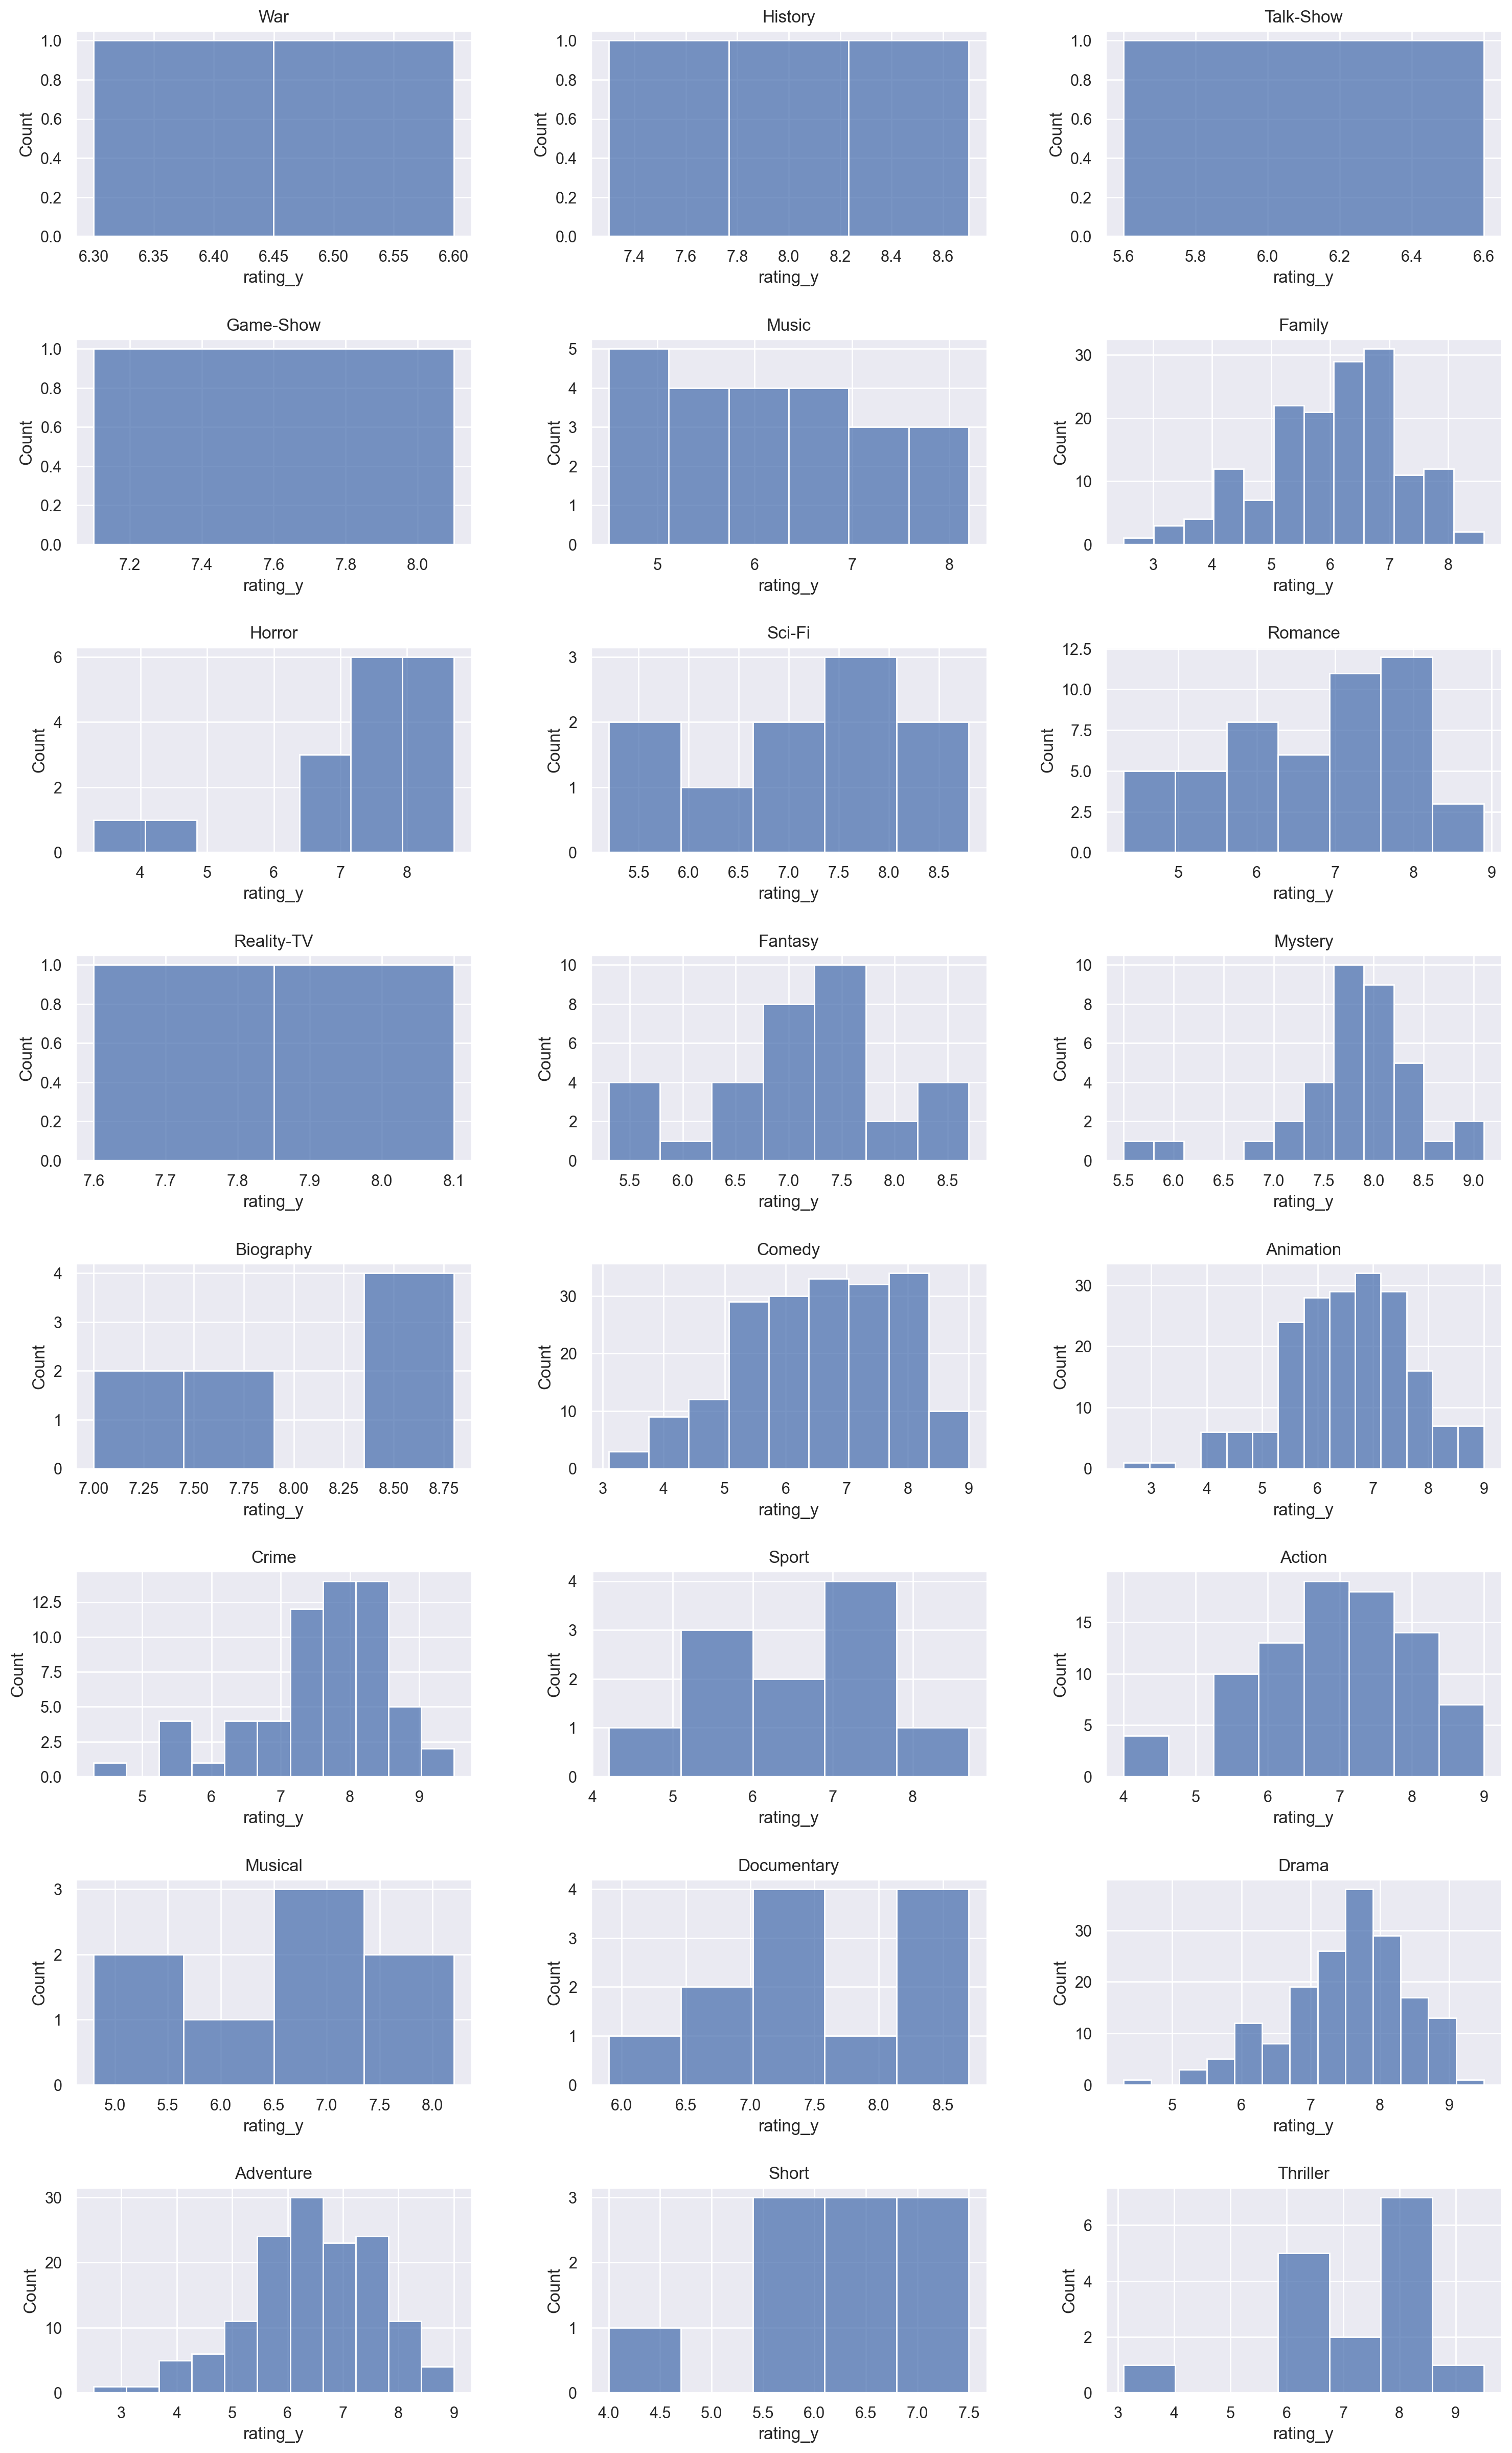

In [87]:
# Распределение рейтига у разных жанров

fig, axes = plt.subplots(8, 3, figsize=(18, 30))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
lst_genre = list(genre)
print(lst_genre)

for i in range(8):
    for j in range(3):
        sns.histplot(ENRICHED_FULLY1[ENRICHED_FULLY1[lst_genre[i*3 + j]] == 1]['rating_y'], ax=axes[i, j])
        axes[i, j].set_title(lst_genre[i*3 + j])

### Genre - rating IMBD visualistion + test on main

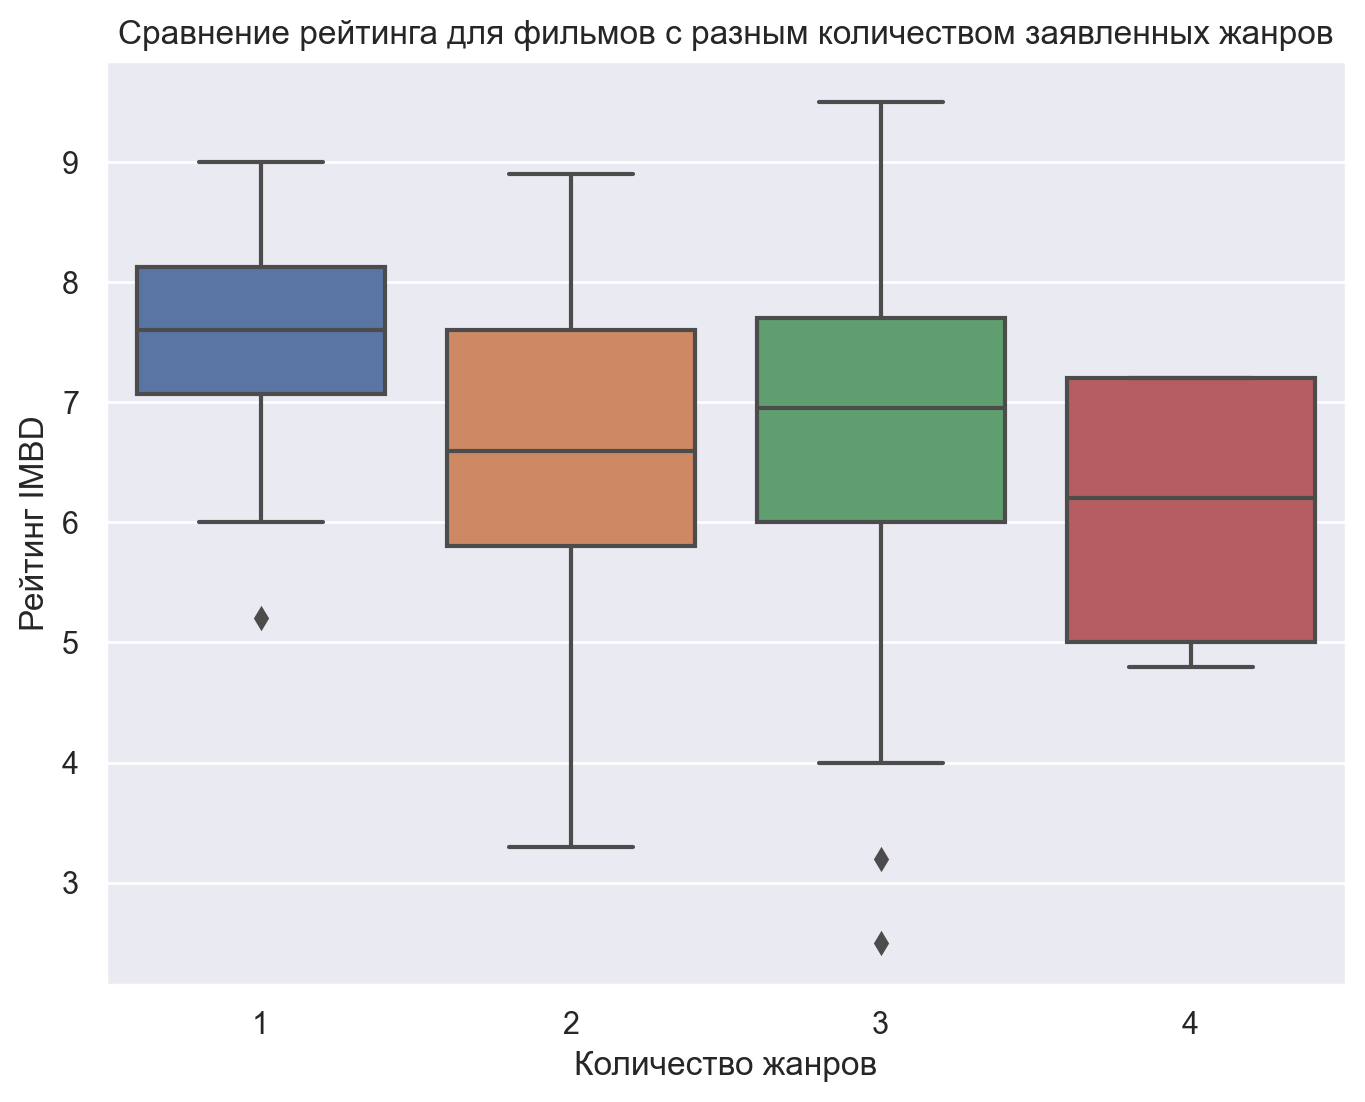

In [88]:
# Изучим как количество жанорв влияет на рейтинг
ENRICHED_FULLY1['genre_count'] = ENRICHED_FULLY1[lst_genre].sum(axis=1)
ENRICHED_FULLY1_ = remove_outliers_by_genre(ENRICHED_FULLY1, 'rating_y', ['genre_count'])

plt.figure(figsize=(8,6))
sns.boxplot(x='genre_count', y='rating_y', data=ENRICHED_FULLY1_)
plt.title('Cравнение рейтинга для фильмов с разным количеством заявленных жанров')
plt.xlabel('Количество жанров')
plt.ylabel('Рейтинг IMBD')
plt.show()

# Не особо значимые данные, нужен стат тест
# Интересно, что у 4 ящика межквартильный разброс больше

In [90]:
from scipy import stats
import scikit_posthocs as sp

In [91]:
ENRICHED_FULLY1_.dropna(subset = ['rating_y'],inplace=True)

/var/folders/jp/f7t7txj57bjbw25n_6syymsr0000gn/T/ipykernel_4345/381455431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENRICHED_FULLY1_.dropna(subset = ['rating_y'],inplace=True)


Проверка нормальности (тест Шапиро-Уилка):


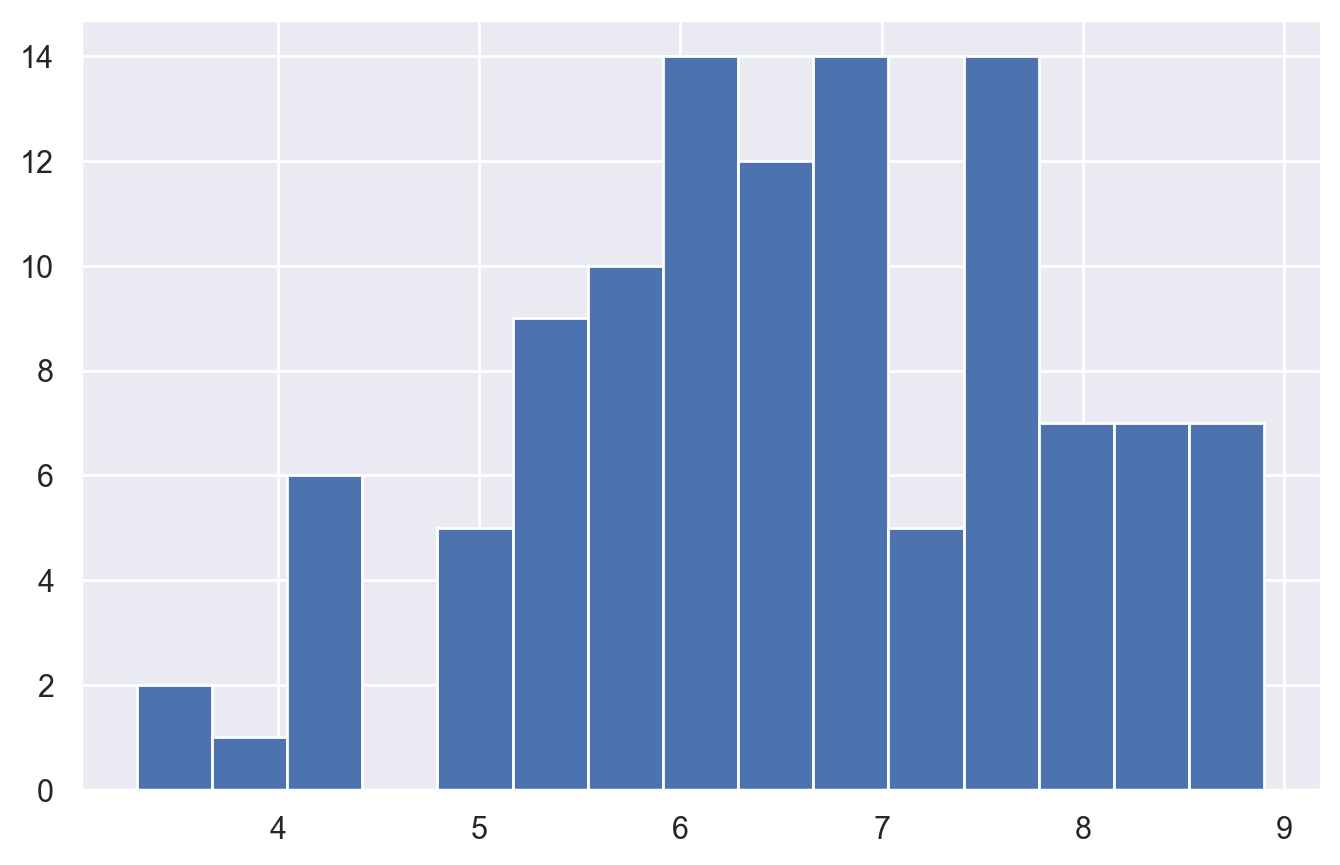

Группа 2: Статистика=0.982, P-значение=0.131


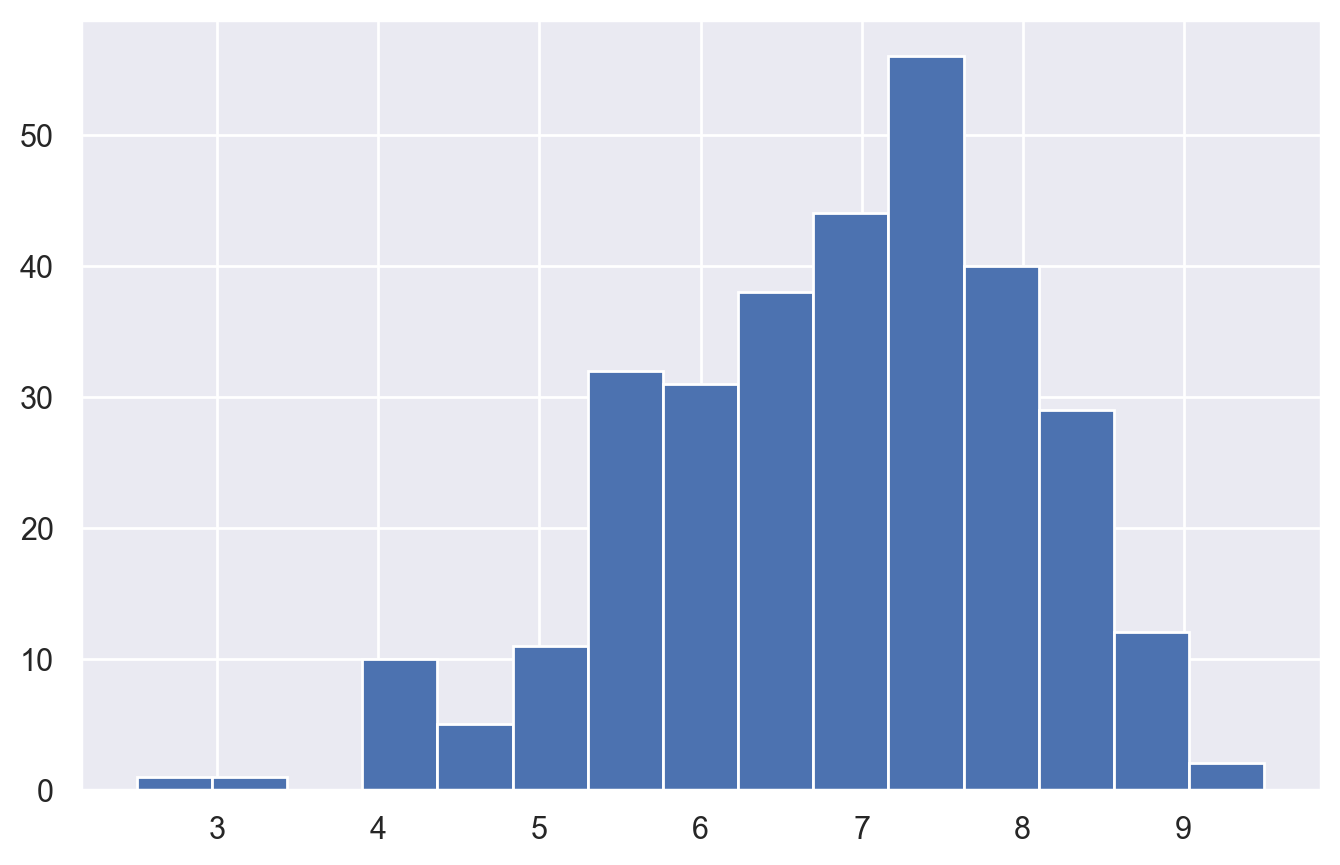

Группа 3: Статистика=0.978, P-значение=0.000


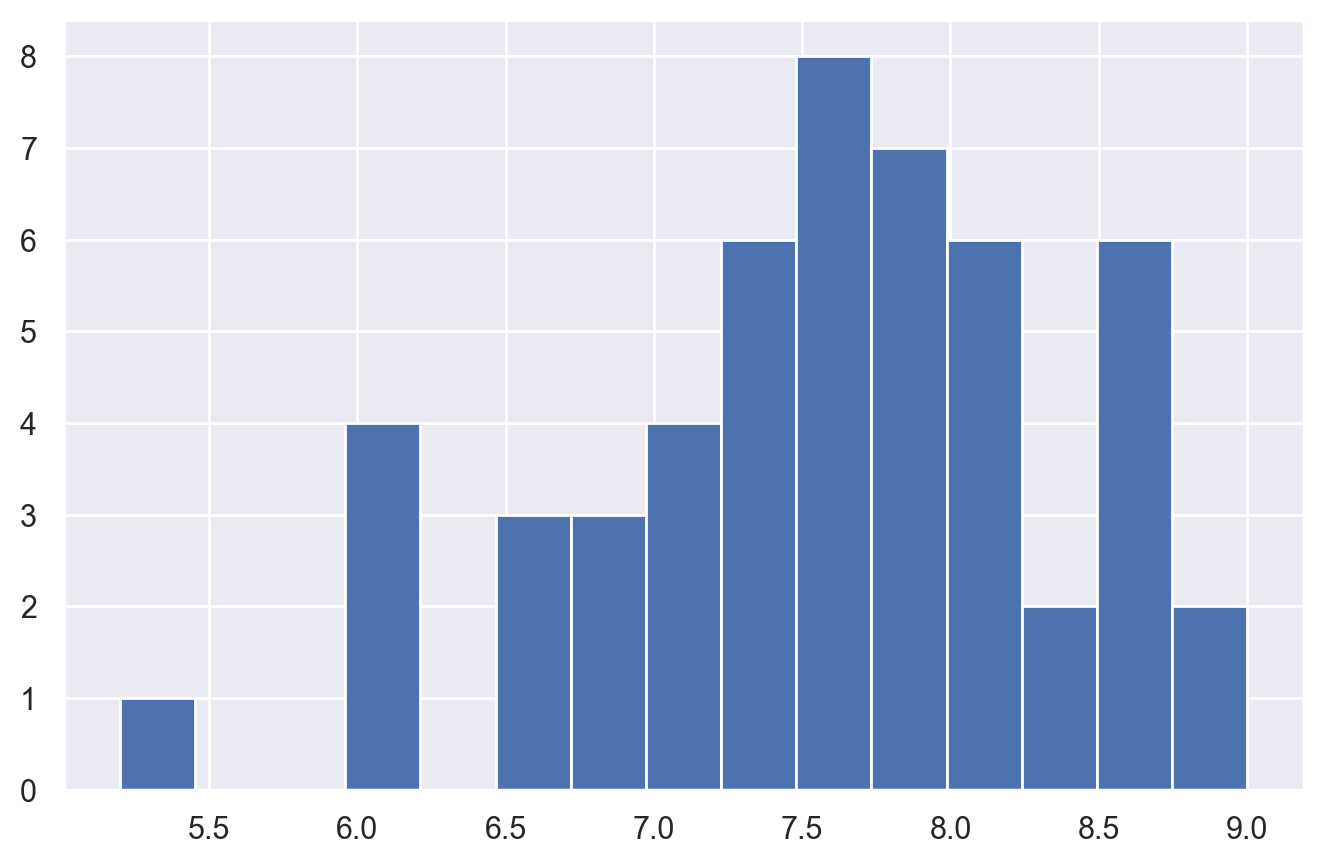

Группа 1: Статистика=0.973, P-значение=0.282


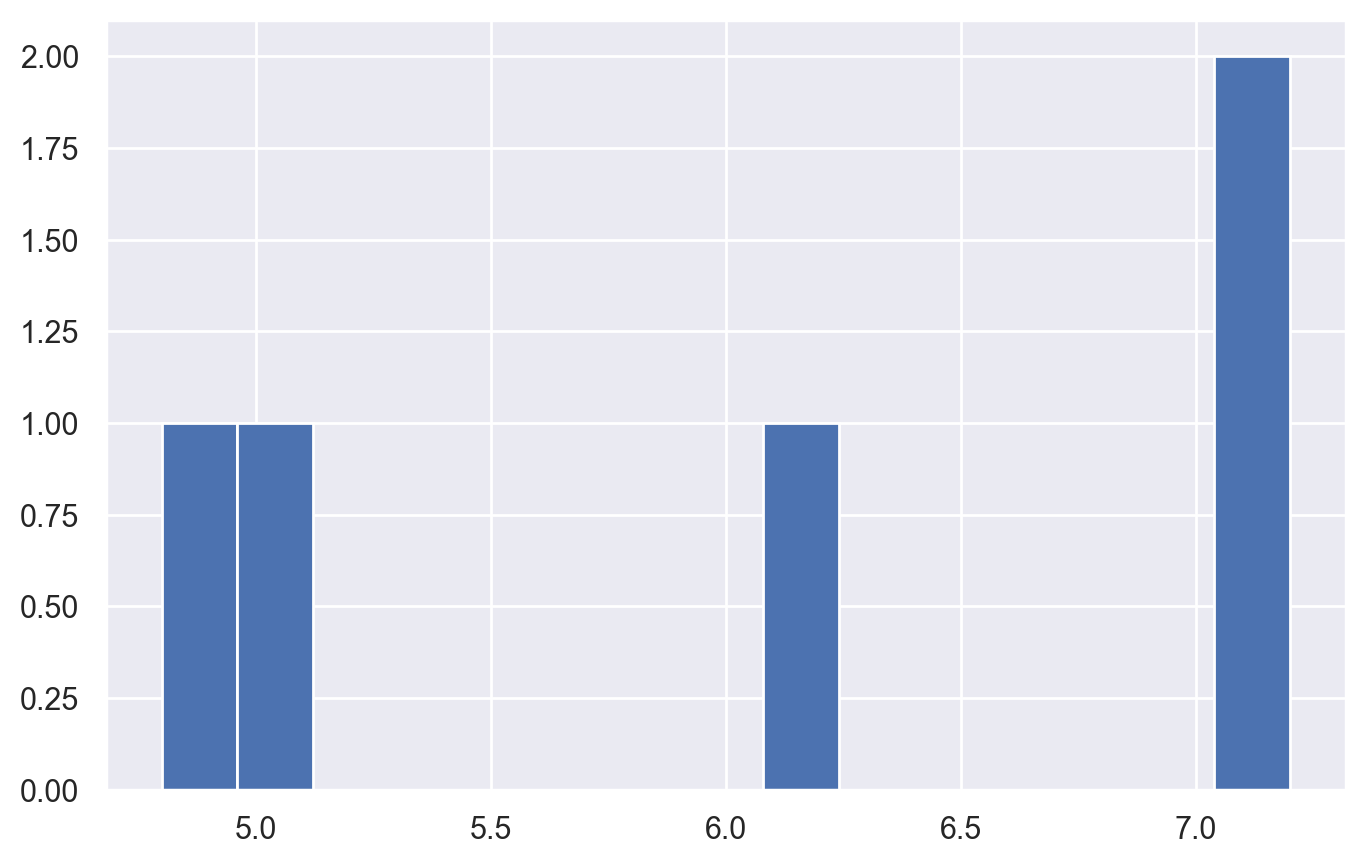

Группа 4: Статистика=0.848, P-значение=0.190


In [384]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in ENRICHED_FULLY1_['genre_count'].unique():
    data_temp = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==group]['rating_y']
    data_temp.hist(bins=15)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Вывод: не применяем ANOVA, применяем Краскела-Уоллиса

In [386]:
# 1. Проведение критерия Краскела-Уоллиса
data_temp1 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==1]['rating_y']
data_temp2 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==2]['rating_y']
data_texp3 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==3]['rating_y']
data_temp4 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==4]['rating_y']

h_statistic, p_value_kw = stats.kruskal(data_temp1, data_temp2, data_temp3, data_temp4)

print(f"Критерий Краскела-Уоллиса:")
print(f"H-статистика: {h_statistic:.2f}")
print(f"P-значение: {p_value_kw:.3f}")

Критерий Краскела-Уоллиса:
H-статистика: 27.81
P-значение: 0.000


Различия есть, вот какие

In [93]:
sp.posthoc_dunn(ENRICHED_FULLY1_, val_col='rating_y', group_col='genre_count', p_adjust='bonferroni').round(2)

1     2     3     4
1  1.00  0.00  0.00  0.03
2  0.00  1.00  0.58  1.00
3  0.00  0.58  1.00  0.91
4  0.03  1.00  0.91  1.00

На уровне значимости 0.05:
* фильмы с одним жанрами (моножанровые) имеют большую оценку по сравнению с фильмами с 3 и 2 и 4 указанными жанрами 

### Famous_actors - rating IMBD visualistion + test on main df

/var/folders/jp/f7t7txj57bjbw25n_6syymsr0000gn/T/ipykernel_4345/1090312854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENRICHED_FULLY1_.dropna(subset = ['rating_y'],inplace=True)


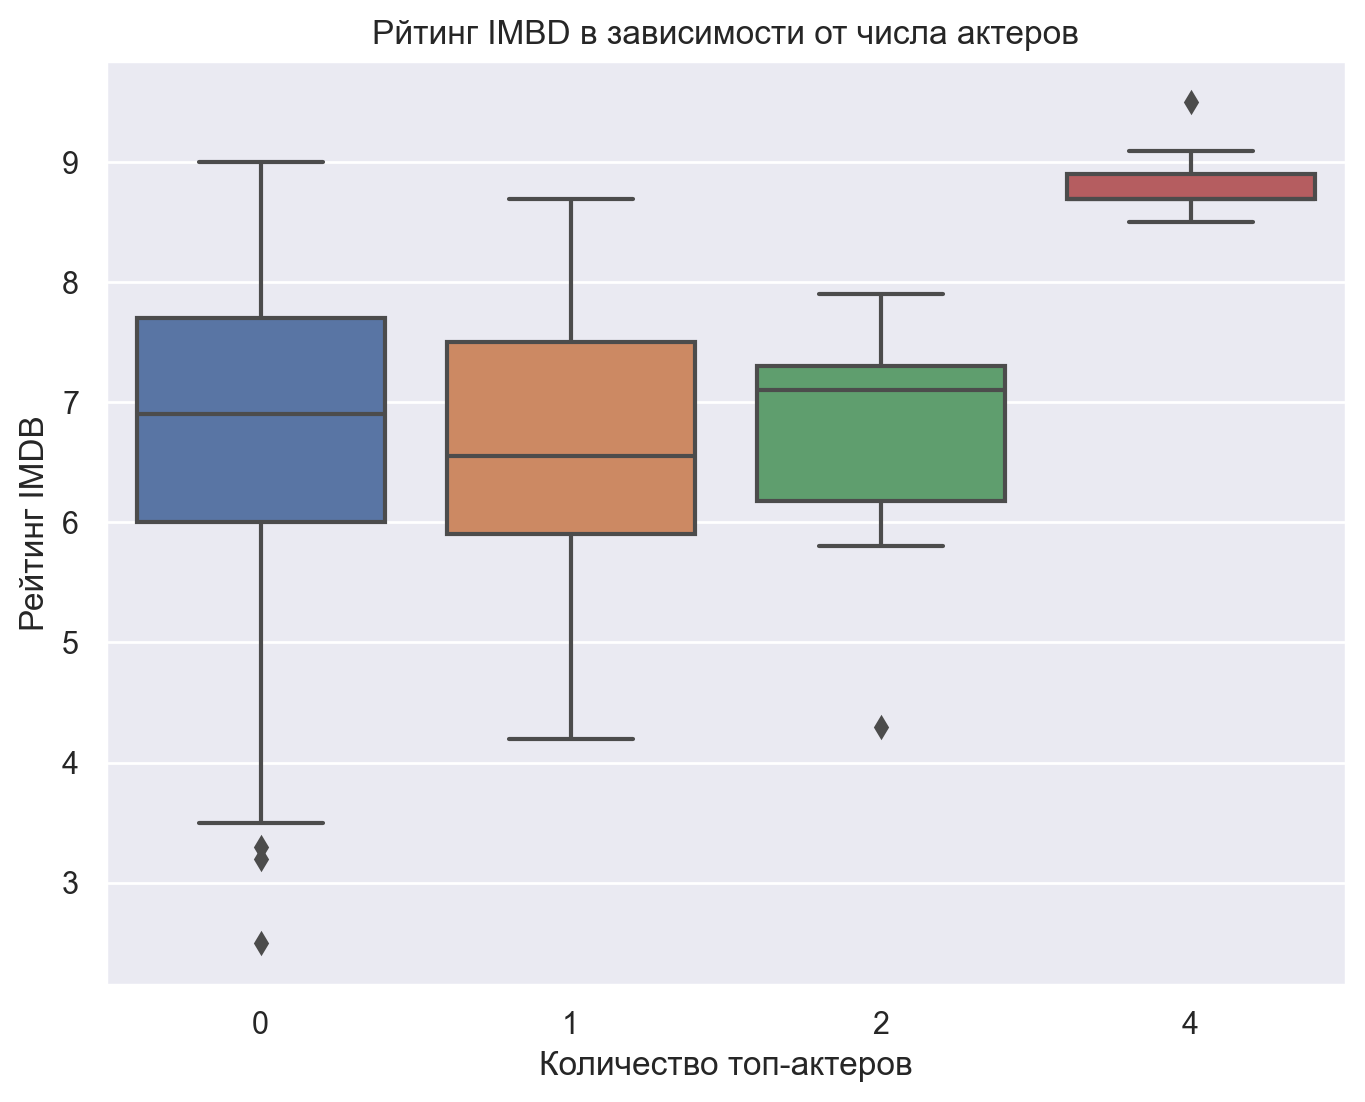

In [97]:

ENRICHED_FULLY1_ = remove_outliers_by_genre(ENRICHED_FULLY1, 'rating_y', ['top_stars'])
ENRICHED_FULLY1_.dropna(subset = ['rating_y'],inplace=True)
plt.figure(figsize=(8,
                    6))
sns.boxplot(x='top_stars', y='rating_y', data=ENRICHED_FULLY1_)
plt.title('Рйтинг IMBD в зависимости от числа актеров')
plt.xlabel('Количество топ-актеров')
plt.ylabel('Рейтинг IMDB')
plt.show()

# Ценная зависимость, желательно сделать статистический тест
# Почему первый boxplot выше второго? Возможно неправильно отобраны топовые актеры или есть другие зависимости

<Axes: xlabel='top_stars', ylabel='rating_y'>

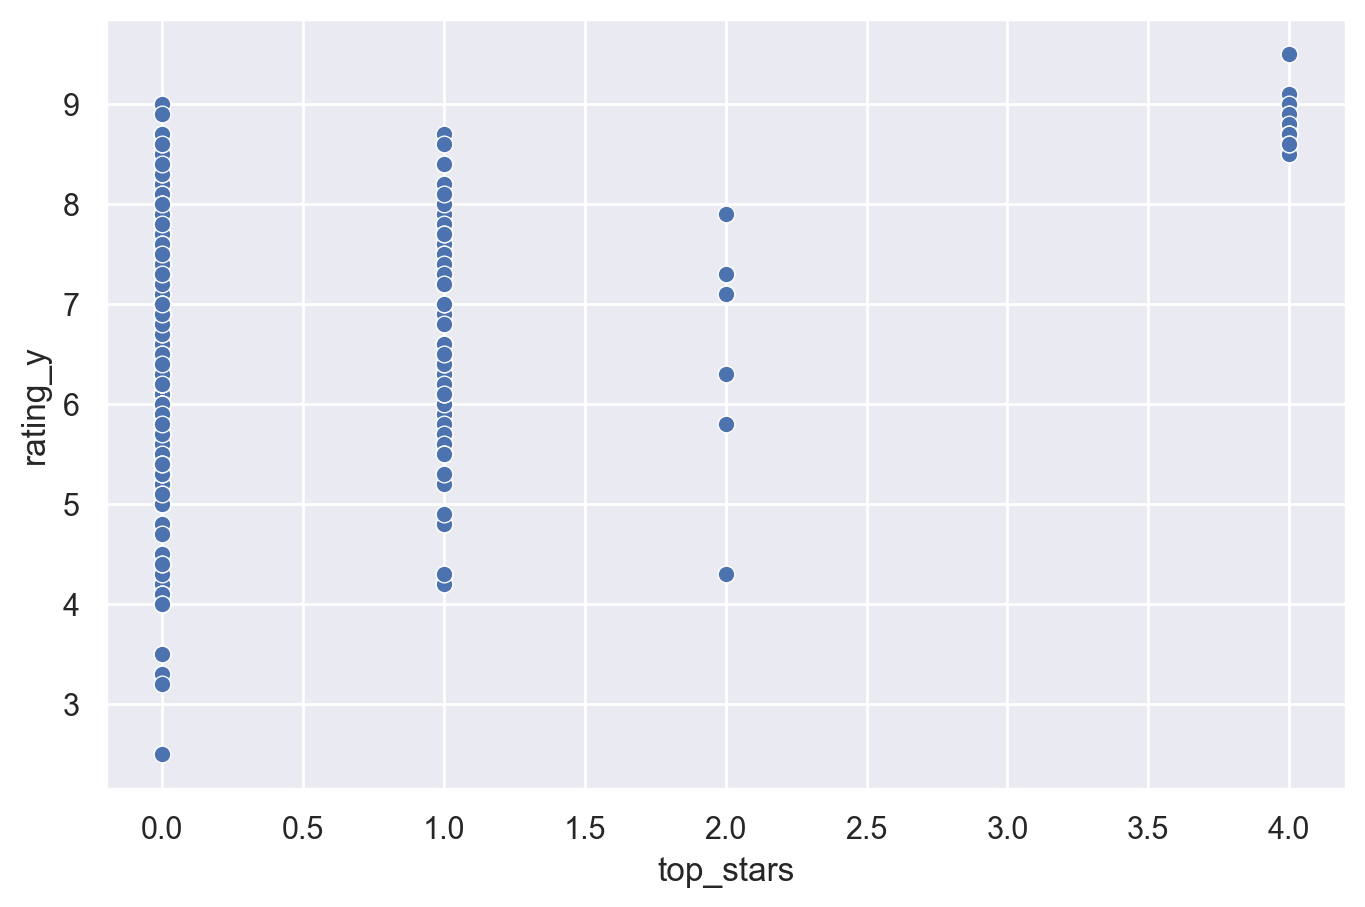

In [411]:
sns.scatterplot(data=ENRICHED_FULLY1_, x="top_stars", y="rating_y")

In [412]:
tau, p_value = stats.kendalltau(ENRICHED_FULLY1_['top_stars'],ENRICHED_FULLY1_['rating_y'] )

print(f"Коэффициент корреляции Кендалла (тау): {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Кендалла (тау): 0.069
p-значение: 0.061


In [413]:
tau, p_value = stats.spearmanr(ENRICHED_FULLY1_['top_stars'],ENRICHED_FULLY1_['rating_y'] )

print(f"Коэффициент корреляции Спирмена (r): {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Спирмена (r): 0.087
p-значение: 0.055


Монотонной связи не обнаружено

Проверка нормальности (тест Шапиро-Уилка):


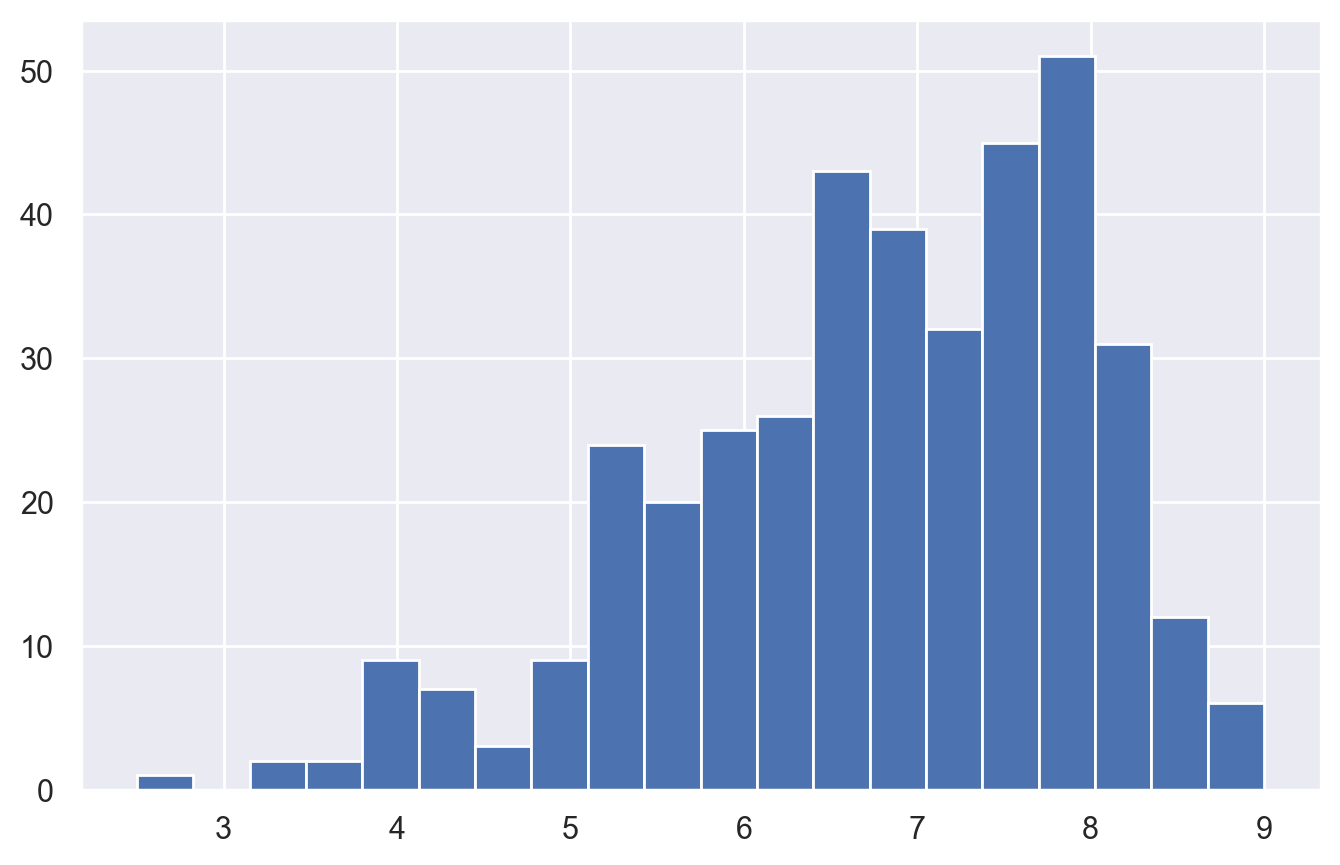

Группа 0: Статистика=0.962, P-значение=0.000


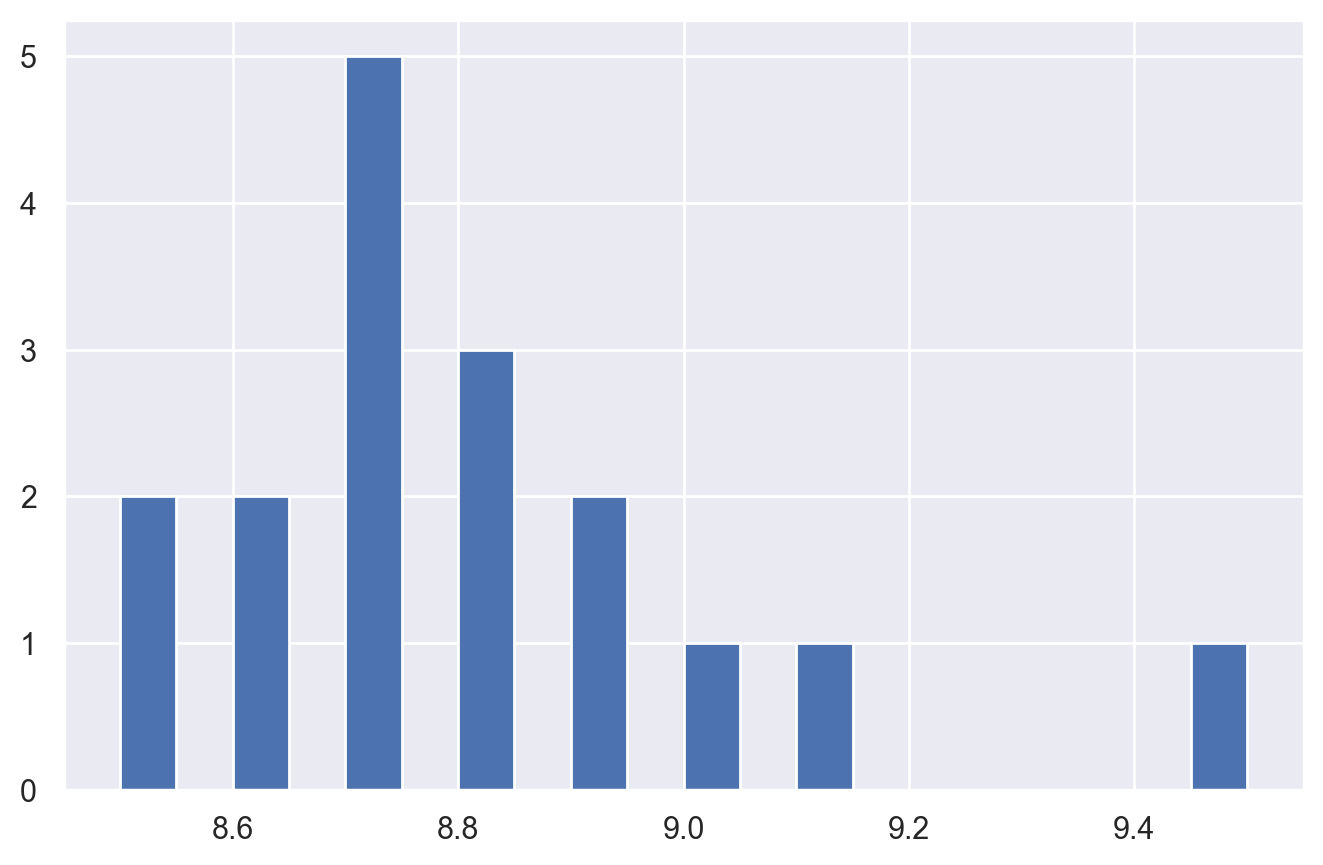

Группа 4: Статистика=0.866, P-значение=0.019


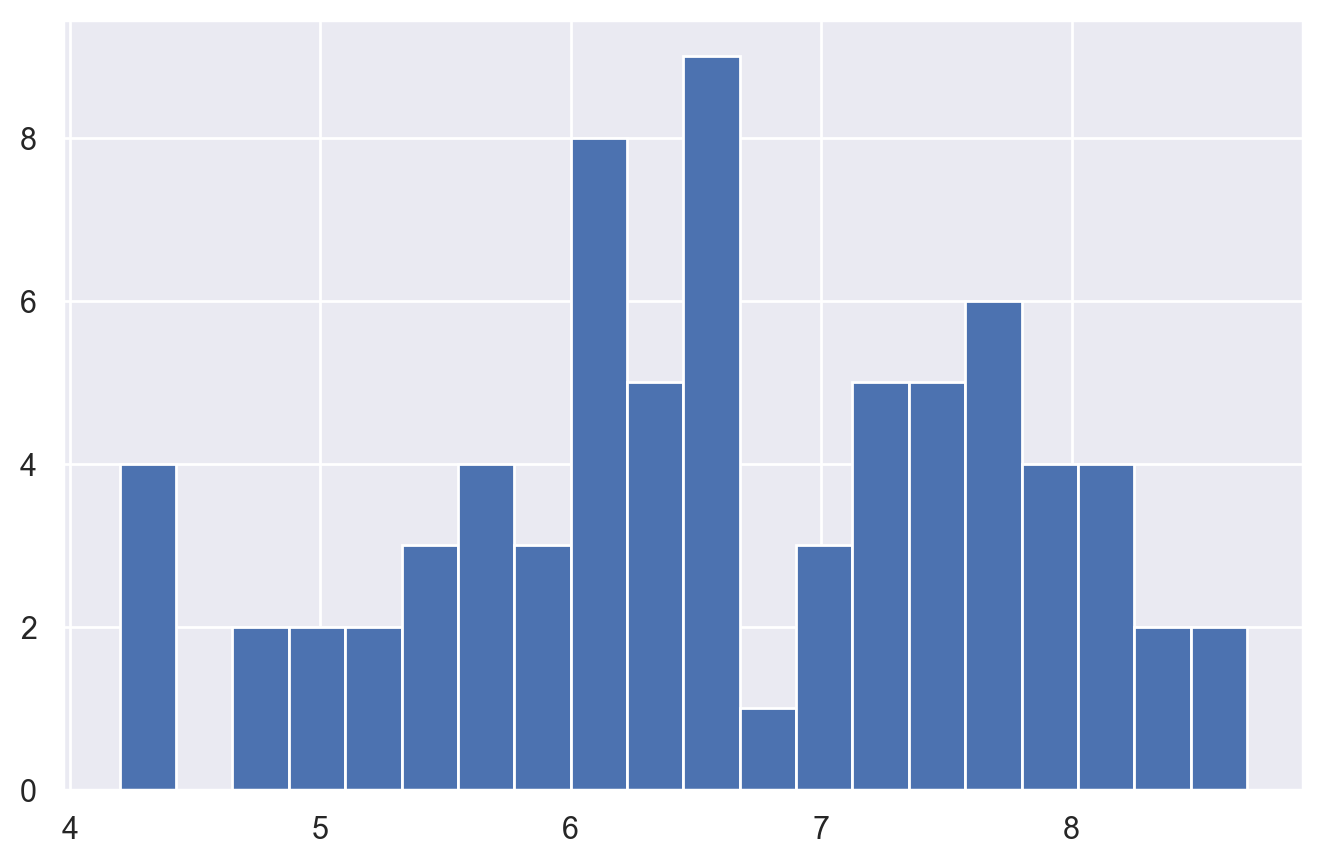

Группа 1: Статистика=0.976, P-значение=0.174


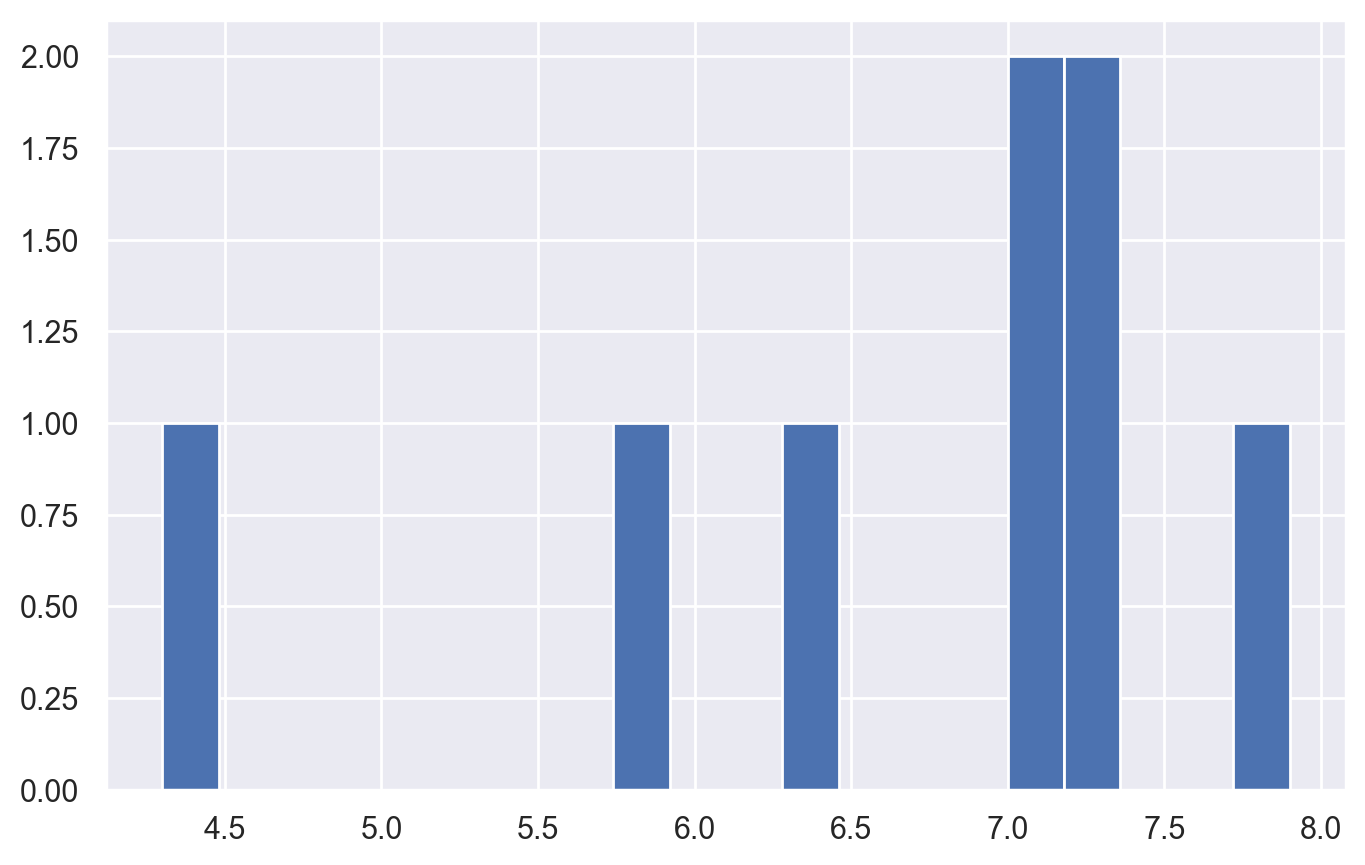

Группа 2: Статистика=0.871, P-значение=0.155


In [414]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in ENRICHED_FULLY1_['top_stars'].unique():
    data_temp = ENRICHED_FULLY1_[ENRICHED_FULLY1_['top_stars']==group]['rating_y']
    data_temp.hist(bins=20)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Нормальностью тут и не пахнет

In [415]:
# 1. Проведение критерия Краскела-Уоллиса

h_statistic, p_value_kw = stats.kruskal(*[ ENRICHED_FULLY1_[ENRICHED_FULLY1_['top_stars']==i]['rating_y'] for i in ENRICHED_FULLY1_['top_stars'].unique()])

print(f"Критерий Краскела-Уоллиса:")
print(f"H-статистика: {h_statistic:.2f}")
print(f"P-значение: {p_value_kw:.3f}")

Критерий Краскела-Уоллиса:
H-статистика: 49.01
P-значение: 0.000


Какое то различие есть, но какое....

In [99]:
posthoc_temp = sp.posthoc_dunn(ENRICHED_FULLY1_, val_col='rating_y', group_col='top_stars', p_adjust='bonferroni')

In [102]:
posthoc_temp.round(4)

0    1       2       4
0  1.0  1.0  1.0000  0.0000
1  1.0  1.0  1.0000  0.0000
2  1.0  1.0  1.0000  0.0002
4  0.0  0.0  0.0002  1.0000

Cкладывается такое ощущение что у нас тут "граница" между 2 и 4.
Оформим ее в данных.

In [418]:
ENRICHED_FULLY1_['top_stars>3'] =False
ENRICHED_FULLY1_.loc[ENRICHED_FULLY1_['top_stars'] > 3 , 'top_stars>3'] = True

/var/folders/jp/f7t7txj57bjbw25n_6syymsr0000gn/T/ipykernel_9475/2221672490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENRICHED_FULLY1_['top_stars>3'] =False


Проверим получившиеся группы


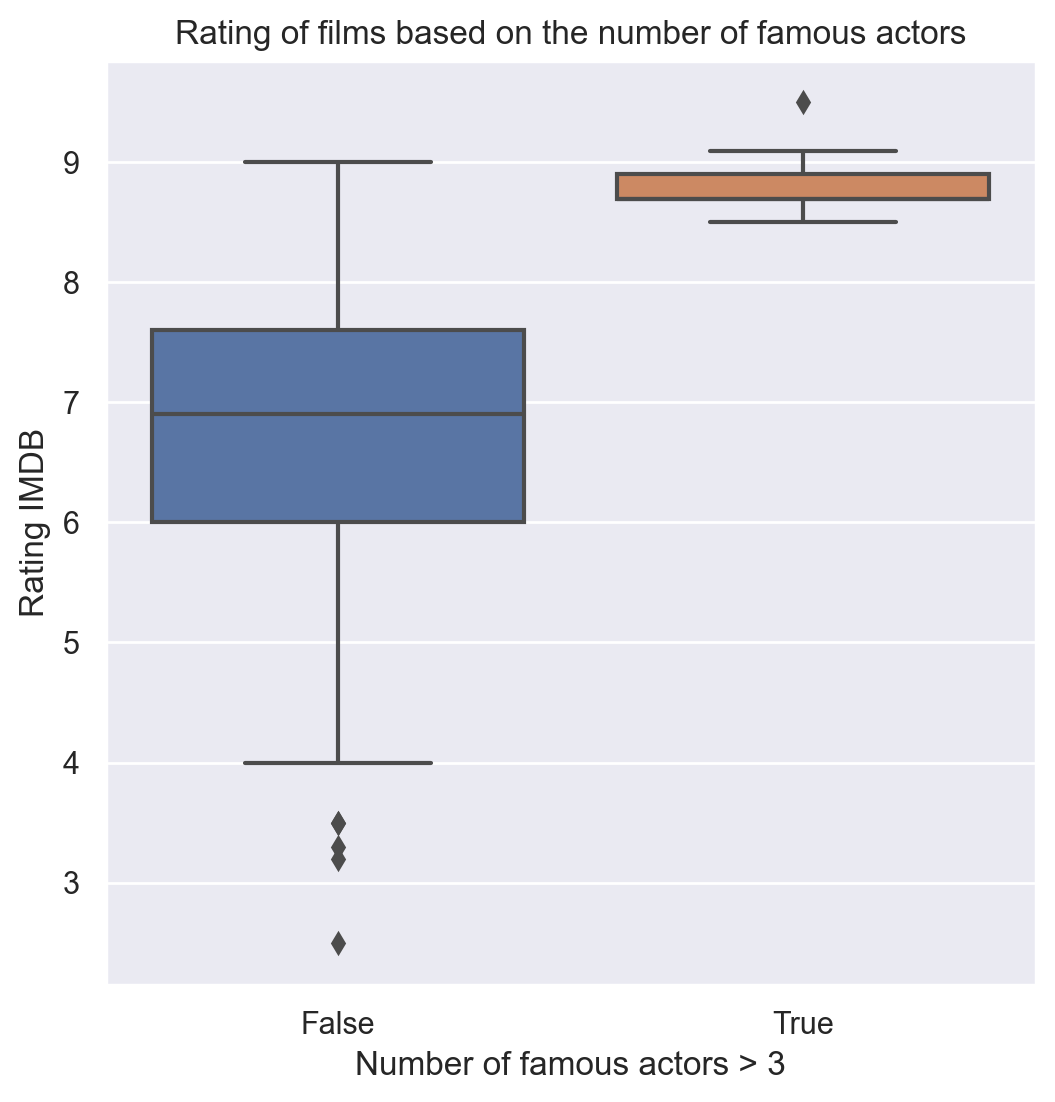

In [419]:
plt.figure(figsize=(6,6))
sns.boxplot(x='top_stars>3', y='rating_y', data=ENRICHED_FULLY1_)
plt.title('Rating of films based on the number of famous actors')
plt.xlabel('Number of famous actors > 3')
plt.ylabel('Rating IMDB')
plt.show()


Проверка нормальности (тест Шапиро-Уилка):


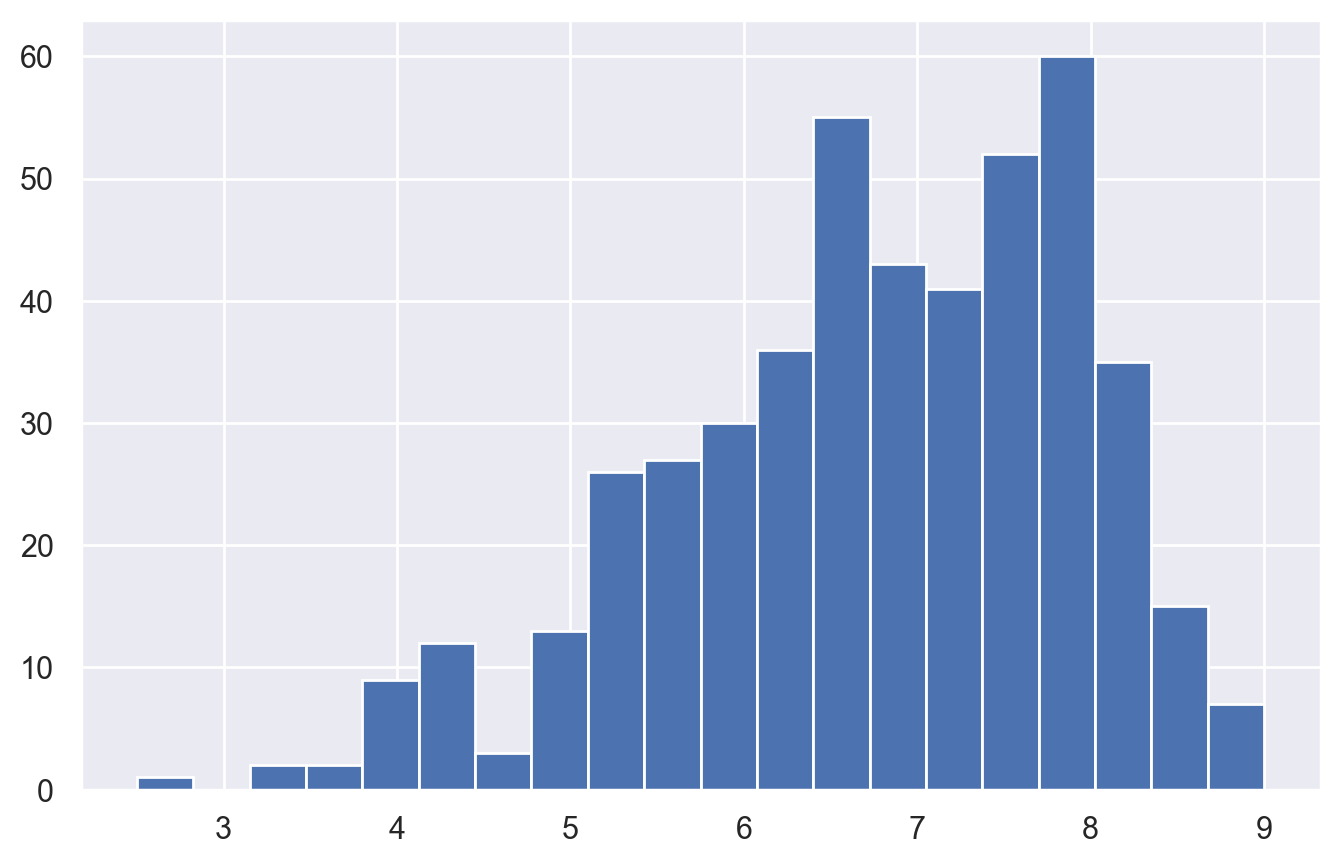

Группа False: Статистика=0.967, P-значение=0.000


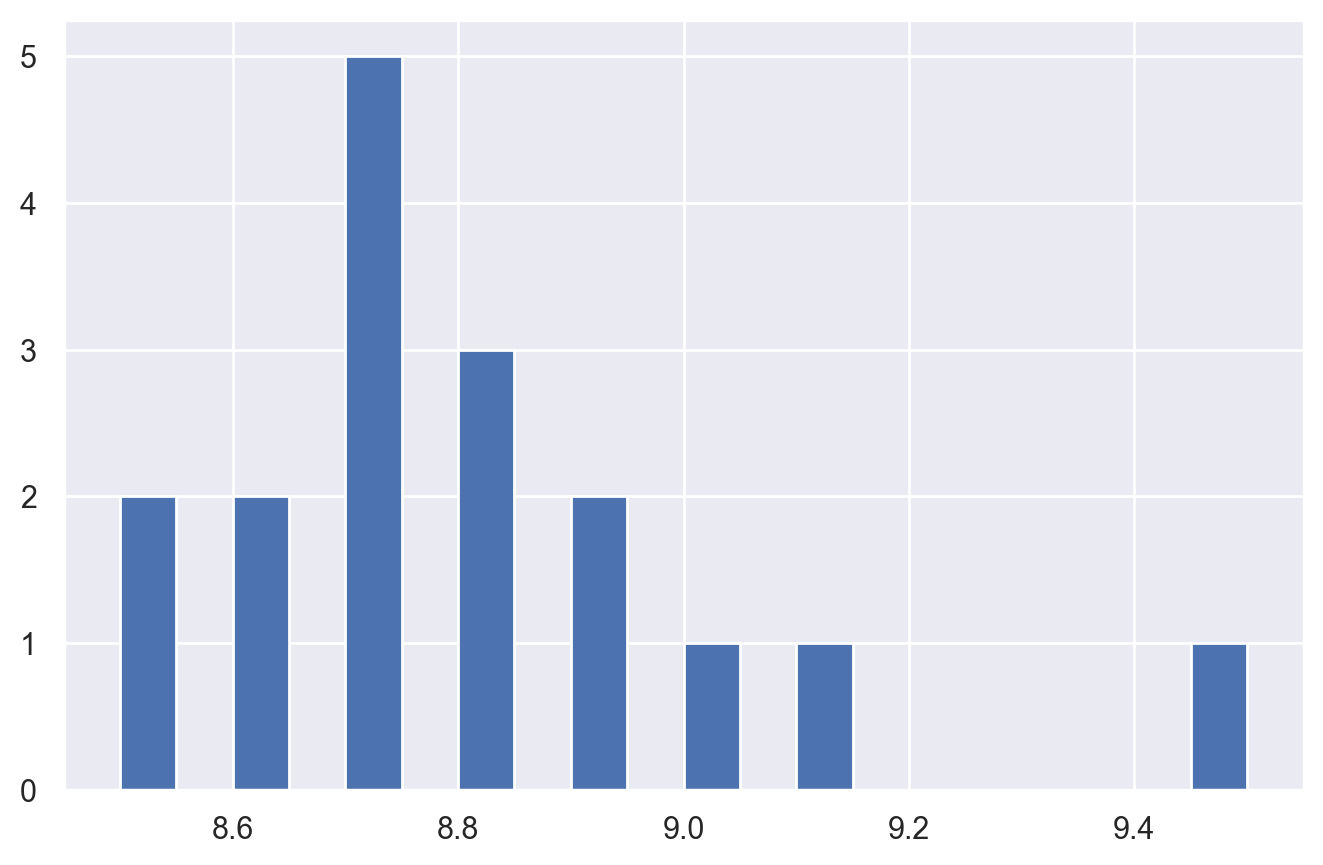

Группа True: Статистика=0.866, P-значение=0.019


In [420]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in ENRICHED_FULLY1_['top_stars>3'].unique():
    data_temp = ENRICHED_FULLY1_[ENRICHED_FULLY1_['top_stars>3']==group]['rating_y']
    data_temp.hist(bins=20)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Ненормальные распредления

In [421]:
stat_U, p_U = stats.mannwhitneyu(ENRICHED_FULLY1_[ENRICHED_FULLY1_['top_stars>3']]['rating_y'], ENRICHED_FULLY1_[~ENRICHED_FULLY1_['top_stars>3']]['rating_y'] )
print(f"Критерий Манна-Уитни:")
print(f"U-статистика: {stat_U:.2f}")
print(f"P-значение: {p_U:.3f}")

Критерий Манна-Уитни:
U-статистика: 7891.00
P-значение: 0.000


Получившиеся группы статистически различаются: 
* фильмы с 4 и более топ актерами получают большие оценки

### Famous_actors - USER RATING SCORE visualistion + test on main df - NO SIGNIFICANCE

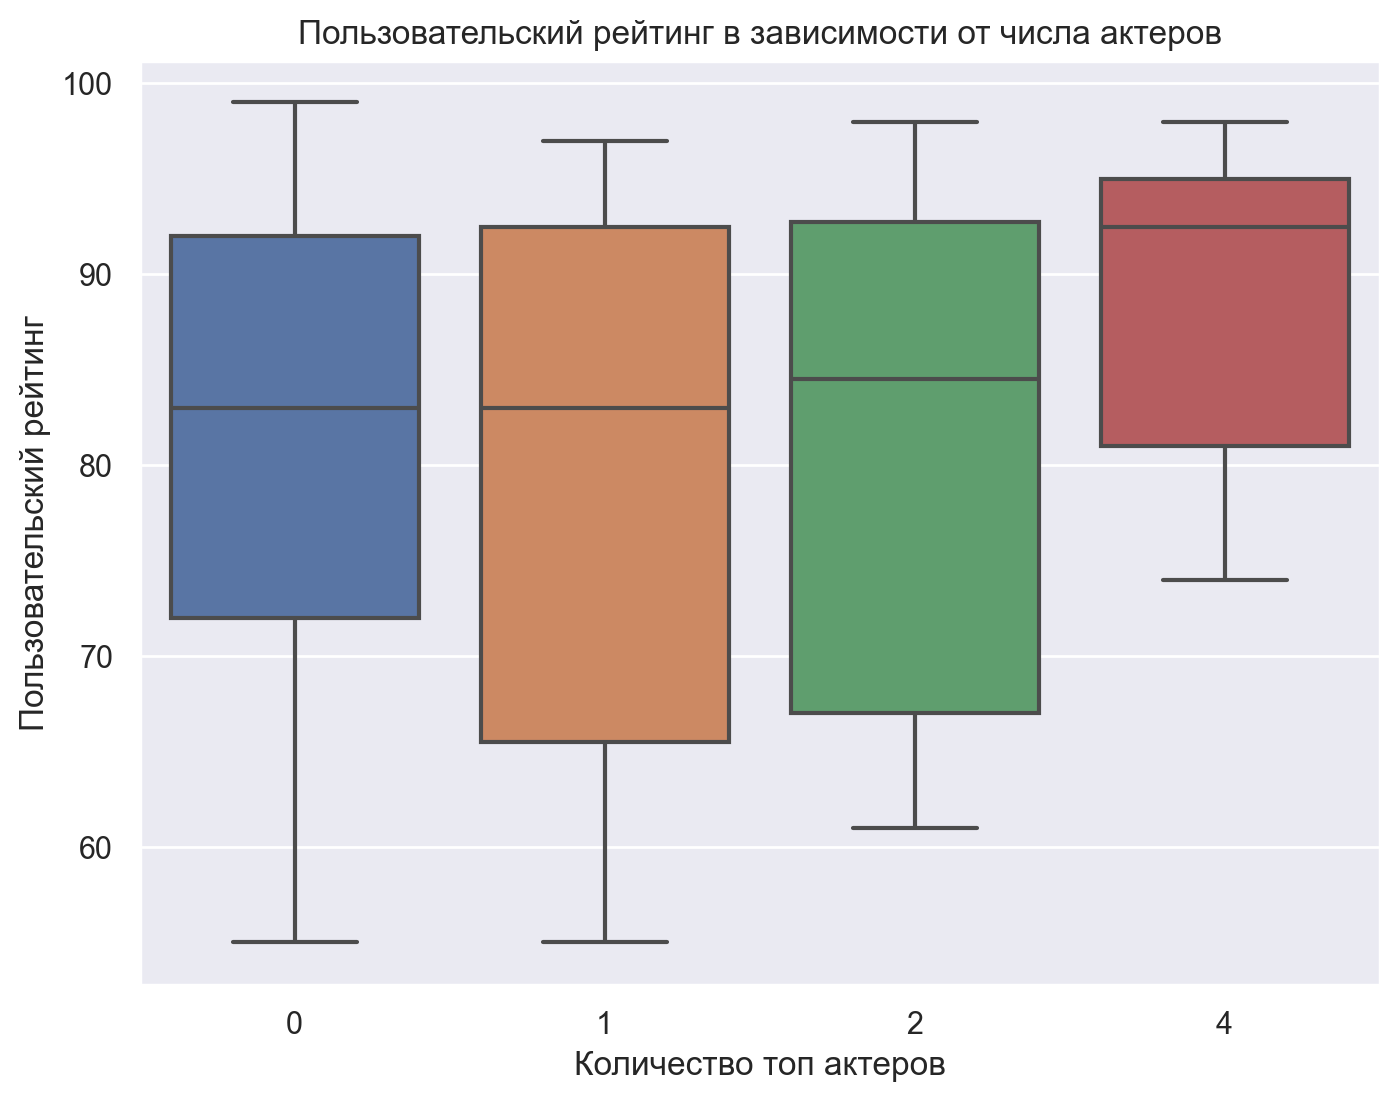

In [105]:
ENRICHED_FULLY1_ = remove_outliers_by_genre(ENRICHED_FULLY1, 'user rating score', ['top_stars'])
ENRICHED_FULLY1_.dropna(subset = ['user rating score'],inplace=True)
plt.figure(figsize=(8,6))
sns.boxplot(x='top_stars', y='user rating score', data=ENRICHED_FULLY1_)
plt.title('Пользовательский рейтинг в зависимости от числа актеров')
plt.xlabel('Количество топ актеров')
plt.ylabel('Пользовательский рейтинг')
plt.show()

# Ценная зависимость, желательно сделать статистический тест
# Почему первый boxplot выше второго? Возможно неправильно отобраны топовые актеры или есть другие зависимости

<Axes: xlabel='top_stars', ylabel='user rating score'>

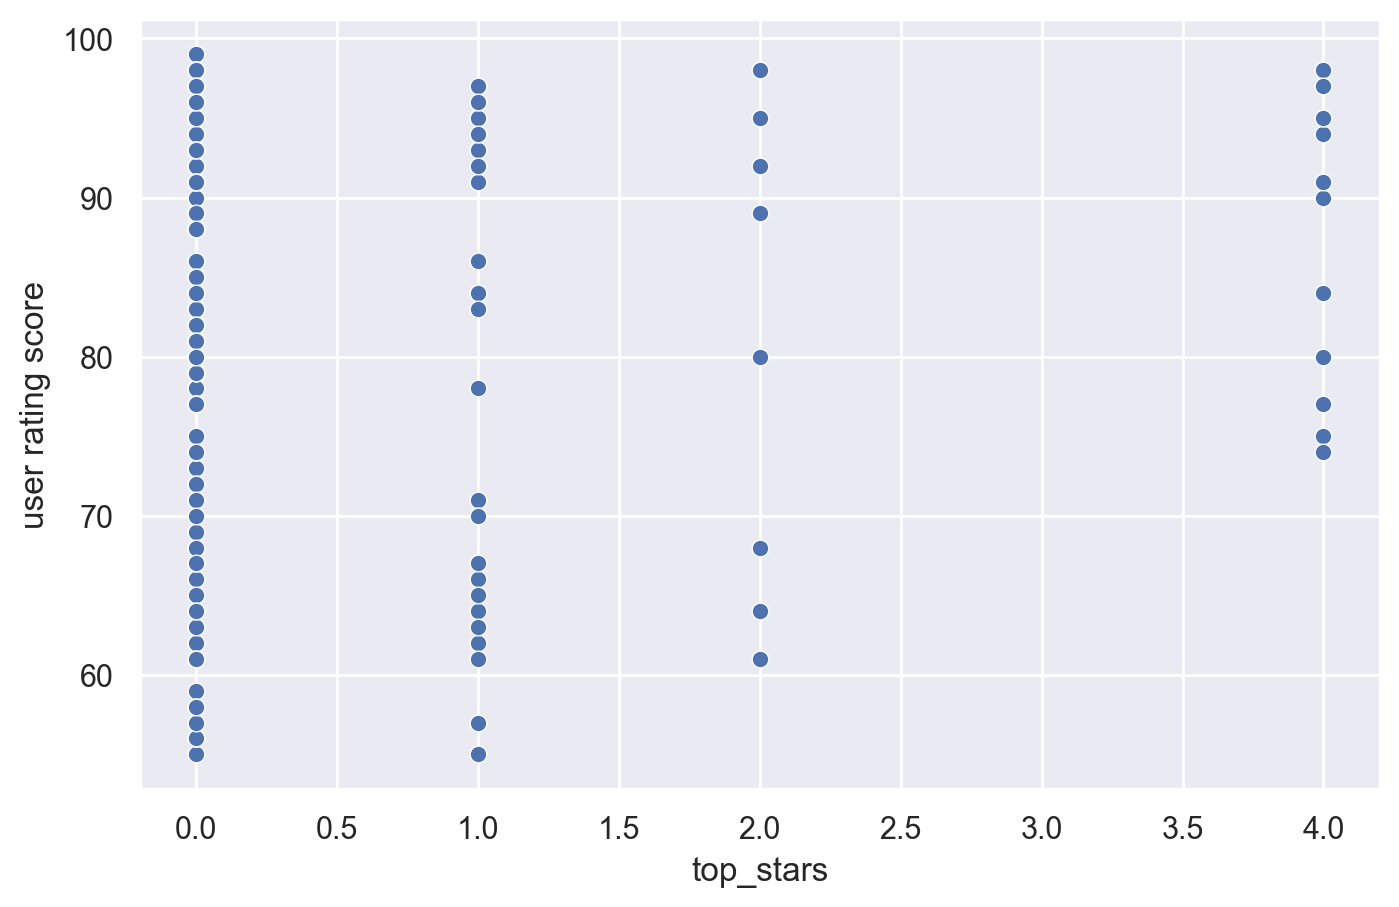

In [423]:
sns.scatterplot(data=ENRICHED_FULLY1_, x="top_stars", y="user rating score")

In [427]:
tau, p_value = stats.kendalltau(ENRICHED_FULLY1_['top_stars'],ENRICHED_FULLY1_['user rating score'] )

print(f"Коэффициент корреляции Кендалла (тау): {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Кендалла (тау): 0.034
p-значение: 0.507


In [428]:
tau, p_value = stats.spearmanr(ENRICHED_FULLY1_['top_stars'],ENRICHED_FULLY1_['user rating score'] )

print(f"Коэффициент корреляции Спирмена (r): {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Спирмена (r): 0.042
p-значение: 0.501


Монотонной связи не обнаружено

Проверка нормальности (тест Шапиро-Уилка):


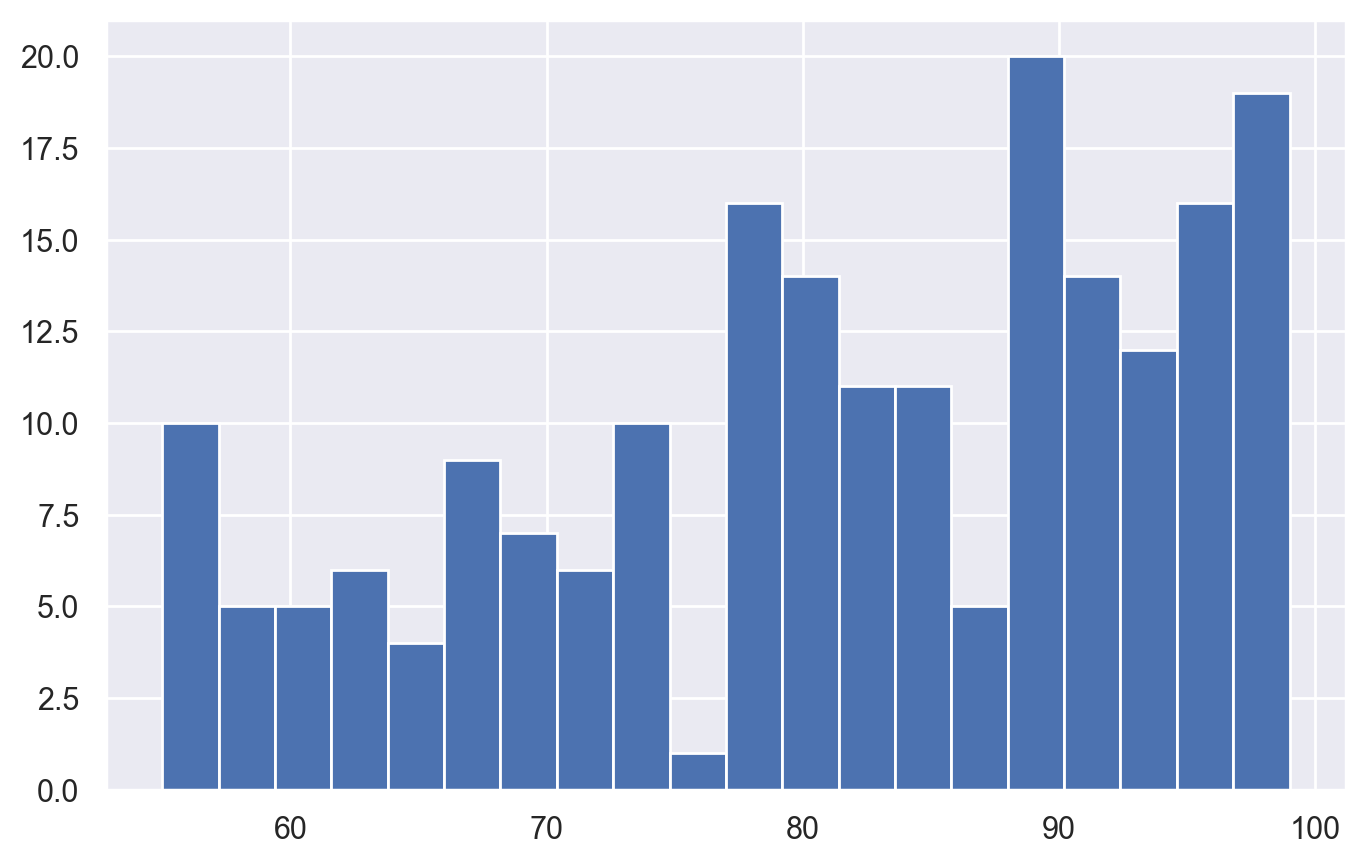

Группа 0: Статистика=0.935, P-значение=0.000


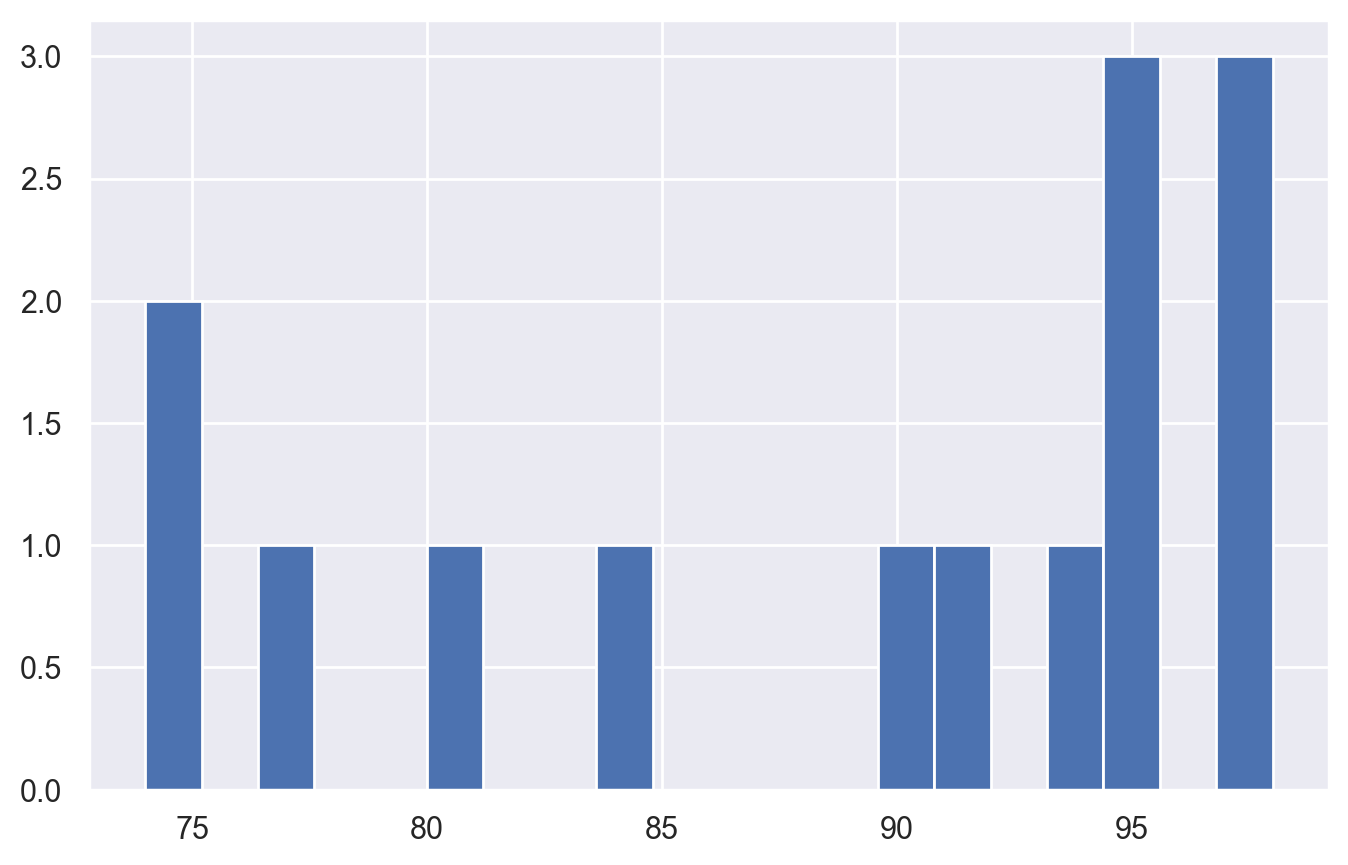

Группа 4: Статистика=0.846, P-значение=0.019


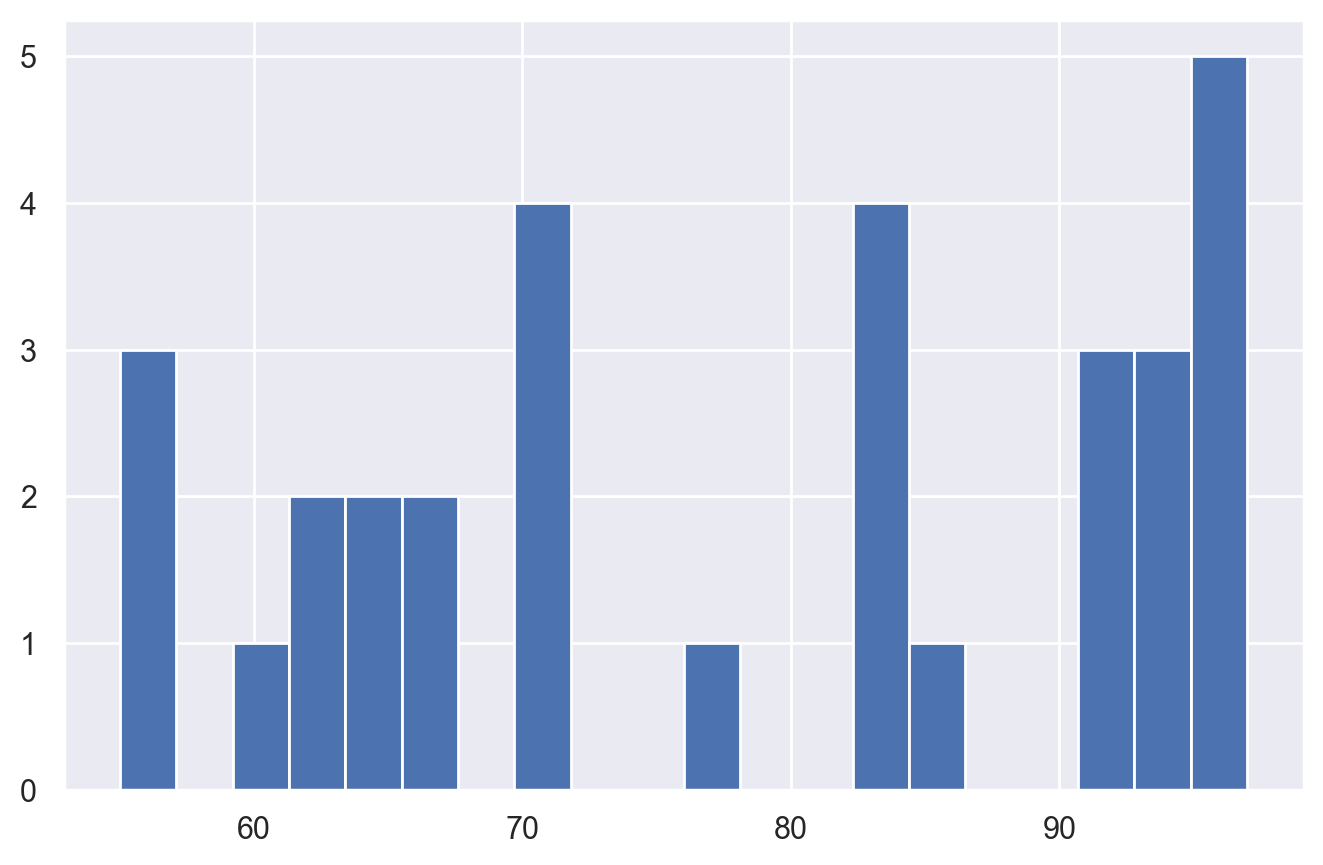

Группа 1: Статистика=0.896, P-значение=0.006


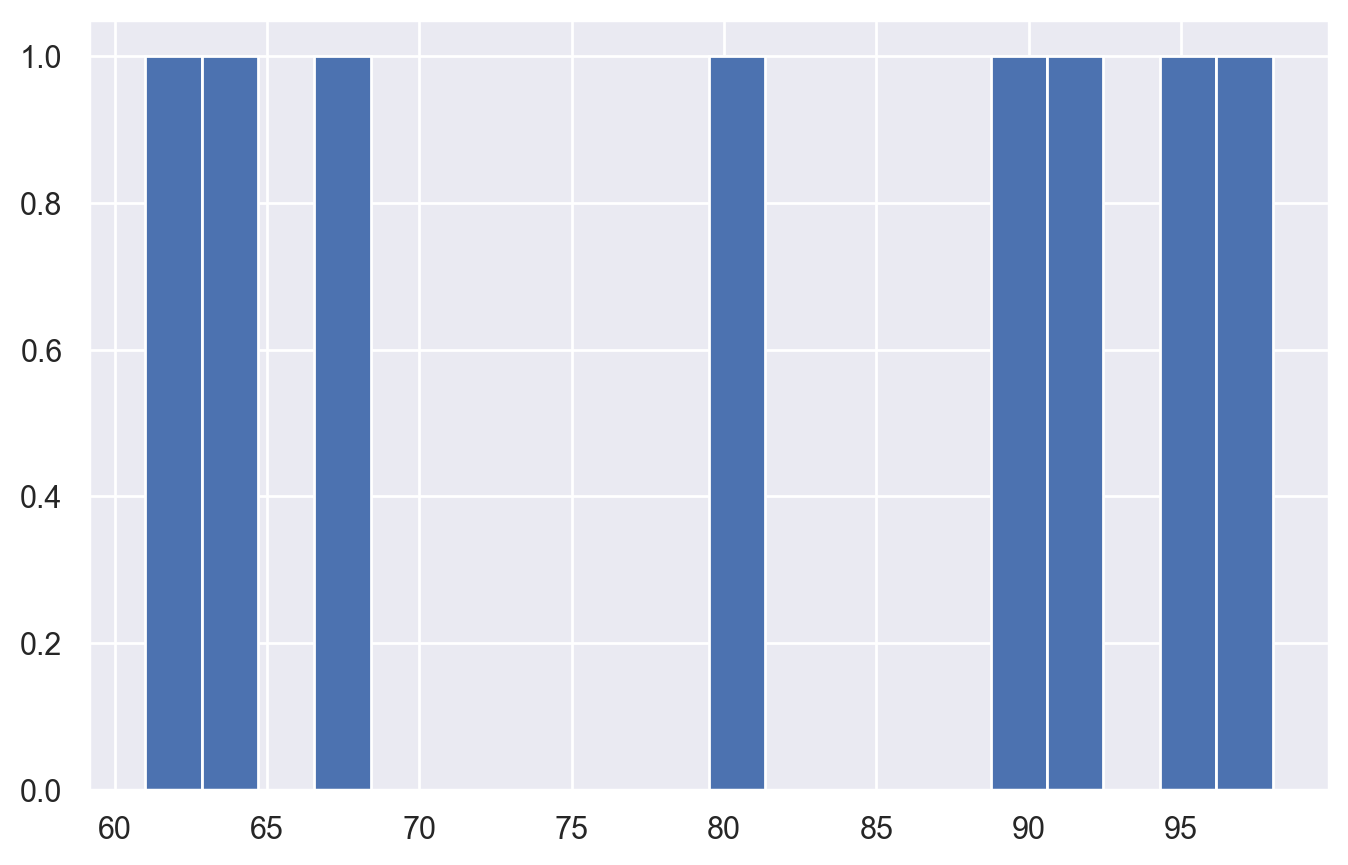

Группа 2: Статистика=0.891, P-значение=0.238


In [429]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in ENRICHED_FULLY1_['top_stars'].unique():
    data_temp = ENRICHED_FULLY1_[ENRICHED_FULLY1_['top_stars']==group]['user rating score']
    data_temp.hist(bins=20)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Нормальностью тут и не пахнет

In [430]:
# 1. Проведение критерия Краскела-Уоллиса

h_statistic, p_value_kw = stats.kruskal(*[ ENRICHED_FULLY1_[ENRICHED_FULLY1_['top_stars']==i]['user rating score'] for i in ENRICHED_FULLY1_['top_stars'].unique()])

print(f"Критерий Краскела-Уоллиса:")
print(f"H-статистика: {h_statistic:.2f}")
print(f"P-значение: {p_value_kw:.3f}")

Критерий Краскела-Уоллиса:
H-статистика: 5.74
P-значение: 0.125


Вот и сказочке конец

### Genre - USER RATING SCORE visualistion + test on main - NO SIGNIFICANCE

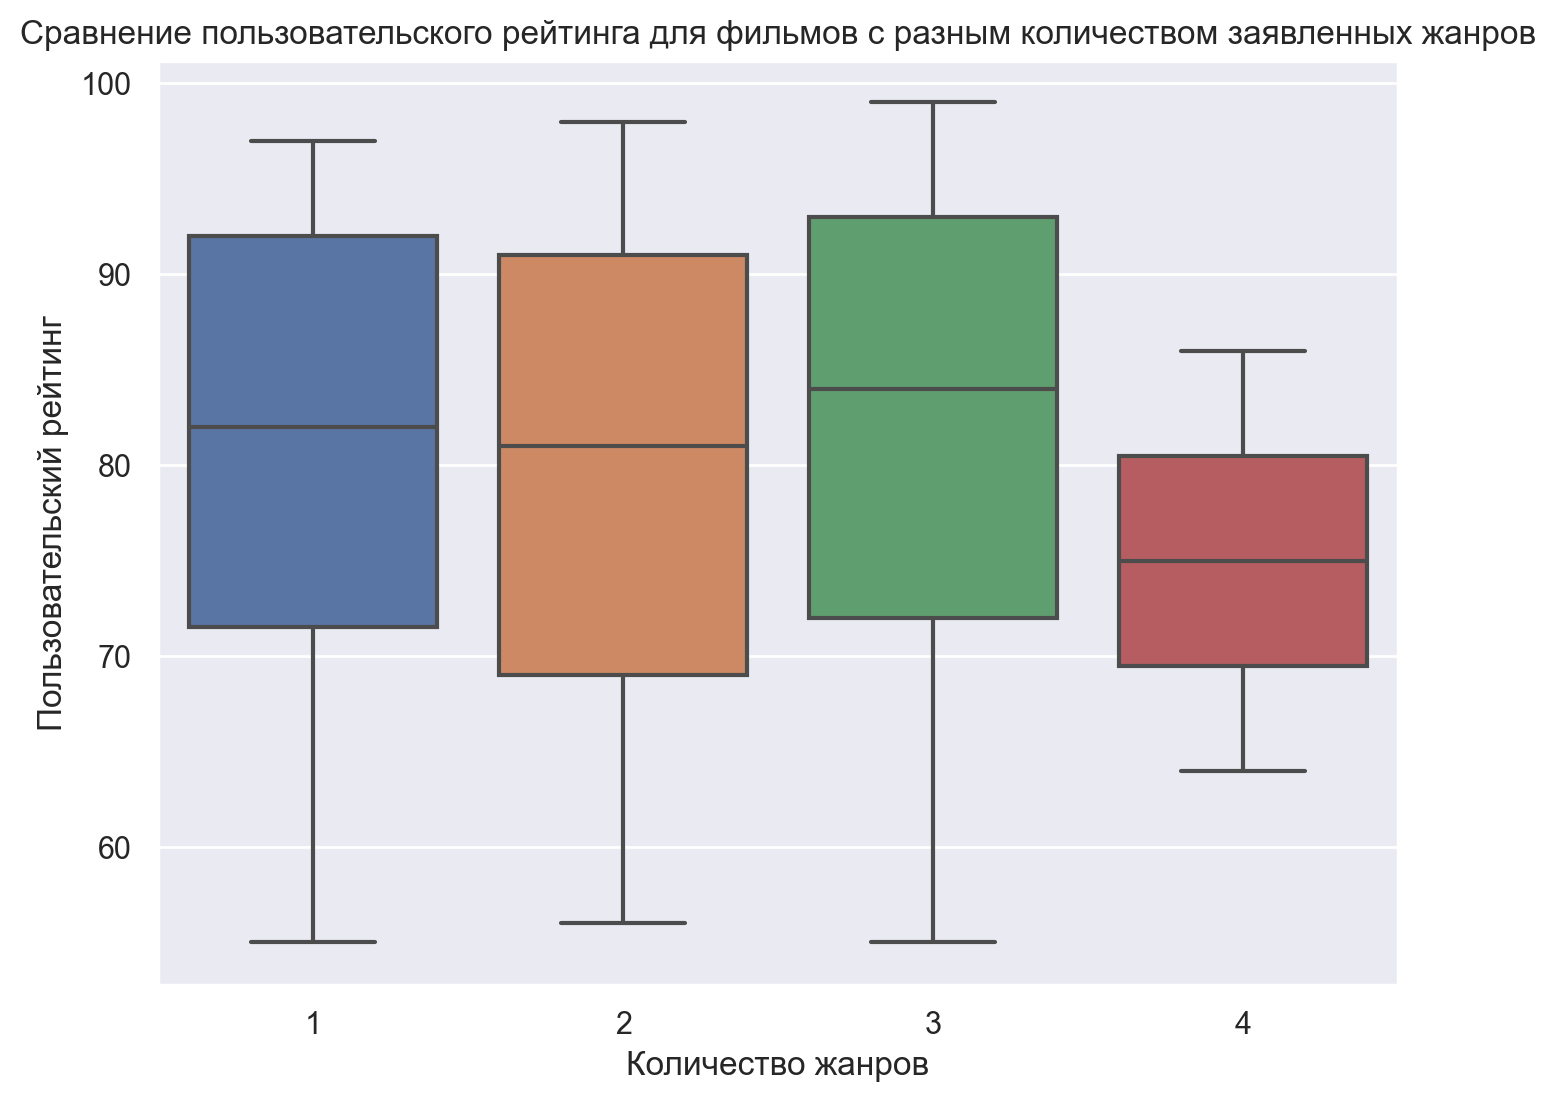

In [111]:
# Изучим как количество жанорв влияет на рейтинг
ENRICHED_FULLY1['genre_count'] = ENRICHED_FULLY1[lst_genre].sum(axis=1)
ENRICHED_FULLY1_ = remove_outliers_by_genre(ENRICHED_FULLY1, 'user rating score', ['genre_count'])

plt.figure(figsize=(8,6))
sns.boxplot(x='genre_count', y='user rating score', data=ENRICHED_FULLY1_)
plt.title('Cравнение пользовательского рейтинга для фильмов с разным количеством заявленных жанров')
plt.xlabel('Количество жанров')
plt.ylabel('Пользовательский рейтинг')
plt.show()

# Не особо значимые данные, нужен стат тест
# Интересно, что у 4 ящика межквартильный разброс больше

In [47]:
from scipy import stats
import scikit_posthocs as sp

In [107]:
ENRICHED_FULLY1_.dropna(subset = ['user rating score'],inplace=True)

Проверка нормальности (тест Шапиро-Уилка):


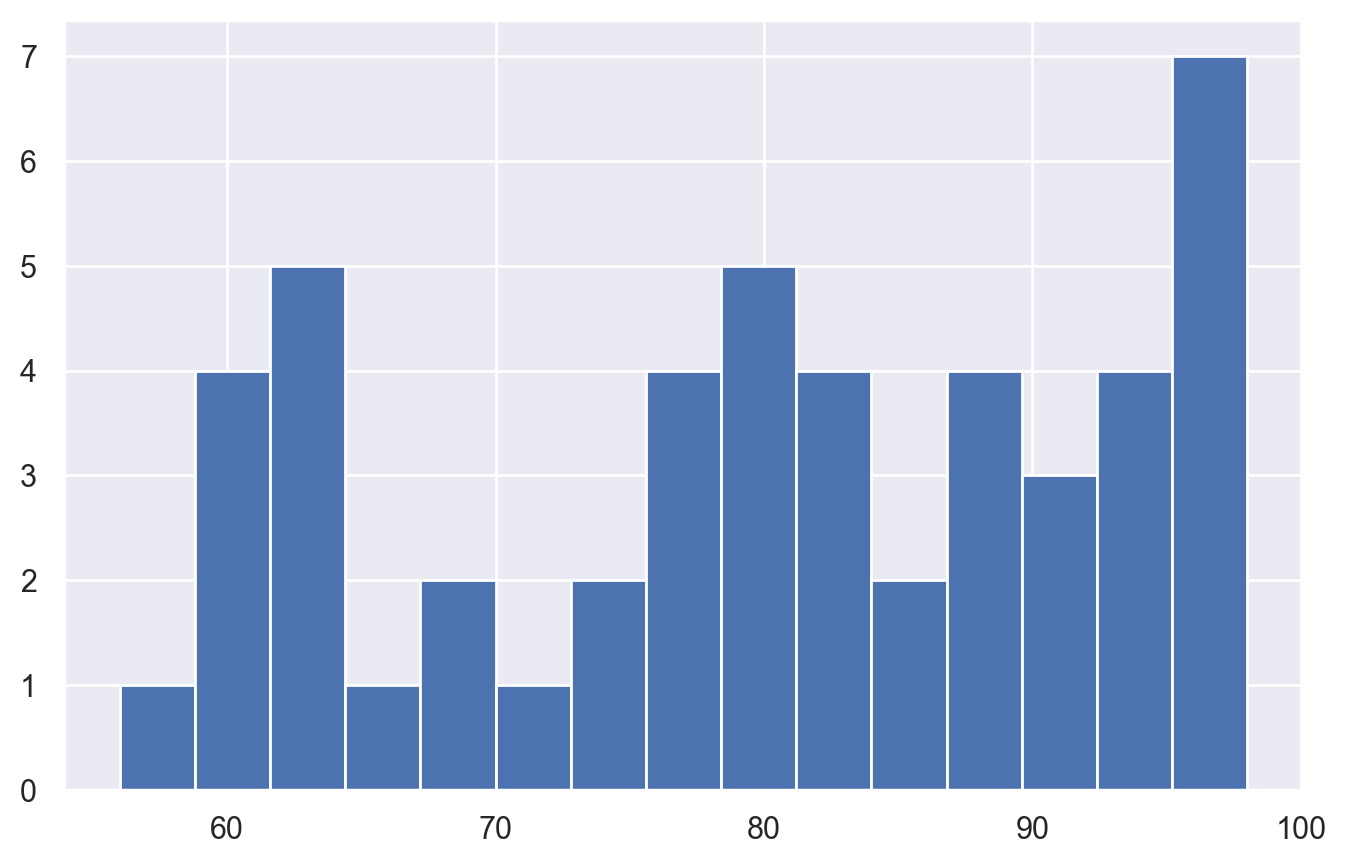

Группа 2: Статистика=0.935, P-значение=0.009


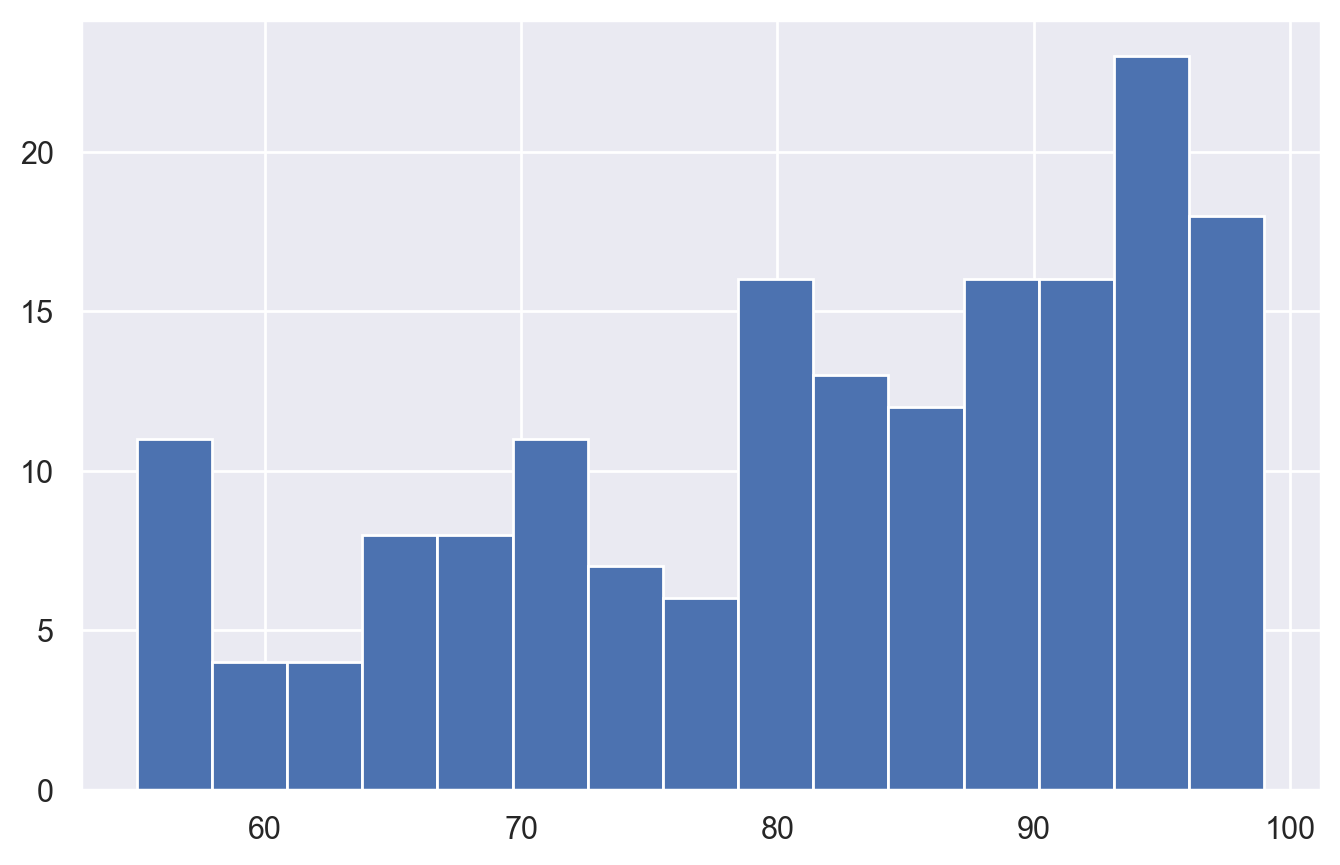

Группа 3: Статистика=0.921, P-значение=0.000


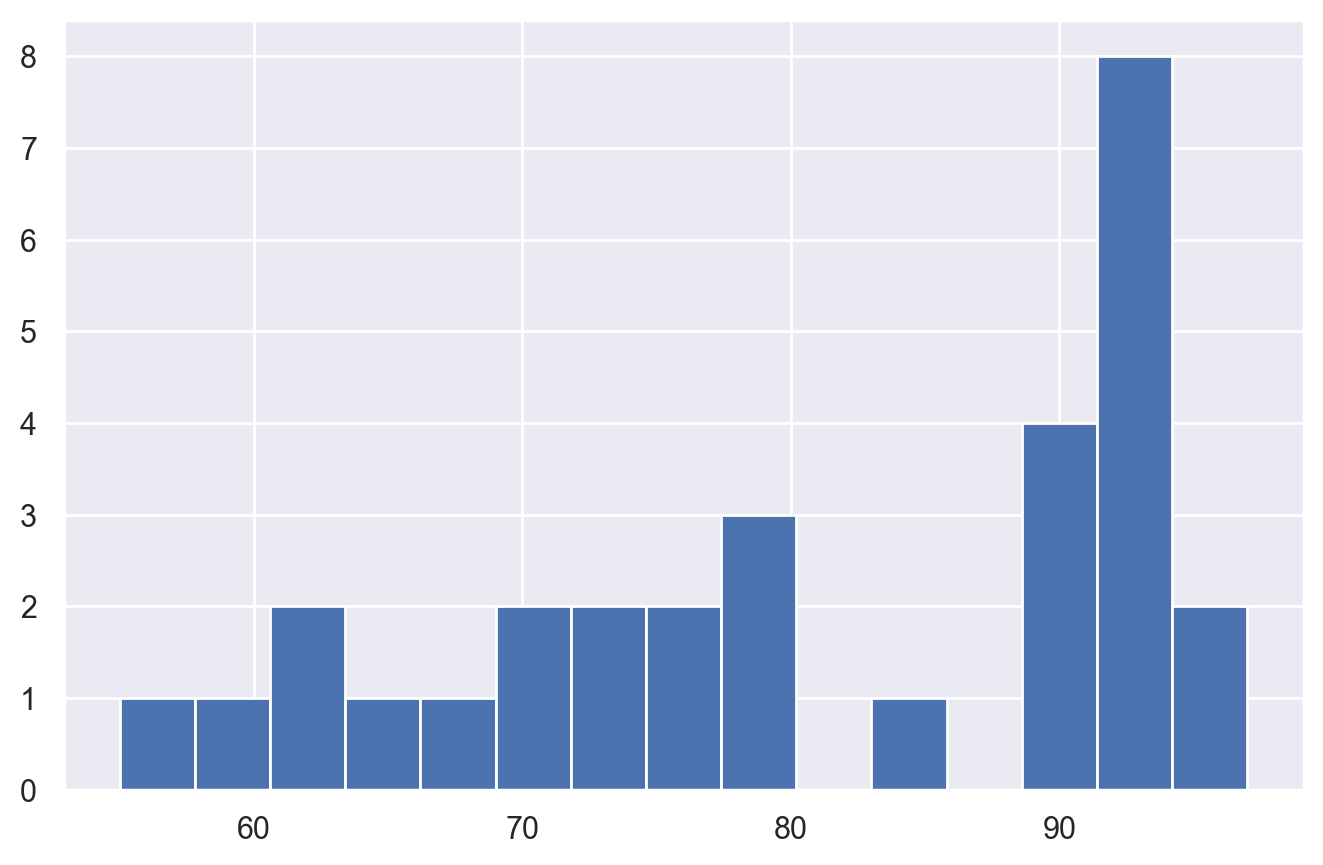

Группа 1: Статистика=0.900, P-значение=0.008


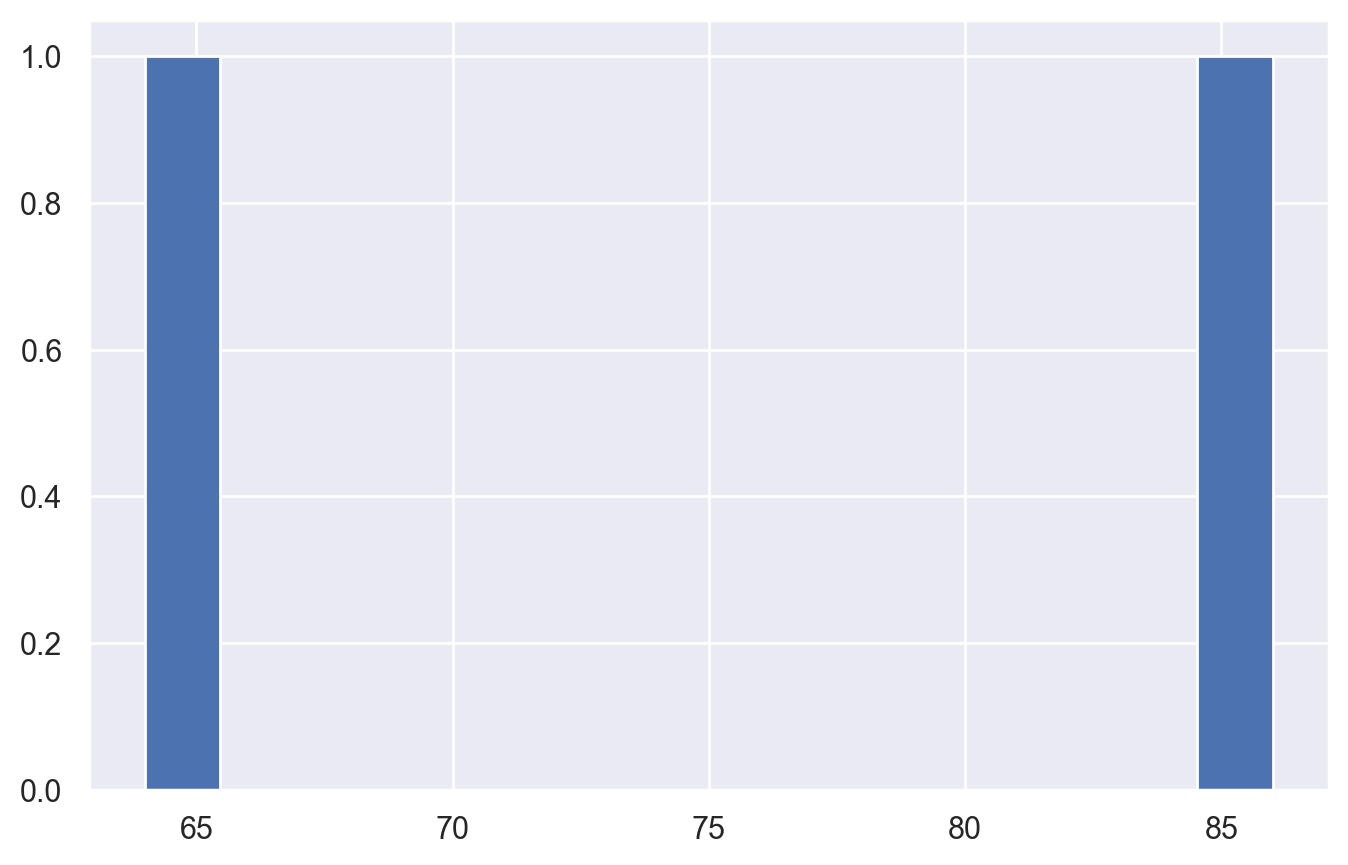

Группа 4: Статистика=nan, P-значение=nan


/var/folders/jp/f7t7txj57bjbw25n_6syymsr0000gn/T/ipykernel_9475/2798596506.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")


In [435]:
print("Проверка нормальности (тест Шапиро-Уилка):")
for group in ENRICHED_FULLY1_['genre_count'].unique():
    data_temp = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==group]['user rating score']
    data_temp.hist(bins=15)
    plt.show()
    print(f"Группа {group}: Статистика={stats.shapiro(data_temp)[0]:.3f}, P-значение={stats.shapiro(data_temp)[1]:.3f}")

Вывод: не применяем ANOVA, применяем Краскела-Уоллиса

In [110]:
# 1. Проведение критерия Краскела-Уоллиса
data_temp1 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==1]['user rating score']
data_temp2 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==2]['user rating score']
data_temp3 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==3]['user rating score']
data_temp4 = ENRICHED_FULLY1_[ENRICHED_FULLY1_['genre_count']==4]['user rating score']

h_statistic, p_value_kw = stats.kruskal(data_temp1, data_temp2, data_temp3, data_temp4)

print(f"Критерий Краскела-Уоллиса:")
print(f"H-статистика: {h_statistic:.2f}")
print(f"P-значение: {p_value_kw:.5f}")

Критерий Краскела-Уоллиса:
H-статистика: 1.63
P-значение: 0.65319


Различия есть, вот какие

In [439]:
sp.posthoc_dunn(ENRICHED_FULLY1_, val_col='user rating score', group_col='genre_count', p_adjust='bonferroni')

1    2    3    4
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0

Ан нет НИЧЕГО

# Another DataSet

In [3]:
mov_data = pd.read_csv('movie_dataset.csv')

In [6]:
print(*mov_data.columns, sep ='\n')

index
budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
director


In [46]:
mov_data['production_countries'] = mov_data['production_countries'].apply(lambda x: [country['name'] for country in eval(x)])

In [48]:
mov_data['production_countries']

0       [United States of America, United Kingdom]
1                       [United States of America]
2       [United Kingdom, United States of America]
3                       [United States of America]
4                       [United States of America]
                           ...                    
4798            [Mexico, United States of America]
4799                                            []
4800                    [United States of America]
4801             [United States of America, China]
4802                    [United States of America]
Name: production_countries, Length: 4803, dtype: object

In [49]:
mov_data['release_year'] = mov_data['release_date'].str.slice(0,4).astype('float')

In [50]:
mov_data['title'].value_counts()

The Host                 2
Batman                   2
Out of the Blue          2
Avatar                   1
The Girl on the Train    1
                        ..
Step Up 3D               1
Secondhand Lions         1
The Age of Adaline       1
Drag Me to Hell          1
My Date with Drew        1
Name: title, Length: 4800, dtype: int64

In [51]:
mov_data[mov_data['title'].duplicated(False)]

index    budget                                             genres  \
972     972  44000000  Action Adventure Romance Science Fiction Thriller   
1359   1359  35000000                                     Fantasy Action   
2877   2877  11000000                       Horror Drama Science Fiction   
3647   3647         0                                              Drama   
3693   3693         0                                              Drama   
4267   4267   1377800      Family Adventure Comedy Science Fiction Crime   

                       homepage     id  \
972                         NaN  72710   
1359                        NaN    268   
2877  http://www.hostmovie.com/   1255   
3647                        NaN  39269   
3693                        NaN  10844   
4267                        NaN   2661   

                                               keywords original_language  \
972   based on novel mass murder dystopia genocide a...                en   
1359  double life dc comics dual identity chemical c...                en   
2877         river mobile phone bravery archer daughter                ko   
3647  punk independent film coming of age teenage gi...                en   
3693  new zealand gun rampage police independent fil...                en   
4267    submarine dc comics missile shark attack rescue                en   

       original_title                                           overview  \
972          The Host  A parasitic alien soul is injected into the bo...   
1359           Batman  The Dark Knight of Gotham City begins his war ...   
2877               괴물  Gang-du is a dim-witted man working at his fat...   
3647  Out of the Blue  Dennis Hopper is a hard-drinking truck driver ...   
3693  Out of the Blue  Ordinary people find extraordinary courage in ...   
4267           Batman  The Dynamic Duo faces four super-villains who ...   

      popularity                               production_companies  \
972    42.933027  [{"name": "Nick Wechsler Productions", "id": 8...   
1359   44.104469  [{"name": "PolyGram Filmed Entertainment", "id...   
2877   27.655270  [{"name": "Cineclick Asia", "id": 685}, {"name...   
3647    0.679351           [{"name": "Robson Street", "id": 71953}]   
3693    0.706355                                                 []   
4267    9.815394  [{"name": "Twentieth Century Fox Film Corporat...   

                            production_countries release_date    revenue  \
972                   [United States of America]   2013-03-22   63327201   
1359  [United Kingdom, United States of America]   1989-06-23  411348924   
2877                               [South Korea]   2006-07-27   88489643   
3647                                    [Canada]   1980-05-01          0   
3693                               [New Zealand]   2006-10-12          0   
4267                  [United States of America]   1966-07-30          0   

      runtime                                   spoken_languages    status  \
972     125.0           [{"iso_639_1": "en", "name": "English"}]  Released   
1359    126.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
2877    119.0  [{"iso_639_1": "ko", "name": "\ud55c\uad6d\uc5...  Released   
3647     94.0           [{"iso_639_1": "en", "name": "English"}]  Released   
3693    103.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4267    105.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                                tagline            title  \
972                               You will be one of us         The Host   
1359  Have you ever danced with the devil in the pal...           Batman   
2877                                 Monsters are real.         The Host   
3647  A harrowing drama from the director of Easy Rider  Out of the Blue   
3693            The true story of a small town massacre  Out of the Blue   
4267           He's Here Big As Life In A Real Bat-Epic           Batma

In [52]:
ENRICHED_FULLY1.head(1)

title rating_x                                        ratingLevel  \
0  Grey's Anatomy    TV-14  Parents strongly cautioned. May be unsuitable ...   

   release year  user rating score    year certificate  duration  \
0          2016               98.0  2005.0       TV-14      41.0   

            genre  rating_y  \
0  Drama, Romance       7.6   

                                         description  \
0  A drama centered on the personal and professio...   

                                               stars     votes  Mystery  \
0  ['EllenPompeo', 'ChandraWilson', 'JamesPickens...  303617.0        0   

   Musical  Biography  Comedy  Talk-Show  Music  Animation  War  Reality-TV  \
0        0          0       0          0      0          0    0           0   

   Documentary  Action  Thriller  Romance  Adventure  History  Fantasy  Crime  \
0            0       0         0        1          0        0        0      0   

   Sci-Fi  Horror  Drama  Family  Sport  Short  Game-Show  top_stars  \
0       0       0      1       0      0      0          0          0   

   genre_count  
0            2

## Merge tables

### Прямые совпадения

In [53]:
data_merged2 =pd.merge(ENRICHED_FULLY1, mov_data, how ='inner', on ='title' )

In [54]:
data_merged2.shape

(73, 63)

In [55]:
data_merged2['title'].value_counts()

Sausage Party                         1
London Has Fallen                     1
Paddington                            1
Annie                                 1
Chicken Run                           1
Antz                                  1
Hotel Transylvania 2                  1
Kung Fu Panda                         1
Bee Movie                             1
The Pacifier                          1
The Three Musketeers                  1
Scooby-Doo 2: Monsters Unleashed      1
Flubber                               1
The Iron Giant                        1
The Angry Birds Movie                 1
Teenage Mutant Ninja Turtles          1
Chicken Little                        1
Minions                               1
Cool Runnings                         1
Anastasia                             1
Ernest & Celestine                    1
Baby's Day Out                        1
Corpse Bride                          1
Pooh's Heffalump Movie                1
Atlantis: The Lost Empire             1


### Непрямые совпадения

In [58]:
nf_data2 = ENRICHED_FULLY1.loc[~ENRICHED_FULLY1['title'].isin(mov_data['title']),:]
nf_data2 =nf_data2.astype({'title':'str'})

nf_mov_data = mov_data.loc[~mov_data['title'].isin(ENRICHED_FULLY1['title']),:]
nf_mov_data =nf_mov_data.astype({'title':'str'})

In [59]:
fuzzy_search2 = fuzzy_match_series(nf_data2.title, nf_mov_data.title, 70)

100%|█████████████████████████████████████████| 423/423 [00:20<00:00, 21.13it/s]


In [60]:
merged2 = pd.merge(
    pd.merge(fuzzy_search2.sort_values('score' ,ascending=False),nf_data2, left_on= 'source',right_on ='title', how ='inner'),
    nf_mov_data,
    left_on= 'best_match',right_on ='title', how ='inner').drop(columns = ['source', 'best_match'])
merged2['diff']= abs(merged2['release year']-merged2['release_year'])

In [61]:
pd.set_option('display.max_rows', 101)

In [62]:
merged2.loc[merged2['diff'] < 6,
    ['title_x', 'title_y', 'release year', 'release_year', 'diff','score','other']]\
.sort_values('diff')\
.sort_values('score' ,ascending=False)\
.reset_index(drop =True)

title_x  \
0                Thunder and the House Of Magic   
1                         Spy Kids 3: Game Over   
2                            Inspector Gadget 2   
3                                   The Do-Over   
4                          D2: The Mighty Ducks   
5                              The Walking Dead   
6                                      The Fall   
7                                      Flicka 2   
8                                    The L Word   
9                     Star Wars: The Clone Wars   
10                                 Little Boxes   
11                                     New Girl   
12                                   The Batman   
13                                  The Killing   
14                              The Client List   
15                                The Originals   
16                                       Tramps   
17                          Friday Night Lights   
18                                 Supernatural   
19                                   StarStruck   
20                                    Max Steel   
21                                   Death Note   
22                           Monster Math Squad   
23                                The Following   
24                                    Bloodline   
25                                   Hyena Road   
26                                  No Tomorrow   
27                                    Step Dogs   
28                                 Black Mirror   
29                               Criminal Minds   
30   Beverly Hills Chihuahua 3: Viva La Fiesta!   
31             The Mr. Peabody and Sherman Show   
32                          Witches of East End   
33                                       Pocoyo   
34             Ninja Turtles: The Next Mutation   
35                            Last Man Standing   
36                                 The Gruffalo   
37                           The Little Rascals   
38  DreamWorks How to Train Your Dragon Legends   
39                              Bob the Builder   
40                          Sid the Science Kid   
41                                      Charmed   
42                                     Girlboss   
43                           Dawn of the Croods   
44                                   Super Why!   
45                          Secret of the Wings   
46                                    Lie to Me   
47                                   Win It All   

                             title_y  release year  release_year  diff  score  \
0     Thunder and the House of Magic          2013        2013.0   0.0  100.0   
1            Spy Kids 3-D: Game Over          2003        2003.0   0.0   95.0   
2                   Inspector Gadget          2003        1999.0   4.0   94.0   
3                      The Dog Lover          2016        2016.0   0.0   92.0   
4                   The Mighty Ducks          1994        1992.0   2.0   91.0   
5               The Walking Deceased          2015        2015.0   0.0   89.0   
6                           The Call          2016        2013.0   3.0   88.0   
7                             Flicka          2010        2006.0   4.0   86.0   
8                          The Words          2009        2012.0   3.0   84.0   
9    Star Wars: Clone Wars: Volume 1          2008        2005.0   3.0   83.0   
10                        Little Boy          2016        2015.0   1.0   82.0   
11                         Gone Girl          2016        2014.0   2.0   82.0   
12                           The Man          2007        2005.0   2.0   82.0   
13                       The Calling          2014        2014.0   0.0   82.0   
14                      The Hit List          2013        2011.0   2.0   81.0   
15                        The Signal          2016        2014.0   2.0   78.0   
16                           Krampus          2017        2015.0   2.0   77.0   
17                      Fright Night          2010        2011.0   1.0   77.0   
1

In [63]:
dict_for_join2 = merged2.loc[merged2['diff'] < 6,
    ['title_x', 'title_y', 'release year', 'release_year', 'diff','score','other']]\
.sort_values('diff')\
.sort_values('score' ,ascending=False)\
.reset_index(drop =True)\
.loc[[0,1,2,4,9,34],['title_x', 'title_y']]

In [64]:
dict_for_join2

title_x                           title_y
0     Thunder and the House Of Magic    Thunder and the House of Magic
1              Spy Kids 3: Game Over           Spy Kids 3-D: Game Over
2                 Inspector Gadget 2                  Inspector Gadget
4               D2: The Mighty Ducks                  The Mighty Ducks
9          Star Wars: The Clone Wars   Star Wars: Clone Wars: Volume 1
34  Ninja Turtles: The Next Mutation  Teenage Mutant Ninja Turtles III

In [65]:
manually_found2 =pd.merge(
    pd.merge(nf_data2, dict_for_join2, how ='inner', left_on ='title', right_on ='title_x'),
    nf_mov_data.rename(columns={'title':'title_y'}),
    how ='inner', on ='title_y'
).drop(columns=['title_x','title_y'])

In [66]:
data_merged_fully2 = pd.concat([data_merged2,manually_found2]).reset_index(drop=True)

In [67]:
data_merged_fully2.shape

(79, 63)

In [68]:
data_merged_fully2.head(3)

title rating_x                                        ratingLevel  \
0  Sausage Party        R  strong crude sexual content, pervasive languag...   
1           Dope        R  language, drug content, sexuality/nudity, and ...   
2           Slam    TV-MA                                                NaN   

   release year  user rating score    year certificate  duration  \
0          2016               91.0  2016.0           R      89.0   
1          2015               79.0  2017.0       TV-MA      45.0   
2          2017                NaN  2016.0       TV-MA     100.0   

                          genre  rating_y  \
0  Animation, Adventure, Comedy       6.1   
1            Documentary, Crime       7.3   
2        Comedy, Drama, Romance       6.1   

                                         description  \
0  A sausage strives to discover the truth about ...   
1  Ride along for an uncompromising look at the l...   
2  Teen father-to-be Sam imagines his future as a...   

                                               stars     votes  Mystery  \
0  ['GregTiernan', 'ConradVernon', 'Stars', 'Seth...  194159.0        0   
1                                   ['RonanSummers']    1687.0        0   
2  ['AndreaMolaioli', 'Stars', 'LudovicoTersigni'...    1337.0        0   

   Musical  Biography  Comedy  Talk-Show  Music  Animation  War  Reality-TV  \
0        0          0       1          0      0          1    0           0   
1        0          0       0          0      0          0    0           0   
2        0          0       1          0      0          0    0           0   

   Documentary  Action  Thriller  Romance  Adventure  History  Fantasy  Crime  \
0            0       0         0        0          1        0        0      0   
1            1       0         0        0          0        0        0      1   
2            0       0         0        1          0        0        0      0   

   Sci-Fi  Horror  Drama  Family  Sport  Short  Game-Show  top_stars  \
0       0       0      0       0      0      0          0          1   
1       0       0      0       0      0      0          0          0   
2       0       0      1       0      0      0          0          1   

   genre_count  index    budget                              genres  \
0            3   1682  19000000  Adventure Animation Comedy Fantasy   
1            2   3358    700000                  Crime Drama Comedy   
2            3   4369         1                               Drama   

                           homepage      id  \
0  http://www.sausagepartymovie.com  223702   
1        http://www.youaredope.com/  308639   
2                               NaN   37532   

                                            keywords original_language  \
0    supermarket party sausage food anthropomorphism                en   
1  california hip-hop harvard university geek com...                en   
2                                   independent film                en   

  original_title                                           overview  \
0  Sausage Party  Sausage Party, the first R-rated CG animated m...   
1           Dope  Malcolm is carefully surviving life in a tough...   
2           Slam  Slam tells the story of Ray Joshua, an origina...   

   popularity                               production_companies  \
0   66.242737  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
1   29.761163  [{"name": "Forest Whitaker's Significant Produ...   
2    0.292450                                                 []   

                 production_countries release_date    revenue  runtime  \
0  [Canada, United States of America]   2016-07-11  140752617     83.0   
1          [United States of America]   2015-06-19   17986781    103.0   
2                                  []   1998-10-07          0    100.0   

                           spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}]  Released   
1  [{"iso_639_1": "en", "name": "Englis

In [69]:
alldata2 = pd.concat([data_merged_fully2, ENRICHED_FULLY1[~ENRICHED_FULLY1['title'].isin(data_merged_fully2['title'])]])

not merged

Вот это мы тащить будем

In [71]:
alldata2[alldata2['budget'].isna()][['title', 'release year', 'production_countries', 'budget', 'revenue']]

title  release year production_countries  budget  \
0               Grey's Anatomy          2016                  NaN     NaN   
1                 Prison Break          2008                  NaN     NaN   
2        How I Met Your Mother          2014                  NaN     NaN   
3                 Supernatural          2016                  NaN     NaN   
4                 Breaking Bad          2013                  NaN     NaN   
..                         ...           ...                  ...     ...   
491                 Mia and Me          2015                  NaN     NaN   
492  Wiener Dog Internationals          2015                  NaN     NaN   
493                   Pup Star          2016                  NaN     NaN   
494           Precious Puppies          2003                  NaN     NaN   
495                Beary Tales          2013                  NaN     NaN   

     revenue  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
491      NaN  
492      NaN  
493      NaN  
494      NaN  
495      NaN  

[417 rows x 5 columns]

In [73]:
alldata2[alldata2['budget'].isna()][['title', 'release year']].to_csv('datatoenrich2.csv', sep ='\t', index =False)

### Обогащение с поисковой LLM

In [97]:
enriched_418 = pd.read_excel('enriched418.xlsx')

In [98]:
data_merged_fully2.head(3)

title rating_x                                        ratingLevel  \
0  Sausage Party        R  strong crude sexual content, pervasive languag...   
1           Dope        R  language, drug content, sexuality/nudity, and ...   
2           Slam    TV-MA                                                NaN   

   release year  user rating score    year certificate  duration  \
0          2016               91.0  2016.0           R      89.0   
1          2015               79.0  2017.0       TV-MA      45.0   
2          2017                NaN  2016.0       TV-MA     100.0   

                          genre  rating_y  \
0  Animation, Adventure, Comedy       6.1   
1            Documentary, Crime       7.3   
2        Comedy, Drama, Romance       6.1   

                                         description  \
0  A sausage strives to discover the truth about ...   
1  Ride along for an uncompromising look at the l...   
2  Teen father-to-be Sam imagines his future as a...   

                                               stars     votes  Mystery  \
0  ['GregTiernan', 'ConradVernon', 'Stars', 'Seth...  194159.0        0   
1                                   ['RonanSummers']    1687.0        0   
2  ['AndreaMolaioli', 'Stars', 'LudovicoTersigni'...    1337.0        0   

   Musical  Biography  Comedy  Talk-Show  Music  Animation  War  Reality-TV  \
0        0          0       1          0      0          1    0           0   
1        0          0       0          0      0          0    0           0   
2        0          0       1          0      0          0    0           0   

   Documentary  Action  Thriller  Romance  Adventure  History  Fantasy  Crime  \
0            0       0         0        0          1        0        0      0   
1            1       0         0        0          0        0        0      1   
2            0       0         0        1          0        0        0      0   

   Sci-Fi  Horror  Drama  Family  Sport  Short  Game-Show  top_stars  \
0       0       0      0       0      0      0          0          1   
1       0       0      0       0      0      0          0          0   
2       0       0      1       0      0      0          0          1   

   genre_count  index    budget                              genres  \
0            3   1682  19000000  Adventure Animation Comedy Fantasy   
1            2   3358    700000                  Crime Drama Comedy   
2            3   4369         1                               Drama   

                           homepage      id  \
0  http://www.sausagepartymovie.com  223702   
1        http://www.youaredope.com/  308639   
2                               NaN   37532   

                                            keywords original_language  \
0    supermarket party sausage food anthropomorphism                en   
1  california hip-hop harvard university geek com...                en   
2                                   independent film                en   

  original_title                                           overview  \
0  Sausage Party  Sausage Party, the first R-rated CG animated m...   
1           Dope  Malcolm is carefully surviving life in a tough...   
2           Slam  Slam tells the story of Ray Joshua, an origina...   

   popularity                               production_companies  \
0   66.242737  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
1   29.761163  [{"name": "Forest Whitaker's Significant Produ...   
2    0.292450                                                 []   

                 production_countries release_date    revenue  runtime  \
0  [Canada, United States of America]   2016-07-11  140752617     83.0   
1          [United States of America]   2015-06-19   17986781    103.0   
2                                  []   1998-10-07          0    100.0   

                           spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}]  Released   
1  [{"iso_639_1": "en", "name": "Englis

In [137]:
data_enriched2 = \
ENRICHED_FULLY1[~ENRICHED_FULLY1['title'].isin(data_merged_fully2['title'])]\
        .replace({'OperaÌ¤Ìµes Especiais' :'Operações Especiais',
"MerlÌ?": 'Merlí',
'Gabriel lglesias: I‰Ûªm Sorry For What I Said When I Was Hungry' : 'Gabriel Iglesias: I’m Sorry For What I Said When I Was Hungry',
'3%' : 0.03,
'90210' : 90210})\
        .merge(enriched_418, on ='title')\
        .drop(columns =['release year_y'])\
        .replace({'Информация не найдена':np.nan})

In [109]:
data_enriched2.head(3)

title rating_x  \
0         Grey's Anatomy    TV-14   
1           Prison Break    TV-14   
2  How I Met Your Mother    TV-PG   

                                         ratingLevel  release year_x  \
0  Parents strongly cautioned. May be unsuitable ...            2016   
1  Parents strongly cautioned. May be unsuitable ...            2008   
2  Parental guidance suggested. May not be suitab...            2014   

   user rating score    year certificate  duration                 genre  \
0               98.0  2005.0       TV-14      41.0        Drama, Romance   
1               98.0  2005.0       TV-14      44.0  Action, Crime, Drama   
2               94.0  2005.0       TV-14      22.0       Comedy, Romance   

   rating_y                                        description  \
0       7.6  A drama centered on the personal and professio...   
1       8.3  Due to a political conspiracy, an innocent man...   
2       8.3  A father recounts to his children - through a ...   

                                               stars     votes  Mystery  \
0  ['EllenPompeo', 'ChandraWilson', 'JamesPickens...  303617.0        0   
1  ['DominicPurcell', 'WentworthMiller', 'AmauryN...  529304.0        0   
2  ['JoshRadnor', 'JasonSegel', 'CobieSmulders', ...  676121.0        0   

   Musical  Biography  Comedy  Talk-Show  Music  Animation  War  Reality-TV  \
0        0          0       0          0      0          0    0           0   
1        0          0       0          0      0          0    0           0   
2        0          0       1          0      0          0    0           0   

   Documentary  Action  Thriller  Romance  Adventure  History  Fantasy  Crime  \
0            0       0         0        1          0        0        0      0   
1            0       1         0        0          0        0        0      1   
2            0       0         0        1          0        0        0      0   

   Sci-Fi  Horror  Drama  Family  Sport  Short  Game-Show  top_stars  \
0       0       0      1       0      0      0          0          0   
1       0       0      1       0      0      0          0          0   
2       0       0      0       0      0      0          0          0   

   genre_count production_countries  budget  revenue  
0            2        United States     NaN      NaN  
1            3        United States     NaN      NaN  
2            2        United States     NaN      NaN

In [139]:
data_enriched2['production_countries'] = data_enriched2['production_countries']\
                                        .str.replace('United States','United States of America')\
                                        .str.split(', ')

In [1]:
data_enriched2.head(3)

NameError: name 'data_enriched2' is not defined

### ФИНАЛ 2

In [140]:
ENRICHED_FULLY2 = pd.concat([data_merged_fully2, data_enriched2]).reset_index(drop=1)\
.drop(columns =['release_year','release year_x'])

In [141]:
ENRICHED_FULLY2.production_countries.explode().unique()

array(['Canada', 'United States of America', nan, 'United Kingdom',
       'Australia', 'China', 'France', 'Argentina', 'Spain', 'Germany',
       'Bulgaria', 'Finland', 'India', 'Belgium', 'Luxembourg',
       'South Korea', 'Hong Kong', 'Japan', 'Russia', 'Colombia',
       'Brazil', 'Mexico', 'Nigeria', 'Ireland', 'New Zealand', 'Austria',
       'Cyprus', 'Denmark', 'Portugal', 'Uganda', 'Turkey',
       'West Germany', 'Italy', 'Malaysia'], dtype=object)

In [168]:
ENRICHED_FULLY2.to_csv('data_enriched2.csv',sep ='|',index=False)

In [8]:
ENRICHED_FULLY2.columns

Index(['title', 'rating_x', 'ratingLevel', 'release year', 'user rating score',
       'year', 'certificate', 'duration', 'genre', 'rating_y', 'description',
       'stars', 'votes', 'Mystery', 'Musical', 'Biography', 'Comedy',
       'Talk-Show', 'Music', 'Animation', 'War', 'Reality-TV', 'Documentary',
       'Action', 'Thriller', 'Romance', 'Adventure', 'History', 'Fantasy',
       'Crime', 'Sci-Fi', 'Horror', 'Drama', 'Family', 'Sport', 'Short',
       'Game-Show', 'top_stars', 'genre_count', 'index', 'budget', 'genres',
       'homepage', 'id', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'director'],
      dtype='object')

In [112]:
ENRICHED_FULLY2 = pd.read_csv('data_enriched2.csv',sep ='|')

In [27]:
print(*['title', 'rating_x', 'ratingLevel', 'release year', 'user rating score',
       'year', 'certificate', 'duration', 'genre', 'rating_y', 'description',
       'stars', 'votes', 'top_stars', 'genre_count', 'index', 'budget', 'genres',
       'homepage', 'id', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'director'], sep = '\n')

title
rating_x
ratingLevel
release year
user rating score
year
certificate
duration
genre
rating_y
description
stars
votes
top_stars
genre_count
index
budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
vote_average
vote_count
cast
crew
director


In [16]:
non_null_counts = ENRICHED_FULLY2[[ 'genre', 'rating_y',
       'stars', 'budget',
       'production_countries', 'revenue'
       ]].count()
total_rows = len(ENRICHED_FULLY2)
non_null_percentage = (non_null_counts / total_rows) * 100

In [17]:
pd.DataFrame(non_null_percentage)

0
genre                 100.000000
rating_y               98.387097
stars                  92.338710
budget                 27.016129
production_countries  100.000000
revenue                26.209677

## Анализ

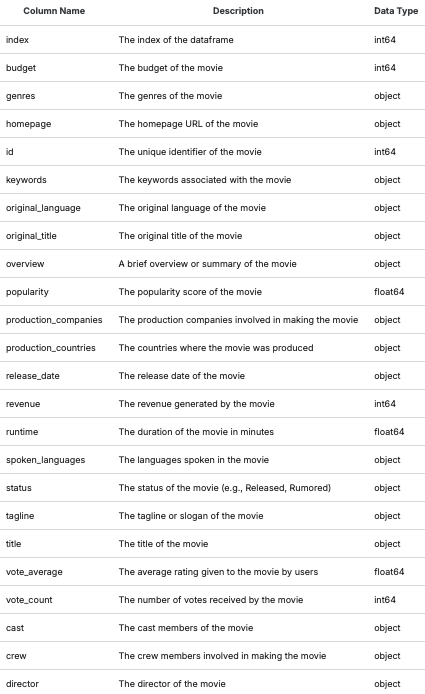

### Связь бюджета и дохода

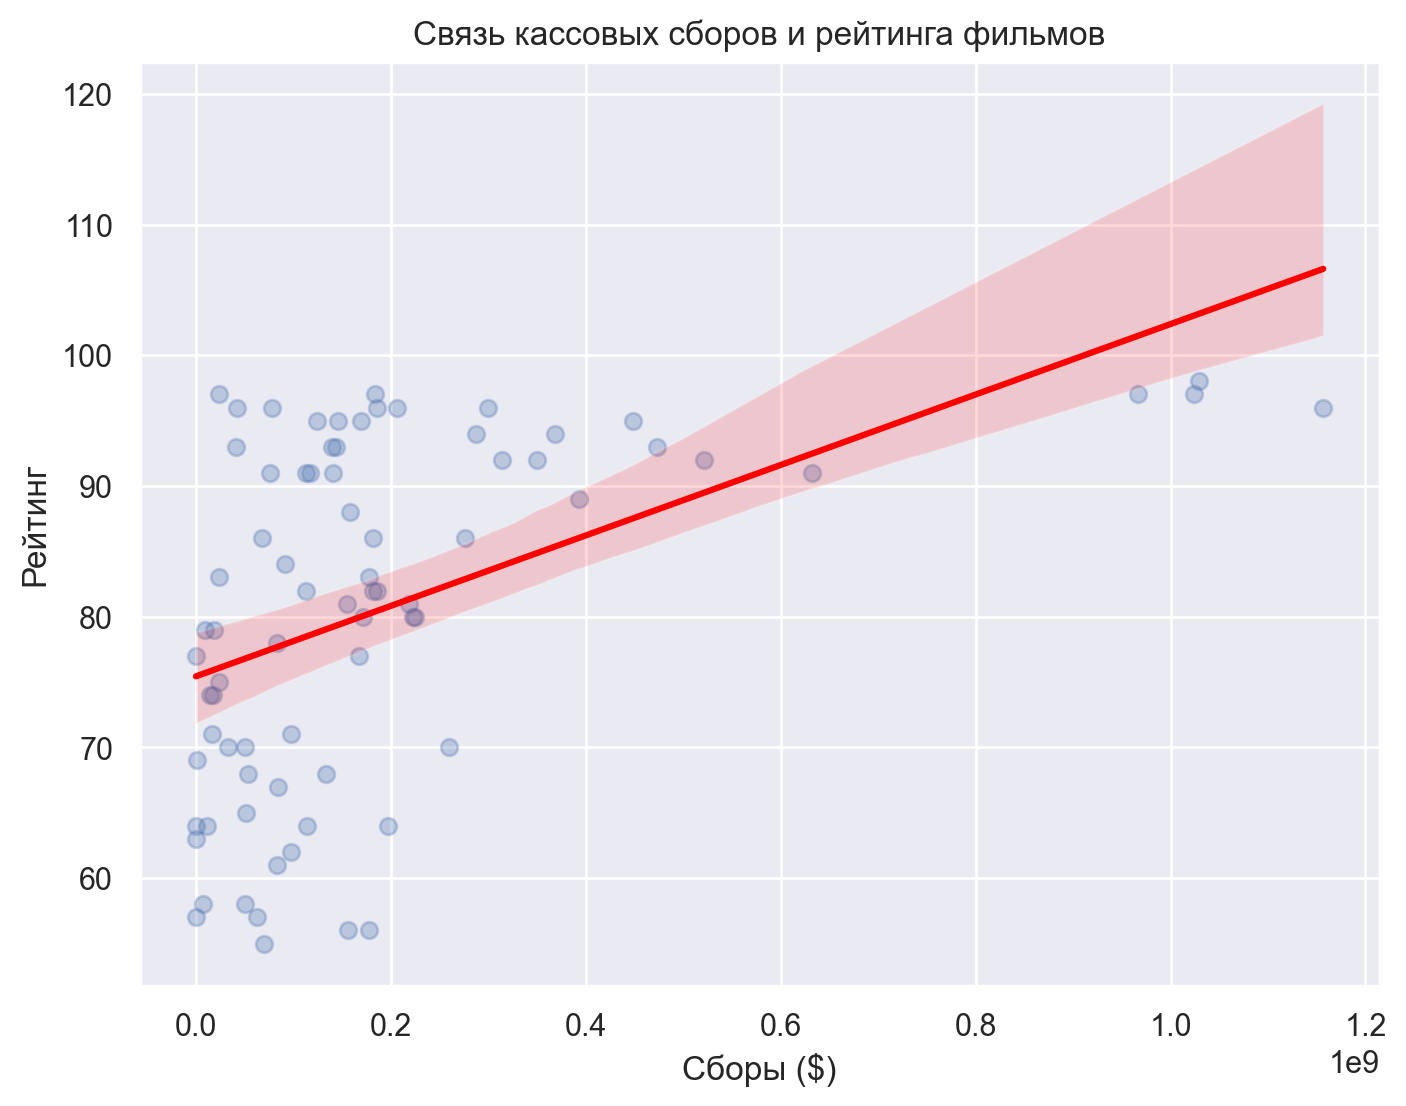

In [114]:
plt.figure(figsize=(8, 6))
sns.regplot(x='revenue', y='user rating score', data=ENRICHED_FULLY2, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Связь кассовых сборов и рейтинга фильмов')
plt.xlabel('Сборы ($)')
plt.ylabel('Рейтинг')
#plt.xscale('log')
plt.show()

In [118]:
ENRICHED_FULLY2_ =ENRICHED_FULLY2.dropna(subset=['revenue', 'user rating score'])

In [119]:
tau, p_value = stats.pearsonr(ENRICHED_FULLY2_['revenue'],ENRICHED_FULLY2_['user rating score'] )

print(f"Коэффициент корреляции Пирсона: {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Пирсона: 0.484
p-значение: 0.000


### Связь бюджета и рейтинга

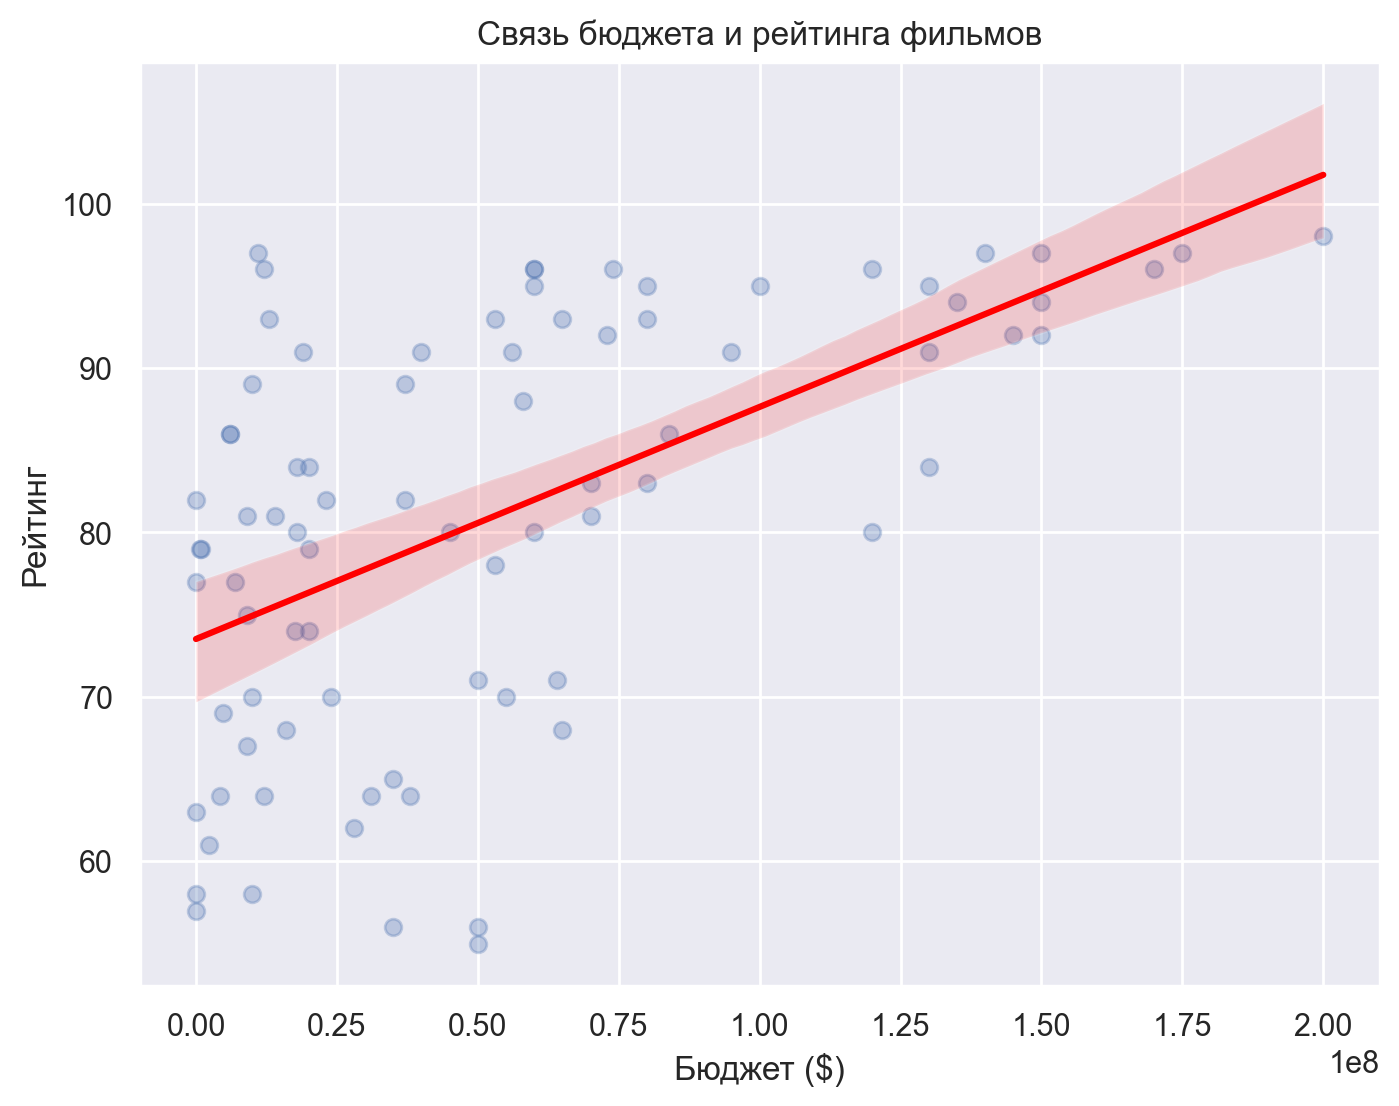

In [120]:
plt.figure(figsize=(8, 6))
sns.regplot(x='budget', y='user rating score', data=ENRICHED_FULLY2, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Связь бюджета и рейтинга фильмов')
plt.xlabel('Бюджет ($)')
plt.ylabel('Рейтинг')
plt.show()

In [121]:
ENRICHED_FULLY2_ =ENRICHED_FULLY2.dropna(subset=['budget', 'user rating score'])

In [122]:
tau, p_value = stats.pearsonr(ENRICHED_FULLY2_['budget'],ENRICHED_FULLY2_['user rating score'] )

print(f"Коэффициент корреляции Пирсона: {tau:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент корреляции Пирсона: 0.559
p-значение: 0.000


### Страны и рейтинг

In [123]:
ENRICHED_FULLY2.loc[~ENRICHED_FULLY2.production_countries.isna(),'production_countries'] = \
ENRICHED_FULLY2.loc[~ENRICHED_FULLY2.production_countries.isna(),'production_countries'].apply(eval) 

In [124]:
ENRICHED_FULLY2_wide = ENRICHED_FULLY2.explode('production_countries').reset_index(drop = True).dropna(subset='user rating score')

In [125]:
ENRICHED_FULLY2_wide_grouped =\
ENRICHED_FULLY2_wide.groupby('production_countries').agg(
    average_rating=('user rating score', 'mean'),
    movie_count=('production_countries', 'count')
).reset_index().sort_values(by='average_rating', ascending=False)

In [126]:
ENRICHED_FULLY2_wide_grouped

production_countries  average_rating  movie_count
13                     India       97.000000            1
3                   Bulgaria       96.000000            1
6                   Colombia       94.000000            1
5                      China       92.000000            1
15                    Mexico       89.500000            2
9                    Finland       89.000000            2
20  United States of America       81.943478          230
16                    Russia       81.000000            1
19            United Kingdom       79.937500           16
4                     Canada       75.818182           11
12                 Hong Kong       74.000000            1
0                  Australia       72.250000            4
10                    France       71.333333            3
14                     Japan       70.400000            5
8                    Denmark       67.000000            1
2                    Belgium       66.000000            1
18                     Spain       64.000000            2
11                   Germany       61.000000            2
1                    Austria       61.000000            1
7                     Cyprus       61.000000            1
17               South Korea       57.000000            1

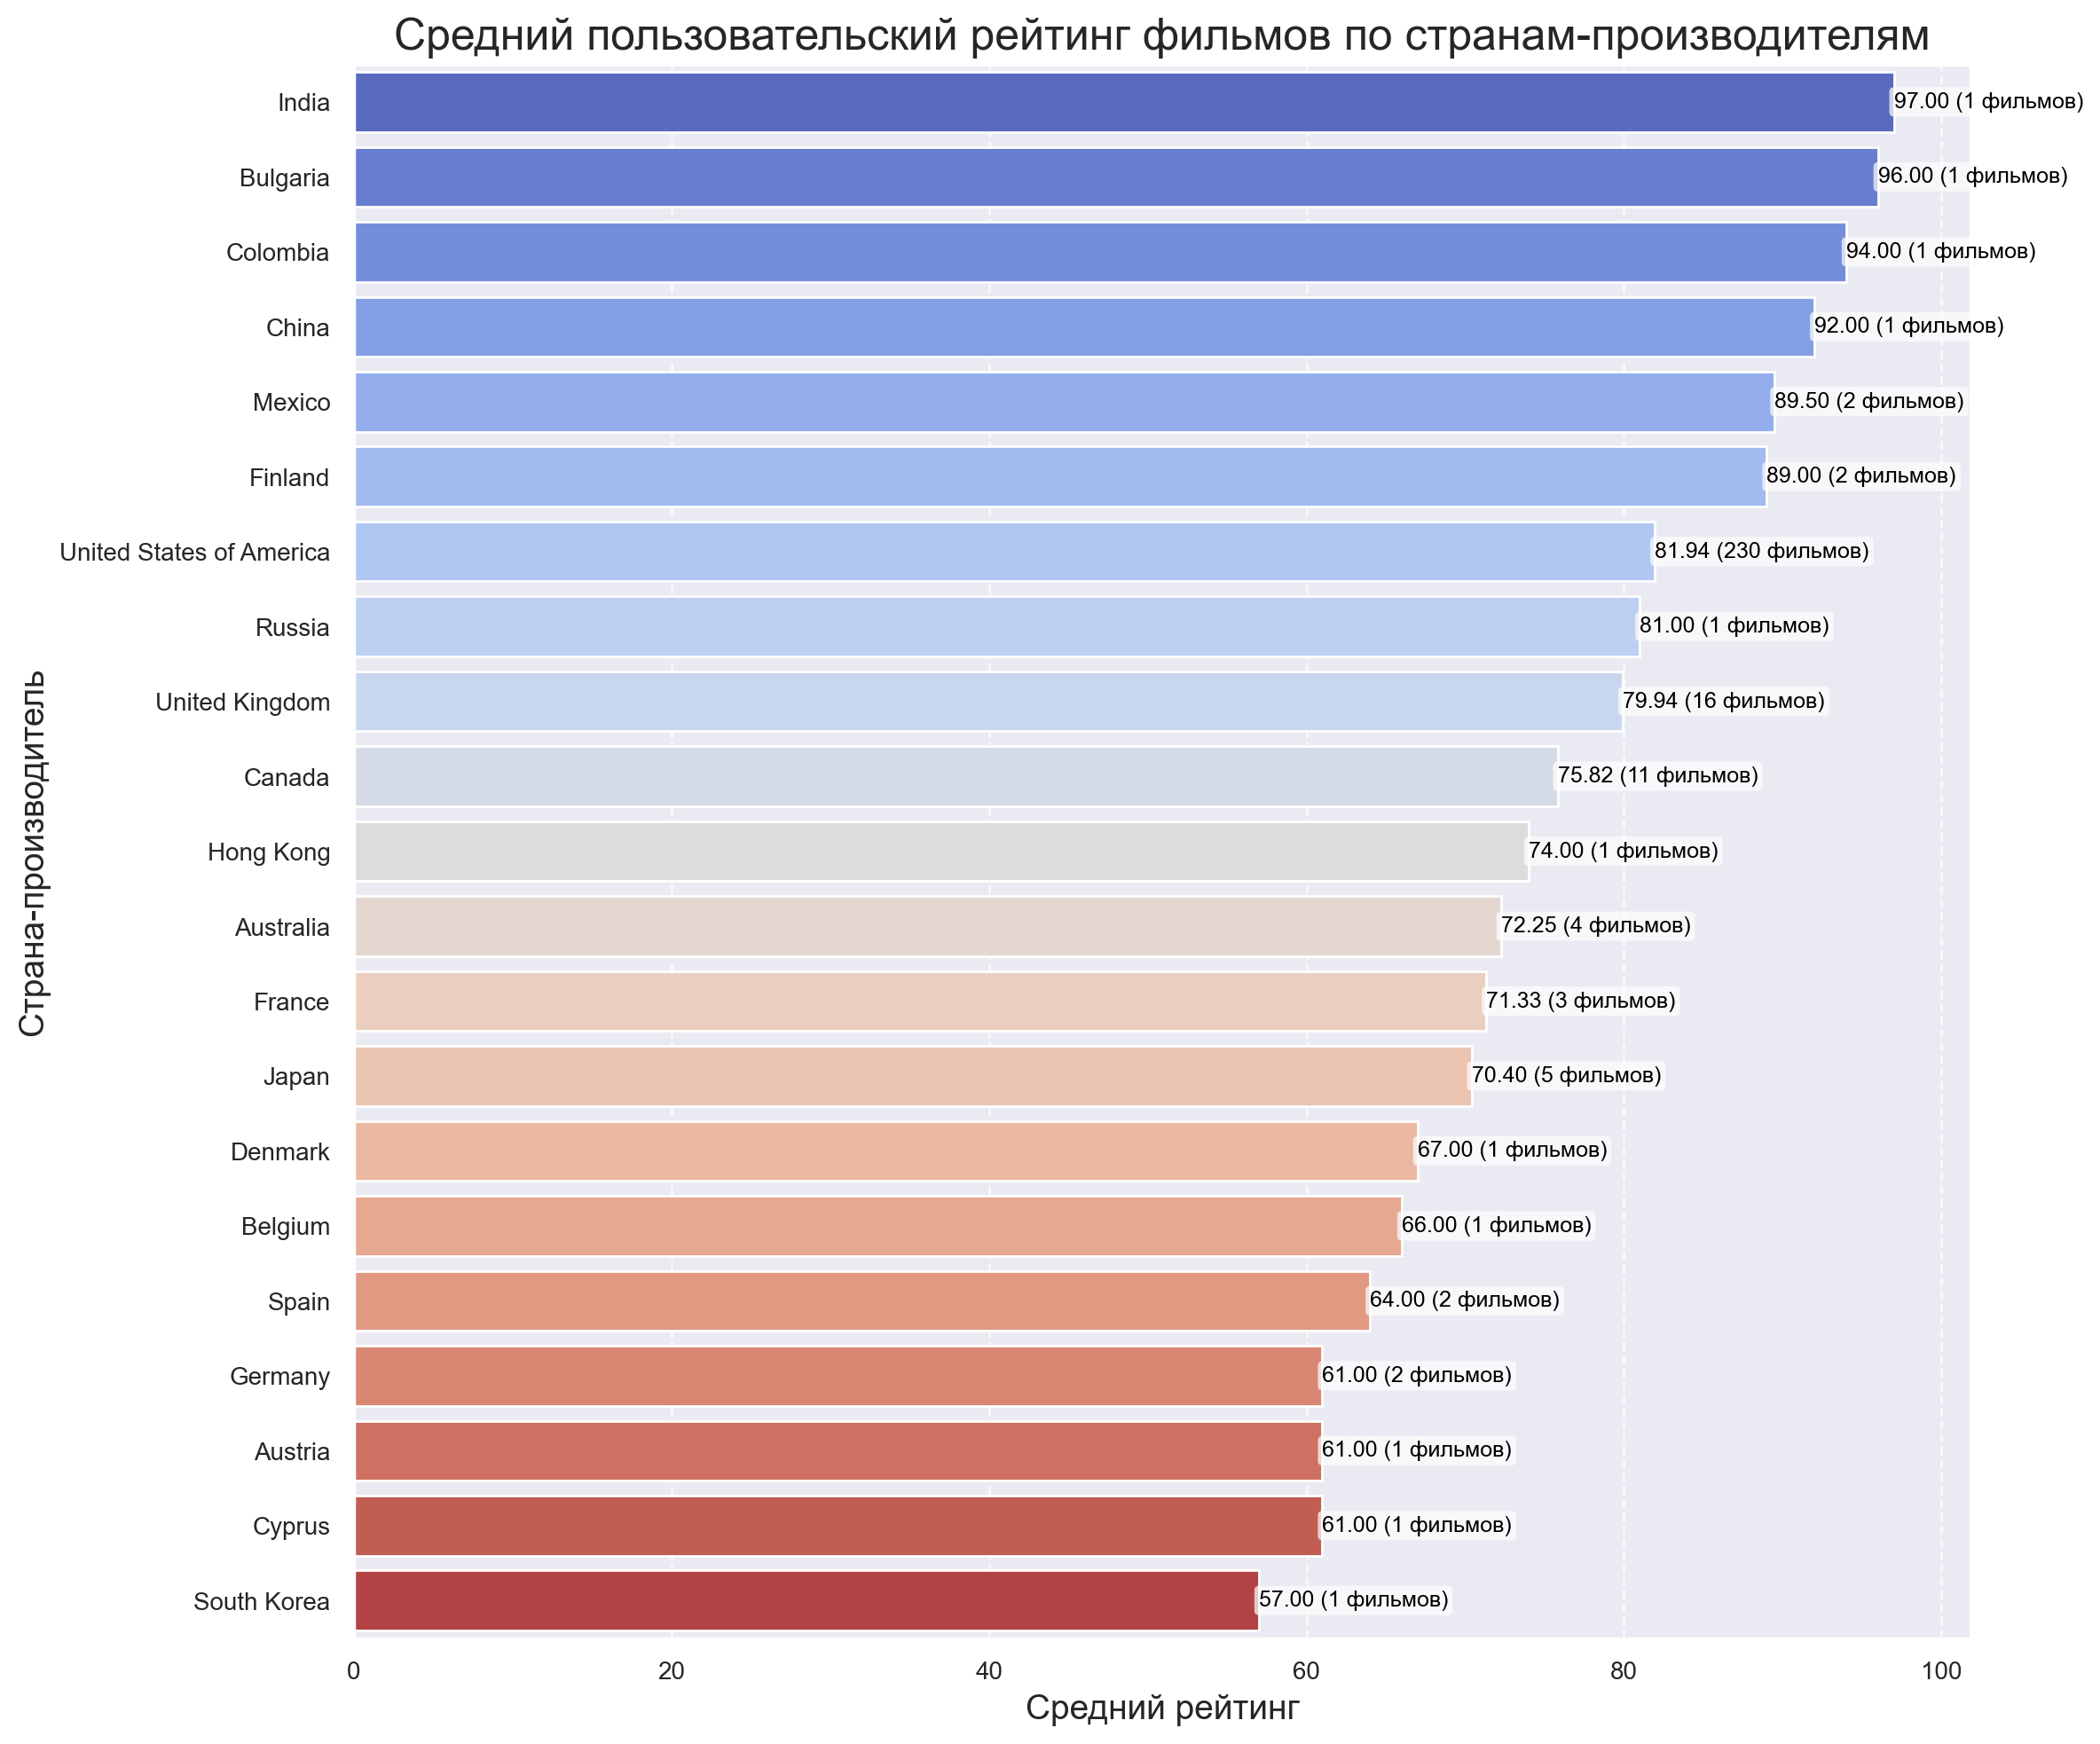

In [127]:
plt.figure(figsize=(12, 10))

sns.barplot(x='average_rating', y='production_countries', data=ENRICHED_FULLY2_wide_grouped, palette='coolwarm')
for index, row in ENRICHED_FULLY2_wide_grouped.reset_index(drop=True).iterrows():
    plt.text(row['average_rating'],
             index,                  
             f"{row['average_rating']:.2f} ({int(row['movie_count'])} фильмов)",
             color='black', ha="left", va='center', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

plt.title('Средний пользовательский рейтинг фильмов по странам-производителям', fontsize=18)
plt.xlabel('Средний рейтинг', fontsize=14)
plt.ylabel('Страна-производитель', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10) # Метки рейтинга по X
plt.tight_layout()
plt.show()

## Kinopoisk data

In [ ]:
# Загрузка файла kinopoisk_data с goole drive
!gdown "16JRZtuHjGx0jrXSur2Hb37Osq6zGIj7x"
kinopoisk_data = pd.read_csv("/content/kinopoisk_data.csv")
kinopoisk_data = kinopoisk_data.drop_duplicates()
kinopoisk_data.head(3)

Downloading...
From: https://drive.google.com/uc?id=16JRZtuHjGx0jrXSur2Hb37Osq6zGIj7x
To: /content/kinopoisk_data.csv
100% 2.01M/2.01M [00:00<00:00, 135MB/s]


id                      name      alternativeName enName       type  \
0   51605             Белые цыпочки         White Chicks    NaN      movie   
1   86326  Счастливое число Слевина  Lucky Number Slevin    NaN      movie   
2  277535          Анатомия страсти       Grey's Anatomy    NaN  tv-series   

   year                                        description  \
0  2004  Проштрафившиеся агенты ФБР - чернокожие братья...   
1  2005  Слевину не везет — дом опечатан, девушка ушла ...   
2  2005  В центре событий — молодая женщина-хирург Мере...   

                                    shortDescription  movieLength  isSeries  \
0  Темнокожие агенты ФБР перевоплощаются в нежных...          105     False   
1  Слевин случайно попадает в эпицентр войны межд...          110     False   
2  Они оперируют, спасают жизни, заводят друзей и...            0      True   

   ticketsOnSale  totalSeriesLength  seriesLength ratingMpaa  ageRating  \
0          False                NaN           NaN       pg13       12.0   
1          False                NaN           NaN          r       18.0   
2          False                NaN          43.0        NaN       18.0   

   top10  top250  typeNumber status  \
0    NaN     NaN           1    NaN   
1    NaN    72.0           1    NaN   
2    NaN     NaN           2    NaN   

                                               names externalId.imdb  \
0  [{"name":"Белые цыпочки"},{"name":"White Chick...       tt0381707   
1  [{"name":"Счастливое число Слевина","language"...             NaN   
2  [{"name":"Анатомия страсти"},{"name":"Grey's A...       tt0413573   

   externalId.tmdb                   externalId.kpHD  \
0          12153.0  4777547cf5cae16c8f882ba9924bc9c8   
1              NaN  4f50fcf5358129bbb7d07510d7d5a388   
2           1416.0  484cc4c12407deb49d6222225936f6ba   

                                            logo.url  \
0  https://avatars.mds.yandex.net/get-ott/2419418...   
1                                                NaN   
2                                                NaN   

                                          poster.url  \
0  https://image.openmoviedb.com/kinopoisk-images...   
1  https://image.openmoviedb.com/kinopoisk-images...   
2  https://image.openmoviedb.com/kinopoisk-images...   

                                   poster.previewUrl  \
0  https://image.openmoviedb.com/kinopoisk-images...   
1  https://image.openmoviedb.com/kinopoisk-images...   
2  https://image.openmoviedb.com/kinopoisk-images...   

                                        backdrop.url  \
0  https://image.openmoviedb.com/kinopoisk-ott-im...   
1  https://image.openmoviedb.com/kinopoisk-ott-im...   
2  https://image.openmoviedb.com/kinopoisk-ott-im...   

                                 backdrop.previewUrl  rating.kp  rating.imdb  \
0  https://image.openmoviedb.com/kinopoisk-ott-im...      6.400          5.8   
1  https://image.openmoviedb.com/kinopoisk-ott-im...      8.137          7.7   
2  https://image.openmoviedb.com/kinopoisk-ott-im...      8.226          7.6   

   rating.filmCritics  rating.russianFilmCritics  rating.await  votes.kp  \
0                 3.9                        0.0           NaN     91444   
1                 5.9                       80.0           NaN    569108   
2                 0.0                        0.0           NaN    151817   

   votes.imdb  votes.filmCritics  votes.russianFilmCritics  votes.await  \
0      176578                126                         2            0   
1      328413                154                         5            0   
2      355251                  0                         0            0   

                                              genres  \
0           [{"name":"комедия"},{"name":"криминал"}]   
1  [{"name":"триллер"},{"name":"драма"},{"name":"...   
2            [{"name":"драма"},{"name":"мелодрама"}]   

                                           countries  \
0                                   [{"name":"СШ

In [ ]:
df_kinopoisk_netflix = pd.merge(data, kinopoisk_data, left_on='title', right_on='alternativeName', how='left')

# Visualization

<ipython-input-54-4f4824fd4752>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




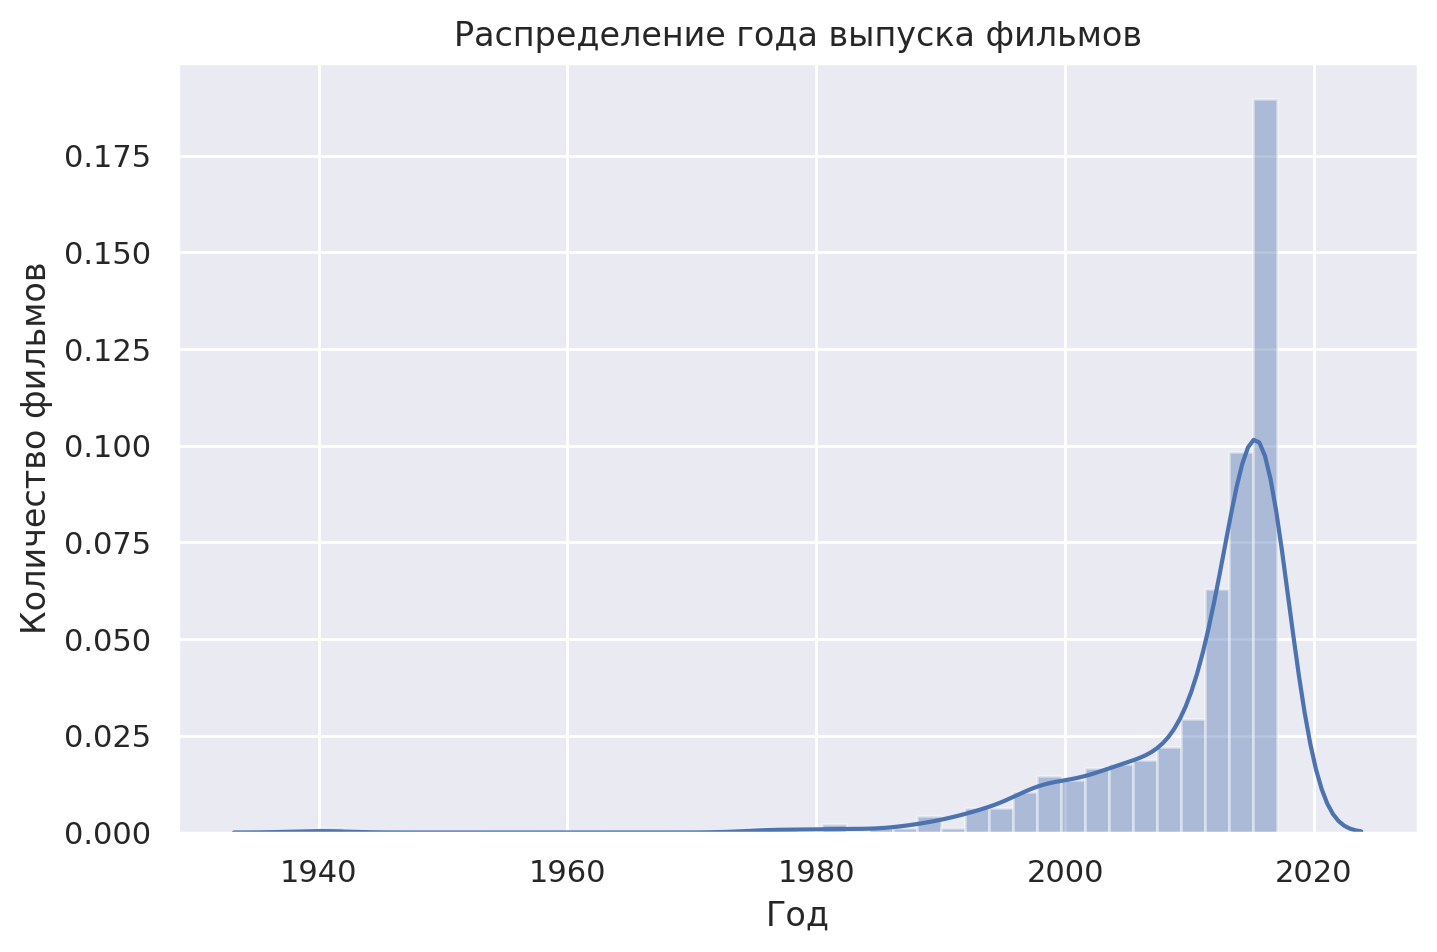

In [ ]:
sns.distplot(data['release year'], bins=40)
plt.title('Распределение года выпуска фильмов')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

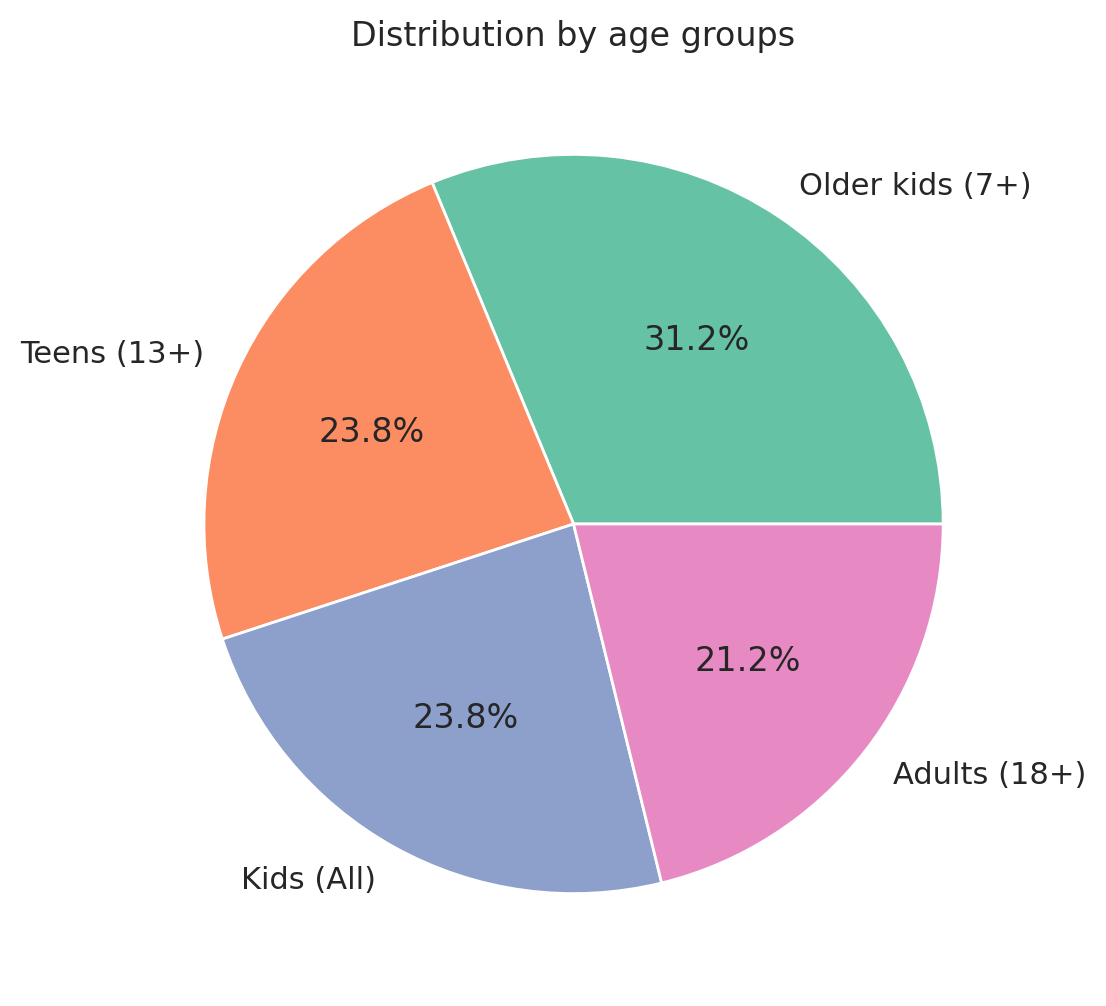

In [ ]:
age_group_counts = data['age_group'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors
)
plt.title('Distribution by age groups')
plt.show()

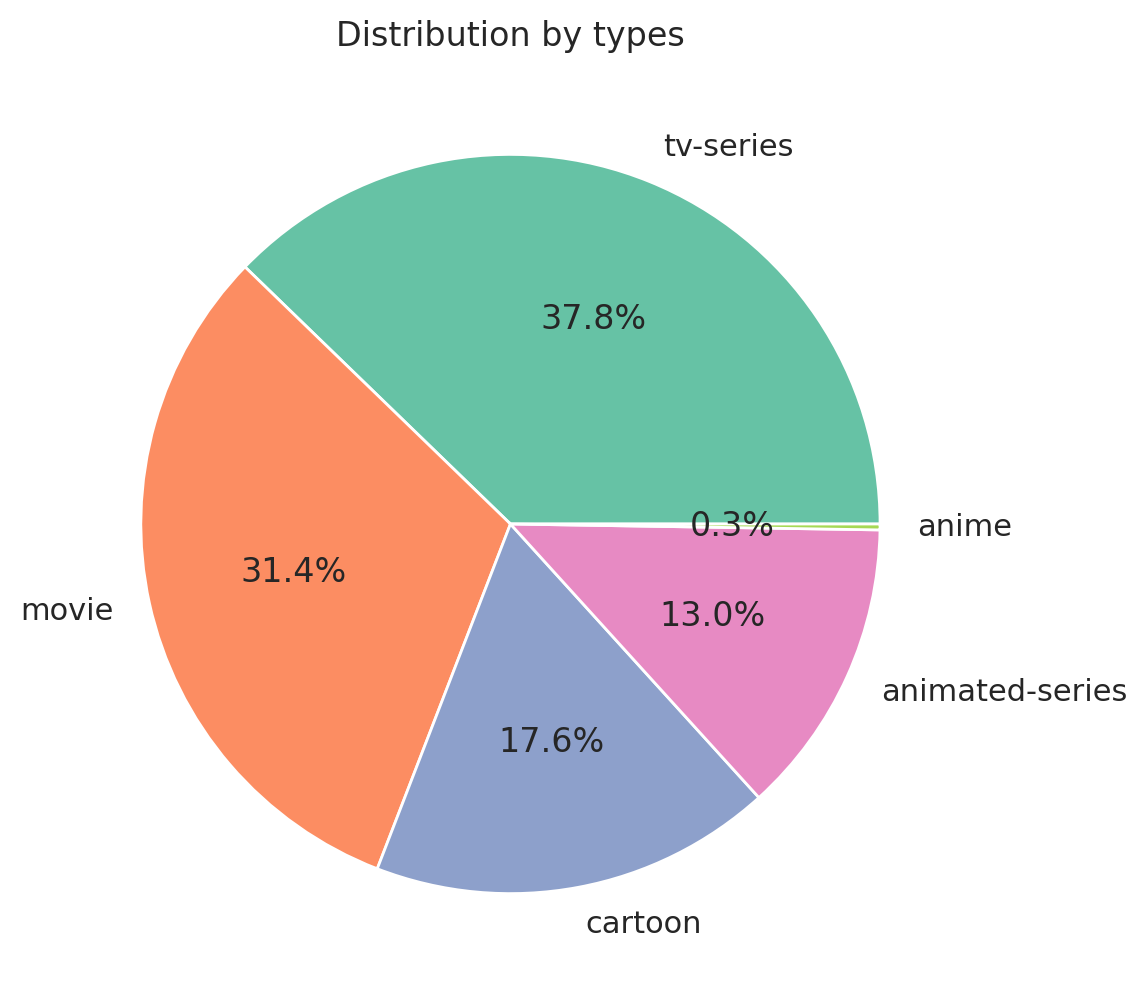

In [ ]:
types = df_kinopoisk_netflix['type'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(
    types,
    labels=types.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors
)
plt.title('Distribution by types')
plt.show()

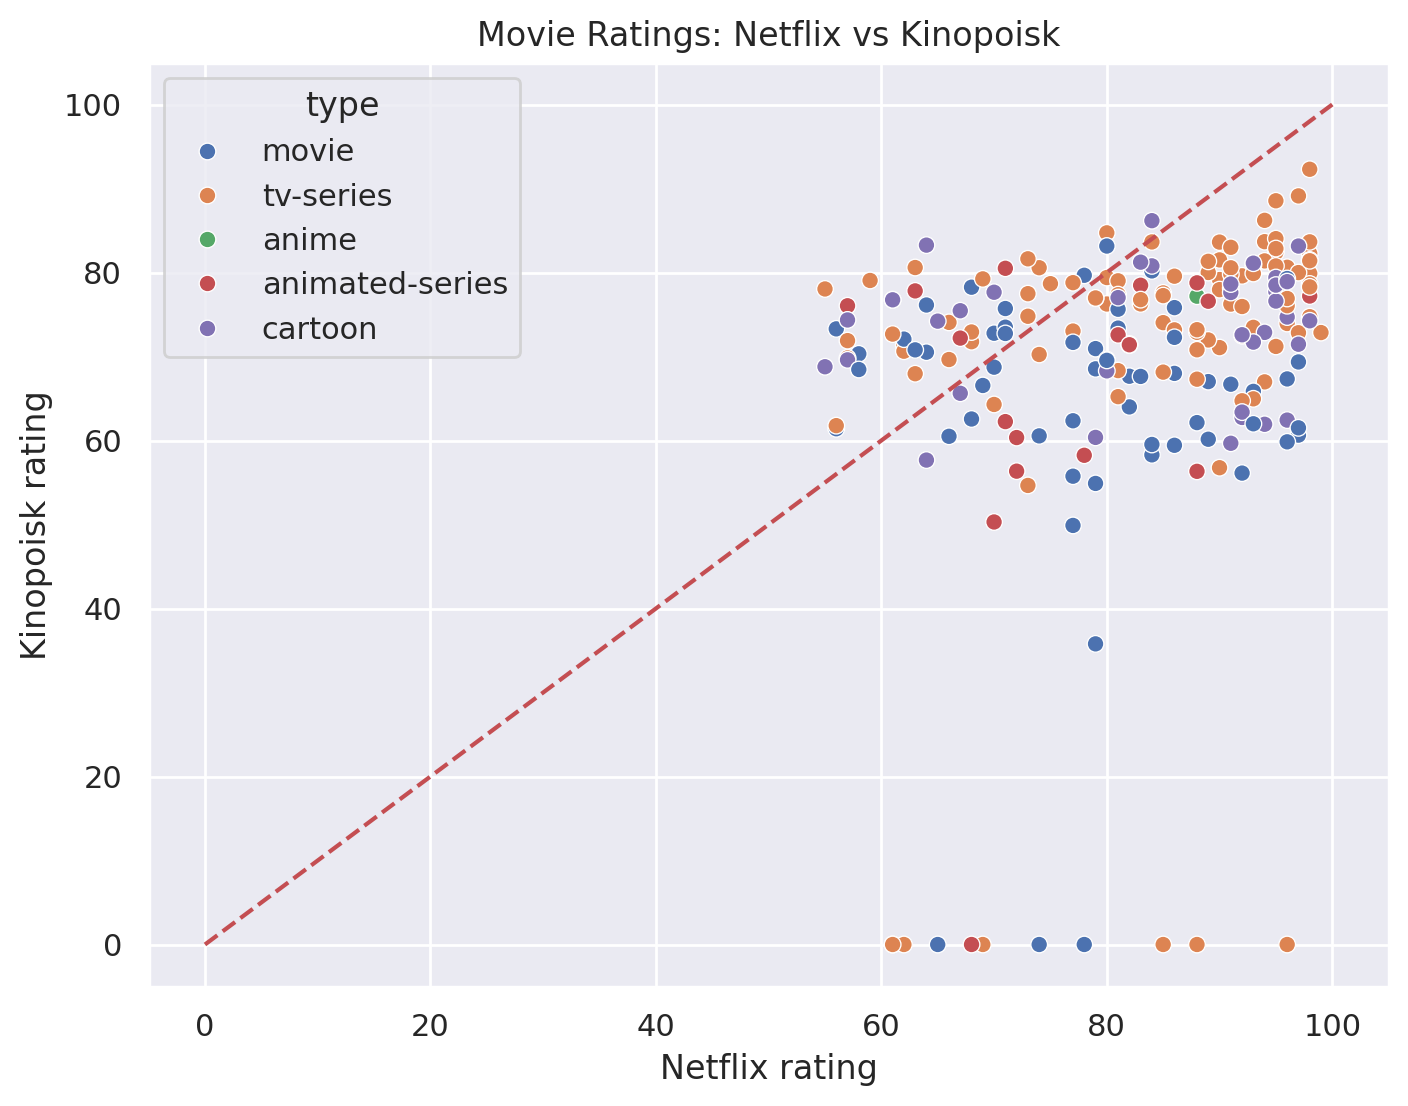

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_kinopoisk_netflix,
    #x=df_kin_net['rating.imdb']*10,
    x=df_kinopoisk_netflix['user rating score'],
    y=df_kinopoisk_netflix['rating.kp']*10,
    hue='type'
)
#plt.scatter(df_kinopoisk_netflix['user rating score'], df_kinopoisk_netflix['rating.kp']*10, alpha=0.6)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel('Netflix rating')
plt.ylabel('Kinopoisk rating')
plt.title('Movie Ratings: Netflix vs Kinopoisk')
plt.grid(True)
plt.show()

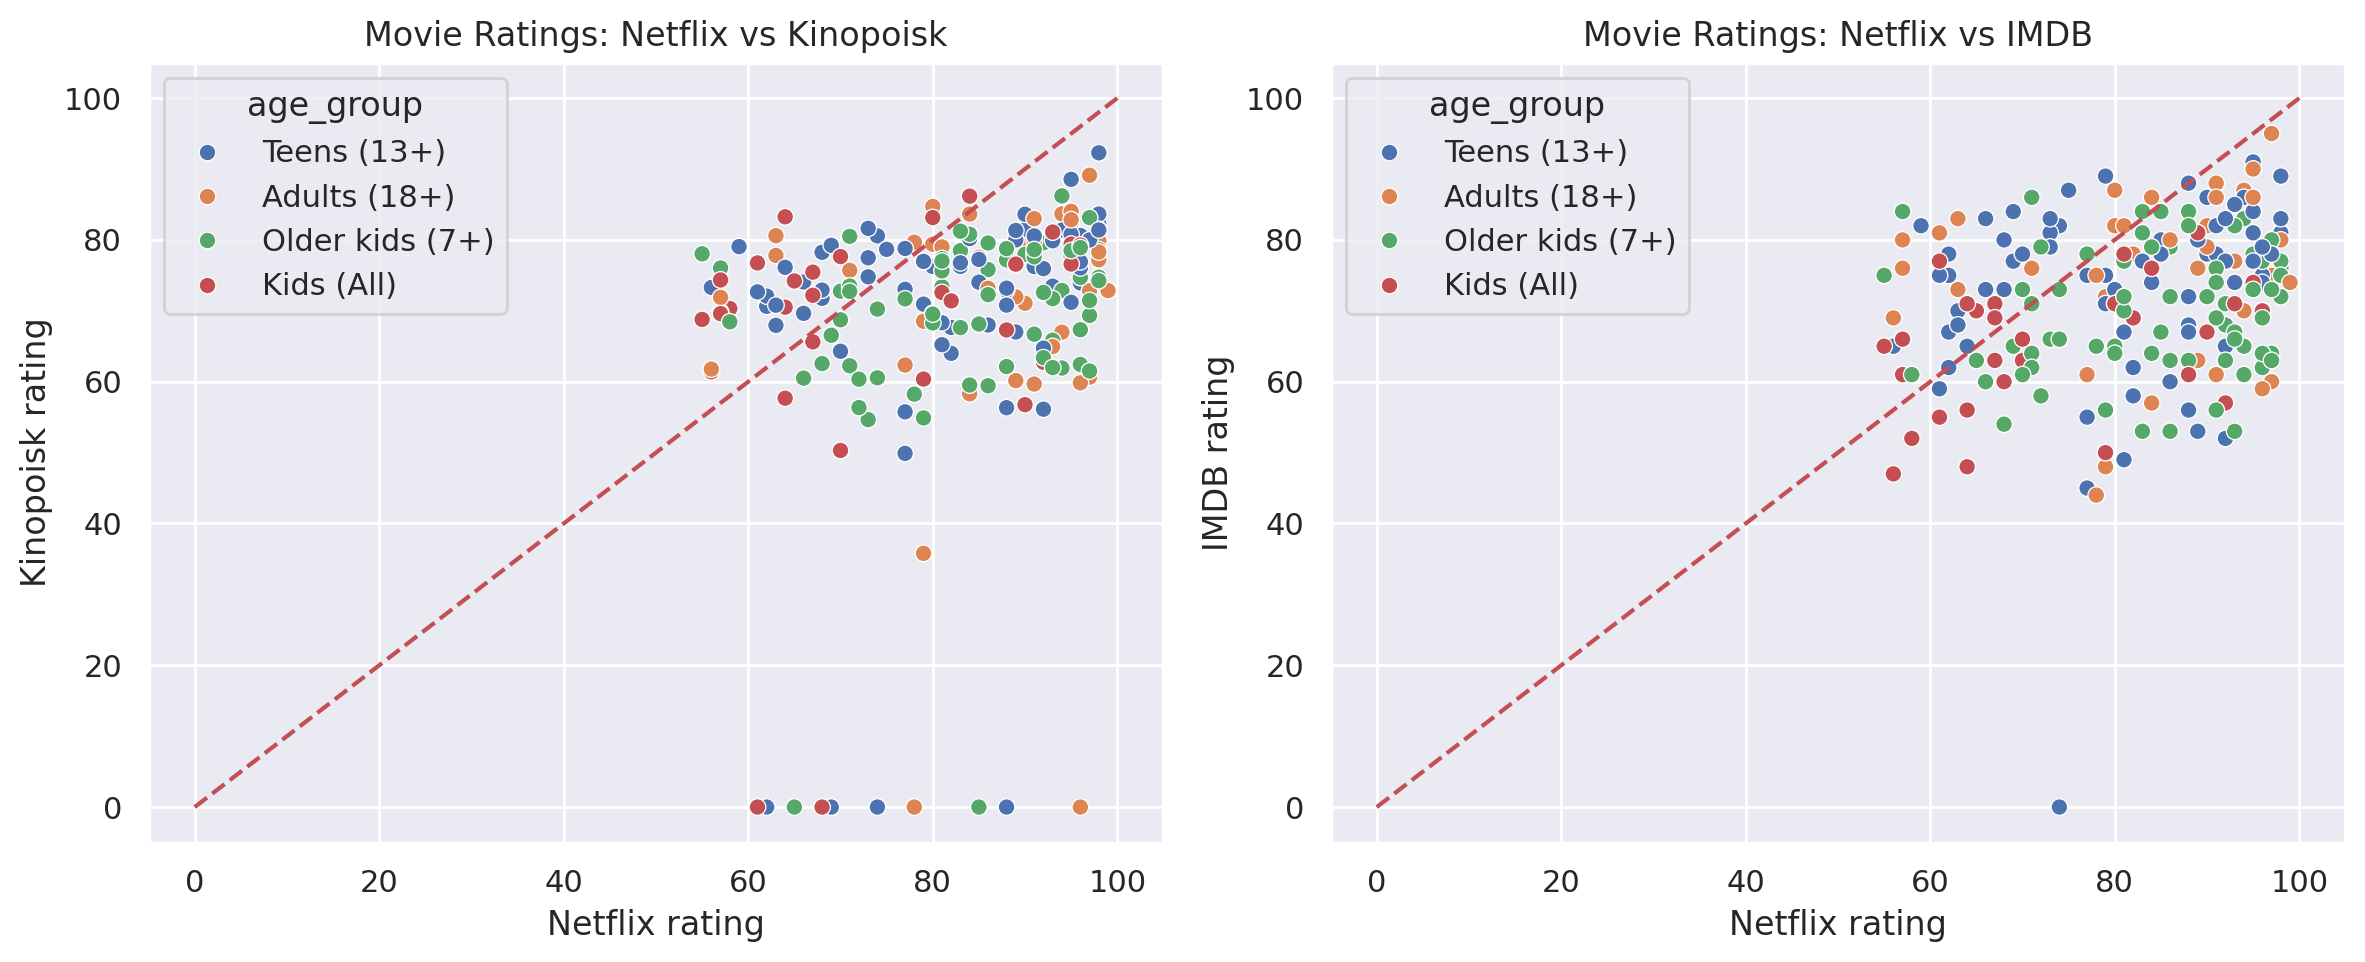

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Kinopisk vs. Netflix
sns.scatterplot(
    data=df_kinopoisk_netflix,
    x=df_kinopoisk_netflix['user rating score'],
    y=df_kinopoisk_netflix['rating.kp']*10,
    hue='age_group',
    ax=axes[0]
)
axes[0].plot([0, 100], [0, 100], 'r--')
axes[0].set_title('Movie Ratings: Netflix vs Kinopoisk')
axes[0].set_xlabel('Netflix rating')
axes[0].set_ylabel('Kinopoisk rating')

# IMDB vs. Netflix
sns.scatterplot(
    data=df_kinopoisk_netflix,
    x=df_kinopoisk_netflix['user rating score'],
    y=df_kinopoisk_netflix['rating.imdb']*10,
    hue='age_group',
    ax=axes[1]
)
axes[1].plot([0, 100], [0, 100], 'r--')
axes[1].set_title('Movie Ratings: Netflix vs IMDB')
axes[1].set_xlabel('Netflix rating')
axes[1].set_ylabel('IMDB rating')

plt.grid(True)
plt.tight_layout()
plt.show()


plt.show()

<ipython-input-101-31eff01495ff>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




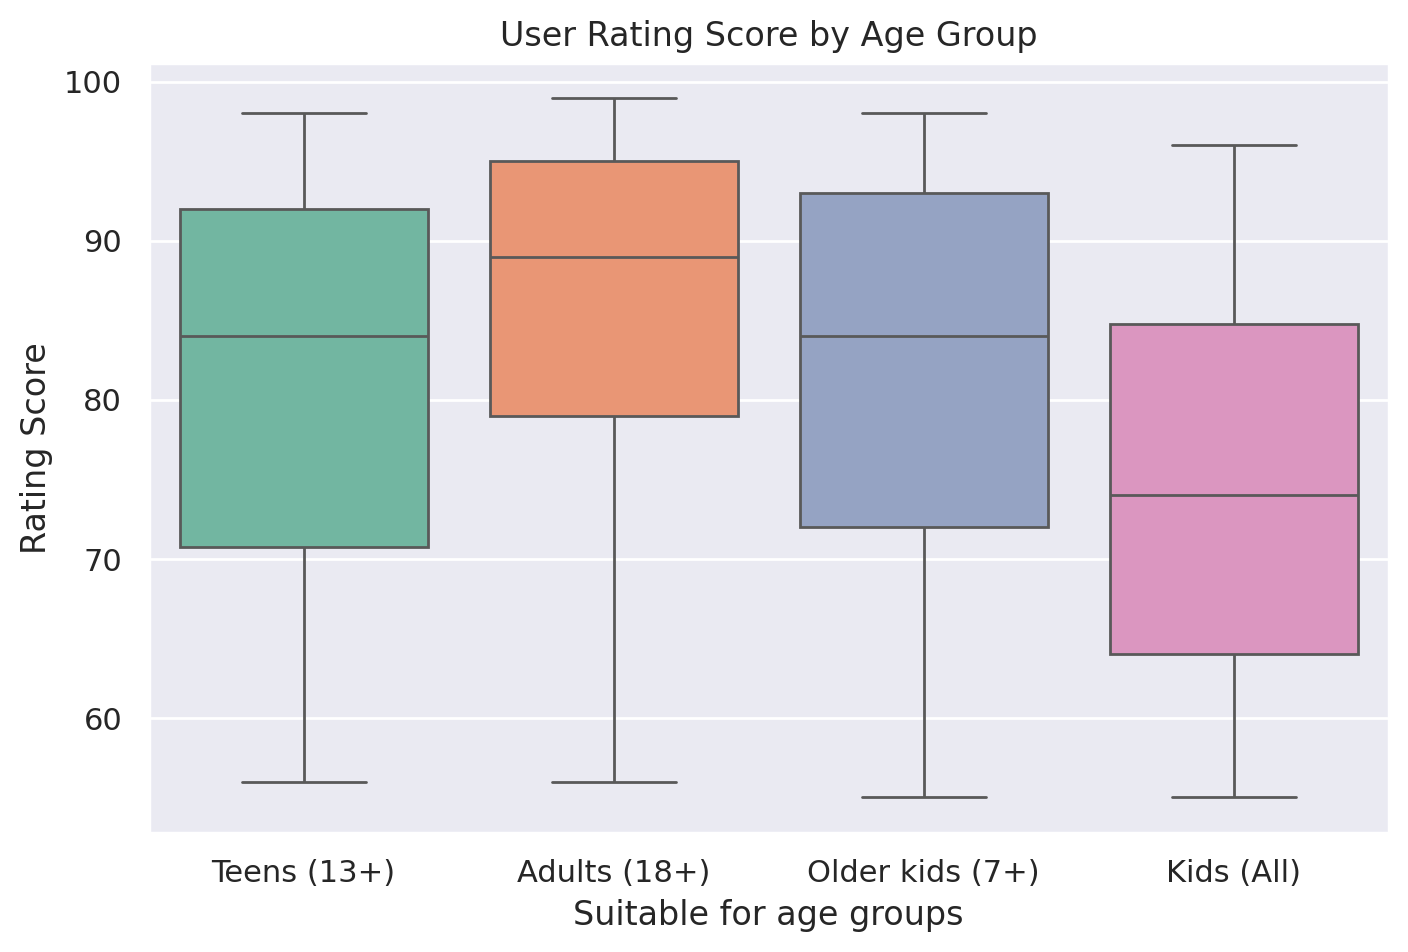

In [ ]:
sns.boxplot(data=df_kinopoisk_netflix, x='age_group', y='user rating score', palette='Set2')
plt.title('User Rating Score by Age Group')
plt.xlabel('Suitable for age groups')
plt.ylabel('Rating Score')

plt.show()


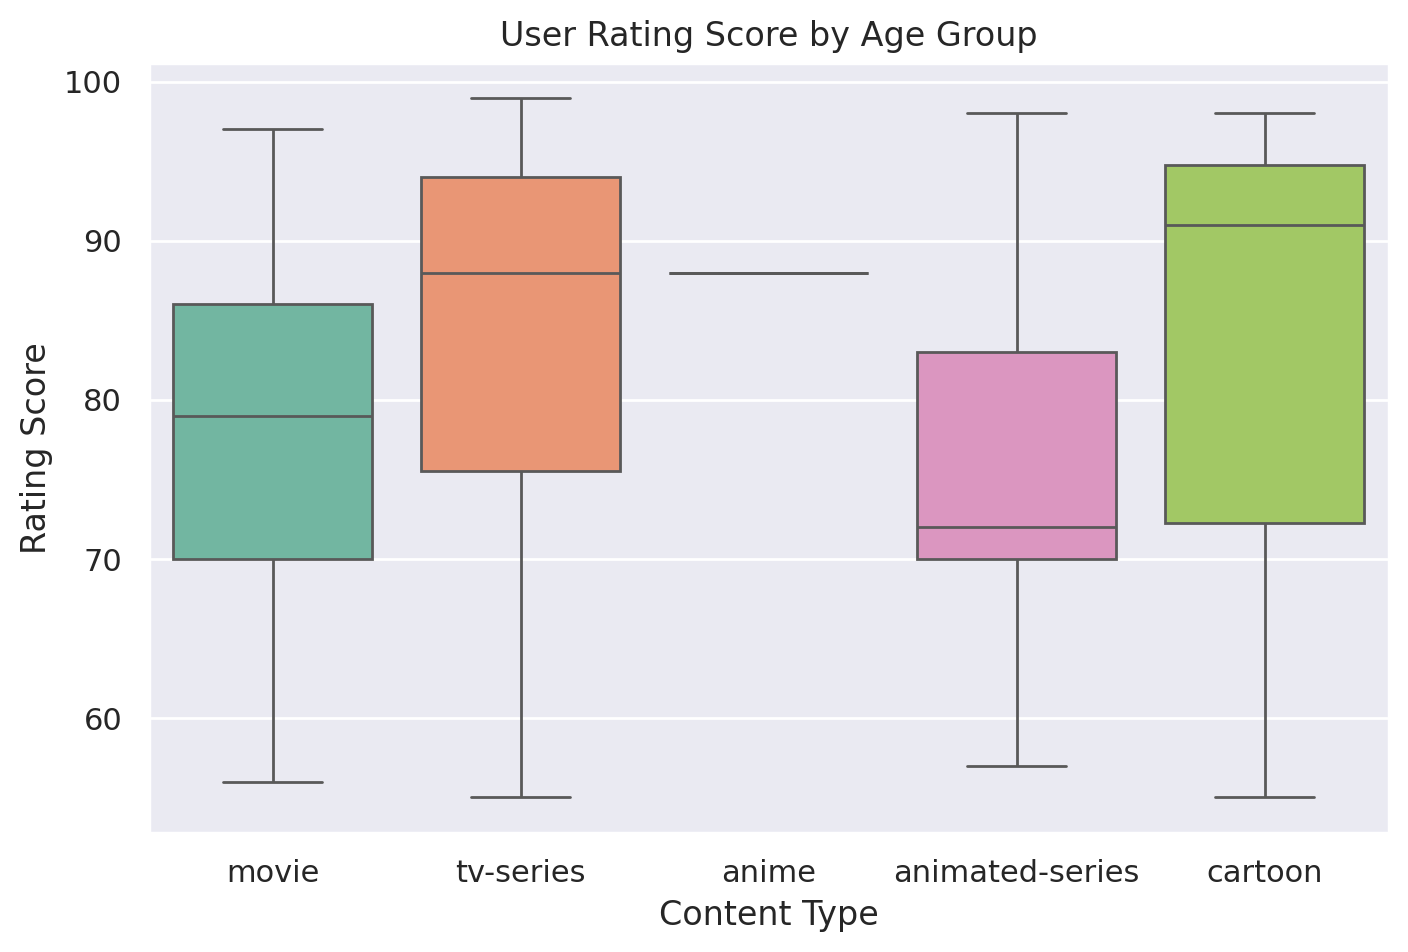

In [ ]:
sns.boxplot(data=df_kinopoisk_netflix, x='type', y='user rating score',
            hue='type', legend=False, palette='Set2')
plt.title('User Rating Score by Age Group')
plt.xlabel('Content Type')
plt.ylabel('Rating Score')

plt.show()

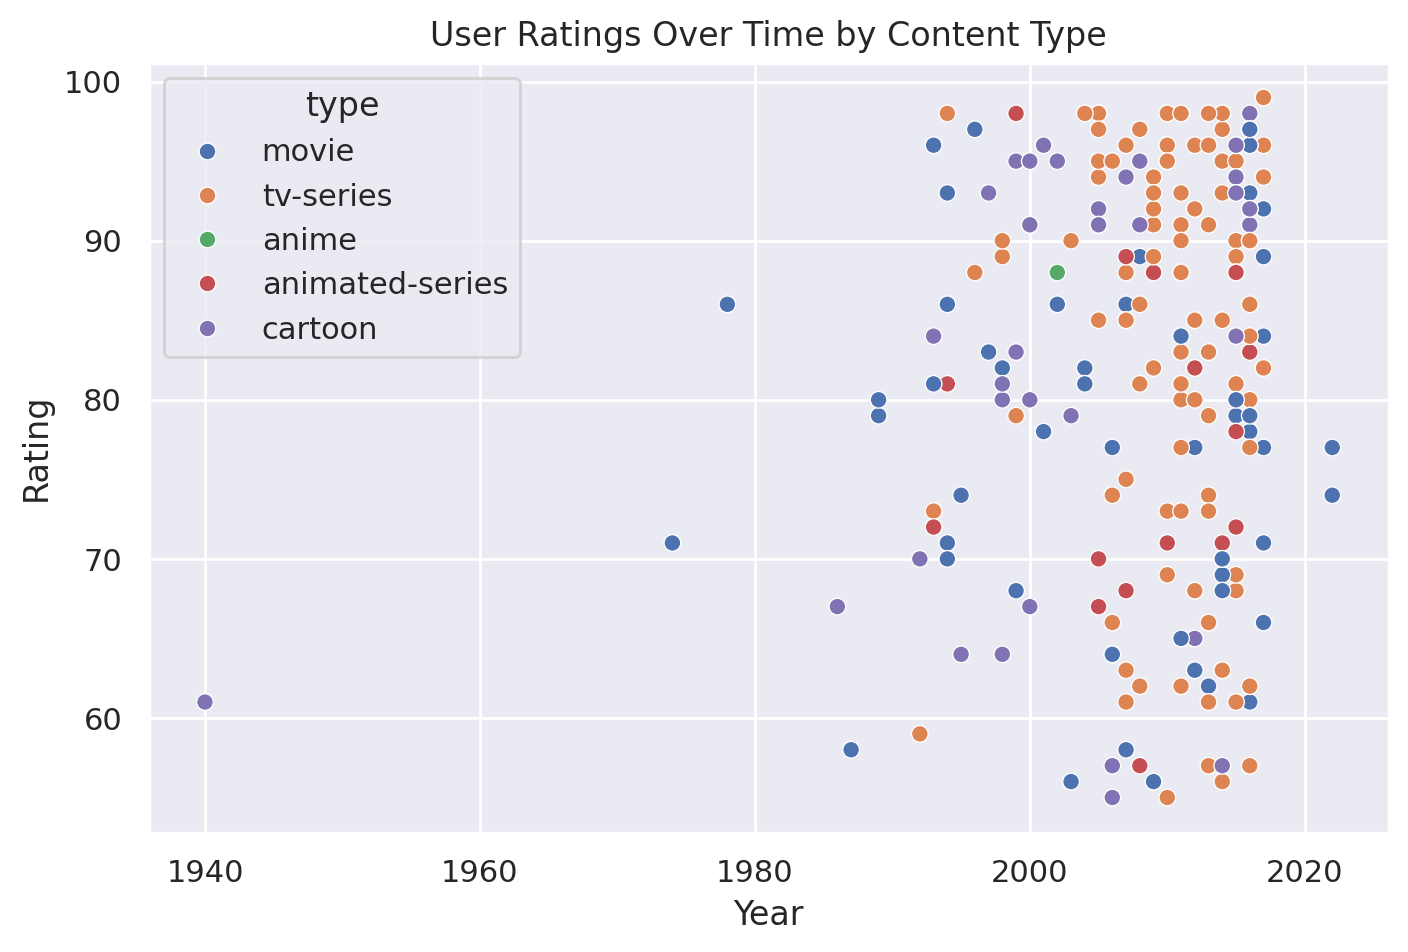

In [ ]:
sns.scatterplot(data=df_kinopoisk_netflix, x='year', y='user rating score', hue='type')
plt.title('User Ratings Over Time by Content Type')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


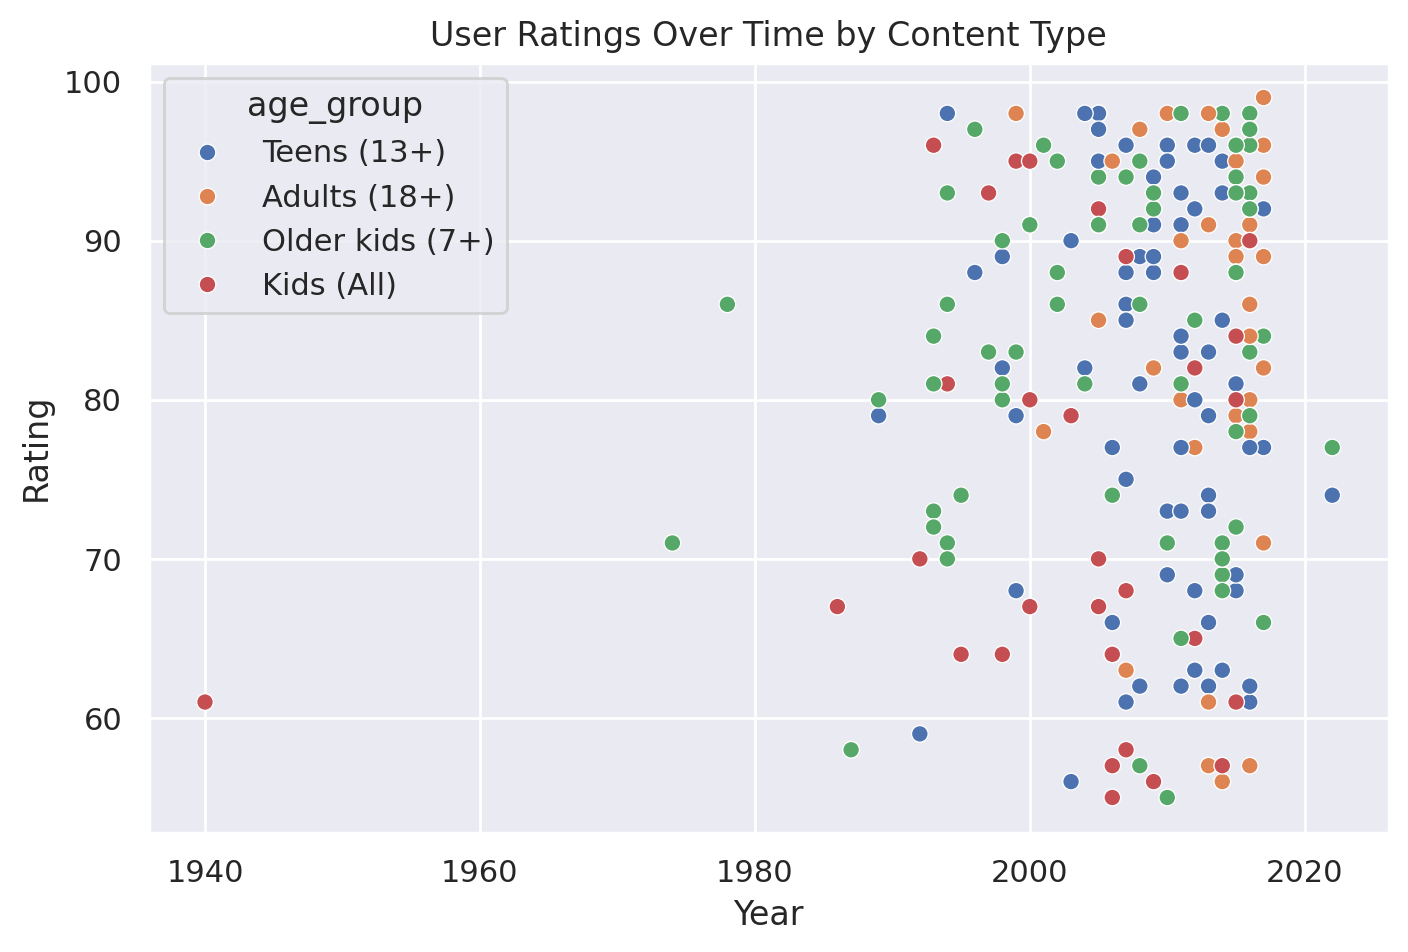

In [ ]:
sns.scatterplot(data=df_kinopoisk_netflix, x='year', y='user rating score', hue='age_group')
plt.title('User Ratings Over Time by Content Type')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [ ]:
only_series = df_kinopoisk_netflix[df_kinopoisk_netflix['isSeries'] == True]

In [ ]:
only_series['seriesLength'].head()

2    43.0
3    43.0
4    22.0
5    43.0
6    47.0
Name: seriesLength, dtype: float64

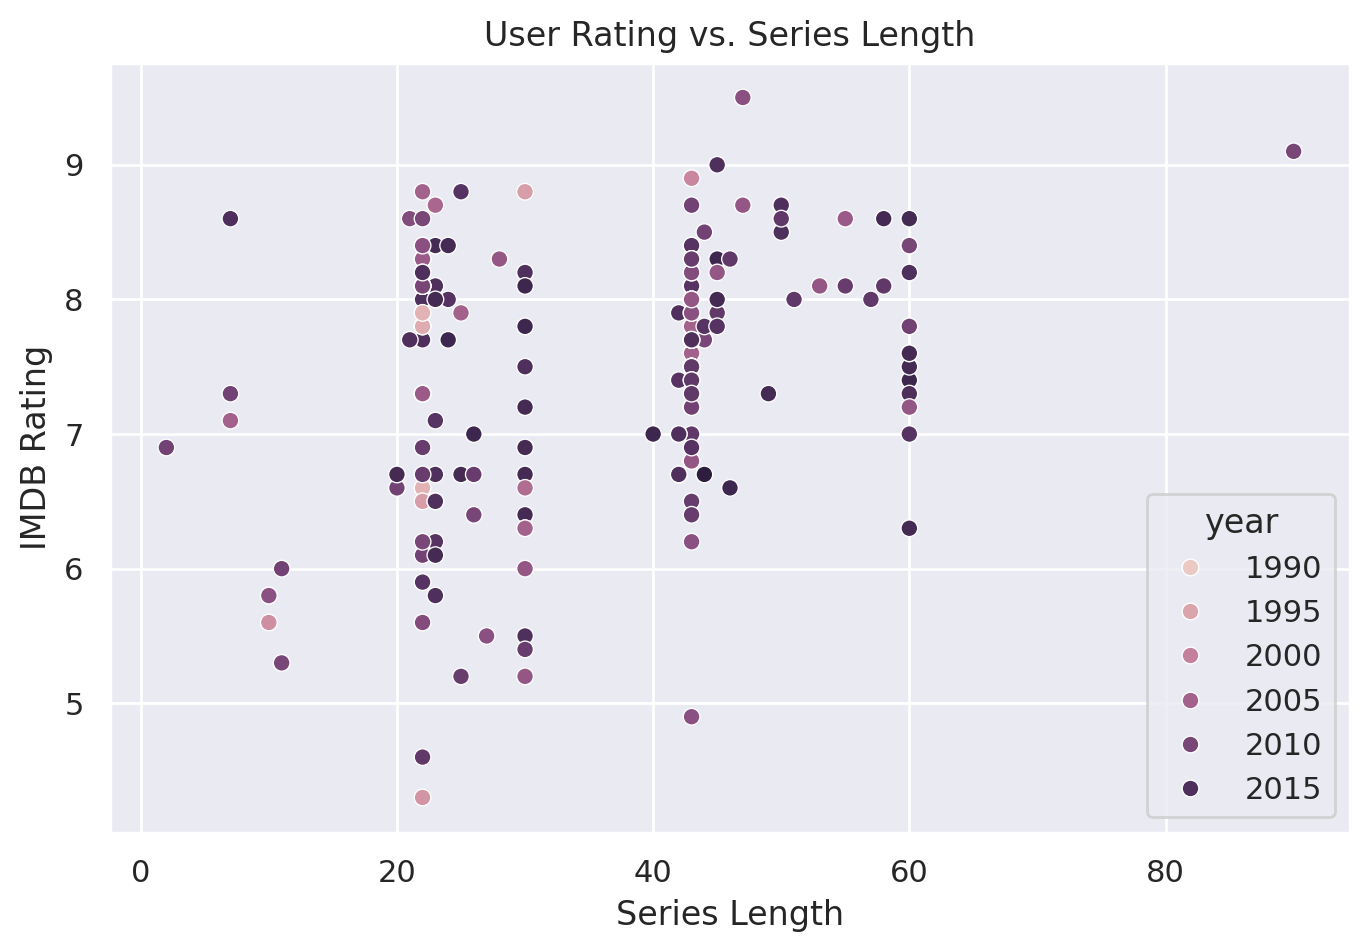

In [ ]:
sns.scatterplot(data=only_series, x='seriesLength', y='rating.imdb', hue='year')
plt.title('User Rating vs. Series Length')
plt.xlabel('Series Length')
plt.ylabel('IMDB Rating')
plt.show()

In [ ]:
no_series = df_kinopoisk_netflix[df_kinopoisk_netflix['isSeries'] == False]

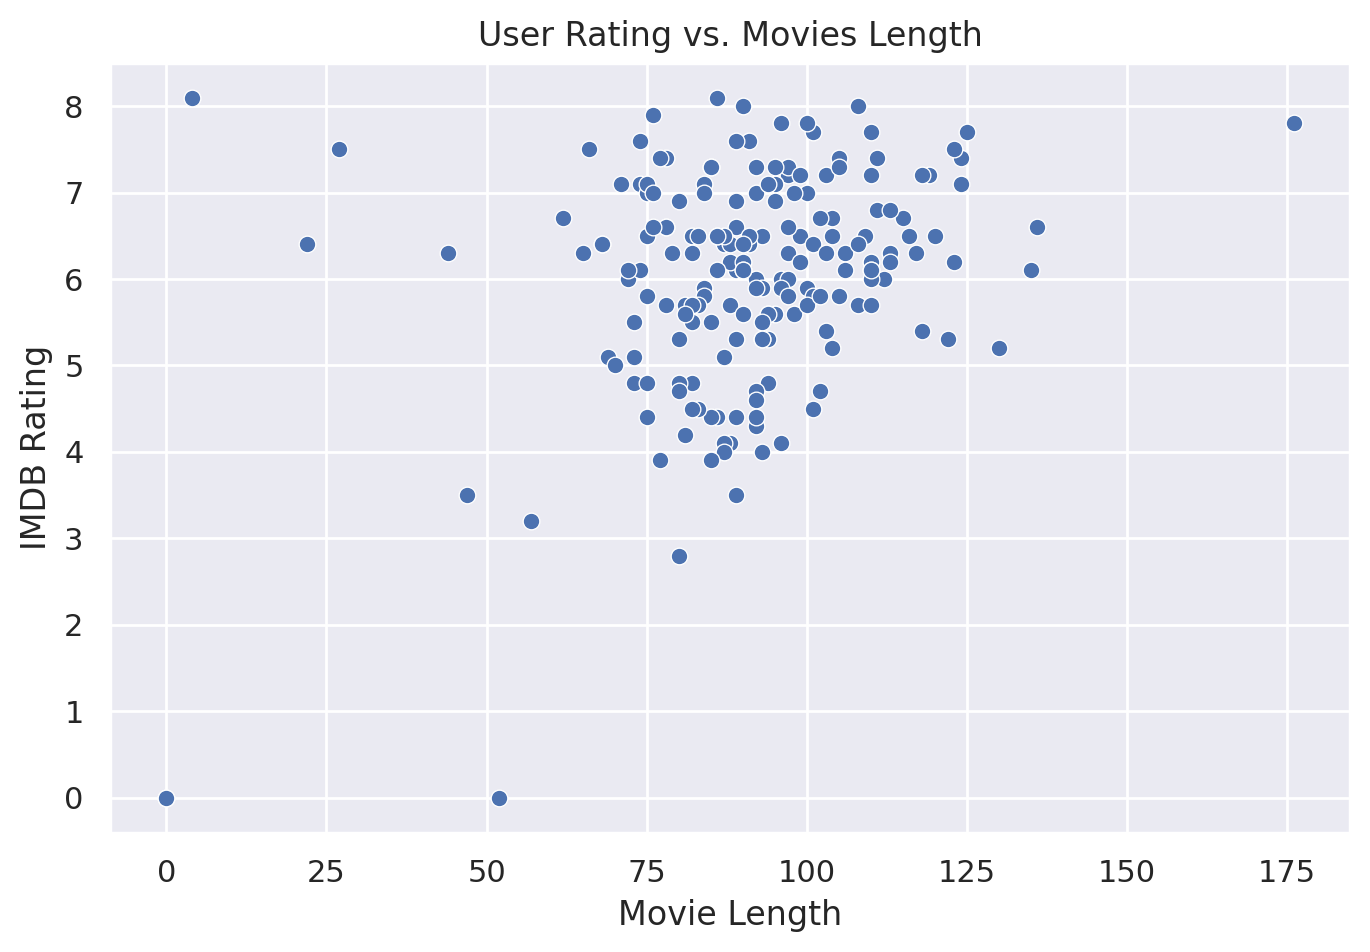

In [ ]:
sns.scatterplot(data=no_series, x='movieLength', y='rating.imdb')
plt.title('User Rating vs. Movies Length')
plt.xlabel('Movie Length')
plt.ylabel('IMDB Rating')
plt.show()

# Conclusion

In [ ]:
df_kinopoisk_netflix.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score',
       'duplicated', 'text', 'age_group', 'merge_title', 'id', 'name',
       'alternativeName', 'enName', 'type', 'year', 'description',
       'shortDescription', 'movieLength', 'isSeries', 'ticketsOnSale',
       'totalSeriesLength', 'seriesLength', 'ratingMpaa', 'ageRating', 'top10',
       'top250', 'typeNumber', 'status', 'names', 'externalId.imdb',
       'externalId.tmdb', 'externalId.kpHD', 'logo.url', 'poster.url',
       'poster.previewUrl', 'backdrop.url', 'backdrop.previewUrl', 'rating.kp',
       'rating.imdb', 'rating.filmCritics', 'rating.russianFilmCritics',
       'rating.await', 'votes.kp', 'votes.imdb', 'votes.filmCritics',
       'votes.russianFilmCritics', 'votes.await', 'genres', 'countries',
       'releaseYears', 'logo', 'logo.previewUrl'],
      dtype='object')